In [1]:
import io
import json
import re
import requests
import time
from pdfminer.high_level import extract_text
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/12ata-r.e.-virtual-setembro-10-09-2020.pdf"
#sem quorum.
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/08/07ataa-r.e.-virtual-agosto-06-08-2020.pdf"
#sem quorum.
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/09ataa-r.e.-virtual-agosto-20-08-2020-3.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/10/ata-r.o.-15-10-19.pdf"
#########################################################################################################
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.soleneordinaria-05-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.o.-12-02-19.pdf"
url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-19-02-19.pdf"
####url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-26-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-12-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.extraordinaria-15-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-19-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-26-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-02-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-09-04-19.pdf"
###
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-16-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-23-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-30-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-07-05-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-14-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/mae-destaque-nova-limense-16-05-2019-3.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-21-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-28-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-04-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-11-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-18-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-25-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/08/ata-r.o.-02-07-19.pdf"


#"Ata: ['-r.o.-25-06-19.pdf'] NumeroPaginas: 26"       
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-25-06-19.pdf"
    
    
#"Ata: ['-r.o.-28-05-19-1.pdf'] NumeroPaginas: 28"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-28-05-19-1.pdf"


#"Ata: ['-r.o.-23-04-19.pdf'] NumeroPaginas: 26"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-23-04-19.pdf" 
    
    
#"Ata: ['-r.o.-11-06-19.pdf'] NumeroPaginas: 1"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-11-06-19.pdf"
    
#"Ata: ['-r.o.-02-04-19.pdf'] NumeroPaginas: 1"
#url= "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-02-04-19.pdf"    
    
#"Ata: ['-r.o.-12-02-19.pdf'] NumeroPaginas: 1
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.o.-12-02-19.pdf"
    


In [3]:
resposta =  requests.get(url)

In [4]:
with io.BytesIO(resposta.content) as abrir_pdf:
    text = extract_text(abrir_pdf)

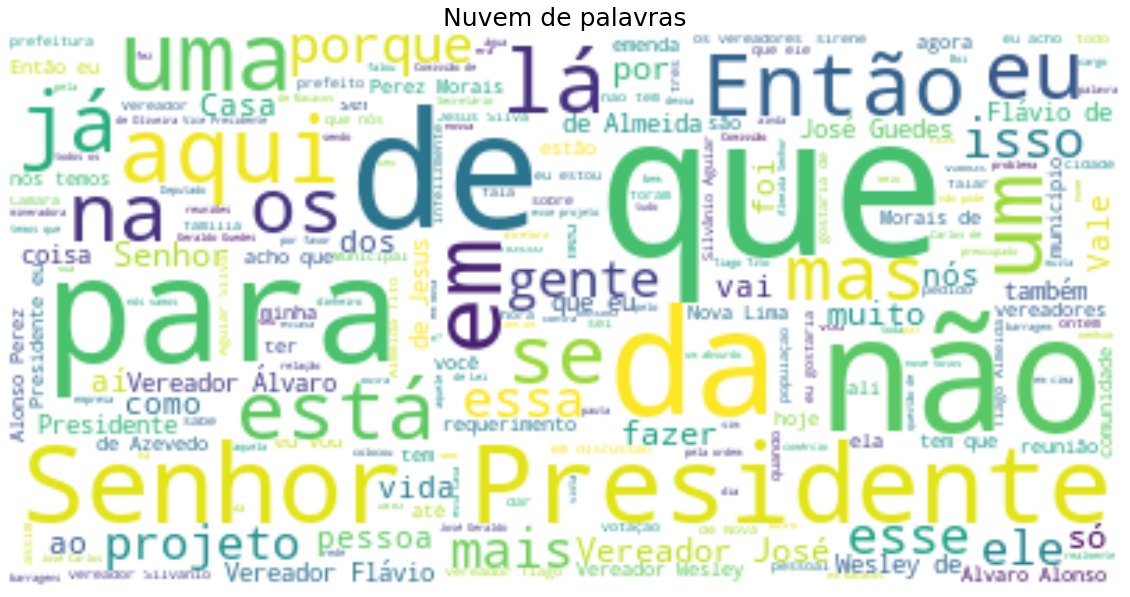

In [5]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 500, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text,  'Nuvem de palavras')

In [6]:
text = text.rstrip().replace('\n', '').lower()

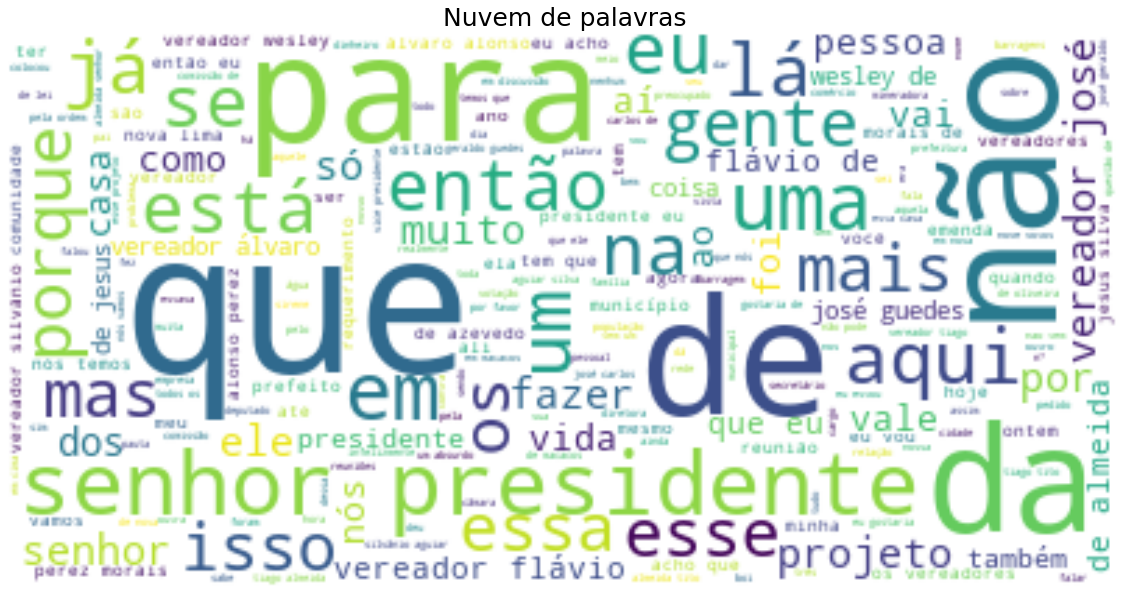

In [7]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 500, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text,  'Nuvem de palavras')

In [8]:
#word_tokenize(text)

In [9]:
tokenizer_projetos2020 = RegexpTokenizer('\d*.\d*d*/\d*')
numero_projetos2020 = tokenizer_projetos2020.tokenize(text)
numero_projetos2020

['e/',
 ' 2019/2020',
 '1.752/2019',
 '1.767/2019',
 '1.736/2018',
 '2.298/2012',
 '1.736/2018',
 ' 1736/2018',
 '1.736/2018',
 '1.736/2018',
 '1.736/2018',
 '1.738/2018',
 's/',
 ' 27/05']

In [10]:
tokenizer_projetos2019 = RegexpTokenizer('\d*d*/\d*')
numero_projetos2019 = tokenizer_projetos2020.tokenize(text)
numero_projetos2019

['e/',
 ' 2019/2020',
 '1.752/2019',
 '1.767/2019',
 '1.736/2018',
 '2.298/2012',
 '1.736/2018',
 ' 1736/2018',
 '1.736/2018',
 '1.736/2018',
 '1.736/2018',
 '1.738/2018',
 's/',
 ' 27/05']

In [11]:
tokenizer_digit = RegexpTokenizer('^[ 0-9]+$')
digitos = tokenizer_digit.tokenize(text)
digitos

[]

In [12]:
tokens = word_tokenize(text)


pontuacao = [
             '(',
             ')',
             ';',
             ':',
             '[',
             ']',
             ',',
             '-',
             '?',
             'nº',
             's',
             '"',
             "'",
             '.',
             '”',
             '“',
             '”',
             '“',
             '-',
             '–',
           '...',
             '‘',
             '’',
             '/',
             '%',
    '.________________________________________________________',
    '._____________________________________',
    '.___________________________________________',
    '.__________________________________________',
    '._____________________',
    '.______________________________________________________________',
                ]

stop_words = set(stopwords.words('portuguese'))

stop_words_custom = ['0', '1', '10', '17', '18', '2', '2020', '3', '4', '5',
                     '50', '6', '7', '8', '9', 'abençoe', 'abençõe', 'aberta', 'abraço', 'abril',
                     'abrimos', 'acabou', 'acesso', 'achando-se', 'acho', 'acompanha', 'acrescentado',
                     'ad', 'administração', 'adotiva', 'afirmou', 'agora', 'agosto', 'agradecendo', 'agradecer', 
                     'agradeço', 'aguiar', 'ah', 'ainda', 'ajuda', 'ajudar', 'alessandro', 'alessandro luiz bonifácio', 
                     'algum', 'algumas', 'alguns', 'ali', 'almeida', 'alonso', 'altera', 'alterar', 'além', 'amigo',
                     'amigos', 'amor', 'ano', 'anos', 'antes', 'anunciou', 'aparte', 'aplausos', 'apoio', 'apostas', 
                     'aprendi', 'apresentação', 'após', 'aqui', 'art', 'artigo', 'assembleia', 'assessor', 'assessoria',
                     'assim', 'assinar', 'assinaturas', 'assiste','assistem', 'associação', 'assunto', 'ata', 'atendendo', 
                     'atender', 'atenção', 'através', 'atrás', 'audiência', 'autoria', 'azevedo', 'aí', 'bacana', 'baixo',
                     'banqueta', 'bem', 'bem-vindo', 'bicalho', 'bilhete', 'boa', 'boca', 'boi', 'bom', 'bonifácio', 'bota', 
                     'cada', 'cair', 'cala', 'calendário', 'cara', 'carinho', 'carlos', 'casa', 'caso', 'certeza', 'certo', 
                     'chamada', 'chegar', 'cheguei', 'cidade', 'cima', 'cinco', 'cinquenta', 'claro', 'coisa', 'coisas',
                     'colete', 'colete', 'colocar', 'coloco', 'colocou', 'colocou', 'colocou-a', 'colocou-as', 'comigo',
                     'comissão', 'comprimentar', 'comunicou', 'comunidade', 'concede', 'concordam', 'conferirem-na',
                     'conferirem-nas', 'conforme', 'conheço', 'constatando-se', 'constituída', 'continuar', 'convidou',
                     'convocação', 'coração', 'correspondência', 'correspondências', 'coxinha', 'cumprimentar', 'cumprimento',
                     'cumprimentos', 'cumprimentá-los', 'cutucando', 'câmara', 'd', 'dando', 'daquela', 'dar', 'data',
                     'ddeclaro', 'declaro', 'declarou', 'deixa', 'deixar', 'deliberação', 'demais', 'dentro', 'deputado',
                     'desde', 'desejo', 'desembro', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'deste', 'deu', 'deus',
                     'devido', 'dez', 'dezembro', 'dezenove', 'dezesseis', 'dezoito', 'dia', 'diante', 'dias', 'diferente',
                     'diga-se', 'diretora', 'diretrizes', 'discussão', 'discutindo', 'disponibilizar', 'dispõe', 'disse',
                     'disso', 'diz', 'dizendo', 'dizer', 'documentos', 'dois', 'doze', 'dr', 'duas', 'durante', 'dá', 'dúvida',
                     'ederson', 'ederson sebastião pinto', 'emenda', 'emenda', 'emendas', 'emissão', 'emitiu', 'empresa', 'encaminhada',
                     'encaminhadas', 'encaminhado', 'encaminho', 'encerrada', 'encerrar', 'encontrava-se', 'enquanto', 'entendeu',
                     'entendi', 'entregue', 'então', 'errado', 'especial', 'especifica', 'esperar', 'espero', 'esposa', 'estabelece',
                     'estado', 'estadual', 'estar', 'estaremos', 'estará', 'ex-prefeito', 'ex-presidente', 'exatamente', 'excelência',
                     'exceção', 'executar', 'executivo', 'exemplo', 'existe', 'explicar', 'extatamente', 'extraordinária', 'fala',
                     'falando', 'falar', 'falei', 'falo', 'falou', 'falta', 'faria', 'fato', 'fausto', 'fausto niquini ferreira',
                     'favor', 'favoráveis', 'favorável', 'faz', 'fazendo', 'fazer', 'faça', 'façamos', 'faço', 'feira', 'feita',
                     'feitas', 'feito', 'feliz', 'ferreira', 'fevereiro', 'fez', 'fica', 'ficar', 'fico', 'fiz', 'fizemos', 'fizeram',
                     'flavio', 'flávio', 'flávio de almeida', 'fmfpm', 'forma', 'força', 'frente', 'frente', 'fé', 'gabinetes', 'gas',
                     'gente', 'geraldo', 'gostaria', 'gosto', 'governo', 'grade', 'grande', 'graça', 'graças', 'guedes', 'gás', 'hino', 
                     'história', 'hoc', 'hoje', 'hora', 'horas', 'horário', 'igual', 'ii', 'impacto', 'importante', 'impressionante',
                     'incentivo', 'inclusive', 'indo', 'infelizmente', 'iniciar', 'inserido', 'institui', 'integral', 'inteiro', 'interessante', 
                     'interno', 'interresante', 'intuito', 'início', 'ir', 'jamais', 'janeiro', 'jeito', 'jesus', 'josé', 'josé carlos de oliveira',
                     'joão', 'julho', 'junho', 'junto', 'juntos', 'justiça', 'kim', 'kim do gas', 'kim do gás', 'lado', 'legal', 'legislativa',
                     'legislativo', 'legislação', 'lei', 'leitura', 'ler', 'levar', 'li', 'lima', 'limense', 'lislie', 'livro', 'logo', 'lugar',
                     'luiz', 'luta', 'lá', 'maio', 'maior', 'mandar', 'mandato', 'manhã', 'manifestou', 'março', 'meio', 'melhor', 'menos', 'merece',
                     'mesa', 'mesma', 'mesquita', 'mil', 'mim', 'minuto', 'minutos', 'momento', 'morais', 'moção', 'muita', 'muitas', 'municipais',
                     'municipal', 'município', 'mês', 'nacional', 'nada', 'naquele', 'naturalmente', 'nenhum', 'nenhuma', 'nessa', 'nesse', 'nesse',
                     'nesses', 'nesta', 'neste', 'ninguém', 'niquini', 'noite', 'nome', 'nova', 'nova', 'nova-limense', 'nova-limenses', 'novamente',
                     'nove', 'novembro', 'noventa', 'nunca', 'número', 'obrigado', 'obrigação', 'observação', 'oi', 'oitenta', 'oito', 'ok', 'olha',
                     'oliveira', 'onde', 'ontem', 'opinião', 'oportunidade', 'ordem', 'ordinária', 'orgulho', 'outra', 'outras', 'outro', 'outros',
                     'outubro', 'ouvir', 'pai', 'palavra', 'palavras', 'parabenizar', 'parabéns', 'paragáfo', 'parece', 'parecer', 'pares', 
                     'parlamentar', 'parte', 'participei', 'participou', 'partido', 'passa', 'passado', 'passando', 'passar', 'pasta', 'pauta',
                     'pedido', 'pedindo', 'pedir', 'percentual', 'perda', 'perez', 'permaneçam', 'permite', 'pessoa', 'pessoal', 'pessoas', 'peço',
                     'pinto', 'plenária', 'plenário', 'pode', 'podem', 'poder', 'poderia', 'política', 'população', 'porque', 'porta', 'porta',
                     'portaria', 'portas', 'possa', 'posse', 'posso', 'possível', 'pouco', 'povo', 'prazo', 'precisa', 'prefeito', 'prefeitura',
                     'presente', 'presentes', 'presença', 'presidente', 'presidindo', 'primeira', 'primeiro', 'principalmente', 'prioridade',
                     'problema', 'problemas', 'processo', 'proferiu', 'projeto', 'projetos', 'promessas', 'promulgação', 'pronunciamento',
                     'proteção', 'providências', 'proximo', 'próprio', 'próxima', 'próximo', 'puder', 'pudesse', 'pé', 'pública', 'público',
                     'públicos', 'qualquer', 'quanto', 'quarta-feira', 'quatro', 'quebra', 'quer', 'queria', 'querido', 'quero', 'questão',
                     'quinze', 'quiser', 'quê', 'realização', 'realmente', 'recebidas', 'recomendação', 'redação', 'referente', 'regimento',
                     'registrado', 'registrar', 'regularizar', 'regularização', 'relação', 'remota', 'repetir', 'representando', 'representação',
                     'requer', 'requerimento', 'requerimentos', 'resolução', 'resolver', 'respeito', 'ressaltar', 'reuniu-se', 'reunião',
                     'reuniões', 'rogo', 'rosana', 'rua', 'sabe', 'sabemos', 'saber', 'sair', 'sala', 'sanção', 'se', 'se', 'sebastião',
                     'secretário', 'sede', 'seguida', 'seguinte', 'segunda', 'segundo', 'sei', 'seis', 'semana', 'sempre', 'sendo', 'senhor',
                     'senhora', 'senhores', 'sentido', 'senão', 'ser', 'serginho', 'servidor', 'serviço', 'serviços', 'servodores', 'sessenta',
                     'sete', 'setembro', 'silva', 'silva', 'silvânio', 'silvânio aguiar silva', 'silêncio', 'sim', 'simplesmente', 'situação',
                     'sob', 'sobre', 'solicita', 'solicitação', 'solicito', 'solicitou', 'somente', 'soneca', 'substituição', 'sucesso', 'sério',
                     'talvez', 'tanto', 'tarde', 'tempo', 'tendo', 'ter', 'terça', 'terça-feira', 'tiago', 'tiago tito', 'tito', 'toda', 'todas',
                     'todo', 'todos', 'tomada', 'total', 'trabalhar', 'trabalhos', 'trago', 'tramitação', 'tranquilo', 'trata', 'tratando-se',
                     'tratar', 'trinta', 'três', 'tudo', 'tv', 'tá', 'tão', 'têm', 'ultimo', 'um', 'unica', 'unica', 'uns', 'uso', 'vai',
                     'vamos', 'varias', 'vem', 'vendo', 'ver', 'verbal', 'verdade', 'vereador', 'vereadores', 'verificando-se', 'vez', 'vezes',
                     'vice-prefeito', 'vice-presidente', 'vida', 'vinte', 'vir', 'virtual', 'virtualmente', 'vista', 'viu', 'vizinho',
                     'voltar', 'voltar', 'volto', 'vossa', 'vota', 'votaram', 'votação', 'votações', 'votos', 'vou', 'várias', 'vários',
                     'váriros', 'vão', 'vê', 'wendel', 'wesley', 'wesley de jesus silva', 'àqueles', 'álvaro', 'álvaro',
                     'álvaro alonso perez morais de azevedo', 'âmbito', 'época', 'última', 'último', 'única'
                    ]


nomes_remover = [
    'aaparecida','abacuque','abade','abadi','abadia','abadias','abadil','abadio','abadir','abas','abd','abda','abdala','abdalla','abdallah','abdao','abdeel','abdel',
    'abdenago','abdenego','abdenico','abdenigo','abdenio','abdenor','abderman','abdia','abdias','abdisio','abdnego','abdo','abdom','abdon','abdoral','abdu','abecio',
    'abedenego','abedias','abediel','abednego','abedon','abegail','abeilard','abelard','abelarda','abelinda','abelito','abenaias','abenaide','abenevaldo','abenias',
    'abenice','abenicio','abenir','abenita','abenito','abenone','aberico','aberlado','aberlandia','aberlardo','aberlindo','aberval','abetino','abeu','abevaldo','abgail',
    'abiata','abiatar','abidan','abidao','abidenor','abiderman','abidias','abidom','abidon','abidoral','abiel','abieser','abiezer','abigaiu','abigal','abiguail','abil',
    'abila','abileni','abilha','abilho','abilia','abilio','abilo','abimaele','abimal','abimel','abimeleque','abinada','abinadab','abinadabe','abinadabi','abineia',
    'abinel','abinoa','abinoel','abio','abiqueila','abir','abiran','abisague','abisalao','abismael','abissalao','abiude','abizague','abizai','abizair','abkeila',
    'ablio','abmario','abnadab','abnadabe','abner','abnes','abnir','abnner','abnoam','abnoan','abnoel','abraa','abraham','abrahan','abrahao','abrain','abramo',
    'abrantes','abrao','abreu','abricio','abril','absael','absai','absair','absalao','abud','abyner','acacia','acacio','acadio','acaio','acarcio','acari','acary',
    'acasio','acassia','acassiano','acassio','acatia','acaua','acauan','acaz','accacio','acebias','acedina','acedir','aceline','acelio','acelmo','acelso','acely',
    'acemar','acenate','acendina','acendino','acenil','acenilda','acenilde','acenildo','acenilton','aceno','acenor','aceoli','acer','acetides','achila','achiles',
    'achiley','achilis','achille','achilles','achley','achylles','aciara','acidalha','acidalia','acide','acidelia','acidino','acidio','aciele','aciene','acil','acilane',
    'acilda','acildo','acilea','acileia','acileide','acilene','acilio','acilo','acimar','acina','acindino','acineide','acinelson','acinete','acino','acintia','aciol','aciole',
    'aciolino','aciomar','acione','acioneide','acir','acirema','acirene','acires','aciria','acirio','acirlene','aciro','acisio','acival','acivaldo','ackson','acla',
    'aclailton','aclecia','acleciana','acleciane','acleciano','aclecio','acledison','acledson','acleia','acleide','acleilton','acleiton','acles','aclesia','aclesio',
    'aclezio','aclides','aclimar','aclinio','aclis','aclisio','acresio','acricia','acricio','acrinaldo','acrisia','acrisio','acrizio','acsel','acsia','acson','acssa',
    'acton','acucena','acurcio','acy','acylino','adabel','adacia','adaciel','adacil','adacilda','adacildo','adacio','adadilson','adaeli','adaelma','adaelsom','adaelson',
    'adaene','adagil','adagilda','adagilso','adagilson','adagilzo','adagir','adagmar','adagoberto','adaguimar','adah','adahyr','adai','adaia','adaiana','adaiane',
    'adaias','adaide','adaides','adaido','adaiene','adaile','adailma','adailtom','adailton','adailzo','adaira','adaires','adairo','adairson','adairto','adairton',
    'adaisa','adaise','adaisio','adaiso','adaito','adaitom','adaiton','adaiu','adaiza','adaize','adaizio','adaizo','adajilsa','adajilson','adajilza','adalber',
    'adalberio','adalberom','adalberon','adalbert','adalberta','adalbeto','adalcides','adalcina','adalcinda','adalcindo','adalcino','adalcira','adalcy','adalderto',
    'adaldo','adalecio','adalene','adalete','adalex','adalfran','adalfredo','adalgilsa','adalgilza','adalgina','adalgir','adalgisia','adalgiso','adalgizia','adalgizo',
    'adalhia','adali','adalici','adalico','adalida','adaliene','adalino','adalipio','adalira','adaliria','adalivia','adaljisa','adaljiza','adalmario','adalmira','adalmiro',
    'adalri','adalrir','adalsino','adalso','adaltina','adaltino','adaltiva','adaltivo','adalto','adaltro','adalvina','adalvino','adalvir','adalziro','adalzisa','adalziza',
    'adalzizo','adama','adamar','adamara','adamares','adamario','adamaris','adamasio','adamastor','adamazio','adame','adames','adamil','adamilson','adamiltom','adamilton','adamires',
    'adamiro','adamis','adamo','adamor','adamos','adams','adamys','adana','adanair','adane','adaneuza','adani','adania','adaniel','adaniela','adanil','adanila','adanildo','adanilo',
    'adanilson','adanilton','adanilza','adanir','adann','adano','adans','adanubia','adaozinho','adar','adara','adarcino','adari','adaria','adarias','adarico','adarildo','adarilson',
    'adario','adarlan','adarlei','adarlene','adarlete','adarli','adas','adasio','adativa','adativo','adauan','adauberto','adaucto','adaulto','adaura','adauri','adaury',
    'adauta','adauto','adauton','adavi','adavilsom','adavilson','adavio','adayana','adayane','adazio','adaziza','adbaldo','adbi','adcarlos','adcelia','adcleia','adda','addison',
    'addson','addy','ade','adea','adealdo','adean','adeana','adeane','adeangela','adear','adebal','adebaldo','adebora','adebrair','adecarlos','adecia','adecilda','adecildo',
    'adecilia','adecimar','adecina','adecio','adecir','adecivaldo','adeclair','adecleia','adecy','adedino','adegil','adegina','adegir','adegmar','adeguimar','adei','adeia',
    'adeiana','adeias','adeice','adeides','adeilane','adeilde','adeilmo','adeilsa','adeilse','adeilta','adeilva','adeilza','adeilze','adeine','adeires','adeirton','adeis',
    'adeise','adeison','adeita','adeiuda','adeiude','adeivo','adeize','adejaci','adejacir','adejailma','adejailson','adejailton','adejaime','adejalma','adejalmo','adejamir',
    'adejan','adejane','adejani','adejanio','adejanir','adejanira','adejardo','adejilson','adejunior','adelaci','adelacir','adeladia','adeladio','adelaida','adelaides',
    'adelaidio','adelaido','adelaine','adelana','adelande','adelandia','adelandio','adelane','adelange','adelanio','adelano','adelany','adelario','adelayde','adelayne',
    'adelazir','adelba','adelbar','adelberto','adelca','adelce','adelchi','adelci','adelcia','adelciane','adelcides','adelcidio','adelcina','adelcino','adelcio','adelcione',
    'adelcira','adelco','adelcon','adele','adelelmo','adelene','adeleon','adelerme','adelfa','adelfran','adelgicio','adelheid','adelian','adeliana','adeliano','adelias',
    'adelica','adelici','adelico','adelida','adelides','adelidia','adeliene','adelilson','adelima','adelimar','adelin','adelina','adelinda','adeline','adelini','adelino',
    'adelipio','adelira','adelires','adeliria','adelisa','adelisia','adelite','adelito','adeliton','adeliz','adeliza','adelizia','adelmair','adelmam','adelman','adelmara',
    'adelmaria','adelmario','adelmi','adelmir','adelmira','adelmiro','adelmo','adelmon','adelna','adelnice','adeloir','adelon','adelque','adelqui','adelsimar','adelsina',
    'adelsino','adelsio','adelsira','adelsso','adelssom','adelsson','adelta','adeltina','adeltino','adelucio','adelurdes','adelusia','adeluzia','adelva','adelvair','adelvan',
    'adelvana','adelvando','adelvandro','adelvane','adelvani','adelvania','adelvanio','adelvanir','adelvano','adelvina','adelvino','adelvira','adelvito','adelzina','adelzira',
    'adelziro','adelzita','adelzito','adelzuita','adem','ademacio','ademacir','ademair','ademaldo','ademara','ademarcia','ademarcio','ademarcos','ademaria','ademarina',
    'ademarino','ademario','ademaro','ademas','ademauro','ademax','ademerson','ademerval','ademes','ademetrio','ademia','ademias','ademicio','ademila','ademilce',
    'ademilda','ademilde','ademildes','ademildo','ademilsa','ademilse','ademilso','ademilson','ademilta','ademilto','ademilton','ademilza','ademim','ademio','ademir',
    'ademira','ademirde','ademirdes','ademires','ademirio','ademiro','ademirso','ademirson','ademirton','ademis','ademisia','ademisio','ademisom','ademison','ademisson',
    'ademival','ademivaldo','ademlson','ademlton','ademy','aden','adena','adenael','adenaide','adenail','adenailde','adenaildo','adenailton','adenair','adenaldo','adenalva',
    'adenar','adenara','adenario','adenauer','adene','adenei','adeneia','adeneide','adeneilson','adenelson','adenes','adenesio','adenete','adeneval','adenevaldo','adenezio',
    'adenia','adenias','adenice','adenicia','adenicio','adenide','adenila','adenilca','adenilce','adenilcia','adenilda','adenilde','adenildon','adenilha','adenilma','adenilo',
    'adenilse','adenilso','adenilta','adenilto','adeniltom','adenilva','adenilze','adenilzo','adenio','adenira','adeniro','adenirson','adenise','adenisio','adeniso',
    'adenisse','adenisson','adenita','adenito','adenival','adenivaldo','adenize','adenizio','adenoalda','adenoir','adenora','adenoura','adenubia','adenusia','adenuzia',
    'adeodata','adeodato','adeon','adeone','adeones','adeonis','adeovaldo','ader','aderalda','aderaldo','aderaudo','aderbal','aderbaldo','aderban','adercia','adercides',
    'adercilia','adercina','adercino','aderco','aderiana','aderiane','aderico','aderilda','aderildo','aderilson','aderilto','aderilton','aderinaldo','aderino','aderio',
    'aderisvaldo','aderita','aderito','aderiton','aderival','aderivaldo','aderivan','aderivania','aderlaine','aderlande','aderlandia','aderlandio','aderlando','aderlane',
    'aderlange','aderlani','aderlania','aderlanio','aderlano','aderleia','aderlene','aderli','aderlina','aderlinda','aderlindo','aderlino','aderlir','aderlita','aderlon',
    'aderlucio','aderman','adermo','adernaldo','adernil','adernival','adernoel','aderon','adersio','aderso','aderson','aderval','adervaldo','adervan','adervando','adervania',
    'adervanio','adesia','adesil','adesilda','adesildo','adesilio','adesino','adesio','adessandra','adessandro','adessio','adesson','adesvaldo','adetino','adeu','adeuma',
    'adeumar','adeusa','adeuvaldo','adeuvan','adeuza','adeuzita','adeuzuita','adeva','adevail','adevailton','adevair','adeval','adevalcir','adevalda','adevaldir','adevaldo',
    'adevalmir','adevalter','adevalto','adevam','adevan','adevanda','adevande','adevando','adevandro','adevane','adevani','adevania','adevanice','adevanil','adevanilda',
    'adevanilde','adevanildo','adevanilson','adevanilton','adevanio','adevanir','adevanira','adevano','adevar','adevenil','adevenir','adeventino','adeverson','adevilma',
    'adevilton','adevina','adevino','adevir','adevita','adezi','adezia','adezil','adezilda','adezildo','adezilio','adezino','adezio','adezir','adezita','adezuita','adgerson',
    'adgina','adgmar','adguimar','adham','adhara','adhemar','adherbal','adian','adiara','adiberto','adicarlos','adice','adicelia','adicelio','adicelma','adiceu','adicilene',
    'adicio','adiclei','adicleia','adie','adiene','adier','adierson','adigelson','adigina','adijailson','adijailton','adijan','adijane','adijanira','adilamar','adilan','adilana',
    'adilandia','adilani','adilanio','adilao','adilau','adilca','adilce','adilcea','adilceia','adilcelia','adilceu','adilcia','adilciane','adilcio','adilco','adilcon','adilecio',
    'adileia','adileide','adilelson','adileni','adileno','adilerson','adilete','adileu','adileuda','adileusa','adileuza','adiliana','adilina','adiline','adilis','adilla',
    'adilmara','adilom','adilsso','adilvan','adilvo','adim','adimara','adimario','adimilso','adimilsom','adimilson','adimiltom','adimilton','adimir','adimiro','adimo',
    'adin','adina','adinaelma','adinaide','adinailde','adinaildes','adinailton','adinaldo','adinalva','adinalvo','adinam','adinamar','adinan','adinar','adinara','adinaura',
    'adinea','adineia','adineide','adinelma','adinelson','adinelza','adines','adinesio','adinete','adineusa','adineuza','adiney','adinho','adini','adinildo','adinilsa',
    'adinilso','adinilsom','adinilton','adino','adinoelia','adinolia','adinora','adio','adiodato','adiomar','adione','adionei','adiones','adionir','adionor','adira','adiraci',
    'adiraldo','adiran','adirani','adirce','adirceu','adircio','adirco','adirene','adires','adirio','adirlan','adirlane','adirlei','adirleia','adirlene','adirley',
    'adiron','adirse','adirso','adirton','adis','adisa','adislaine','adislan','adislane','adislau','adisom','adivair','adival','adivalda','adivaldo','adivalter','adivam',
    'adivan','adivana','adivane','adivanete','adivania','adivanil','adivanilda','adivanildo','adivanio','adivilson','adivina','adivino','adivir','adivo','adiza','adja',
    'adjael','adjaelson','adjailma','adjailsom','adjailton','adjaime','adjaine','adjalbas','adjalma','adjalme','adjalmir','adjalmo','adjames','adjamir','adjan','adjane',
    'adjaneide','adjani','adjania','adjanilson','adjanio','adjanir','adjanira','adjar','adjara','adjardo','adjavan','adjeane','adjeferson','adjerson','adjina','adjon',
    'adjunior','adjuto','adlaide','adlan','adlas','adleia','adleide','adlen','adlfo','adlla','adma','admaldo','admar','admara','admarcio','admardo','admario','admauro',
    'admes','admi','admilda','admilde','admildes','admildo','admilsa','admilso','admilson','admiltom','admilton','admilza','admir','admirson','admis','admison','admlson',
    'admo','admor','adms','admundo','admur','adnael','adnailde','adnaildes','adnaildo','adnailson','adnailton','adnajara','adnaldo','adnalva','adnalvo','adnam','adnamar',
    'adnan','adnar','adnara','adnauer','adnea','adnei','adneia','adneide','adnelson','adnelza','adnes','adnete','adneu','adneusa','adneuza','adnice','adnilde','adnildes',
    'adnilsa','adnilso','adnilton','adnise','adnisio','adnivaldo','adnna','adnoelia','adnolia','ado','adoan','adofo','adoir','adolf','adolfa','adolfo','adolph','adolvo',
    'adom','adomar','adomario','adomicio','adomilson','adomilton','adomiran','adomiro','adon','adonaide','adonais','adonaldo','adonario','adonas','adonay','adone','adonelio',
    'adones','adonete','adoni','adonia','adonias','adonice','adonicio','adonilda','adonilde','adonildo','adonilio','adonilo','adonilso','adonilsom','adonilson','adonilton',
    'adonio','adonir','adoniram','adoniran','adoniro','adonis','adonisio','adonita','adonizete','adonizio','adontino','adonys','adopho','adoraci','adoracion','adorama','adori',
    'adorildo','adorina','adorvando','adosina','adosinda','adotivo','adoval','adovaldo','adozina','adozinda','adra','adraina','adre','adrea','adream','adrean','adreana','adreane',
    'adreano','adreia','adreil','adreile','adrelaine','adrele','adrely','adrem','adren','adrenalina','adrenilson','adrer','adreson','adressa','adri','adriadina','adriadine','adriadna',
    'adriadne','adriah','adrialison','adrialisson','adriam','adriana','adrianes','adriangela','adriania','adrianice','adrianilson','adrianno','adrianny','adriano','adrians','adrianus',
    'adriany','adriao','adriara','adrica','adrice','adricelia','adricia','adricio','adrie','adriedson','adriei','adrieida','adrielem','adrielen','adrieli','adrielia','adrielio','adrielison',
    'adrielisson','adriell','adriella','adriellen','adrielli','adrielly','adrielma','adrielmo','adrielso','adrielsom','adrielson','adriena','adrienny','adrieno','adrieny','adrier','adriete',
    'adrieu','adrijane','adrik','adrilaine','adrilane','adrileia','adrilene','adrille','adrimar','adrimara','adrinaldo','adrineia','adrini','adrinne','adriny','adrio','adrion','adrione',
    'adris','adrisa','adrise','adrisia','adrisio','adrison','adrissa','adrissia','adrisson','adrivan','adrivania','adriza','adrize','adrizia','adrizio','adro','adroaldo','adroildo',
    'adroir','adronico','adrovaldo','adrovando','adrovani','adrya','adryane','adryanne','adryell','adryelle','adryellen','adryene','adryenne','adryne','adryo','adryson','adsandro',
    'adselma','adso','adson','adsson','adston','adua','aduan','aduarda','aduardo','adunias','aduzinda','adva','advair','adval','advaldo','advalter','advam','advan','advando','advandro',
    'advane','advani','advania','advanice','advanil','advanilda','advanildo','advanilson','advanilton','advanio','advanir','advar','adventino','advilson','advino','adwalter','adzon',
    'aecia','aedra','aelton','aerovaldo','aesca','aeska','aessio','afabio','afaf','afanasio','affonsina','afia','afif','afife','afifi','aflanio','aflaudisio','aflaudizio','afolso',
    'afoncina','afoncio','afonco','afonsa','afonsina','afonson','afra','afraim','afrain','afran','afrania','afranio','afreu','afrisio','afrizio','afro','afrodisio','afrodite',
    'afrodizio','agabio','agabo','agaciel','agacis','agada','agailda','agameno','agamenor','agape','agapita','agapito','agapto','agassi','agassis','agatah','agatangelo',
    'agatar','agate','agathe','agberto','agdemar','agdo','agean','ageane','ageildo','agelica','agelina','ageline','agelita','agelson','agemar','agemilson','agemir','agemira',
    'agemirio','agemiro','agenaria','agenario','agenaro','agenice','agenil','agenilda','agenilde','agenilton','agenira','agenita','agenivaldo','agenora','agentil','ageo',
    'agerico','agermiro','agesandro','agesilau','ageu','agevaldo','aggeo','aggeu','aghatta','agiane','agida','agide','agido','agil','agilar','agilberto','agilda','agildo',
    'agileno','agileu','agilsa','agilso','agilsom','agilton','agimiro','agines','agis','agivaldo','agla','aglaete','aglaia','aglaice','aglaide','aglaides','aglaildo',
    'aglailton','aglaine','aglair','aglairton','aglais','aglaise','aglaiton','aglaupe','aglay','aglecio','agleice','agleide','agleidson','agleison','aglene','aglenilson',
    'agles','aglesio','agleson','agliane','agliberto','aglicia','aglimar','aglinaldo','aglison','agma','agmael','agmaldo','agmar','agmaria','agmario','agmenon',
    'agmon','agnailde','agnailton','agnair','agnalo','agnalva','agnan','agnara','agnaria','agneia','agneide','agneilda','agnel','agnela','agneli','agnelina',
    'agnelio','agnelito','agnello','agnelo','agnelson','agnerio','agnese','agnesia','agnesio','agnete','agneu','agnevaldo','agni','agnilda','agnildo','agnilson',
    'agnis','agnldo','agnnes','agnoel','agnoelia','agnolia','agnomar','agnon','agnos','agnovaldo','agnus','agny','agnys','agobar','agomar','agoncilio','agostina',
    'agostinha','agostinho','agostino','agra','agraci','agrailson','agrair','agrario','agrecia','agrecio','agrepino','agricelia','agricia','agricio','agricola','agrilson',
    'agrimalda','agrimaldo','agrimar','agrimario','agrimon','agrinaldo','agripina','agripino','agrisio','agrison','agson','agtha','agton','agueda','aguiane','aguiar',
    'aguiberto','aguida','aguido','aguiel','aguilene','aguiles','aguimael','aguimara','aguimario','aguimon','aguinailde','aguinailton','aguinal','aguinaldo','aguineide',
    'aguinel','aguinela','aguinele','aguinelio','aguinelson','aguines','aguinete','aguinis','aguinldo','aguiomar','aguirre','aguison','aguita','aguivaldo','agustavo','agustim',
    'agustin','agustina','agustinha','agustinho','agustino','agusto','agvaldo','ahilton','ahmed','aiala','aiale','aialla','aiany','aias','aidalva','aidalvo','aidamar',
    'aidano','aides','aidia','aidilma','aidina','aidio','aido','aidon','aidy','aieda','aiele','aiene','aier','aiezer','aijalon','ailaine','ailam','ailan','ailen','ailia',
    'ailmar','ailsom','ailson','ailsson','ailtor','aily','ailyn','ailyon','ailza','ailzo','aiman','aimbere','aimee','aimme','aimore','ainan','ainee','ainete','aingrid','ainne',
    'ainoa','aion','aiona','aionara','aione','air','airane','airani','airao','airce','airdes','airdo','airene','airiane','airisson','airlana','airlane','airlene','airli','airlis',
    'airma','airson','airta','airtes','airto','airton','airtor','airyon','aisamaque','aischa','aisi','aisiane','aisio','aislaine','aislana','aislania','aislene','aislin','aislon',
    'aissa','aisson','aisten','aitala','aitana','aito','aitor','aiub','aiuda','aiula','aiune','aiusa','aiuza','aivan','aivete','aivone','aixa','aiyra','aiziane','aizio','aizita','ajackson','ajailton','ajair','ajane','ajax','ajean','ajeane','ajelica','ajelina','ajelita','ajemira','ajemiro','ajenario','ajeno','ajenor','ajeu','ajileu','ajimiro','ajose','ajuricaba','ajurimar','akacia','akacio','akan','akasio','akassia','akassio','akatia','akaua','akauan','akeline','akelly','akeme','akie','akihiro','akila','akiles','akilis','akim','akin','akina','akino','akinori','akires','akiria','akito','akiyoshi','akram','aksa','aksel','akson','akssa','aksson','akza','al','ala','alacid','alacide','alacides','alacidi','alacidio','alaciel','alacoque','alacrino','alacy','alacyr','aladias','aladim','aladin','aladino','aladson','alady','aladyr','alaer','alaerso','alaertes','alaffe','alai','alaicio','alailsom','alailson','alailton','alaine','alairce','alairdes','alairson','alairto','alaiso','alaiz','alamanda','alames','alamiro','alamo','alanah','alanda','alandelon','alandeson','alandesson','alandione','alanei','alanessa','alani','alaniele','alanilton','alanna','alanne','alannys','alanys','alarcom','alarcon','alason','alasse','alasson','alauanda','alayn','alayna','alays','alaysa','alayse','alazir','alba','albacelia','albadias','albana','albanes','albanesa','albanez','albaneza','albanio','albanir','albanise','albanisia','albanisio','albanita','albanito','albanize','albanizia','albanizio','albany','albar','albarina','albarino','albaro','albatenio','albecy','albede','albedes','albedi','albenicio','albenides','albenilda','albenildo','albenir','albenita','albenito','albeny','albenzio','alber','alberan','alberani','alberanir','albercio','alberdam','alberdan','alberia','alberic','alberice','albericio','alberides','alberina','alberinda','alberino','alberio','alberione','alberis','alberison','alberita','alberito','albero','alberon','alberone','alberoni','alberonio','alberta','albertim','albertin','albertina','albertine','albertinho','albertini','albertino','albertone','albertoni','albertonio','albervania','albery','alberyo','albetania','albetisa','albetiza','albeto','albiege','albiere','albieri','albion','albir','albner','albo','alborina','albrecht','albrto','alburina','alcantara','alcea','alceane','alceano','alcebiades','alcebias','alcebides','alcebino','alcedina','alcedino','alcedo','alceia','alcelino','alcely','alcemara','alcemira','alcemiro','alcena','alcendina','alcendino','alcenides','alcenil','alcenilde','alcenio','alcenira','alceniro','alcenita','alceno','alcenor','alceny','alcenyr','alceo','alceone','alcer','alceri','alcerio','alceste','alci','alciades','alcian','alciandra','alciani','alciara','alciberto','alcibiades','alcibino','alcicio','alciclea','alcicleia','alcicleide','alcid','alcida','alcidalia','alcidea','alcideia','alcidelia','alcidema','alcidemar','alcidemir','alcidene','alcidenei','alcidenes','alcidenia','alcidenir','alcidenor','alcidesia','alcidesio','alcidete','alcidez','alcidezia','alcidezio','alcidi','alcidiane','alcidimar','alcidina','alcidinei','alcidineia','alcidiney','alcidino','alcidir','alcidnei','alcidney','alcidone','alcieide','alcieli','alcieni','alciete','alcifran','alcijane','alcila','alcilandia','alcilania','alcilea','alcilede','alcilena','alcileni','alcileno','alcilete','alcilia','alcilino','alcilio','alcilon','alcimari','alcimaria','alcimario','alcimeia','alcimeire','alcimere','alcimeri','alcimir','alcimira','alcimiro','alcimo','alcimone','alcinara','alcinaria','alcindino','alcine','alcinede','alcinele','alcinelia','alcines','alcinesio','alcineu','alcini','alcinia','alcinio','alcinir','alcinira','alciole','alciomar','alcion','alcionede','alcioneia','alcioneida','alcioneide','alciones','alcionete','alcionildo','alcionio','alcionir','alcionira','alciono','alcionor','alciony','alcir','alcira','alciran','alcirema','alcirene','alcires','alciria','alcirio','alcirlandia','alcirlane','alcirleia','alcirleide','alcirlene','alciro','alcis','alcisa','alcisio','alciso','alcita','alcivaldo','alcivando','alcivane','alcivania','alcivanio','alcivio','alcivo','alcivone','alciza','alcizio','alclair','alclecio','alcone','alcyone','aldaberon','aldaberto','aldacelia','aldaci','aldacilene','aldacino','aldacir','aldacira','aldadina','aldagilsa','aldagilza','aldai','aldaiana','aldaiane','aldaice','aldaide','aldaides','aldail','aldailton','aldailza','aldair','aldaira','aldaires','aldairis','aldaise','aldaize','aldalberto','aldalea','aldalete','aldalicia','aldaline','aldamira','aldamiro','aldana','aldara','aldari','aldarina','aldarino','aldario','aldarir','aldarlene','aldativa','alde','aldea','aldeana','aldeangela','aldeani','aldebaran','aldebaro','aldeci','aldeciane','aldecides','aldecilia','aldecimar','aldecina','aldecino','aldecira','aldecleide','aldeene','aldefran','aldegundes','aldei','aldeia','aldeide','aldeides','aldeilda','aldeilde','aldeildes','aldeildo','aldeilton','aldeilza','aldeino','aldeires','aldeirton','aldeisa','aldeise','aldeiza','aldeize','aldejair','aldejan','aldelandia','aldelei','aldeleide','aldelene','aldeli','aldelia','aldelice','aldelicia','aldelicio','aldelina','aldeline','aldelio','aldelira','aldelise','aldelita','aldelson','aldeman','aldemar','aldemaria','aldemarina','aldembergue','aldemicio','aldemilson','aldemilton','aldemio','aldemir','aldemires','aldemiria','aldemiro','aldemisa','aldemiza','aldenair','aldene','aldeneia','aldeneis','aldener','aldenete','aldenez','aldenia','aldenias','aldenici','aldenicia','aldenicio','aldenide','aldenides','aldenilce','aldenilda','aldenilde','aldenildo','aldenilo','aldenilsa','aldenilton','aldenilza','aldenires','aldeniria','aldeniro','aldenis','aldenisa','aldenise','aldenisi','aldenisia','aldenisio','aldenison','aldenisse','aldenita','aldenito','aldenivia','aldeniza','aldenize','aldenizi','aldenizia','aldenizio','aldeno','aldenon','aldenor','aldenoura','aldeon','aldeone','alderaci','alderan','alderano','alderci','aldercir','alderi','alderia','alderiana','alderiane','alderice','aldericio','alderige','alderina','alderinda','alderino','alderio','alderis','alderisa','alderita','alderite','alderito','alderiva','alderivan','alderiza','alderlam','alderlan','alderlei','alderleia','alderley','aldermar','alderon','aldes','aldesson','aldete','aldevair','aldevando','aldevane','aldevani','aldevanio','aldevar','aldevina','aldevino','aldevio','aldezi','aldezino','aldezir','aldezira','aldeziro','aldian','aldiana','aldiane','aldicea','aldicelia','aldicelio','aldiceu','aldicilene','aldicio','aldiclei','aldicleia','aldicleide','aldie','aldiel','aldier','aldiere','aldieres','aldieri','aldieris','aldifran','aldijane','aldilaine','aldilea','aldileia','aldileide','aldilena','aldilene','aldileno','aldilete','aldilia','aldilina','aldilino','aldilio','aldilon','aldilson','aldimar','aldimeire','aldimir','aldimira','aldimiro','aldin','aldina','aldinair','aldinaldo','aldinan','aldinar','aldine','aldinea','aldineis','aldiner','aldines','aldineto','aldiney','aldinez','aldinho','aldini','aldinira','aldione','aldiones','aldionor','aldiria','aldirio','aldiro','aldiron','aldis','aldisia','aldison','aldisson','aldite','aldivaldo','aldivane','aldivani','aldivanio','aldivina','aldivino','aldivio','aldivo','aldizia','aldjane','aldmir','aldna','aldneia','aldneide','aldo','aldoberto','aldocir','aldoino','aldoir','aldolino','aldomario','aldomir','aldomira','aldomiro','aldona','aldonei','aldones','aldoney','aldonso','aldora','aldorando','aldorema','aldori','aldorico','aldorina','aldorindo','aldorino','aldovandro','aldra','aldre','aldrea','aldri','aldria','aldrian','aldriana','aldriane','aldriano','aldrieli','aldriene','aldrina','aldrio','aldro','aldrovando','aldrovani','aldry','aldryn','aldson','aldvan','ale','aleandre','aleardo','alec','alecandra','alecandro','aleciana','aleciano','alecinda','alecindo','alecino','alecir','aleck','alecksander','alecksandra','alecksandro','aleckson','alecrides','alecsander','alecsandre','alecsia','alecson','alecssandre','alecx','alecxandre','alecxia','alecy','aleef','aleffe','aleffer','alefh','alefi','alefir','alegna','alegria','alei','aleila','aleildo','aleilsa','aleilso','aleilton','aleilza','aleine','aleis','aleison','aleiton','aleixina','aleixon','alejandra','alejandro','alejhandro','alejo','alek','alekesandro','alekis','aleksander','aleksandr','aleksandre','aleksei','aleksey','aleksia','alekson','alem','alemax','alemberg','alembergue','alemiro','alencarlos','alencastro','alendino','alendre','alene','alenias','alenir','alenson','aleny','aleoncio','aleonio','aleph','aleque','aleques','alequesandra','alequesandro','alequessandra','alequessandro','alequis','alequisandra','alequisandro','alequissandra','alequissandro','alerando','alerrando','alerrandro','alerson','alersson','alesander','alesandre','alesca','alescandra','alescandro','alescia','alescio','aleska','aleson','alessana','alessanderson','alessandra','alessandre','alessandria','alessandro','alessani','alessania','alessany','alessiano','alessilda','alester','aleston','alesxandra','alesxandro','alete','aletea','alethea','alex','alexadrino','alexana','alexande','alexander','alexanderson','alexandra','alexandre','alexandrea','alexandria','alexandrina','alexandrine','alexandrinha','alexandrino','alexandro','alexandros','alexania','alexanre','alexasandro','alexassandra','alexcia','alexciana','alexciane','alexei','alexer','alexes','alexesandra','alexessandro','alexey','alexiano','alexilda','alexinaldo','alexino','alexio','alexis','alexisandro','alexissandra','alexmar','alexnaldo','alexo','alexom','alexon','alexsa','alexsan','alexsanderson','alexsando','alexsandre','alexsandrer','alexsania','alexsanra','alexsanro','alexsei','alexsia','alexsiane','alexsom','alexson','alexsonia','alexssadra','alexssadro','alexssia','alexvaldo','alexya','alez','alezandra','alezandre','alezi','alezio','alezir','alfanio','alfelia','alfelina','alfeo','alferes','alferino','alferio','alfeu','alfieri','alfim','alfin','alfino','alfio','alfo','alfons','alfonsina',
    'alfonso','alfran','alfrania','alfranio','alfred','alfreda','alfrede','alfredina','alfredinho','alfredino','alfredo','alfredro','alfredson','alfreu','alfrida','alfrides','alfrina','algacyr','algarina','algean','algeane','algelina','algemir','algemira','algemiro','algenira','algenor','algenora','algerio','algeu','algimira','algimiro','algina','algino','algir','algusto','alhane','aliabe','aliade','aliadine','aliadna','aliam','aliana','aliani','aliany','alibertina','alibertino','alica','alican','aliceana','aliceane','alicemara','alicer','alicerio','aliciara','alicie','alicinda','alicindo','alicinio','alicy','alida','alide','alidor','alieide','aliel','alieli','alielma','aliffe','aliffer','alifh','aliine','aliison','alika','alike','aliki','alila','alilia','alim','alimiro','alinie','alinir','alinny','alinsson','alio','alipia','alirton','alis','alisa','alissan','alissar','alissi','alisso','alissom','alisteu','alitom','aliucha','alixandre','alixandrina','aliza','alizabete','alizangela','alize','all','allace','allaf','allaine','allamo','allander','allanderson','allanis','allann','allano','allany','allanys','allax','allayne','alle','allec','allefe','allefer','allefh','allegra','allejandro','allek','allen','alleph','aller','allerrandro','allesandra','alleson','allessa','allessandra','allessandro','allesson','allex','allexander','allexandra','allexandre','allexandro','allexia','allexya','alley','allian','allicy','allinson','allonso','allycia','allyne','allynne','allysom','allyson','allyssom','allysson','alma','almaisa','almaiza','almandina','almando','almaquio','almecina','almeda','almedina','almedino','almedo','almedorino','almeide','almeirinda','almeirindo','almeli','almelicio','almelinda','almelino','almendes','almeni','almenio','almenir','almeres','almeria','almerice','almericia','almerico','almerina','almerindo','almerino','almerio','almeris','almerisa','almerita','almerito','almeriza','almeron','almesina','almesinda','almezina','almezinda','almezindo','almezino','almi','almica','almicar','almice','almiceia','almicelia','almide','almides','almidio','almiir','almilene','almim','almin','almina','almindo','alminio','almino','almiraci','almiracir','almiralice','almiram','almiran','almiranda','almirando','almirante','almirene','almires','almirinda','almirindo','almiron','almita','almivan','almiza','almo','almor','alni','alnir','alnira','alo','aloildo','aloizo','alom','aloncio','alonco','alonio','alonsio','alonso','alonzo','alor','alorindo','alorino','aloso','alouisio','aloy','aloyr','aloysio','aloyso','alpheu','alpina','alpiniano','alquimar','alquimedes','alquindar','alquiria','alrea','alrelice','alrelino','alreni','alrenice','alrenir','alrenivia','alreniza','alria','alriana','alriane','alriberto','alriceia','alricelia','alricelio','alriene','alrileide','alrilene','alrimar','alrineia','alrineide','alrinete','alrita','alrivan','alrivania','alriza','alrizene','alrizete','alry','alsa','alsedir','alsemiro','alsimone','alsirio','also','alsonia','alsson','altaci','altacilia','altacilio','altacir','altaide','altaides','altaira','altairo','altaisa','altaiza','altamara','altamira','altamiranda','altamirando','altamires','altamiro','altani','altanir','altanira','altanisia','altar','altariza','altavir','altayr','altazir','altecir','alteia','altelino','altemberg','altemi','altemicio','altemilson','altemio','altemir','altemira','altemiro','altemis','altemisa','altemisia','altemiza','altemizia','alteni','altenice','altenir','altenira','altenis','altenisa','altenise','altenisia','altenisio','alteniza','altenize','altenizia','altenizio','altenor','altenora','alteredo','alterina','alterio','altervir','altevi','altevir','altevo','althair','altiane','altibano','altidor','altiele','altieles','altieli','altielis','altiene','altier','altiere','altierez','altieri','altieris','altierre','altierres','altilene','altilia','altimir','altimo','altina','altinea','altinei','altineu','altino','altiva','altivia','altivina','altivino','altivir','altivo','altmir','alto','altobele','altobeli','altomir','altomiro','altran','alucineia','aluina','aluino','aluisia','aluisio','aluize','aluizi','aluizia','aluizio','aluizo','alune','aluzio','alvaceli','alvacira','alvacy','alvacyr','alvadi','alvadir','alvalice','alvamar','alvamir','alvandina','alvandira','alvanes','alvani','alvanilda','alvanir','alvanisa','alvanise','alvanisia','alvanita','alvaniza','alvanize','alvanizia','alvantino','alvara','alvarena','alvarenga','alvares','alvarez','alvari','alvarina','alvarinda','alvarindo','alvarino','alvario','alvaristo','alvarito','alvaro','alvasir','alvear','alveci','alvecino','alvecir','alvedi','alvedir','alvelinda','alvelino','alvemar','alvemir','alvenice','alvenira','alventino','alveny','alveraldo','alveri','alverico','alverina','alverinda','alverindo','alverino','alverita','alverlan','alverson','alvia','alviane','alvibar','alvice','alvicio','alvido','alvilene','alvilino','alvimar','alvimara','alvindo','alvine','alvinea','alvinei','alvineia','alvinete','alvinia','alvirio','alviro','alvise','alvisio','alvismar','alvita','alvito','alvize','alvizio','alvoir','alvori','alvorina','alvorindo','alvorino','alycia','alyda','alyf','alyna','alyssa','alyssandra','alyssia','alzamir','alzamira','alzarina','alzeane','alzeir','alzelita','alzemir','alzemiro','alzena','alzenaide','alzenar','alzenda','alzeni','alzenia','alzenice','alzenilda','alzenilde','alzenildo','alzenilson','alzenir','alzeniro','alzenita','alzenite','alzeno','alzenor','alzeri','alzerinda','alzerino','alzerita','alzevir','alzi','alzia','alzicleide','alziele','alziete','alzilei','alzilene','alzilete','alzimar','alzimere','alzimir','alzimira','alzimiro','alzinea','alzini','alzinir','alzires','alzirina','alzirinha','alzirio','alzito','alziza','amabda','amabe','amabel','amabelia','amabi','amabia','amabila','amabilia','amabilie','amabilin','amabilio','amabilis','amabille','amabilli','amabilly','amabily','amable','amabli','amabyle','amada','amadel','amadeo','amadeu','amadeus','amadia','amadilson','amadio','amadir','amadis','amado','amador','amadora','amafalda','amai','amaia','amaiara','amaide','amailda','amailde','amaildes','amair','amaira','amaisa','amaiza','amal','amalrilio','amamda','aman','amana','amanaiara','amanayara','amancia','amancio','amandah','amandda','amandha','amandi','amandia','amandino','amandio','amando','amane','amani','amanso','amantina','amantino','amany','amapola','amara','amaraci','amarailton','amarair','amaraisa','amaraiza','amaral','amaralina','amaraline','amaranta','amarante','amarantes','amarantino','amaranto','amaria','amarides','amaril','amarilda','amarilde','amarildes','amarildo','amariles','amarilho','amarili','amarilia','amarilio','amarilo','amarilsa','amarilso','amarilson','amarilto','amarilton','amarilza','amarilzo','amarina','amarinaldo','amarinho','amarino','amario','amaris','amarisa','amarise','amarisio','amarita','amarito','amariudo','amariza','amarize','amarizio','amarldo','amarli','amaro','amarolina','amaryllis','amasilda','amasiles','amasilia','amasilio','amasilis','amaure','amauricio','amaurido','amaurildo','amaurilho','amaurilia','amaurilio','amaurilo','amaurino','amaurita','amauro','amavel','amaya','amayra','amazias','amazilda','amazilde','amazildes','amazile','amaziles','amazilia','amazilio','amazilis','amazino','amazonas','amazonina','amazonino','amazonita','amazor','ambelina','amber','ambra','ambrosia','ambrosina','ambrosino','ambrosio','ambrozia','ambrozina','ambrozino','ambrozio','ame','amecia','amedeo','amedio','amel','amelha','amelhia','ameli','amelia','ameliana','ameliane','ameliano','amelice','amelicio','amelie','amelina','ameline','amelinha','amelisa','amelise','amelita','amelito','amely','amena','amenaide','amenailde','amenalia','amenar','ameni','amer','amercia','amercina','amercio','ameri','ameria','america','americano','americe','americo','amerilda','amerina','amerindo','amerino','amerio','ameris','amerita','amerson','amesio','ametista','amezinda','amila','amilcare','amilda','amilde','amildes','amile','amilena','amilka','amilkar','amille','amilson','amilta','amiltes','amiltom','amilton','amim','amin','amina','aminada','aminadab','aminadabe','aminadabi','aminadabia','amindo','amine','amineres','amini','amintas','aminthas','aminto','amir','amira','amiraci','amiraldo','amires','amiria','amiriam','amirian','amirio','amiris','amirtes','amirto','amirton','amisadai','amisael','amison','amisterdam','amisterdan','amistron','amita','amitai','amivaldo','amizadai','amizael','ammy','amne','amoacir','amoes','amois','amona','amonio','amonita','amor','amora','amoresio','amori','amorim','amorin','amorina','amorita','amoroso','amos','amosio','amoz','amozio','ampara','amparo','ampelio','amperio','amro','amsterda','amsterdam','amsterdan','amujaci','amujacy','amurabi','amuri','amury','an','anaa','anabela','anabele','anabell','anabella','anabelle','anabelli','anabelly','anabete','anabia','anabio','anabor','anacarla','anacarolina','anacelia','anacelio','anacelis','anacelma','anacilda','anacildes','anacildo','anacilia','anacio','anacira','anacirema','anaclan','anaclara','anaclaudia','anaclea','anaclecia','anaclecio','anacleia','anacleide','anacleon','anaclesia','anacleta','anaclete','anacleto','anacleude','anaclides','anacris','anacristina','anadabe','anadalva','anadege','anadeje','anadelia','anadelma','anadelson','anadete','anadia','anadias','anadiele','anadil','anadila','anadilce','anadilia','anadilma','anadilsa','anadilson','anadilton','anadilza','anadina','anadine','anadio','anadir','anadison','anadissor','anadja','anadria','anadson','anady','anaflavia','anage','anagela','anagelica','anagila','anagilda','anagildo','anah','anahy','anai','anaia','anaian','anaiana','anaiane','anaiara','anaias','anaice','anaida','anaide','anaides','anaie','anaiele','anaili','anailson','anailta','anailton','anaily','anailza','anaina','anaine','anairam','anairan','anairda','anairde','anaires','anairis','anairton','anaita','anaite','anaja','anajara','anajulia','anakeli','anakelly','anakely','anal','analara','analaura',
    'analberto','analdete','analdina','analdino','analea','analecia','analeda','analee','analeia','analena','analete','analha','analia','analiana','analica','analice','analicia','analicio','analidia','analie','analiel','analiene','analiete','analigia','analilia','analisa','analise','analissa','analisse','analito','analivia','analiz','analiza','analize','anallu','analton','analu','analua','analuce','analuci','analucia','analuz','analuzia','analva','analvina','analya','analyce','analys','analzira','anamalia','anamar','anamara','anamares','anamari','anamaria','anamaris','anamarta','anameire','anamelia','anameri','anamery','anami','anamias','anamim','anamir','anamira','anana','anando','anandra','anandria','ananeia','ananeide','ananelia','ananere','ananeri','ananery','ananete','anangelica','anania','ananias','ananice','ananiel','ananilda','ananilde','ananildes','ananildo','ananilia','ananilson','ananilton','ananilza','ananisa','ananisia','ananisio','ananita','ananiza','ananizia','anany','ananza','anaor','anapaula','anapio','anapolino','anaqueli','anarai','anardino','anardo','anari','anaria','anariel','anariele','anarilda','anarildo','anario','anarita','anarleide','anarlene','anarlete','anaro','anarolino','anarosa','anary','anasara','anasia','anasilda','anasildo','anasio','anasion','anastacia','anastacio','anastasia','anastasio','anastazia','anata','anatacha','anatacia','anatair','anatalha','anatalice','anatalicia','anatalicio','anatalina','anatalino','anatalio','anatan','anatana','anatanael','anatane','anatania','anataniel','anataniele','anatasha','anatecia','anatecio','anatel','anatelson','anatercia','anatercio','anaterra','anathalia','anathan','anatiana','anatiel','anatiele','anatieli','anatielle','anatielly','anatiely','anatila','anatilde','anatildes','anatilia','anativa','anatividade','anativo','anatole','anatolio','anatonia','anatonio','anatricia','anaua','anauana','anaue','anaura','anaurelina','anaurelino','anauri','anax','anaxagoras','anaximandro','anaxmandro','anaya','anayana','anayane','anayara','anayde','anayla','anayle','anaysa','anayza','anazia','anazilda','anazildo','anazio','anazion','anazira','anazita','ancelia','ancelina','ancelio','ancelma','ancelmo','anchieta','anchises','ancila','ancilia','ancilon','anco','andalecio','andaluza','andaluzia','andara','andderson','anddre','andeara','andeilton','andeina','andeison','andeline','andelino','andelmo','andenilson','anderci','andercio','anderclei','andercleia','andercleison','andercley','anderla','anderlaine','anderlan','anderlandia','anderlane','anderlania','anderlea','anderleia','anderleide','anderlene','anderli','anderlise','anderlize','anderlon','anderluce','anderlucia','anderlucio','anderly','andernilson','anderon','anders','andersan','andersandra','andersem','andersen','anderso','andersom','anderson','andersonia','andersor','anderssom','andersson','anderton','anderval','andervan','andervania','andes','andessa','andessom','andesson','andew','andey','andi','andia','andiaria','andiele','andielle','andielly','andielson','andileia','andilson','andina','andira','andison','andlei','andley','andra','andraci','andracir','andrada','andrade','andrades','andradina','andradino','andraina','andras','andrean','andreana','andreane','andreani','andreanne','andreany','andreara','andreas','andreazo','andreca','andrecia','andreciane','andrecio','andree','andreh','andreiane','andreice','andreick','andreide','andreike','andreilda','andreilsa','andreilton','andreilza','andreine','andreio','andreique','andreissa','andreisse','andreisson','andreiva','andreive','andrelaine','andrelandia','andrelane','andrele','andreleia','andrelena','andrelene','andrelha','andreli','andrelia','andreliana','andreliane','andreliano','andrelice','andreline','andrelino','andrelio','andrelisa','andrelise','andrelison','andrelissa','andrelisse','andrelita','andrelito','andreliza','andrelize','andrelson','andrelucia','andrelucio','andrely','andremar','andremara','andren','andrena','andrenia','andrenice','andrenilda','andrenildo','andrenilson','andrenilza','andrenise','andrenize','andreo','andreole','andreon','andreone','andreos','andrer','andrerlan','andrerson','andres','andresca','andresia','andresiane','andresina','andreska','andreso','andresom','andreson','andress','andressia','andresso','andressom','andresson','andrete','andreu','andreuma','andreus','andreusa','andreuza','andrevaldo','andrevan','andrevania','andreverson','andrew','andrews','andrey','andreyna','andreynna','andrez','andreza','andrezia','andreziane','andreziele','andrezina','andrezinho','andrezito','andrezo','andrezza','andri','andriana','andriane','andriani','andriano','andriara','andricia','andricio','andrick','andrico','andriedson','andriego','andriela','andrielem','andrielen','andrielio','andrielison','andrielisson','andriella','andriellen','andrielli','andrielly','andrielson','andrielton','andriene','andriete','andrieza','andrigo','andril','andrileia','andrilene','andrille','andrine','andrineia','andrio','andrione','andrios','andrique','andris','andrisa','andrise','andrisia','andrissa','andrisson','andriu','andrius','andriws','andriza','andrize','andrizia','andro','andromeda','andronico','andros','andrus','andrws','andrya','andryel','andryelle','andryo','andryos','andrys','andryu','andryus','andryws','anecia','anecilda','anecio','anecleia','anecleide','anecleto','anede','anedi','anedia','anedilson','anedina','anedino','anedio','anedir','anee','aneia','aneide','aneides','aneilda','aneildo','aneilma','aneilsa','aneilson','aneilto','aneiton','aneiva','anekelly','anel','anelandia','anelcina','anelcino','anelcio','anelda','aneldo','anele','aneleide','anelena','aneliana','anelica','anelicia','anelicio','anelida','anelide','anelidia','anelieze','anelisi','anelisia','anelissa','anelisse','anelisy','anelito','anelizia','anella','anellise','anelly','anelma','anelsi','anelso','anelzita','anemar','anemari','anemarie','anemias','anemilia','anemilton','anemir','anencir','aner','anerci','anercino','anercio','aneres','aneri','aneria','anerica','anerildo','anerina','anerinda','anerindo','anerino','anerio','aneris','anerita','anerli','anerose','anerson','anery','anesa','anesia','anesimo','anesina','anesino','anesio','anesita','anessa','anestina','anestino','anesto','anestor','anestrina','anet','aneta','aneth','aneto','anette','anevaldo','anevio','aney','aneza','anezia','anezina','anezino','anezio','anezita','anfilofio','anfiloquio','anfrisia','anfrisio','anfrizio','ange','angela','angelaine','angelamar','angelamaria','angelane','angelania','angelca','angele','angelena','angelene','angeles','angelia','angeliana','angeliane','angelica','angelice','angelicia','angelico','angeliel','angeliete','angelika','angelim','angelin','angeline','angelino','angelio','angelique','angelis','angelisa','angelise','angelison','angelita','angelito','angeliza','angelize','angell','angella','angellica','angello','angelly','angelma','angelson','angelta','angeluce','angeluci','angelucia','angelucio','angelus','angelusa','angeluza','angeluzia','angely','angenilda','angenilson','angenita','angenor','angerica','angerlandia','angerlane','angerlania','angerleide','angerson','angessica','angetrina','angeval','angevaldo','angie','angiel','angiele','angieli','angila','angilberto','angilene','angilina','angiolina','angivaldo','angles','angleson','anglia','anglo','angra','angreson','angria','ani','aniana','aniane','aniano','aniara','anibaldo','anibas','aniberto','anibia','anibio','anibo','anibol','anicacia','anicacio','anicanor','anicea','aniceia','anicelia','anicelio','anicelso','anicesia','anicesio','aniceta','anicete','aniceto','aniceu','anicezio','anicia','anicilda','anicio','anick','aniclea','aniclecia','aniclecio','anicleia','anicleide','anicole','anide','anides','anidete','anidia','anidio','anido','anidria','aniedja','aniedson','aniella','aniellen','anielli','aniello','anielo','aniere','anierica','anieta','aniete','aniger','anikele','anikeli','anikely','anilceia','anildon','anileda','anileia','anilete','anilo','anilse','anilso','anilta','anilto','anilva','anilvaldo','anilvo','anilze','anilzete','animari','animeire','anine','anio','aniquele','aniqueli','aniquely','anira','aniraldo','aniran','anirce','anires','aniria','aniro','anirton','anisa','anisabel','anisberto','anise','anisete','aniseto','anisia','anisiane','anisio','anislaine','anisleia','anislene','anison','anissa','anisse','anissia','anisson','anistela','anisvaldo','anitha','anito','aniton','anitta','aniva','anivair','anival','anivalda','anivaldo','anivan','anivanda','anivea','aniversina','aniversino','anivia','anivio','anivo','aniza','anizabel','anizabete','anize','anizelia','anizelina','anizete','anizeti','anizia','aniziane','anizio','anja','anjel','anjeline','anjelino','anjelita','anjelo','anjessica','anjo','anke','ann','annabel','annabella','annabelle','annaclara','annalu','annamaria','annanda','anne','annekelly','anneliese','annemarie','annette','annibal','annica','annick','annie','annielle','annika','annita','annunciata','annunziata','annye','annyelle','annykelly','ano','anoa','anoar','anoberto','anoe','anoides','anoir','anolino','anon','anonio','anor','anorata','anorato','anorino','anrafel','anresa','anressa','anreza','anri','anriele','anriete','anrry','anselio','anselma','anselmo','ansila','anta','antanael','antania','antaniel','antao','antar','antares','anteia','antelina','antelino','antelma','antelmo','antemar','antenogenes','antenora','anteogenes','anteria','anterina','anterino','anterio','antero','anterson','anthero','anthone','anthonio','anthonny','anthony','antides','antidio','antina','antinho','antinio','antino','antiogenes','antistenes','antoanete','antobio','antoine','antoinette','antoinio','antoliano','antolin','antolina','antolino','antolio','antomar','antomaria','anton','antone','antoneide','antonele','antonelia','antonelle','antones','antonete','antonhia','antonhio','antonia','antoniana','antoniane','antoniano','antoniara','antonias','antonice','antonicio','antonico','antoniel','antonielda','antonieldo','antoniele','antonieli','antonielle','antonielli','antonielly','antonielma','antonielton','antoniely','antonieta','antoniete','antonietta','antonil','antonilce','antonilda','antonilde','antonildes','antonildo','antonilia','antonilio','antonilma','antonilto','antonilton','antonimar','antonin','antonina','antonine','antoninha','antoninho','antonini','antoninio','antonino','antoniode','antonione','antonioni','antoniony','antonioo','antonios','antonira','antonis','antonisa','antonisia','antonisio','antonita','antonito','antonius','antonival','antonivalda','antonivaldo','antonivan','antoniza','antonizete','antonizia','antonizio','antonor','antonuo','anttonio','antuane','antuerpia','antulio','antunes','antuniel','antunieta','antunina','antuninha','antunino','antusa','antusia','antuza','antuzia','anuar','anubia','anubio','anucha','anuciato','anulino','anunciacao','anunciada','anunciado','anunciata','anunciato','anuncio','anusca','anusia','anuska','anuzia','anwar','anyara','anykelly','anyonio','aodair','aorora','apamela','aparcida','aparcido','aparecida','aparecido','aparedida','aparicio','aparrcida','apaulo','apeles','apia','apio','apoema','apoena','apoenna','apoliana','apoliane','apoliano','apolinaria','apolinario','apoline','apollo','apolo','apolonho','apolonia','apolonio','apolono','apostolo','apparecida','apparecido','apparicio','aprigia','aprigio','aprijio','aprijo','aprisio','aprizio','aproniano','apulinario','aquel','aquele','aquelina','aqueline','aquelino','aquemi','aquesia','aquibaldo','aquiel','aquilane','aquilas','aquile','aquilea','aquileia','aquilene','aquiles','aquileu','aquilina','aquilino','aquilla','aquilles','aquim','aquimar','aquin','aquinaldo','aquinel','aquinelo','aquino','aquinoa','aquires','aquiria','aquis','aquisa','aquison','aquiza','ara','arabel','arabela','arabele','arabella','arabia','arabutan','aracari','aracati','arace','aracele','araceles','araceli','aracelia','aracelio','aracelis','aracelle','aracelli','aracelly','aracely','aracema','arachele','araciana','araciara','araciele','aracilda','aracildes','aracildo','aracilene','aracilia','aracina','aracira','aracy','aracyr','aradia','aradine','aradir','arady','aragao','aragon','aragones','araguaci','araguacy','araiane','araide','araides','araisa','araiza','arakem','araken','araldina','aramari','aramilson','aramilton','aramisio','aramita','aramizio','arana','aranai','aranaldo','arancibio','arandi','arandina','arandir','aranice','aranilda','aranilde','aranildes','aranildo','aranis','aranita','arantes','arantxa','arapua','araquem','araquen','arare','arari','arariboia','araripe','arary','arasmino','aratuza','araujo','aray','arcadio','arcangela','arcangelo','arcanja','arcanjela','arcanjelo','arcanjo','arce','arcebiades','arcebides','arcedina','arcedino','arcel','arcelia','arcelinda','arcelio','arcelo','arcemar','arcemiro','arcendina','arcendino','arceni','arcenia','arcenil','arcenildo','arcenio','arcenir','arcenira','arceno','arcesio','arceu','archangelo','archanjo','archibaldo','archimedes','arcida','arcides','arcidino','arcidio','arcido','arcil','arcildo','arcilene','arcilia','arcilio','arcilo','arcilon','arcina','arcinda','arcindo','arcinio','arcino','arcio','arcione','arciria','arcirio','arcisa','arcisio','arciso','arcival','arcizio','arcizo','arclebio','arco','arcolino','arculana','arculino','ardala','ardel','ardeli','ardemio','ardeson','ardete','ardilei','ardilene','ardiles','ardilis','ardoino','ardolino','ardson','ardulino','area','areadne','arealdo','areane','areci','arecia','arecio','areda','aredes','aredio','aref','arel','areli','areliana','arelio','arelita','arely','aremildo','aremilson','aremilton','aremir','aremita','arenaldo','arenato','arenice','arenil','arenilce','arenilda','arenilde','arenildes','arenildo','arenilson','arenilton','arenilza','arenita','arenito','areno','arenor','arentino','areobaldo','areolina','areomar','areonaldo','areosvaldo','areovaldo','ares','aresia','aresio','areson','aressa','arestide','arestides','arestino','areta','arete','aretha','aretusa','aretuza','areu','arezia','arezio','argel','argela','argeleu','argelia','argelina','argelino','argelio','argemir','argemira','argemiro','argenario','argene','argeni','argenildo','argenilson','argenir','argenira','argeno','argenor','argentil','argentina','argentino','argeo','argeu','argia','argil','argila','argilano','argileu','argilio','argilson','argimira','argimiro','argina','argino','argos','argulino','argus','aria','ariad','ariade','ariadene','ariadenes','ariadeni','ariadenis','ariades','ariadi','ariadia','ariadila','ariadima','ariadina','ariadma','ariadna','ariadnes','ariadni','ariadnne','ariadnny','ariady','ariae','ariagna','ariagne','ariaildo','arial','arialda','ariamiro','arianderson','ariandne','ariandra','arianete','ariangela','ariangelo','arianna','arianne','arianny','ariano','arianr','ariany','arias','aribaldo','aribert','ariberto','arica','arice','ariceia','ariceli','aricelia','aricelio','aricelma','aricelmo','aricelso','ariceu','aricia','aricilda','aricina','aricio','ariclea','ariclecia','ariclecio','ariclei','aricleia','aricleide','aricleiton','ariclene','ariclenes','ariclenis','aricson','arida','aridalto','aridalton','aridalva','aridan','aride','aridea','arideia','aridelso','aridelson','aridene','arides','arideu','aridiana','aridiane','aridio','aridne','aridson','arie','ariedalva','ariede','ariedina','ariedne','ariedson','arielba','arieliton','ariell','ariella','arielly','arielsom','arielson','arielto','arielton','ariena','arienes','arieni','arieny','arieta','ariete','arieti','ariette','arieu','arievaldo','arife','arijane','arika','arikson','arilana','arilandia','arilane','arilce','arile','arileia','arileide','arilena','arileudo','arilio','arilly','arilo','arilsa','arilsson','arilto','ariltom','ariluce','ariluci','arilucia','arilucio','arilza','arima','arimaldo','arimar','arimate','arimatea','arimateia','arimateias','arimater','arimilson','arinalda','arinalva','arinda','arindo','arinea','arineia','arineide','arinel','arineldo','arinelma','arinelson','arinelza','arines','arinete','arineu','arineusa','arineuza','arinilda','arinildo','arinilson','arinilton','arino','arinor','arinos','ariny','ario','ariobaldo','arioberto','arioci','ariolando','ariolina','ariolinda','ariolindo','ariolino','ariomar','arion','arionalda','arionaldo','arione','arioneide','ariones','arionete','arioni','arionilda','arionildo','arionilson','arionilton','ariosmar','ariosto','arioston','ariosvado','ariosvalda','ariosvaldo','ariosvan','arioswaldo','ariovalda','ariovaldo','aris','arisa','arisandra','arisandro','arisangela','arisberto','arisdete','arise','ariselma','arisete','ariseu','arisia','arisio','arisla','arislaine','arislan','arislandia','arislane','arislania','arisleda','arisleia','arisleide','arislene','arisma','arismaldo','arismar','arismario','arisnaldo','arisneide','arisnete','ariso','arisoli','arisomar','arissandra','arissandro','arissia','aristacio','aristania','aristao','aristarco','ariste','aristea','aristedes','aristeia','aristel','aristela','aristelia','aristelina','aristelio','aristelma','aristelson','aristene','aristenes','aristenia','aristenio','aristeo','arister','aristeu','aristheu','aristiane','aristida','aristide','aristides','aristidez','aristidia','aristilde','aristildes','aristiliano','aristina','aristino','aristo','aristobolo','aristobulo','aristocleia','aristocles','aristoclides','aristodemo','aristofanes','aristofanis','aristolina','aristomil','aristone','aristones','aristonides','aristonildo','aristonio','aristor','aristote','aristotelina','aristotelino','aristotenes','aristoteres','arisval','arisvaldo','arisvan','arisvania','arisvelton','arita','aritan','aritana','aritania','aritano','aritha','aritonio','aritusa','arituza','ariuson','arival','arivalda','arivaldina','arivaldo','arivalter','arivam','arivan','arivana','arivanaldo','arivanda','arivando','arivane','arivaneide','arivani','arivania','arivanilda','arivanildo','arivanio','arivelto','arivelton','arivonaldo','arivone','arivonil','ariza','arizangela','arize','arizelia','arizete','arizeu','arizia','arizio','arizo','arizoli','arizomar','arizon','arizone','arjemiro','arjeu','arjuna','arla','arlaine','arlan','arlana','arlande','arlandia','arlandio','arlando','arlane','arlani','arlania','arlanio','arlany','arlanza','arle','arlea','arlean','arleana','arleandra','arleandro','arleane','arleci','arlecia','arlecio','arlecy','arleda','arledo','arleia','arleida','arleide','arleilton','arlem','arlen','arlena','arlene','arlenia','arlenice','arlenilda','arlenilde','arlenildo','arlenilson','arlenio','arlenir','arleno','arlenson','arleny','arlesio','arlesson','arlet','arleta','arleth','arlethe','arleti','arletiane','arleto','arlette','arlety','arleu','arleuda','arleudo','arleusa','arleuza','arlex','arlian','arliana','arliane','arlicio','arlida','arliene','arliete','arlinaldo','arlinda','arlindo','arlindomar','arlineide','arlinete','arlington','arlini','arlino','arlinson','arlise','arlisom','arlison','arlissom','arlisson','arliston','arlita','arlite','arlito','arliton','arlivan','arlizete','arllan','arllon','arlo','arlon','arlone','arlos','arluce','arlucia','arlucio','arluzia','armaldo','arman','armand','armanda','armandia','armandina','armandinho','armandino','armandio','armando','armanio','armano','armante','armedio','armeli','armelina','armelinda','armelindo','armelino','armelita','armen','armendes','armenia','armenio','armerinda','armerindo','armerita','armesina','armesinda','armeson','armezina','armezinda','armi','armida','armidio','armilda','armildo','armilina','armilinda','armilindo','armilton','armim','armin','armina','arminda','armindio','armindo','arminia','arminio','armino','arminto','armir','armira','armirio','armiro','armison','armiston','armistron','armistrong','armito','armstrong','arna','arnailson','arnailton','arnaldinho','arnaldino','arnan','arnanda','arnandes','arnando','arnani','arnaud','arnaudo','arne','arneide','arneldo','arnelia','arnelina','arnelindo','arnelio','arnesio','arnesta','arnete','arnildo','arnilson','arnilto','arnilton','arnito','arno','arnobio','arnodo','arnolfo','arnoni','arnor','arnou','arnoud','arnoudo','arnubia','arnubio','arnulfo','arodi','arodo','aroldina','arom','aron','aronaldo','arone','arones','aroni','aronilda','aronildo','aronilson','aronio','aronita','aroudo','arpad','arquelau','arquelina','arqueline','arquelino','arquias','arquibaldo','arquila','arquilau','arquile','arquileia','arquilene','arquiles','arquileu','arquilina','arquilino','arquimar','arquimedes','arquimedio','arquimedis','arquimendes','arquimimo','arquimina','arquiminia','arquiminio','arquimino','arquino','arquires','arquivaldo','arri','arriane','arriete','arrigo','arrison','arrisson','arry','arselina','arselino','arselio','arsenia','arsenio','arsidio','arsildo','arsilio','artamiro','artaxerxes','arteane','arteme','artemes','artemi','artemia','artemilda','artemildo','artemilson','artemio','artemir','artemira','artemis','artemisa','artemise','artemisia','artemisio','artemiza','artemize','artemizia','artemizio','artemo','artenes','artenia','artenildo','artenilson','artenilza','artenio','artenir','artenis','artenisa','artenise','artenisia','arteniza','artenize','artenizia','arthemio','arthemis','arthur','arthuro','arthus','artibano','artidonio','artidor','artidorio','artigas','artila','artilho','artilio','artilo','artime','artino','artivo','arton','artthur','arttur','artu','artulio','artulita','arturo','artus','arua','aruam','aruan','aruana','aruanan','aruanda','aruane','arukia','aruna','aruquia','arusa','aruza','arvelindo','arvelino','arvilino','arvino','aryadna','aryadne','aryan','aryana','arydne','aryela','aryell','aryella','aryellen','arysson','aryston','aryton','arzeli','arzelina','arzelinda','arzelino','arzemiro','arzira','asa','asafh','asafi','asaias','asamor','asaph','asaphe','asarias','asbel','ascanio','ascencao','ascencio','ascendina','ascendino','ascenio','ascindino','asclepiades','asdrubal','aselino','aselmo','asemar','asemir','asenate','asenete','asenilda','aser','ashelly','ashila','ashilley','asia','asildo','asimar','asinete','asivaldo','asla','aslam','aslan','aslana','aslane','asley','aslhey','asmim','asmin','asmiro','asnan','asnor','asor','aspasia','aspazia','asriel','assaad','assad','assako','assandra','assed','assef','asselina','assem','assencao','assendino','assenildo','assia','assidio','assilene','assilio','assilon','assima','assimar','assindino','assir','assiria','assis','assivaldo','assiz','assucena','assuelio','assueres','assuerio','assuero','assumpcao','assumpta','assuncao','assuncena','assuncion','assunciona','assunta','assusena','assussena','assyr','asteclides','astelio','astenio','aster','asteria','asterio','astero','asteroide','astesia','astesio','astezia','asti','astir','astolfo','astolpho','aston','astor','astramiro','astrea','astreia','astri','astrid','astride','astriel','astrit','astro','astrogilda','astrogildo','astrojildo','astrolabio','asturio','asucena','asuelio','asuncion','ata','ataanderson','ataci','ataciana','ataciane','atacil','atacildo','atacilia','atacilio','atacir','atagildo','ataiana','ataiane','ataias','ataid','ataidio','ataidis','atailde','ataildes','ataildo','atailma','atailto','atailton','atailza','ataina','atainara','ataine','ataires','ataisa','ataisio','ataiza','atalan','atalanta','atalecio','ataliane','atalias','ataliba','atalibas','atalibia','atalibio','atalice','atalicio','atalidio','atalina','ataline','atalino','atalirio','atalita','atalmir','ataly','atamar','atamara','atamil','atamilton','atamir','atamira','atamires','atamiro','atamis','atan','atanagildo','atanaildes','atanaildo','atanair','atanasia','atanasio','atanazia','atanazildo','atanazio','atanderson','atanel','atania','ataniel','ataniele','atanilda','atanildo','atanio','atarcilio','atarcisio','atatiana','ataua','atauan','atauane','ataufo','ataul','ataulfo','atecir','atef','ateildo','ateilson','ateilton','atelina','atelino','atelita','atelma','atelson','atemario','atemicio','atemildo','atemilson','atemilton','atemir','atemisa','atemiza','atena','atenagoras','atenaldo','atenas','atencio','ateneia','atenice','atenicio','atenilda','atenilde','atenildes','atenildo','atenilson','atenilton','atenilza','atenir','atenise','atenisia','atenisio','atenize','atenizia','atenizio','ateno','atenor','atenora','ater','atervaldo','atevaldo','atevir','athaide','athair','athalia','athan','athayde','athena','athie','athila','athina','athison','athyla','ati','atia','atiana','atiane','atico','atidor','atie','atiel','atiele','atieli','atiene','atilan','atilane','atilano','atilas','atiles','atilia','atiliana','atiliane','atiliano','atilio','atilon','atima','atina','atino','atir','atis','atison','ativir','atlas','atlio','atma','atna','aton','atonia','atoniel','atonildo','atonilson','atria','atson','atsuko','atsushi','attila','attilio','attos','atur','aua','auan','auanda','auany','auba','auberico','auberio','aubert','aubertina','aubina','aubino','auceli','aucelia','aucelina','aucelino','aucelio','aucemir','auceni','aucenir','aucenira','auceu','auci','auciane','auciclei','aucicleia','aucicleide','aucides','auciele','auciene','aucilandia','aucilane','aucilea','aucilei','aucileia','aucileide','aucilene','aucilia','auciliadora','aucilio','aucimar','aucimara','aucineide','aucinete','aucione','aucioneide','aucir','aucirene','aucirlei','aucivan','aucivania','auda','audaci','audacir','audaisa','audaiza','audaleia','audalice','audalio','audeane','audeci','audecio','audecir','audeide','audejane','audelane','audelene','audelice','audelina','audelino','audelita','audemar','audemario','audemi','audemir','audemira','audeneide','audenice','audenio','audenira','audenis','audenisa','audenise','audenisia','audenisio','audeniza','audenize','audenizia','audenor','audenora','audeny','auderice','auderico','auderiza','auderlan','audes','audete','audevan','audi','audiana','audiane','audicea','audiceia','audicelio','audicleia','audicleide','audie','audiele','audiene','audiere','audila','audilane','audilania','audilea','audileia','audileide','audilena','audilene','audilio','audilon','audimar','audina','audine','audinea','audinei','audineia','audineide','audinete','audiney','audino','audio','audione','audir','audira','audiran','audirene','audisio','audison','audiva','audivan','audivania','audizio','audo','audomar','audre','audrea','audren','audrey','audri','audria','audriane','audson','aufeu','aufredo','augencio','augostinho','augostino','august','augusta','augustavo','augustho','augustim','augustin','augustina','augustinha','augustinho','augustino','augusto','augustus','auguto','auine','aulene','aulete','aulicio','aulindo','aulino','aulio','aulita','aumeri','aumerinda','aumerio','aumi','aumir','aunice','aura','auracelia','auraci','aurani','aure','aurea','aurean','aureana','aureane','aureano','aurecelia','aurecilia','aurecilio','aurecina','auredina','aureio','aurelane','aurelena','aurelene','aurelian','aureliana','aureliano','aurelicia','aurelicio','aurelidio','aurelinda','aurelindo','aureline','aurelino','aurelisa','aurelisia','aurelisio','aurelita','aurelito','aureliza','aurelizia','aureluce','aureluci','aurelucia','aurely','auremar','auremi','auremir','auremita','aurene','aureneide','aurenia','aurenice','aurenicia','aurenide','aurenides','aurenilce','aurenilda','aurenilde','aurenildes','aurenildo','aurenilson','aurenilton','aurenilza','aurenio','aurenisa','aurenise','aurenisia','aurenisse','aurenita','aurenito','aureniva','aurenivea','aurenivia','aureniza','aurenize','aurenizia','aurentino','aureo','aureolina','aureolino','aureomar','aures','auresina','aureste','aurestina','aurestino','aurete','aurezina','auria','aurian','auriana','auriane','auriani','auriano','auriberto','aurica','aurice','auricea','auriceia','auricela','auricele','auricelha','auriceli','auricelia','auricelina','auricelio','auricelma','aurici','auricia','auriciane','auricilene','auricio','auriclea','auriclecia','auriclecio','auricleia','auricleide','aurico','aurida','auride','auridea','aurideia','auridene','aurides','auridete','auridiane','auriedna','auriedson','auriel','auriele','aurieli','aurielly','auriene','aurieta','auriete','aurijane','aurilandia','aurilane','aurilania','aurilea','aurilecio','aurileda','aurileia','aurileide','aurilena','aurilene','aurileno','aurilete','aurilho','auriliano','aurilina','auriline','aurilio','aurilo','auriluce','auriluci','aurilucia','aurim','aurima','aurimar','aurimendes','aurin','aurina','aurinaldo','aurinalva','aurinda','aurindo','aurine','aurinea','aurineia','aurineide','aurinelia','aurinelio','aurines','aurinete','aurineti','aurineto','aurinez','aurinha','aurinho','aurinice','aurinio','aurinivia','aurino','aurio','auriomar','aurion','aurione','auris','aurisa','aurisandra','aurisandro','aurisangela','aurisbela','aurisdete','auriselia','aurisergio','aurisete','aurisia','aurisio','aurislane','aurislania','aurislene','aurismar','aurisneide','aurisonia','aurissandra','aurisson','auristeia','auristela','auristelia','auristelina','auristelio','auristenio','aurister','auriston','aurisvaldo','aurisvan','aurisvania','aurita','auritania','aurito','aurival','aurivaldo','aurivam','aurivan','aurivanda','aurivane','aurivania','aurivanio','auriza','aurizangela','aurizelia','aurizene','aurizete','aurizia','aurizio','aurlio','auro','aurora','auselina','ausemir','ausenira','auserina','ausiane','ausiene','ausileide','ausilene','ausimar','ausineide','ausinete','ausino','ausione','ausira','ausirene','ausiro','ausonia','austen','auster','austerio','austin','austo','austregesilo','austria','austriclinio','austro','auta','autair','autamir','autamira','autelina','autelino','autemar','autemir','autiele','autieres','auto','autran','auvani','auvanir','auvelina','auxilene','auxilia','auxiliador','auxiliadora','auxiliane','auxilio','auxliadora','auzair','auzelina','auzelita','auzemar','auzemir','auzemira','auzenda','auzeneide','auzenete','auzeni','auzenir','auzenira','auzenita','auzerina','auziane','auziene','auzier','auzileia','auzileide','auzilene','auzimar','auzineide','auzinete','auzira','auzirene','auziro','auzito','auzonia','ava','avadir','availda','availdo','availson','availton','avaldir','avaldo','avan','avana','avanaldo','avanda','avandi','avandir','avando','avane','avaneide','avanete','avania','avanias','avanice','avanide','avanil','avanilda','avanilde','avanildes','avanildo','avanilson','avanilton','avanio','avanir','avanira','avanise','avanisio','avaniza','avanize','avanizio','avanor','avanuzia','avany','avaristo','avedis','avelane','avelange','avelardo','aveli','avelice','avelin','aveline','avemar','avenaldo','avener','aveni','avenicio','avenil','avenilda','avenildo','avenilson','avenilton','avenina','avenino','avenir','avenor','aventino','averalda','averaldo','avercino','averilda','averildo','averlan','averlandio','aversino','avestil','avete','avi','avia','aviano','avides','avila','avilane','avilar','avilasio','avilazio','avilete','avilma','avilmar','avilo','avilson','avilton','avimar','avio','avner','avonete','avoni','avraham','awana','awane','awanny','awany','awdrey','awesley','awilson','axa','axandra','axcel','axell','axia','axiel','axil','axon','axson','ayaco','ayako','ayame','ayane','ayani','ayanna','ayanne','aydano','ayde','aydes','aydil','ayeda','ayene','ayer','ayesa','ayesca','ayesha','ayeska','ayessa','ayeza','ayka','ayko','ayllan','ayllana','ayman','aymar','ayme','aymee','aymi','aymore','aynna','aynoa','ayonara','ayr','ayram','ayran','ayres','ayron','ayrthon','aysa','ayse','ayslaine','ayslam','ayslan','ayslana','ayslanne','ayslon','ayson','aysson','aytana','ayton','ayub','ayumi','ayumy','ayune','ayure','ayza','azael','azafe','azafi','azaias','azair','azamor','azanete','azanias','azarias','azauri','azeilton','azeir','azel','azelino','azelio','azelita','azemar','azemir','azenaide','azenaite','azenalia','azenate','azenati','azenclever','azeneide','azenete','azeni','azenide','azenil','azenilda','azenilde','azenildes','azenilson','azenilton','azenir','azenita','azenite','azenor','azer','azevedo','azevir','azi','azila','azildo','azilton','azimar','azimiro','azinete','azivaldo','aziza','azize','azizi','azizio','azizo','azor','azriel','azucena','babara','babiton','bacelar','bachir','badi','badih','badra','baebara','baiar','baiard','baldoina','baldoino','baldomero','baldomiro','balduina','balduino','baldur','balsanufo','baltazar','baltazarina','balthazar','bambina','banca','bandeira','baptista','barbaro','barbarra','barbhara','barbiane','barbie','barbosa','barbra','barnabe','barnabel','barnaber','baroni','barros','barroso','barsanulfo','bart','barta','bartimeu','bartira','bartiria','barto','bartolameu','bartolina','bartolino','bartolo','bartolome','bartolomeo','barton','bartor','bartos','bartyra','baruc','baruk','baruque','basile','basileu','basilia','basiliano','basilicia','basilio','bassam','bassan','bastian','bastiana','bastiao','bastira','bastos','batira','batista','batolomeu','batuel','batuira','bau','bauer','bayard','bazileu','bazilho','bazilia','bazilio','bazilo','bea','beata','beate','beato','beatria','beatrice','beatrici','beatricia','beatricy','beatris','beatrix','beatriz','beatrs','beatrz','beattriz','bebel','bebeto','bebiana','bebiano','bechara','beckenbauer','beda','beethoven','begna','begson','behur','beijamim','beijamin','belamina','belamir','belanice','belanilza','belanisa','belanise','belanisia','belaniza','belanize','belanizia','belarina','belarmina','belarmindo','belarmino','belatriz','belchiolina','belchiorina','belcho','belcholina','belchor','belenita','belgica','belini','belionisia','belionizia','belirdes','belisaria','belissa','belizaria','belizarina','belkis','belkiss','belkys','belminda','belmonte','belonice','belonisa','belonisia','beloniza','belonizia','belony','belquice','belquior','belquis','belquiz','beltessazar','beltran','beltrao','bemerval','bemiro','bemjamim','bemjamin','bemvinda','bemvindo','benaia','benaias','benaide','benami','benanias','benardete','benardo','benaria','benas','benavenuto','benaya','benda','bendito','benecia','benedeta','benedicta','benedicto','benedida','benedido','benediel','benedilson','benedina','benegildo','benegilson','beneildo','benelice','benelson','benemar','benerice','benerson','benerval','benervaldo','beneson','benet','benete','beneti','benetida','benetido','beneto','beneton','beneval','benevalda','benevaldo','benevan','benevenuta','benevenuto','benevides','benezaide','benezer','benezoete','benfica','benhur','benia','benica','benice','benici','benicia','benicio','benides','benidita','benidito','beniel','benielson','benigna','benigno','benil','benilce','benilcio','benilde','benildes','benildo','benilma','benilo','benilta','benilto','beniltom','benilton','benino','benir','benira','beniso','benissio','benisvaldo','benite','benites','benitez','beniton','benival','benivalda','benivaldo','benivania','benivia','benjamim','benjamin','benjamina','benner','benni','beno','benoar','benoir','benoit','benon','benone','benones','benoni','benonia','benonias','benonis','benony','benor','benson','benta','bentina','bentinha','bentinho','bento','benunes','benur','benvenuta','benvenuto','benvina','benvinda','benvindo','benvino','beomar','beomira','beomiro','beonice','bep','beraldina','beraldino','beranice','berchiolina','bercho','bercholina','berenaldo','bereni','berenicia','berenicio','berenilda','berenilde','berenildo','berenilson','berg','bergman','bergsom','bergson','bergue','bergueson','beria','beriane','berilo','berinaldo','berinalva','berisvaldo','berival','berivalda','berivaldo','berivania','berlamino','berlandia','berlandio','berlando','berlange','berlania','berlanio','berlinda','berlindo','berlison','berlita','berlon','bermira','bermirio','bernada','bernadet','bernadeta','bernadeth','bernadeti','bernadette','bernadina','bernadinha','bernadinho','bernadino','bernado','bernador','bernalda','bernaldina','bernaldino','bernaldo','bernan','bernandete','bernando','bernard','bernarda','bernardes','bernardet','bernardete','bernardeth','bernardette','bernardina','bernardinho','bernardino','bernardo','bernd','berneval','bernevaldo','bernhard','bernice','bernilda','bernildo','bernilson','bernival','bernnardo','berno','beroaldo','beroni','beronice','beronisa','beroniza','bert','berta','bertania','bertha','berthold','bertholdo','bertil','bertila','bertilde','bertildes','bertilha','bertilia','bertilio','bertin','bertina','bertinho','bertino','berto','bertoldo','bertolina','bertolino','bertolomeu','berton','bertone','bertoni','bertonio','bertoudo','bertran','bertrand','bertulina','bertulino','berualdo','berveli','bessie','bet','betana','betanea','betanha','betaniel','betanio','betejane','beth','bethanea','beti','betiana','betiane','betiele','betieli','betiene','betijane','betilde','betim','betin','betine','betinha','betisa','betiza','beto','betonio','betsaida','betson','betsy','betti','bettina','betty','betulia','bety','betyna','beumira','bevania','bevenuta','bevenuto','bevina','bhenda','bhetania','biaca','biafra','biagio','biaka','bianc','biancca','biancha','bianco','biank','bianka','biannca','biata','biato','bibian','bibiani','bibiano','bibliana','bibliane','biel','bienor','bienvenido','bigail','bil','bila','bilac','bile','bilia','biligran','bill','billy','bilma','bilmar','bilu','bily','bimael','bionda','biracy','biraelson','biraja','birajar','birajara','biramar','biratam','biratan','birgit','bismack','bismael','bismak','bismarc','bismarck','bismark','bismarque','bismarques','bismarqui','bispo','bita','bitencourt','bitenil','bjorn','blademir','bladimir','blaian','blaine','blainer','blaion','blair','blanca','blanche','blandina','blandine','blandino','blasio','blaulio','blayan','blazio','bleda','blemer','blenda','blender','blendha','blendo','blendon','blener','blenia','blenio','blenner','blevio','blondina','bluma','bluna','bluno','boaneges','boanerge','boanerges','boanergis','boas','boaventura','boaz','bob','boberto','bobson','boca','bodo','bogdan','bohdan','boleslau','bolimar','bolivaldo','bolivia','bomfilho','bomfim','bomfin','boneval','bonfilho','bonfim','bonfin','bong','bonieck','boniek','bonifacia','bonifacio','bonival','bonivaldo','bony','bores','borges','bortolo','bosco','boutros','brad','bradley','braes','braga','brahyan','braiam','braiane','braier','brain','braiom','braion','brais','braitner','braiz','brana','branca','branco','branda','brandali','brandao','brandina','brandino','brando','brandom','brandon','brandow','brandy','bras','brasil','brasila','brasileia','brasileiro','brasilene','brasilia','brasiliana','brasiliano','brasilice','brasilio','brasilisia','brasilmar','brasina','braslina','brauler','braulho','braulia','braulina','braulo','brauner','brayane','brayer','braym','brayne','brayner','brayon','braytner','braz','brazelina','brazil','brazilia','braziliano','brazilio','brbara','brean','bred','breda','bredha','bredi','bredy','breenda','breitner','bremer','bremmer','brenan','brend','brendah','brendda','brende','brendeo','brender','brenderson','brendha','brendo','brendow','brendson','breni','brenia','brenilson','brenio','brenndo','brenne','brenner','brennon','breno','brenon','brianda','briani','brianna','briany','bricia','bricio','brida','briel','briela','briele','briena','briene','brigida','brigido','brigite','brigiti','brigitta','brigitte','brijida','brina','brinaldo','brine','briner','briolange','brisamar','brisda','brisia','brisida','brisola','brissa','brites','britivaldo','brito','brivaldo','brizamar','brizia','brizida','brizola','brizza','brolina','brolino','bromilda','brondina','bronilda','bronilde','bronislau','bronson','brucce','bruce','bruci','brucy','brulino','brulio','brum','bruma','brun','brunara','brunel','brunela','brunele','brunelia','brunella','brunelle','brunessa','brunhilda','brunhilde','bruniel','bruniela','bruniele','brunieli','brunielle','brunielli','brunielly','bruniely','brunilda','brunilde','brunildes','brunio','brunislau','brunna','bruny','buana','buda','buena','bueno','buna','cabral','cabriel','cabrieli','caca','cacemira','cacemiro','cacia','caciana','caciane','caciano','caciara','caciele','caciene','cacilda','cacildo','cacilene','cacilia','cacilio','cacimiro','cacio','cadia','cadima','cadimiel','cadimo','cadina','cadine','cadio','cadison','cadma','cadmiel','cadmo','cadson','cadu','caetana','caetano','caiala','caibar','caicara','caiky','cailanne','cailayne','cailhane','cailiane','caime','caion','caionara','caios','cairane','caires','cairu','caita','caitana','caitano','caitiana','caitiane','caiua','caiubi','caiuby','caius','cal','cala','calan','calani','calazans','calby','calcida','calcides','calcidia','caldete','caldia','caldinei','cale','calebre','calede','cali','calil','calilo','calimeria','caline','calinne','caliope','calir','calista','calistene','calisto','calistrato','calistro','calixto','calixtro','call','callebe','calleu','calmerindo','calmira','calmiranda','calmita','calmito','calmom','calmon','calogero','caloline','calor','calorina','calu','caluan','caluana','caludia','camanda','camargo','camel','camelia','camem','camen','camerina','camerino','cameron','camil','camila','camiles','camilhe','camilia','camiliane','camilie','camilio','camillo','camilo','camilton','camily','camires','camla','camle','camli','camlly','camoes','campolim','campolin','camylli','canandra','cananeia','cancio','candace','candelaria','candelario','candi','candice','candida','candido','candina','candinha','candinho','candisse','candy','canicio','canida','canidia','canila','caninde','canisio','canizio','canrobert','cantalice','cantalicia','cantalicio','cantidia','cantidiano','cantidio','cantilia','cantiliano','cantuaria','cantuario','canuta','canuto','caoa','caoana','caoane','caoe','caolina','caoma','caone','capistrano','capitulino','caprice','cara','carcia','carciano','carcilene','carcio','cardec','cardenia','cardiane','cardinale','cardivando','cardoso','cardovan','cardozo','care','carena','carene','carenina','caria','cariana','carice','caricia','caricio','carida','cariene','caril','carima','carinna','carino','cariny','cario','cariolanda','cariolando','cariolano','cariosvaldo','cariovaldo','caris','carisiane','carison','carissa','carisse','carisson','cariston','carisvaldo','caritas','cariton','carivaldo','carl','carla','carlaine','carlan','carlana','carlandia','carlane','carlangela','carlania','carlano','carlar','carlas','carlayle','carlayne','carle','carlea','carlean','carleana','carleanderson','carleandra','carleandro','carleane','carleci','carlecio','carleia','carleide','carleilton','carlen','carlenia','carlenilda','carlenilde','carlenildo','carleno','carleon','carleondas','carleone','carleones','carles','carlesia','carlesio','carleson','carlessandra','carlessandro','carlesson','carlete','carleto','carleudo','carleusa','carleuza','carley','carlezia','carli','carlia','carliandra','carliano','carlice','carlicio','carliele','carlielton','carliene','carliete','carlina','carlindo','carlindomar','carline','carlineide','carlinete','carlinha','carlinhos','carlins','carlio','carliomar','carlione','carlis','carlisa','carlisangela','carlismar','carlison','carliston','carlisvan','carlita','carlito','carlitos','carlivan','carlivania','carliza','carlizangela','carlize','carlizete','carllos','carloci','carlod','carlomam','carloman','carlomar','carlon','carlone','carlosman','carlosmar','carlota','carloto','carlotta','carls','carlson','carlton','carluana','carluce','carluci','carlucia','carlucio','carlus','carluza','carluzia','carlyne','carlyson','carlysson','carma','carmecilda','carmecita','carmeita','carmel','carmele','carmelena','carmelene','carmeliana','carmelice','carmelicia','carmelina','carmelinda','carmelindo','carmeline','carmelino','carmelio','carmelisa','carmelise','carmelito','carmeliza','carmella','carmeluce','carmelucia','carmemlucia','carmena','carmenci','carmencita','carmeni','carmenia','carmenice','carmenilda','carmenilza','carmenio','carmenlucia','carmensilva','carmensita','carmenzita','carmerina','carmerinda','carmerindo','carmerino','carmes','carmesia','carmesilva','carmesina','carmesinda','carmesita','carmezina','carmezinda','carmezita','carmi','carmia','carmiane','carmicelia','carmile','carmileide','carmilene','carmilina','carmilinda','carmilson','carmilto','carmilton','carmilucia','carmim','carmin','carminda','carmindo','carmine','carminho','carminio','carmino','carmira','carmiranda','carmirando','carmirene','carmita','carmito','carmlita','carmo','carmon','carmona','carmonio','carmonisa','carmoniza','carmos','carmosa','carmosinda','carmosino','carmosita','carmoza','carmozina','carmozinda','carmozinha','carmozino','carmozita','carmy','carnem','carnen','carnot','caro','caroena','caroene','carolaene','carolai','carolaini','carolainy','carolane','carolania','carolany','carole','carolen','carolene','carolim','carolin','carolini','carolinie','carolinny','carolins','carollainy','carollyne','carolone','carpegiane','carpegiani','carpegiano','carpejane','carpejiane','carrina','carrlos','carsio','carson','carsten','cartegiane','cartegiano','cartejane','carter','cartiane','carusa','caruso','carvalho','carvilho','caryn','caryne','casandra','cascia','casciano','cascio','casemira','casemiro','casiana','casiane','casiano','casilane','casildo','casimira','casio','casios','casius','cassandra','cassandro','casseane','cassemira','cassemiro','cassian','cassiana','cassiandra','cassiara','cassida','cassie','cassiele','cassielle','cassiene','cassila','cassilandia','cassilane','cassilda','cassildo','cassileia','cassilene','cassilia','cassimira','cassimiro','cassina','cassineide','cassineli','cassio','cassiomar','cassione','cassionilia','cassios','cassira','cassiuda','cassyane','castalia','castelar','castelo','caster','castilho','castilio','castor','castorina','castorino','castro','casturina','casturino','catana','catao','catari','catarino','catcilene','catea','cateane','catherinne','catheryne','catia','catiacilene','catian','catianne','catiano','caticiane','caticilene','catielen','catilane','catilce','catilcia','catileia','catilucia','catina','catine','catio','catirene','catita','catiuca','catiusce','catiuse','catiusi','catiusia','catiussi','catlen','catlin','catlyn','catoline','catria','catriana','catriane','catricia','catriele','catrina','catson','catucha','catulina','catulo','caty','catya','catyane','cau','cauanderson','cauann','cauanny','cauany','cauara','cauby','caudecir','caudenir','caudir','caueh','cauele','cauene','cauer','cauet','caui','caulino','cavalcante','cawa','cawany','caxias','cayan','cayane','cayc','cayk','cayke','cayki','cayla','caylan','caylani','caylla','cayna','caynan','cayne','cayo','cayron','cazemiro','cazusa','cazuza','ce','cea','ceane','ceani','cebele','cecero','ceciana','ceciane','cecil','cecilda','cecile','cecilene','cecilhia','cecili','cecilia','ceciliana','ceciliane','ceciliano','cecilio','cecillia','cecilma','cecily','cecimara','cecio','cecivaldo','cecy','cedeni','cedenir','cediane','cedil','cedileia','cedilha','cedinei','cedio','cedna','cedolina','cedric','cedrick','cedrik','cedrique','cefas','ceferina','cefisa','cefora','ceia','ceil','ceilson','ceilton','cejana','cejane','cekia','celair','celanira','celau','celca','celcia','celcidia','celcimar','celcina','celcino','celcio','celco','celcy','celda','celecina','celedi','celedir','celedonio','celeide','celem','celemias','celen','celene','celenice','celenira','celenita','celeny','celerina','celerino','celeste','celestia','celestiana','celestiane','celestiano','celestina','celestino','celestrina','celestrino','celetina','celhia','celhio','celho','celiamar','celiani','celiany','celicina','celicleide','celida','celidalva','celide','celidonia','celidonio','celiete','celila','celim','celimar','celimaria','celimario','celin','celina','celinalva','celinara','celinei','celineia','celineide','celinete','celinho','celini','celinia','celio','celione','celionice','celiro','celisa','celismar','celison','celisvaldo','celisvania','celivalda','celivane','celivio','celiza','celize','celizete','celli','celline','celly','celma','celmar','celmaria','celmir','celmira','celmiro','celmita','celmy','celna','celoy','celsia','celsiane','celsilene','celsimar','celsina','celsino','celsio','celsom','celsomar','celsso','celtom','celucia','celuta','celuzia','celvina','celza','cema','cemar','cemara','cemilda','cemildo','cemilton','cemira','cemirames','cemiramis','cenara','ceni','cenice','cenil','cenila','cenilce','cenilda','cenilde','cenildes','cenildo','cenilma','cenilo','cenilson','cenilton','cenilza','cenir','cenira','ceniria','ceniro','cenise','cenita','cenival','cenivaldo','cenize','cenoir','cenyra','ceomar','ceone','ceoni','cerafim','cerafin','cerci','cercio','cerena','cereni','cerenita','ceres','cergio','ceria','ceriaco','ceriane','cerilio','cerilo','cerina','cerineu','cerino','cerio','ceris','cerisa','cerise','cerismar','cerisvaldo','ceriza','cerize','cerjio','cerjo','cerlandia','cerlandio','cerleide','cerli','cerlina','cerly','ceroni','cersio','cerso','cervantes','cesalina','cesalpino','cesaltina','cesaltino','cesamar','cesanildo','cesar','cesara','cesare','cesaria','cesariano','cesarina','cesarino','cesario','cesarnildo','cesaro','cesidio','cesimar','cesinaldo','cesinando','cesino','cesira','ceslau','ceso','cesomar','ceson','cestilio','ceumara','ceura','ceverina','ceverino','cevero','ceyton','ceza','cezaltina','cezanildo','cezare','cezaria','cezarina','cezarino','cezario','cezaro','cezer','cezidio','cezimar','cezinaldo','cezinando','cezinha','cezino','cezira','cezita','chade','chadi','chady','chafi','chafia','chafic','chafik','chafir','chagas','chaiany','chaid','chaiele','chaieny','chaim','chain','chakira','chalana','chale','chaler','chaliene','chalimar','chaliton','chames','chamila','chan','chanda','chanderson','chandler','chane','chang','chantal','chao','chapu','charbel','chardel','chardison','chardson','chariane','chariel','charif','charise','charize','charla','charlan','charlana','charlane','charlani','charlas','charlean','charleandro','charleane','charleide','charlena','charleno','charleson','charlesson','charleston','charlete','charleton','charleu','charlhes','charli','charlia','charliana','charliani','charlie','charliel','charliene','charlies','charlin','charlini','charliny','charlisson','charlito','charliton','charlivan','charlle','charllene','charlles','charllys','charlote','charlotte','charls','charlston','charlton','charly','charlyane','charlys','charlyson','charmaine','charmene','charmenia','charmila','charton','chatarina','chateaubriand','chauan','chauene','chauna','chavier','chawa','chayane','chayani','chayanne','chayder','chayene','chayeni','chayenne','chayla','chaylane','chaylon','chaynne','cheila','cheilane','chelda','cheldo','cheldon','chelei','cheles','cheli','chelia','cheliane','cheliton','chelma','chelsea','chen','cheng','cherla','cherlane','cherle','cherlene','cherles','cherli','cherline','cherliton','cherlon','cherly','cheryl','chesma','chesman','chester','cheyenne','cheylla','cheynne','chiane','chiang','chiara','chico','chie','chieko','chien','chigueo','chilen','chilene','chiles','chiliane','chilon','chilton','chirlan','chirleane','chirleia','chirlena','chirleno','chirles','chirli','chirly','chirstian','chisleide','chistian','chistiane','chistianne','chistiano','chisto','chistofer','chistopher','chistyan','chiu','chiyoko','chloe','choiti','chong','chrigor','chris','chrislane','chrislene','chrisley','chrispim','chrissie','christa','christia','christian','christiana','christiani','christiann','christiano','christiany','christie','christiele','christielle','christielly','christiene','christina','christini','christino','christiny','christofe','christofer','christoph','christos','christovam','christovan','christovao','christy','christyane','christyanne','chritian','chrys','chryslane','chrystiano','chrytian','chuang','chun','chung','chyara','chyntia','ci','cia','cian','ciana','ciandra','ciane','ciano','ciany','ciara','ciaria','cibel','cibelle','cibere','ciberia','ciberio','cicelio','cicera','ciceri','cicerino','cicero','cicerra','cicerro','cicia','ciciana','cicilha','ciciliana','ciciliane','ciciliano','cicilio','cicinato','cicinio','cicio','ciciro','cicleia','cicleide','cida','cidali','cidalia','cidalice','cidalino','cidalva','cidamar','cidario','cidarta','cidclay','cidclei','cidcley','cidea','cideclei','cideia','cidelandia','cidelcina','cidelcino','cidelei','cidelia','cidelice','cidelino','cidelma','cidemar','cidemir','cidene','cideneia','cideni','cidenia','cidenil','cidenir','cideria','ciderlandia','ciderlene','ciderli','ciderval','cides','cideval','cidevaldo','cidiano','cidiclei','cidicleia','cidicleide','cidicley','cidiel','cidiele','cidilaine','cidilane','cidileia','cidileide','cidimar','cidimara','cidina','cidinaldo','cidinalva','cidinara','cidine','cidinea','cidineia','cidineide','cidineis','cidinelia','cidines','cidinha','cidinho','cidio','cidiomar','cidione','cidirlene','cidival','cidivaldo','cidivan','cidmar','cidmara','cidna','cidnea','cidnei','cidneia','cidney','cidomar','cidone','cidonio','cidra','cidrac','cidrak','cidraque','cidronia','cidronio','cidvaldo','cieldo','cielene','ciene','cilamar','cilamara','cilana','cilania','cilas','cilbene','cilca','cilco','cilda','cilde','cildeia','cildene','cildete','cildilene','cildo','cileane','cileda','cilede','cileida','cileimar','cilele','cilena','cileni','cilerina','cilerino','ciles','cilesia','cilesio','cileudo','cileuza','cilezia','cilezio','cilfarney','ciliana','ciliandra','ciliano','cilicia','ciliene','cilineu','ciliro','cilita','cillas','cilmaria','cilnei','cilom','cilon','ciloni','cilsa','cilso','cilvana','cilvanete','cilvani','cilvanira','cilverio','cilvina','cimao','cimar','cimara','cimaria','cimario','cimaura','cimeia','cimeire','cimere','cimeri','cimiana','cimiao','cimilda','cimira','cimone','cimonia','cimplicio','cinaide','cinaldo','cinalia','cinaria','cincinato','cind','cinda','cinde','cindel','cinderela','cindia','cindiele','cindra','cindy','cinea','cineas','cinedia','cineia','cineida','cineide','cinelandia','cinelda','cinele','cinelia','cinelma','cineone','cineria','cinesia','cinesio','cinete','cinezia','cinezio','cinilda','ciniro','cinobelino','cinobilino','cinomar','cinthian','cintia','cintian','cintiana','cintiane','cintila','cintya','cinval','cinzia','ciomar','ciomara','cionara','cione','cionei','cioneide','cionete','cioni','cipriana','cipriano','cir','ciraldo','cirana','ciranda','cirando','cirani','cirano','circa','circe','circi','circleide','circo','cireide','cirena','cirene','cireneu','cireni','cirenia','cirenilde','cirenio','cireno','cireny','cires','ciriaca','ciriaco','ciriane','ciridiao','cirilia','cirillo','cirilo','cirina','cirinei','cirineia','cirineo','cirineu','cirino','cirio','cirlan','cirlana','cirlanda','cirlande','cirlandia','cirlandio','cirlando','cirlane','cirlange','cirlania','cirlanio','cirlea','cirleia','cirleide','cirlen','cirlena','cirleni','cirleno','cirleny','cirlete','cirleuda','cirley','cirli','cirlon','cirma','cirnandes','cirne','cirnei','cirneide','ciro','ciromar','ciron','cirone','cirsa','cirse','cirso','cirsso','cirte','cirus','cisaltina','cisara','cisele','cisenando','cisina','cisinio','cislaine','cislandia','cisleia','cisleide','cislene','cisnando','cissara','citania','citia','citonia','ciumara','cival','civaldo','civan','civaneide','civanilda','civirino','civonaldo','civoneide','ciza','cizaltina','cizenando','cizete','cizina','cizinio','clacia','claciana','claciane','clacieli','claciene','clacilda','clacio','clacir','clacira','clacy','cladeci','cladecir','cladeilson','clademar','clademi','clademilson','clademir','cladenice','cladenor','clades','cladete','cladia','cladiana','cladiane','cladice','cladiene','cladilene','cladilson','cladimar','cladimir','cladinei','cladiney','cladio','cladiomiro','cladiono','cladionor','cladis','cladismar','cladistone','cladivan','cladomir','cladys','claercio','claiana','claice','claicon','claida','claider','claides','claidi','claidiane','claidir','claidon','claildes','clailsom','clailson','clailton','claimar','claimir','claina','clainor','clainton','claira','clairce','claires','clairi','clairo','clairson','clairto','clais','claisa','claissa','claisse','claiston','claita','claitiane','claito','claiuson','claiverson','claiza','claldeci','claldecir','claldeir','claldemi','claldemir','claldia','claldina','claldinei','claldiney','claldir','clamir','clanderson','clandia','clandio','claodemir','claodete','claodinei','claonice','clara','claraci','claraide','claraides','claralice','claraline','claraluz','clarck','clare','clareana','clareane','clareci','clarel','clarelice','claren','clarence','clarencio','clarenice','clarentina','clares','claret','clarete','clarian','clariana','clariane','clariano','claribel','clarica','claricea','clariceia','clarici','claricia','clariciana','claricinda','claricio','claricy','clarides','claridina','clarido','clariele','clariene','clarilda','clarilene','clarimar','clarimundo','clarina','clarinda','clarindo','clarine','clarinei','clarineide','clarines','clarinete','clarinez','clarinha','clarini','clarinice','clarino','claris','clarisce','clarisdete','clarisdina','clarisete','clarisia','clarislene','clarismar','clarismina','clarisminda','clarismindo','clarismundo','clarisneide','clarison','clarissi','clarissia','clarisson','clarissy','claristela','claristina','clariston','clarisvaldo','clarita','clarito','clarival','clarivaldo','clarizete','clark','clarkson','claro','claryce','claryssa','clarysse','clasi','clasir','classi','classia','classio','classir','classius','clau','clauana','clauane','clauberson','claubert','clauberte','clauberth','clauberto','claubiana','clauce','claucia','clauciana','clauciane','claucides','claucidio','clauciene','clauciete','claucilene','claucimar','claucineia','claucineide','claucio','claucione','clauco','claud','claude','claudea','claudeam','claudean','claudeana','claudeane','claudeano','claudece','claudecia','claudecina','claudecino','claudecio','claudecira','claudecy','claudecyr','claudeice','claudeide','claudeides','claudeilda','claudeilde','claudeildo','claudeilma','claudeilton','claudeir','claudeires','claudeirton','claudejane','claudelaine','claudelane','claudelania','claudelena','claudelia','claudelice','claudelicia','claudelicio','claudelina','claudelir','claudelucia','claudelucio','claudemar','claudemara','claudemario','claudemberg','claudemeire','claudemia','claudemicio','claudemil','claudemilsom','claudemilson','claudemilton','claudemira','claudemiria','claudemiro','claudence','claudencio','claudene','claudeneia','claudeneide','claudener','claudenes','claudenete','claudeni','claudenia','claudenice','claudenicia','claudenicio','claudenil','claudenilda','claudenilde','claudenildes','claudenildo','claudenilso','claudenilsom','claudenilson','claudenilton','claudenilza','claudenio','claudenir','claudenira','claudenis','claudenisa','claudenise','claudenisia','claudenisio','claudenisse','claudenita','claudeniza','claudenize','claudenizia','claudenizio','claudeno','claudenor','claudenora','claudentina','claudeomar','claudeomiro','claudeon','claudeone','claudeonor','clauder','clauderci','claudercir','clauderi','clauderice','clauderino','clauderio','clauderlandia','clauderlane','clauderlania','clauderlei','clauderson','claudes','claudesi','claudesia','claudesio','claudesir','claudeson','claudesson','claudet','claudeth','claudeti','claudette','claudeva','claudeval','claudevaldo','claudevam','claudevan','claudevando','claudevane','claudevania','claudevanio','claudevar','claudevi','claudevino','claudevir','claudi','claudia','claudiamara','claudian','claudiana','claudianara','claudiani','claudianice','claudiano','claudianor','claudiany','claudiara','claudiberto','claudice','claudicea','claudiceia','claudicelia','claudicelma','claudicio','claudie','claudiel','claudiele','claudielen','claudieli','claudielle','claudielly','claudielma','claudielson','claudiene','claudieni','claudienio','claudier','claudiete','claudijan','claudijane','claudijanio','claudil','claudilaine','claudilandia','claudilane','claudilania','claudile','claudilea','claudileia','claudileide','claudilena','claudileni','claudileno','claudilina','claudilson','claudilucia','claudima','claudimar','claudimara','claudimari','claudimaria','claudimario','claudimary','claudimeia','claudimeire','claudimere','claudimilson','claudimira','claudimiro','claudimor','claudimundo','claudinaldo','claudinale','claudinalva','claudinara','claudine','claudinea','claudineia','claudineide','claudineire','claudinel','claudinele','claudineli','claudinelio','claudinelson','claudineo','claudiner','claudinere','claudines','claudinet','claudinete','claudineti','claudineu','claudineusa','claudineuza','claudinez','claudini','claudinice','claudinie','claudinier','claudinilson','claudinir','claudio','claudiocir','claudioma','claudiomar','claudiomara','claudiomir','claudiomira','claudiomiro','claudiomor','claudion','claudionaldo','claudionara','claudione','claudioneia','claudioneide','claudiones','claudionete','claudioni','claudionice','claudionicio','claudionil','claudionildo','claudionilson','claudionir','claudionira','claudionise','claudionisio','claudionizio','claudiono','claudionor','claudionora','claudionr','claudior','claudiosmar','claudiovaldo','claudiovan','claudiovane','claudiovani','claudira','claudiran','claudirene','claudirlei','claudiro','claudis','claudiseia','claudisia','claudisio','claudislaine','claudislene','claudismar','claudisnei','claudisseia','claudisson','claudiston','claudistone','claudite','claudito','claudius','claudiva','claudival','claudivaldo','claudivam','claudivan','claudivana','claudivane','claudivani','claudivania','claudivanio','claudivar','claudivina','claudivino','claudivon','claudizete','claudizia','claudizio','claudja','claudjane','claudmir','claudnei','claudneia','claudneide','claudney','claudo','claudoaldo','claudoberto','claudoir','claudomar','claudomi','claudomilson','claudomir','claudomira','claudomiro','claudonei','claudonir','claudonor','claudovino','clauduo','claudvan','claudvania','claudya','clauiana','claumar','claumir','claunei','clauneide','claunete','claunice','claunicio','claunir','claura','claurea','claurenice','clauri','clauria','claurice','clauricio','claurinda','claurindo','claurio','clauro','claus','clausa','clauseli','clausemir','clausen','clausete','clausia','clausiane','clausidia','clausilene','clausinei','clausio','clausner','clauso','clauson','clauss','clauston','clautenes','clautenis','clauter','clauterio','clautides','clauto','clauton','clauza','clauzemir','clauzenir','clauzete','clauzi','clauzia','clauziane','clauzio','clauzir','clauzira','claver','clavia','clavio','clavir','clayber','clayce','claydiane','claydson','claylton','clayon','clayrton','clayson','clayto','claytom','clayton','clayve','clayver','clber','clberson','cleaci','cleacir','clean','cleana','cleanderson','cleando','cleandson','cleane','cleanes','cleangela','cleania','cleanio','cleanis','cleano','cleantes','cleanto','cleany','clear','cleayton','cleb','clebea','clebel','cleben','clebenilton','clebeo','clebernilson','clebersson','cleberte','cleberto','clebesson','clebet','clebeton','clebiomar','clebismar','clebr','clebson','clebston','clebton','clebyson','clecia','cleciana','cleciane','cleciani','cleciano','clecida','cleciene','clecilda','clecildo','clecilene','clecilma','clecimar','clecimara','clecineide','cleciomar','clecione','clecir','clecius','clecivaldo','clecy','cleda','cledecir','cledeilton','cledemar','cledemilson','cledemilton','cledemir','cledenice','cledenilce','cledenilda','cledenildo','cledenilton','cledenir','cledenor','cledeon','cledersom','clederson','cledeson','cledevaldo','clediene','cledija','cledijane','cledilene','cledilma','cledilsom','cledilson','cledima','cledimar','cledimara','cledimilson','cledinalda','cledinaldo','cledinalva','cledinara','cledinea','cledinei','cledineia','cledineide','clediney','cledinilson','cledio','clediomar','cledionaldo','cledione','cledionei','cledionice','cledionor','clediso','cledisom','cledisson','clediston','cledite','cledivaldo','cledivam','cledivan','cledivania','cledja','cledjane','cledma','cledmar','cledmilson','cledna','clednei','cledoaldo','cledon','cledsom','cledston','cledvaldo','cleene','clefeson','clefson','clefton','clegiane','clegilson','cleginaldo','clegio','clegivaldo','cleia','cleiana','cleibiano','cleibo','cleiby','cleica','cleice','cleiceane','cleicia','cleiciana','cleiciani','cleiciano','cleiciany','cleiciara','cleicielen','cleicieli','cleiciely','cleiciene','cleicilane','cleicilene','cleicimar','cleicimara','cleicinara','cleicio','cleicione','cleicir','cleicivania','cleico','cleicon','cleicy','cleidane','cleideana','cleideane','cleideir','cleidejane','cleidelaine','cleidelane','cleideleia','cleidelene','cleideli','cleidemar','cleidemara','cleidemilson','cleidemir','cleidenaldo','cleidenalva','cleidenara','cleideneia','cleidenete','cleidenice','cleidenilson','cleideomar','cleideonice','cleiderman','cleidete','cleidevan','cleidevania','cleidia','cleidian','cleidiani','cleidianne','cleidiano','cleidiany','cleidicelma','cleidiel','cleidiele','cleidieli','cleidielson','cleidiene','cleidijane','cleidilaine','cleidilane','cleidileia','cleidilene','cleidilson','cleidimara','cleidimaria','cleidimilson','cleidinalda','cleidinaldo','cleidinalva','cleidinara','cleidinea','cleidineia','cleidineide','cleidinete','cleidinilson','cleidinir','cleidio','cleidiomar','cleidion','cleidionara','cleidione','cleidionice','cleidionor','cleidirene','cleidis','cleidismar','cleidison','cleidisson','cleidistone','cleidival','cleidivaldo','cleidivam','cleidivan','cleidivana','cleidivane','cleidivani','cleidivania','cleidjane','cleidmar','cleidmara','cleidmilson','cleidna','cleidnei','cleidneia','cleido','cleidomar','cleidon','cleidsom','cleidson','cleidvan','cleidyson','cleiene','cleigiane','cleiginaldo','cleilane','cleilce','cleilda','cleilde','cleildes','cleildo','cleildon','cleile','cleilia','cleiliane','cleilma','cleilso','cleimarcio','cleimilson','cleimison','cleinara','cleinice','cleinildo','cleinilson','cleinilton','cleionice','cleires','cleiri','cleiriane','cleirton','cleiry','cleis','cleisan','cleisane','cleise','cleisia','cleisiana','cleisiani','cleisiele','cleisilene','cleisimar','cleisivan','cleisivania','cleislaine','cleislane','cleismar','cleiso','cleisom','cleissi','cleisso','cleisson','cleita','cleitiana','cleitiano','cleitiele','cleitiene','cleitison','cleito','cleitom','cleitomar','cleiton','cleitor','cleitson','cleiuton','cleiva','cleivane','cleiverton','cleives','cleiviane','cleivisson','cleiviton','cleivo','cleivon','cleivone','cleivson','cleizi','cleizy','clejane','clelber','clelciane','clelcio','clelda','cleldo','clelia','cleliane','clellia','clelma','clelsa','clelso','clelza','clema','clemair','clemar','clemara','clemaria','clemence','clemencio','clemens','clemensa','clemenson','clement','clementina','clementino','clemes','clemeson','clemesson','clemi','clemia','clemice','clemides','clemidia','clemilce','clemilde','clemildes','clemildo','clemilsa','clemilse','clemilso','clemilta','clemilto','clemilza','clemir','clemira','clemires','clemiro','clemison','clemisson','clemiton','clemiuda','clemivaldo','clemon','clena','clenaide','clenair','clenaldo','clenda','clenderson','clendison','clendson','cleneci','clenecir','clenedir','cleneide','clenerson','clenes','clenia','cleniane','clenice','clenide','clenilce','clenildes','clenildo','clenilma','clenilsa','clenilse','clenilso','clenilson','clenilza','clenio','clenira','clenis','clenise','clenison','clenisse','clenisson','clenita','cleniuda','clenivaldo','clenize','cleno','clenoir','clenon','clenor','clenubia','cleobaldo','cleoberto','cleobio','cleobolo','cleobulo','cleociane','cleocilene','cleocimar','cleocimara','cleocione','cleodemar','cleodemir','cleodenice','cleodenir','cleodete','cleodi','cleodiane','cleodice','cleodilson','cleodimar','cleodimara','cleodinei','cleodineia','cleodione','cleodir','cleodite','cleodom','cleodomar','cleodomir','cleodomira','cleodomiro','cleodon','cleodson','cleofa','cleofas','cleomacia','cleomacio','cleomadson','cleomair','cleoman','cleomar','cleomara','cleomarcia','cleomarcio','cleomarcos','cleomari','cleomaria','cleomarina','cleomario','cleomarques','cleomedes','cleomendes','cleomenes','cleomi','cleomice','cleomilda','cleomilde','cleomildes','cleomildo','cleomilson','cleomilton','cleomir','cleomira','cleomiro','cleomo','cleon','cleona','cleonaide','cleonaldo','cleonan','cleonancio','cleonar','cleonara','cleonardo','cleonaria','cleoncio','cleonede','cleoneida','cleoneide','cleones','cleonesio','cleonete','cleonia','cleonici','cleonicia','cleonicio','cleonida','cleonidas','cleonide','cleonides','cleonilce','cleonilda','cleonilde','cleonildes','cleonildo','cleonilsa','cleonilse','cleonilso','cleonilsom','cleonilson','cleonilton','cleonilza','cleonio','cleonir','cleonira','cleonis','cleonisa','cleonise','cleonisia','cleonisio','cleonisse','cleonita','cleoniza','cleonize','cleonizia','cleonizio','cleonor','cleonora','cleonte','cleony','cleopas','cleopatra','cleosdete','cleosmar','cleoson','cleosson','cleosvaldo','cleotilde','cleotildes','cleoton','cleovaldo','cleovam','cleovan','cleovana','cleovane','cleovani','cleovania','cleovanio','cleovir','cleper','clepson','clera','cleraldo','clercia','clercio','clere','clereci','clerenice','cleres','cleria','cleriana','cleriane','clerice','clerida','clerilda','clerimar','clerinaldo','clerio','cleris','clerislene','clerisma','clerismar','clerisson','clerista','clerisvalda','clerisvaldo','clerisvan','clerisvania','clerito','cleriton','clerivaldo','clerivan','clerivania','clero','clerton','cleryston','cles','clesa','clescia','clescio','cleser','clesiana','clesiano','clesiene','clesilda','clesilene','clesimar','clesiomar','clesis','clesius','clesivaldo','clesivan','clesivania','cleso','clessi','clessia','clessiana','clessiane','clessiano','clessio','clessius','clesson','clester','clestiano','cleston','clesy','cletia','cletiana','cletiane','cletina','cletson','cleuber','cleuberson','cleubert','cleubes','cleubiana','cleubiane','cleuce','cleucia','cleuciana','cleuciane','cleuciano','cleucilene','cleucimar','cleucimara','cleucineia','cleucinete','cleucio','cleucione','cleucivan','cleucivane','cleucivania','cleuco','cleude','cleudeane','cleudeci','cleudecir','cleudelice','cleudemar','cleudemir','cleudene','cleudeni','cleudenice','cleudenilson','cleudenir','cleudenira','cleuderson','cleudes','cleudeson','cleudete','cleudevan','cleudi','cleudiana','cleudiane','cleudiani','cleudice','cleudiceia','cleudiene','cleudijane','cleudilane','cleudileia','cleudilene','cleudima','cleudimar','cleudimara','cleudina','cleudinaldo','cleudinalva','cleudinar','cleudine','cleudinei','cleudineia','cleudineide','cleudinete','cleudiney','cleudinice','cleudino','cleudio','cleudiomar','cleudione','cleudir','cleudirene','cleudis','cleudismar','cleudisom','cleudison','cleudisson','cleudivam','cleudivan','cleudivane','cleudivania','cleudmar','cleudo','cleudomar','cleudon','cleudson','cleufa','cleufe','cleumara','cleumaria','cleumides','cleumilda','cleumilton','cleumir','cleumira','cleumo','cleuneide','cleunete','cleunice','cleunici','cleunide','cleunides','cleunilce','cleunilda','cleunilde','cleunildes','cleunildo','cleunilton','cleunira','cleunisse','cleuniza','cleura','cleuri','cleuriane','cleurice','cleurismar','cleus','cleusa','cleusane','cleusdete','cleuse','cleuseli','cleusenice','cleusete','cleusiane','cleusiene','cleusilene','cleusimar','cleusina','cleusineia','cleusinete','cleusio','cleusivan','cleusivania','cleusmar','cleuso','cleusomar','cleusson','cleuta','cleuter','cleutiane','cleuto','cleuva','cleuvan','cleuvane','cleuvani','cleuvania','cleuvanio','cleuvanir','cleuver','cleuves','cleuvia','cleuzane','cleuzani','cleuzanir','cleuze','cleuzeli','cleuzeni','cleuzenice','cleuzenir','cleuzenira','cleuzete','cleuzi','cleuziane','cleuziene','cleuzilene','cleuzimar','cleuzina','cleuzineia','cleuzinete','cleuzio','cleuzir','cleuzita','cleuzo','clevaldo','clevandira','clevane','clevani','clevania','clevanio','clevanir','cleveland','cleven','clevenice','clevenilson','cleverlan','cleveron','cleverso','cleversson','cleves','clevesson','cleveton','clevi','cleviane','clevilson','clevio','clevirson','clevis','clevisson','cleviston','cleviton','clevson','clewerson','clewerton','clewton','cleya','cleyane','cleyce','cleyderson','cleydiane','cleys','cleysiane','cleysson','cleytson','cleyvison','cleyvson','cleza','cleze','clezi','cleziana','clezilda','cleziomar','clezivaldo','clezo','clibas','clicelia','cliceria','clicerio','cliceu','cliciana','cliciane','cliciano','clicie','cliciele','cliciene','clicilene','clicio','clidemar','clidia','clidinei','clidio','clidiomar','clidionor','clif','clife','clifer','cliff','clifford','clifiton','cliford','clifton','cliger','climaco','climario','climeia','climene','climenes','climenia','climeria','clinaldo','clineia','clineide','clineo','clineu','clinia','clinio','clint','clintia','clinto','cliomar','clisciane','cliseide','clisete','clisia','clisiane','clislaine','clislane','clisleide','clislene','clisse','clistenes','clistenis','clistian','clistiane','clistiano','clitia','cliuton','clivaneide','clivani','clivania','clivanir','clive','clivea','cliver','cliveraldo','cliverson','cliverton','clives','clivian','cliviane','clivio','clivis','clivison','clivisson','clizeide','cloacir','clober','clobis','clobson','clodair','clodemar','clodemir','clodenir','clodes','clodete','clodi','clodimar','clodinaldo','clodine','clodinei','clodio','clodionor','clodir','clodis','clodivaldo','clodo','clodoado','clodoalda','clodoardo','clodoberto','clodocir','clodoildo','clodoilson','clodoir','clodoldo','clodomar','clodomi','clodomildo','clodomir','clodomira','clodomiro','clodonaldo','clodonildo','clodonilson','clodonir','clodovaldo','clodoveo','clodoveu','clodovio','clodovir','clodson','cloi','clomir','clonaldo','cloni','clonice','clonilda','clonildo','cloraci','cloreci','clores','clorina','cloris','clorismar','clorisvaldo','clorivaldo','closmar','clotario','clotides','clotilda','clotilde','clotildes','clotildo','cloude','cloudoaldo','clovenildo','cloverson','cloves','clovez','clovismar','clovisnei','clovison','clovisson','cloviz','cluber','cludia','clusa','cluza','clverson','clymene','clynton','clyvia','coaraci','coaracy','cobiniano','coema','coimbra','coiti','colatina','colatino','collins','colombo','colotilde','comceicao','comercindo','conan','concalo','concebida','concecao','conceicao','concelita','conceni','concenir','concepcion','concessa','concesso','conceta','concetta','concheta','conchita','concicao','concilene','concilia','concilio','concita','concordia','concuelo','conde','conegundes','connie','conrad','conselita','consilia','consolacao','consolata','consorcia','constaca','constanca','constance','constancia','constancio','constansa','constante','constantin','constantina','constantino','constanza','constatino','consueli','consuelia','consuelita','copernico','cora','coracina','coradina','coradino','corado','coral','coraldino','corali','coralia','coralice','coralino','coraly','corbiniano','corcina','corcino','cordalia','cordeira','cordeiro','cordelia','cordiolino','cordolina','cordolino','cordovil','cordulina','coreolando','coreolano','corete','corgesio','cori','corinda','corino','corinta','corintha','corintho','corinto','coriolando','coriolano','corival','corivaldo','corjesus','cormaria','cornelia','cornelio','cornelis','cornelius','corol','corrado','correia','correntino','corrina','corsino','cory','cosete','cosimo','cosma','cosmar','cosme','cosmea','cosmelia','cosmelita','cosmerina','cosmerindo','cosmes','cosmi','cosmia','cosmiana','cosmilda','cosmildo','cosmina','cosminha','cosminho','cosmio','cosmira','cosmiranda','cosmiria','cosmita','cosmo','cosmos','costa','costabile','costantino','costodia','cota','cotinha','covis','cozete','craig','crailton','crair','crara','crasiela','craudete','craudiane','craziela','creane','crebio','crebson','crecencia','crecencio','creci','crecia','creciana','creciane','crecilda','crecio','crede','credenilson','credi','crediana','crediane','credilene','credimar','credina','credinaldo','credineia','credivaldo','credson','creginaldo','creia','creice','creiciane','creiciele','creide','creidi','creidiana','creidiane','creidimar','creildo','creilson','creilton','creise','creison','creisse','crelia','crelio','crelma','crelson','cremeilda','cremerson','cremi','cremilce','cremilda','cremilde','cremildes','cremildo','cremilsa','cremilse','cremilsom','cremilson','cremilton','cremilza','cremir','crenaldo','creni','crenice','crenilce','crenilda','crenilde','crenildes','crenildo','crenilsa','crenilson','crenilton','crenilza','crenio','crenir','crenivaldo','creodete','creomar','creomir','creon','creonaldo','creone','creoneide','creones','creoni','creonice','creonilda','creonilde','creonildo','creonir','creosmar','creosvaldo','cresa','crescencia','crescencio','cresia','cresiane','cresilda','cresio','cresivaldo','creslei','cresley','creso','crespim','crespin','crespina','cressia','crestiane','creto','creuciane','creuda','creude','creudes','creudi','creudiane','creudilene','creudimar','creudineia','creudivan','creuma','creumar','creunice','creunilda','creusdete','creuseli','creusiane','creusilene','creusimar','creusinete','creusmar','creuso','creuson','creuzalina','creuzanira','creuzeli','creuzelina','creuzelita','creuzeni','creuzenir','creuzete','creuziane','creuzilene','creuzimar','creuzinete','creuzo','crever','creveraldo','creverson','creyce','creyton','creza','crezia','creziane','crezilda','crezio','crezo','cricelda','cricelia','criciana','criciane','criciano','criciele','cricio','crigina','crigor','crimeia','crimerio','crina','crinaldo','cripiniana','crisaine','crisaldo','crisalida','crisan','crisana','crisanderson','crisane','crisangela','crisangelo','crisania','crisante','crisantemo','crisantina','crisantino','crisanto','crisbele','criscia','crisciane','crisciano','crisciele','criscieli','criscila','criscilane','criscilene','criseida','criseide','criselides','criselidia','criselite','criseuda','crisian','crisiana','crisiane','crisiomar','crisla','crislai','crislana','crislanda','crislande','crislandia','crislanea','crislania','crislanio','crislanne','crislany','crislay','crislayni','crislaynne','crisle','crisleane','crislei','crisleia','crisleiane','crislem','crislen','crislena','crislene','crisleni','crisleno','crisleny','crisler','crisley','crisliane','crisllaine','crisllane','crisllany','crisllayne','crislley','crislon','crislorrane','crismaira','crismara','crismaria','crismeire','crismelia','crismenia','crismere','crismo','crisnaiane','crisnaiara','crisnaldo','crisnanda','crisnara','crisne','crisnei','crisneia','crisneide','crisney','crisogono','crisoleide','crisolete','crisolina','crisolita','crisolito','crisologo','crisomar','crisonaldo','crisoneide','crisostenes','crisostomo','crisoston','crispiano','crispiliano','crispim','crispin','crispina','crispinho','crispiniana','crispiniano','crispino','crisse','crissiane','crissie','crista','cristalia','cristalina','cristalino','cristana','cristania','cristano','criste','cristeane','cristenes','crister','cristhian','cristhiane','cristhianne','cristhofer','cristhoffer','cristhoper','cristhyan','cristia','cristiaine','cristianderson','cristianei','cristianeide','cristiangela','cristiani','cristiania','cristianna','cristianno','cristiano','cristians','cristiao','cristie','cristiel','cristiela','cristielem','cristielen','cristielle','cristiely','cristien','cristiene','cristieni','cristieny','cristifer','cristila','cristilaine','cristilane','cristile','cristilei','cristileia','cristileide','cristilene','cristiliane','cristiliano','cristima','cristimar','cristimara','cristina','cristinaldo','cristinalva','cristine','cristineia','cristineide','cristinete','cristini','cristiniana','cristiniane','cristiniano','cristinne','cristinny','cristino','cristio','cristiomar','cristione','cristivan','cristivane','cristo','cristobal','cristodio','cristoferson','criston','cristoper','cristoval','cristovaldo','cristovam','cristovan','cristovania','cristovao','cristovina','cristovo','cristovom','cristovon','cristrina','crisvaldo','crisvania','critina','critino','critovao','crivaldo','criveraldo','criviane','criz','crizalda','crizaldo','crizan','crizane','crizangela','crizante','crizantina','crizanto','crizeide','crizelda','crizelide','crizelidia','crizeuda','crizolita','crizomar','crizoneide','crodoaldo','cromacio','crstiano','crstina','cruz','cruzelina','cruzelino','crys','cryslane','cryslene','crystal','crystina','cursino','curt','curtis','custodia','custodiana','custodio','cyara','cybele','cybelle','cybelli','cybelly','cydia','cylas','cylmara','cymara','cynd','cyndel','cyndi','cyomara','cypriano','cyrano','cyrene','cyriaco','cyrillo','cyrilo','cyrio','cyro','cyrus','cythia','dabiele','dabison','dabla','dabora','dabson','dabyla','dabylla','dacia','daciana','daciane','daciano','daciara','dacicleia','dacicleide','daciel','daciele','dacieli','dacielma','daciene','dacil','dacila','dacilane','dacilda','dacildo','dacileia','dacilene','dacimar','dacimara','dacinete','dacio','dacione','dacira','dacirlene','dacivaldo','dackson','dacle','dacson','dacyr','dadara','dadid','dadiele','dadilson','dadima','dadimar','dadison','dadiva','dadja','dadson','daecio','daele','daelen','daeli','daelson','daelton','daene','dafane','dafani','dafany','dafene','dafila','dafile','dafili','dafine','dafiner','dafini','dafinni','dafner','dafnne','dafnny','dafny','dag','dagalberto','dagberto','dagda','dagilda','dagildo','dagilson','dagina','dagla','daglene','dagles','dagliane','daglie','dagma','dagmar','dagmara','dagmauro','dagmo','dagna','dagnaldo','dagnalva','dagnar','dagne','dagner','dagno','dagobert','dagoberto','dagolberto','dagomar','dagson','daguia','daguimara','dai','daia','daiala','daiale','daiam','daian','daiana','daianara','daiandra','daianes','daianna','daianne','daianny','daiany','daiara','daice','daicon','daicy','daide','daides','daiela','daiele','daielen','daieli','daielle','daielli','daielly','daiely','daiena','daihane','daila','dailani','dailany','daildes','dailine','dailon','dailor','dailsom','dailta','dailtom','dailza','daime','daimo','dain','dainer','dainne','dainny','daino','dainy','daio','daionara','daione','dair','dairan','dairane','dairce','daire','daires','dairine','dairis','dairlane','dairon','dairone','dairson','dairton','daisiele','daisio','daisla','daislan','daisse','daisson','daissy','daito','daiva','daivan','daivane','daivd','daivdson','daive','daived','daiverson','daives','daiviane','daivide','daividson','daivis','daivisson','daivson','daivyson','daiyane','daiz','daizi','daiziane','daizy','dajane','dajila','dajuda','dakson','dalal','dalam','dalan','dalane','dalba','dalberon','dalberson','dalbertina','dalbino','dalbio','dalcide','dalcio','dalcionei','dalcioni','dalcir','dalcy','daldemar','daldina','daldir','daldite','daldo','dalea','dalecia','dalecio','dalen','dalessandra','dalessandro','dalet','daleth','daleti','dalety','dalexandro','dalfran','dalgima','dalgir','dalgiro','dalgisa','dalgiza','dalgoberto','dalidia','daliela','daliele','dalieli','daliete','dalila','dalile','dalileia','dalilene','dalilian','dalilo','dalimar','dalina','dalinajara','daline','dalini','dalino','dalion','dalisa','dalise','dalisio','dalissa','dalite','dalivia','daliza','dalize','dalizio','dallas','dalles','dallet','dalleth','dalliane','dallison','dallisson','dallyla','dallyson','dalmacia','dalmacio','dalmarcia','dalmarcio','dalmares','dalmaris','dalmir','dalmira','dalmiran','dalmon','dalmy','dalni','dalnir','dalon','dalra','dalria','dalriane','dalrilene','dalro','dalsa','dalta','daltair','dalte','dalter','daltino','daltiva','dalto','daltri','daltro','daltron','daluana','dalubia','dalvacy','dalvadisio','dalvaides','dalvalice','dalvanir','dalvanisa','dalvanise','dalvaniza','dalvanize','dalvany','dalvarina','dalvaro','dalveci','dalvecir','dalvelice','dalveni','dalvenice','dalvenir','dalvenira','dalvenisa','dalveniza','dalves','dalvete','dalviane','dalviene','dalvilene','dalvimar','dalvina','dalvineide','dalvinete','dalvinha','dalvirene','dalvison','dalvonete','dalyana','dalylla','dalyson','dalysson','dalzi','dalzija','dalzir','dalzisa','dalziza','damaceno','damacia','damacio','damalis','damana','damar','damara','damarcia','damarcio','damare','damares','damari','damaria','damario','damaro','damarys','damas','damasceno','damasco','damasia','damasio','damaso','damastor','damazia','damazio','damazo','dame','dameana','dameao','damerson','dames','dami','damia','damiam','damian','damiana','damiane','damiani','damiano','damiany','damiao','damiela','damiele','damien','damila','damile','damiles','damilis','damilla','damille','damilly','damilo','damilson','damilton','damina','daminao','daminhao','damir','damires','damiris','damiro','damirys','damis','damison','damisson','damocles','damon','damylle','danaina','danara','danatiele','danatieli','danclei','dancler','dancley','dandalo','dandaria','dande','dandhara','dandrea','dandreia','dane','daneide','danela','danelise','daner','danerson','danessa','dangeles','dangelis','danglar','danglares','danglei','dani','dania','danial','daniala','danian','daniana','danianderson','daniane','daniani','daniany','daniara','danica','danice','danicio','daniclecia','danicleia','danicleide','danie','danieber','daniedson','daniei','danieide','daniel','danielde','daniele','danielee','danielem','danielen','danieles','danielhe','danielia','danielio','danielison','danielle','daniellen','danielli','danielly','danielma','danielso','danielton','daniely','daniene','danier','daniere','danieri','danierica','daniessa','daniete','danieverson','danieverton','danifer','danikelly','danilce','danilde','danildo','danileia','danilele','danilene','daniles','danili','danilia','danilio','danilla','danilma','danilo','danilon','danilsa','danilso','danilsom','danilson','danilto','danilton','danilva','danilza','danimar','danimara','danio','daniquele','danira','daniran','danires','daniro','danis','danisa','danise','danisete','danisia','danisio','danislei','danison','danisson','danita','danitiela','danitiele','danitieli','danitza','danival','danivalda','danivaldo','danivan','danivania','danivea','danivia','danivio','daniza','danize','danizete','danizia','danizio','danjela','danka','danlo','dann','danniella','danrlei','danrley','danrlley','danslei','dansley','dant','dantara','dantas','dante','danter','dantes','danti','dantiele','dantieli','dantiely','danty','danubio','danucha','danucia','danuncio','danusa','danuse','danusi','danusia','danusio','danussa','danuta','danuza','danuze','danuzi','danuzia','danuzio','danya','danyane','danyara','dao','daphane','daphene','daraci','darah','daralice','daraline','daran','darana','darbi','darby','darc','darce','darcelia','darcelino','darcelio','darceu','darcia','darciana','darciane','darciano','darciara','darcicio','darcicleia','darcicleide','darcidio','darciel','darciene','darcil','darcilane','darcilea','darcilei','darcileia','darcileide','darcilena','darcilete','darciley','darcilho','darcilia','darcilio','darcilo','darcimar','darcimara','darcimeire','darcina','darcinei','darcineia','darcineide','darcinete','darcino','darcio','darcione','darcioni','darcira','darcirene','darciria','darcirio','darcisa','darcisio','darciso','darcivaldo','darcivan','darciza','darcizio','darcizo','darckson','darcleia','darcleide','darco','darcon','darcson','darcy','darcyr','dardane','dardania','dardiane','dardie','dardo','daren','darfine','darfini','darfiny','dargisa','daria','darialva','darian','dariana','dariani','dariano','dariany','darica','darice','darico','darida','dariele','darielle','darielma','darielson','darielton','dariene','dariete','darika','darilane','darilda','darildo','darileia','darileide','darilene','darilha','darilia','darilio','darilma','darilson','darilton','darimar','darin','darina','darinaldo','darinalva','darine','darinei','darines','darinha','darinho','darinka','darino','dario','dariomar','darion','daris','darisa','darislene','darismar','darison','darissa','darisson','dariu','darius','darival','darivaldo','darivan','dariza','dark','darke','darkiane','darkson','darla','darlana','darlandia','darlane','darlange','darlani','darlania','darlano','darlany','darle','darlea','darlean','darleandro','darleane','darlecio','darlei','darleia','darleide','darlena','darlene','darleno','darles','darleson','darlesson','darlet','darlete','darleth','darleti','darley','darlia','darliana','darliane','darliani','darliany','darlice','darliel','darliele','darliene','darliete','darlina','darlinda','darlindo','darline','darlinei','darling','darlington','darlini','darlinton','darlio','darlise','darlison','darlita','darlito','darliton','darlivan','darlize','darlla','darllan','darllen','darllyson','darlom','darlon','darlos','darluce','darluci','darlucia','darlyane','darlyson','darmi','darnei','darney','darnlei','darnley','daro','darque','darqui','darquiana','darquiane','darquilene','darson','darsone','dart','dartagnam','dartagnan','dartaian','dartanha','dartanham','dartanhan','darte','darti','darticlea','darticleia','darton','daruan','darvan','darven','darvi','darvil','darvim','darvin','darvina','darvino','darvison','darwim','darwin','daryo','darzeli','darziza','das','dasdore','dasdores','dasia','dasiane','dasil','dasila','dasilda','dasilene','dasilva','dasinha','dasio','daslene','dasneves','dassi','dasvirgens','dasy','datan','datiane','datiele','datila','dativa','dativo','dau','daua','dauan','dauana','dauane','dauani','dauany','dauber','daucilene','daude','daulina','daulira','daulo','daumir','daura','dauraci','daurea','daurenice','dauri','dauria','dauriana','dauriane','dauricelia','dauriene','daurilene','daurinete','daurio','dauriza','dauro','daury','dauster','dauto','dauton','dautro','dauva','dauvina','davair','davan','davana','davani','davanir','davanira','davdson','dave','davenil','davenir','daverson','daves','daveson','davia','daviana','daviane','davida','davide','davides','davidi','davidsson','davidy','davii','davilan','davilane','davilene','davili','davilla','davilma','davilson','davily','davimar','davina','davine','davinha','daviniel','davinil','davinir','davino','davinson','daviny','davio','davir','davirlan','davis','davit','davsom','davson','davyd','davylla','davys','dawan','dawana','dawany','dawdson','dawid','dawidson','dawis','dawison','dawson','dawton','dax','dayanara','dayandra','dayane','dayara','daybson','dayce','dayci','daydson','dayene','dayenne','daykson','daylana','daylane','dayllane','dayna','daynna','dayon','dayonara','dayra','dayran','dayrane','dayres','dayron','days','daysa','dayse','daysiane','daysiele','daysielle','daysilane','daysla','dayslane','daysse','daysson','dayvd','dayve','dayverson','dayves','dayveson','dayviane','dayvid','dayvide','dayvidson','dayvis','dayvisom','dayvisson','dayvson','dayvyd','daywison','daywson','dayza','dayze','dazi','dazia','daziane','daziel','daziele','dazila','dazilda','dazilma','dazinha','dazinho','dazio','daziza','de','dea','deair','dealdo','dealmo','dealtina','deamiro','deana','deanderson','deandra','deane','deanes','deangela','deangeles','deangelis','deangelo','deania','deanna','deanne','deanny','deany','deassis','debaldo','debara','debbie','deberson','deberton','debhora','debia','debiane','debison','debla','deblair','debor','debora','deborh','debra','debrail','debrair','debrandina','debrandino','debriane','debson','debura','deby','decarlos','deceles','decelis','decia','deciane','decilene','decilio','decima','decimar','decimo','decio','deciomar','decir','decival','decivaldo','decivan','decivania','declieux','deco','decy','deda','dedalo','dedi','dediana','dediane','dedice','dedicio','dediel','dedila','dedilene','dedilia','dedilson','dedima','dedimar','dedina','dedino','dedison','dedite','dedival','dedson','defende','defensora','degair','degasito','degazito','degean','degeane','degenal','degenane','degenilson','degilda','deginaldo','deginalva','deginane','degival','degivaldo','degivan','deglison','degma','degmar','degna','degnaldo','degson','dehon','deia','deian','deiane','deiber','deiberson','deibiane','deibid','deibisson','deiby','deicilane','deico','deidamia','deide','deides','deidi','deidiane','deidid','deidiele','deidisson','deidivan','deidra','deidre','deidsom','deidson','deifison','deifson','deigila','deigla','deigles','deiglison','deigmar','deigson','deiid','deijacy','deik','deilana','deilce','deilda','deilde','deildes','deiliana','deiliene','deilison','deilse','deilso','deilto','deima','deimar','deina','deiner','deinha','deiniane','deinison','deiny','deir','deirdre','deire','deires','deiriane','deisane','deiseana','deisemar','deisemara','deisenara','deisere','deiserre','deisiana','deisiara','deisiele','deisielen','deisielle','deisielly','deisiely','deisiene','deisimar','deisinara','deisire','deisivan','deisivane','deisivania','deisla','deislaine','deislane','deisner','deiso','deison','deissiane','deisyane','deisyele','deivane','deivania','deivdi','deivdson','deivdy','deived','deivede','deivedi','deivedy','deives','deivesson','deivet','deivete','deiviani','deiviany','deivides','deividiane','deividson','deivila','deivilane','deivilene','deivilin','deivimar','deivion','deivison','deivite','deiviti','deiviton','deivity','deivo','deivon','deivsson','deivyd','deivyson','deivysson','deiwes','deiwid','deiwis','deiwison','deiwson','deize','deizer','deizi','deiziana','deiziane','deizieli','deiziene','deizilane','deizilene','deizimar','deizon','deizy','deja','dejacira','dejai','dejaiane','dejailda','dejailsom','dejailson','dejailton','dejaime','dejaina','dejaira','dejakson','dejalme','dejalmi','dejalmir','dejalmira','dejalmo','dejam','dejama','dejamar','dejames','dejamilton','dejamiro','dejan','dejana','dejanane','dejandir','dejandira','dejane','dejaneide','dejanes','dejanete','dejango','dejania','dejanice','dejanil','dejanilda','dejanilde','dejanildo','dejanilson','dejanilton','dejanine','dejanio','dejaniro','dejar','dejarde','dejari','dejarina','dejarino','dejario','dejavam','dejavan','dejean','dejeane','dejenal','dejenane','dejenani','dejenilson','dejesus','dejinaldo','dejinane','dejival','dejivaldo','dejivan','dejnane','dejones','dekster','delacir','delacy','deladia','delaia','delaias','delaides','delais','delamara','delamare','delamario','delamir','delandia','delandio','delandir','delaneide','delanio','delano','delarmina','delasir','delaura','delazir','delber','delbert','delbi','delbia','delbio','delbora','delbra','delbrando','delbson','delca','delce','delcenir','delciano','delcida','delcide','delcidia','delcido','delcilia','delcimar','delcina','delcindo','delciney','delcinha','delcino','delcio','delcirio','delciro','delcisa','delciza','delcleciano','delclecio','delclides','delcon','delcrecio','delduque','deleci','delecia','delecina','delena','delenir','deles','delesia','delezia','delezio','delfa','delfi','delfim','delfin','delfio','delfo','delfonso','delfran','deliani','deliany','delias','delibio','delica','delice','delicio','delide','delides','delidia','delidiane','delidio','delielson','deliene','deliete','delilson','delimara','delinda','delinde','delineide','delino','delinto','delio','deliomar','delion','delira','delirdes','deliria','delirio','deliris','delis','delisandra','delisangela','delisia','delisson','delita','delite','delivaldo','delivan','delivania','delivar','deliz','delizandra','delizangela','delizete','delizeti','delizia','dellano','delleon','dellis','dellys','delmaci','delmacio','delmacir','delman','delmani','delmarcio','delmarcos','delmarina','delmario','delmarques','delmas','delmice','delmicio','delminda','delmindo','delmino','delmira','delmiro','delmison','delmita','delmo','delmon','delmonte','delnicio','delnira','deloa','deloci','delocir','delonei','delonice','delorges','delorita','delorme','delosmar','delphina','delsanira','delse','delseli','delsenir','delsenira','delsia','delsiana','delsiane','delsilene','delsimar','delsimara','delsina','delsinete','delsinha','delsira','delsivan','delsivania','delso','delsomar','delsuc','delsuite','deltina','deltino','deltrudes','deluan','deluana','delubia','delubio','deluci','delucio','delurde','delva','delvaci','delvai','delvair','delvam','delvan','delvanda','delvando','delvar','delvi','delviane','delviene','delvimar','delvir','delvis','delvison','delvita','delvito','delvitor','delzair','delzalina','delzani','delzanir','delzanira','delzeli','delzelina','delzeni','delzenira','delziana','delziane','delzilene','delzima','delzimara','delzinete','delzira','delzita','delzivan','delzuita','delzuite','dema','demacir','demael','demar','demarcio','demarco','demaria','demarice','demarina','demarino','demario','demaris','demarques','demas','demecia','demecio','demenson','demercilia','demercino','demercio','demerval','demervaldo','demes','demesia','demesio','demesson','demetilde','demetildes','demetre','demetri','demetria','demetrio','demetrios','demetrius','demetro','demeval','demevaldo','demezio','demian','demil','demilda','demilde','demildes','demildo','demile','demilly','demilsa','demilso','demilsom','demilson','demilto','demilza','demio','demiro','demis','demise','demisson','demistocles','demitre','demitri','demitrius','demival','demivaldo','democlito','democracino','democrito','demogenes','demontie','demontier','demora','demostenes','demostenis','demosthenes','dempsey','denai','denaide','denailda','denailde','denaise','denalva','denara','denarci','denaria','denas','denecy','deneffer','deneide','denelci','denerci','deneri','denerson','denerval','denervaldo','denese','denesio','deneson','denete','deneval','denevaldo','denevan','denezio','deniam','denian','deniana','deniane','deniara','denias','denica','denice','denici','denicia','denicio','deniclei','denicleia','denicleide','denide','denides','deniedson','denielle','denielli','denielly','deniely','deniere','deniese','deniffer','denikson','denilca','denilce','denilcio','denilco','denilda','denildes','denildon','denili','denilio','denille','denilma','denilo','denilon','denilsa','denilssom','denilsson','denilta','denilto','denilva','denilvaldo','denilvan','denilza','denimar','denimara','deninson','denio','denion','denior','denira','denirce','denires','deniria','denirio','denirval','denis','denisa','denisaldo','denisangela','denisar','denisclei','denise','denisia','denisiana','denisiane','denisiele','denisiene','denisio','denislaine','denislei','denisleia','denislene','denisleu','denisley','denismar','denismara','deniso','denison','denisr','denisse','denisson','denisval','denisvalda','denisvaldo','denisvan','denite','deniton','deniusa','deniuza','denival','denivalda','denivaldo','denivania','deniver','denivia','denivon','denizaldo','denizan','denizard','denizarde','denizart','denizarte','denize','denizeti','denizi','denizia','deniziane','denizio','denizon','denizy','dennes','dennifer','denoci','denocir','denoir','denora','densel','denson','denubia','denusa','denuza','denver','denysson','denzel','deo','deobaldo','deocacina','deocar','deocelia','deocelio','deoci','deocides','deocilda','deocir','deoclecia','deocleciana','deocleciano','deoclecina','deoclecio','deocleia','deocleio','deocles','deoclesiano','deoclesio','deoclides','deoclidio','deodata','deodato','deodete','deodora','deodorico','deodorio','deodoro','deofina','deogenes','deograca','deogracia','deogracio','deolando','deolice','deolide','deolides','deolinda','deolita','deomar','deomara','deomario','deomedes','deomicio','deomir','deomira','deomiro','deon','deonaldo','deonara','deonato','deone','deoneia','deonel','deonelo','deones','deonesio','deonete','deonice','deonicia','deonicio','deonides','deonil','deonila','deonilce','deonilda','deonilde','deonildes','deonildo','deonilia','deonilo','deonilse','deonilson','deonina','deonira','deonise','deonisia','deonisio','deonita','deonize','deonizia','deonizio','deonora','deorge','deorgenes','deorides','deosdete','deosimar','deosina','deosmar','deosvaldo','deotilde','deovair','deovaldo','deovana','deovane','deovani','deovania','deovanio','deovano','deracy','derailton','deralda','deraldina','deraldino','deranice','derbal','derbi','derbora','derbson','derby','derceli','dercelina','dercelino','derceu','dercia','derciane','dercide','dercides','dercidia','dercidio','dercil','dercila','dercilei','dercilene','dercilha','dercilho','dercilia','dercilio','dercilo','dercimar','dercina','dercino','dercione','dercir','dercira','dercival','derco','dercy','derec','dereck','derek','dereni','derenilda','derenilson','deria','derian','deriana','deriane','derica','dericki','derickson','dericky','derico','dericson','deriel','deriele','derielson','deriene','derijane','derika','deriki','derikson','deriky','derilda','derilene','derilson','derimar','derinalda','derinaldo','derinalva','derineide','derio','derique','deris','derise','derismar','derison','derisson','derisval','derisvaldo','derisvan','derisvania','derival','derivalda','derivaldo','derivane','derivania','derivanio','derizan','derkian','derlandes','derlandi','derlandia','derlandio','derlando','derlange','derlani','derlania','derlanio','derlano','derlany','derlei','derleide','derlene','derley','derliana','derliene','derlim','derlin','derlinda','derlindo','derline','derlis','derlison','derlisson','derlita','derlon','derma','dermani','dermerson','dermerval','dermeson','dermeval','dermevaldo','dermi','dermilson','derminda','dermino','dermir','dermira','dermison','dermival','dermivaldo','dermivan','dernando','dernerval','derneval','dernevaldo','derni','dernilson','dernison','dernival','dernivaldo','dernoel','derocio','derocir','derocy','deroni','deronice','deronilde','deronilson','derosi','derossi','derotilde','derotildes','dersi','derso','derval','dervaldo','dervan','dervani','dervania','dervanil','dervil','dervile','dervina','deryck','deryk','derzi','desanira','descartes','descio','desdedite','desdemona','desdete','dese','desiana','desiani','desideria','desiderio','desiele','desilaine','desilane','desilda','desildo','desimar','desimara','desinha','desio','desir','desirene','desirre','desival','desivaldo','desivania','deslaine','deslane','desmar','desolina','despina','dessana','dessire','dessirre','desterro','desuite','desulina','desy','desyre','desyree','detania','detiane','detimar','detinho','detino','detlef','detlev','deto','deu','deuber','deucelia','deucelina','deuciana','deucides','deucidio','deucilene','deucilia','deucimar','deucimara','deucinei','deucineia','deucivan','deucivania','deuclecio','deuclesio','deuclides','deude','deulindo','deuma','deumar','deumara','deumira','deunice','deunila','deunir','deuraci','deurene','deuriane','deurilene','deurimar','deurismar','deurival','deurivaldo','deurivan','deus','deusa','deusadete','deusamara','deusamir','deusamira','deusana','deusane','deusanete','deusangela','deusania','deusanilde','deusanira','deusaniro','deusany','deusari','deusarina','deusarino','deuscelia','deusdalia','deusdante','deusdecio','deusdede','deusdedete','deusdedi','deusdedit','deusdedite','deusdedith','deusdediti','deusdelia','deusdelio','deusdenia','deusderio','deusdet','deusdete','deusdeth','deusdethe','deusdeti','deusdetina','deusdina','deusdineia','deusdite','deuseane','deusedina','deusedino','deusedite','deuselena','deuseles','deuselindo','deuselir','deuselita','deuselite','deusely','deusemar','deusene','deusenete','deusenice','deusenira','deusenita','deuseny','deuserina','deusete','deuseval','deusiana','deusiane','deusiani','deusiano','deusicleia','deusidete','deusiel','deusiene','deusiete','deusilaine','deusilandia','deusilda','deusileia','deusileide','deusileni','deusilete','deusilha','deusilia','deusimara','deusimaria','deusimario','deusimeire','deusinaldo','deusinalva','deusine','deusineia','deusineide','deusinete','deusinha','deusira','deusire','deusirene','deusival','deusivaldo','deusivane','deusivani','deusivania','deuslaine','deuslane','deuslene','deuslina','deuslira','deuslirio','deusmair','deusmar','deusmaria','deusmarina','deusmario','deusmir','deusmira','deusmiro','deusnete','deusni','deusnice','deusnir','deuso','deusodete','deusolina','deusomar','deuson','deusonete','deusuila','deusval','deusvaldo','deusy','deuvair','deuvan','deuvane','deuvani','deuvania','deuvanio','deuvanir','deuza','deuzamira','deuzana','deuzane','deuzanete','deuzangela','deuzani','deuzania','deuzanira','deuzari','deuzarina','deuzarino','deuzedi','deuzedina','deuzedino','deuzedir','deuzedite','deuzelena','deuzelene','deuzelia','deuzelita','deuzelite','deuzemar','deuzene','deuzeni','deuzenice','deuzenira','deuzenita','deuzerina','deuzete','deuzi','deuziana','deuziane','deuziani','deuziano','deuzidete','deuziel','deuziene','deuziete','deuzilane','deuzilda','deuzileia','deuzima','deuzimar','deuzimara','deuzina','deuzineia','deuzineide','deuzinete','deuzinho','deuzinir','deuzino','deuzira','deuziram','deuziran','deuzire','deuzirene','deuzita','deuzito','deuzivaldo','deuzivam','deuzivan','deuzivane','deuzivania','deuzuita','deuzuito','deva','devaci','devacir','devai','devail','devailson','devailton','devair','deval','devalci','devalcir','devalde','devaldi','devaldina','devaldino','devaldir','devalmir','devalnir','devalter','devam','devan','devancir','devandir','devando','devandro','devane','devaneide','devaner','devanete','devani','devania','devanice','devanier','devanil','devanilda','devanilde','devanildo','devanilson','devanilton','devanio','devanir','devanira','devanise','devanize','devanzir','devar','devarci','devarlei','devd','devdi','devdy','devenir','deventino','deverci','devercino','deverlei','deverli','deverton','devesson','devi','deviane','devide','devidi','devidson','devidy','devilde','devilin','devilson','devina','devino','devir','devis','devison','deviton','devlin','devon','devoncir','devonete','devonice','devonir','devonsir','devonzir','devora','devsom','devson','devyson','dewid','dewilson','dewson','dexter','dey','deyane','deygles','deyglison','deymison','deyne','deysa','deysielle','deysilene','deyve','deyved','deyver','deyverson','deyves','deyvesson','deyvi','deyvid','deyvidi','deyvidson','deyvidy','deyvila','deyvilla','deyvisson','deyvit','deyvith','deyvson','deywid','deywison','deywisson','deywson','dezair','dezanira','deze','dezeli','dezembrino','dezeni','dezenir','dezia','dezideria','deziderio','deziele','dezilda','dezildo','dezimar','dezina','dezinho','dezio','deziree','dezirene','dezivaldo','dezuite','dferson','dgeane','dgerson','dgmar','dhamaris','dhan','dhandara','dhara','dharana','dhavid','dheferson','dhefeson','dhefferson','dheice','dheicy','dheime','dheimerson','dheimes','dheimisom','dheimisson','dheini','dhemenson','dhemersom','dhemerson','dhemes','dhemesson','dhemile','dhemili','dhemilly','dhemily','dhemis','dhemisom','dhemison','dhemisson','dhenefe','dhenes','dhenify','dheovana','dherick','dherik','dhermerson','dhesica','dhessika','dhessy','dhessyca','dheyce','dheyme','dheymerson','dheymes','dheymeson','dheymisson','dheysson','dhian','dhiancarlo','dhiene','dhieniffer','dhinifer','dhiogo','dhon','dhonathan','dhoni','dhonne','dhow','dhulian','dhulio','dhyenifer','dhyonata','dhyonatan','dhyone','dhyovanna','diacis','diacisio','diacomo','diaine','diair','diakson','dialeda','diales','diama','diamantina','diamantino','diamar','diamarante','diames','diamila','diamile','diamir','diamiro','dianari','dianary','dianata','dianatan','dianda','dianderson','diandria','diandro','dianefer','dianeide','dianes','dianete','diangela','diangeles','diangelis','diangelo','diango','diangra','dianice','dianifer','dianina','dianine','dianini','dianira','diano','dianora','diao','diaquino','diara','diarlei','diarlen','diarles','diarley','diarlison','diarone','diasis','diassis','diaulas','dib','diba','dicarlos','dicea','diceia','diceli','dicelia','dicelma','dicesar','dicezar','dici','dicileia','dicinei','dicineia','diciola','diciomar','dicione','diciula','dicivaldo','dick','diclei','dicleia','dicleuma','dico','dicson','dida','didacio','didaco','didero','diderot','didia','didie','didier','didimo','didio','dido','diebson','diece','diecica','dieckson','dieco','diecson','diedja','diedo','diedro','diedson','dieferson','diefferson','diega','dieggo','diegho','diegina','diego','diegues','dieicon','dieikson','dieimi','dieimis','dieimy','dieinifer','dieis','dieisa','dieiso','dieisson','diek','dieke','diekson','dielica','diellen','dieme','diemerson','diemesson','diemi','diemile','diemis','diemison','diemisson','diena','diene','dienefer','dieneffer','dienerson','dienes','dieneson','dienia','dienica','dienio','dienis','dienison','dienisson','dienny','dieno','dieny','dieque','diequison','dierce','diercio','diere','dierison','dierla','dierle','dierlen','dierli','dierlison','dierlisson','dierly','diermerson','diermeson','dierre','dierson','diesa','diesca','diesi','dieska','dieslei','diesley','dieson','diesse','diessi','diessica','diessika','diesson','diessy','dieter','diether','dietrich','dieverson','dieverton','dievison','dieza','diezon','digelaine','digelma','digenal','digenane','digenes','digerson','digiane','digina','digliane','digmar','digna','digno','digson','dihone','diino','dijaci','dijael','dijailma','dijailson','dijaime','dijaine','dijalmi','dijalmir','dijalva','dijan','dijaneide','dijanete','dijango','dijania','dijanice','dijanildo','dijanilson','dijanio','dijauma','dijavam','dijavan','dijean','dijelson','dijenal','dijenane','dijesus','dijon','dijones','dik','dilamara','dilandia','dilaneide','dilara','dilas','dilaura','dilbert','dilca','dilcea','dilceia','dilcele','dilceleia','dilcelene','dilceli','dilcelia','dilcelio','dilcemar','dilcemara','dilcene','dilceneia','dilceni','dilcia','dilciana','dilciane','dilcicleia','dilciele','dilciene','dilcilei','dilcileia','dilcilene','dilcimar','dilcimara','dilcinei','dilcineia','dilcineide','dilcinete','dilcione','dilcirene','dilcon','dilea','dilecio','dileia','dilena','dileni','dilenia','dilenio','dileno','dileon','dilerman','dilesio','dileta','dileto','dileuda','dileusa','dileuza','dilian','diliano','dilliany','dilman','dilmarina','dilmario','dilmas','dilme','dilmeia','dilnara','dilnea','dilneia','diloa','dilourdes','dilsea','dilseu','dilsinei','dilsineia','dilsomar','dilsonei','dilu','dilurde','dilurdes','dilvanda','dilvete','dimael','dimair','dimara','dimaraes','dimari','dimaria','dimarina','dimario','dimas','dimaura','dimaz','dimea','dimeia','dimeson','dimis','dimitra','dimitre','dimitri','dimitria','dimitrio','dimitrios','dimitrius','dimitry','dimona','dimorvan','dinaiara','dinaide','dinail','dinailde','dinaildes','dinailsa','dinailton','dinailza','dinaina','dinaira','dinairan','dinaise','dinaiza','dinajara','dinal','dinalberto','dinaleia','dinalice','dinalma','dinalmi','dinalmir','dinalmo','dinalra','dinalucia','dinalva','dinalvo','dinalzira','dinama','dinamar','dinamara','dinamarcia','dinamares','dinamarta','dinamene','dinamerica','dinamerico','dinamilton','dinamir','dinan','dinara','dinarci','dinarde','dinardo','dinari','dinaria','dinario','dinart','dinarte','dinarth','dinarti','dinaura','dinauria','dinava','dinavan','dinay','dinazalda','dinazilda','dinazir','dinea','dinefer','dineffer','dineia','dineide','dineilson','dineiva','dinelia','dinelio','dinelma','dinelson','dinelva','dinesia','dinesio','dinete','dineu','dineuma','dineusa','dineuza','dineva','dinevaldo','dinho','dinia','diniane','dinice','dinilton','dinis','dinise','dinisia','dinison','dinival','dinivaldo','diniz','dinize','dinizete','dinizia','dinoan','dinoelia','dinoir','dinomar','dinoraci','dinoraide','dinorar','dinorha','dinori','dinorvan','dinoval','dinovan','dioane','diobaldo','dioberto','diocele','dioceli','diocelia','diocelino','diocelio','diocesar','diocesio','diocilene','diocilia','diocilio','diocina','dioclecia','diocleciano','dioclecio','dioclei','diocleia','diocleide','diocles','dioclesiano','dioclesio','dioclide','dioclides','diocreciano','diocrecio','diocresio','diodato','diodete','diodoro','dioene','dioenes','dioga','diogeles','diogena','diogene','diogenes','diogenia','diogenio','diogenis','diogeno','diogens','dioges','dioggo','diogina','diogines','diogini','dioginis','diognes','diogo','dioguina','diojenes','diojenis','diojines','diojinis','diolando','dioleia','dioleno','diolenon','diolicio','diolindo','dioliria','diolirio','diomara','diomaria','diomarino','diomario','diomedes','diomedia','diomedio','diomedis','diomendes','diomerio','diomero','diomesio','diomicio','diomidio','diomildo','diomilson','diomilton','diomir','diomira','diomiro','diona','dionaldo','dionan','dionanta','dionar','dionara','dionardo','dionari','dionaria','dionario','dionas','dionat','dionatam','dionatan','dionath','dionato','dionaton','dionatta','dionattan','dione','dionea','dionefer','dionei','dioneia','dioneida','dioneide','dioneli','dionelia','dionelio','dionelo','dionesia','dionesio','dioneta','dionete','dioney','dionez','dionezia','dionezio','dionice','dionicia','dionicio','dionifer','dionilce','dionilda','dionildo','dionilia','dionilio','dionilo','dionilso','dionilton','dionimar','dionio','dioniosio','dionira','dionirce','dionisa','dionise','dionisia','dioniso','dionison','dionisson','dionita','dioniton','dionival','dionivan','dioniz','dioniza','dionize','dionizia','dionizo','dionleno','dionlenon','dionnes','diono','dionon','dionor','dionson','dionys','dioraci','dioracy','diorama','dioran','diorana','diorande','diorando','diordan','diorde','diorema','diorene','diorge','diorgene','diorgenes','diorgens','diorges','diorgines','diorginis','diorje','diorjenes','diorlan','diorlando','diorlei','diorlene','diorley','diorrana','diosdete','diosef','diosefe','diosefer','dioselia','diosete','diosino','diosmar','diosne','diossana','diosvaldo','diou','diovaldo','diovan','diovana','diovanda','diovania','diovanio','diovanna','diovanni','diovanny','diovano','dioze','diozer','diozete','diozino','diquison','diraci','diraildes','diraldo','diralice','diram','diramar','diran','diraneide','diranice','diranir','dirany','dircea','dirceia','dircel','dircelaine','dirceleia','dircelena','dircelene','dircelha','dircelia','dircelina','dircelio','dircema','dircemar','dircemara','dircene','dirceneia','dirceo','dirceu','dircia','dirciana','dirciane','dircilea','dircileia','dircilene','dirciley','dircina','dircinea','dircinei','dircineia','dircineu','dircinha','dircio','dircione','dirco','dircon','direma','direne','direnice','dires','diriane','dirk','dirla','dirlaine','dirlan','dirlana','dirlandia','dirlando','dirlane','dirlania','dirle','dirlea','dirleia','dirleide','dirleine','dirlen','dirlena','dirleni','dirlete','dirleu','dirleuza','dirliane','dirlon','dirma','dirna','dirnei','dirney','dirno','dirsa','dirse','dirso','dirson','dirva','dirval','dirza','diselma','dislaine','dislan','dislandia','disleia','disleide','disleine','dismael','disnei','disneia','disney','disonei','disraeli','disseia','distefano','dita','dite','diter','ditimar','ditmar','diu','diuana','diuare','diuari','diuary','diuberto','diuceia','diucelia','diucilene','diuliano','diulie','diullia','diullya','diuma','diumar','diumara','diumira','diune','diunei','diunior','diunisia','diunisio','diunizia','diunizio','diuri','diusete','diuvana','diuvania','diuzete','diva','divail','divaildo','divaine','dival','divalda','divaldete','divaldi','divaldina','divaldino','divaldir','divaldo','divalina','divalma','divalmir','divalnei','divalter','divamar','divana','divanaldo','divanda','divando','divane','divanei','divaneia','divaneide','divanes','divanete','divaney','divania','divanice','divanil','divanilce','divanilda','divanilde','divanildes','divanildo','divanilsa','divanilsom','divanilson','divanilton','divanilza','divanio','divanira','divanise','divanita','divanize','divano','divanor','divansir','divanzir','divar','divardo','divas','divercino','diversino','diverson','divete','divi','diviane','divilmar','divimar','divin','divina','divinair','divinaldo','divinalva','divineia','divino','divinomar','divinor','divna','divo','divoene','divon','divoncir','divone','divoneide','divonete','divonsir','divonzir','divson','dizelia','dizonei','djacira','djackson','djacson','djael','djai','djaiane','djailda','djaildo','djailson','djailton','djaime','djaina','djaine','djair','djaira','djairo','djakson','djalda','djaldo','djalma','djalmar','djalmas','djalme','djalmi','djalmir','djalmira','djalmo','djalva','djama','djamal','djamar','djamara','djames','djamil','djamila','djamile','djamira','djan','djana','djanane','djanara','djandir','djandira','djane','djaneide','djanes','djanete','django','djania','djanice','djanilda','djanildo','djanilson','djanilton','djanine','djanio','djanira','djaniro','djanne','djar','djara','djard','djario','djarlan','djavam','djavan','djavania','djean','djeane','djeferson','djefferson','djeime','djeimes','djeine','djeisson','djelson','djemes','djenal','djenaldo','djenane','djene','djenefer','djeni','djenifer','djeniffer','djenira','djerson','djesica','djeson','djessica','djessika','djessy','djhone','djhones','djiane','djinane','djiovana','djnane','djoice','djonas','djonatan','djonatas','djonathan','djonathas','djone','djonei','djones','djoni','djorkaeff','djose','djovana','djovani','djulia','djulian','djuliana','djuliane','djuliano','djulie','djulio','djulli','djully','djulya','djunior','dleon','dmerson','dmilson','dmitri','dmitry','dnair','dnaldo','dnalva','dnifer','dniffer','dnilson','dnise','doaci','doacir','doan','doane','doani','doberto','dobson','doca','docarmo','docelina','doceliria','docilda','docilene','docilio','docimar','docina','docival','docivaldo','doclecio','dodival','dodo','doge','dogenes','dogeval','dogimar','doginaldo','dogival','dogivaldo','dogivan','dogivania','doglair','dogmar','dogomar','dogval','doiglas','doir','dojival','dojivaldo','dojivan','dolantina','dolares','dolarina','dolarinda','dolarino','dolarisa','dolariza','dolcineia','dolfina','doliris','dolisete','dolivar','dolmiro','dolores','dolorice','doloris','dolorisa','dolorita','doloriza','dom','domair','domar','domaria','domario','domasio','domeciano','domelia','domelice','domenica','domenico','domenique','domerina','domerinda','domerval','domervil','dometila','dometilde','dometilha','dometilia','domicela','domicelia','domicia','domiciana','domiciano','domicila','domicilia','domicilio','domicina','domicio','domigos','domildo','domilia','domilsom','domilson','domilton','domimgas','domimgos','dominas','domineu','dominga','domingas','domingo','domingos','domingues','dominguos','domingus','domini','dominic','dominice','dominicia','dominicio','dominick','dominik','dominike','dominiki','dominiky','dominique','dominiqui','dominy','domira','domires','domiro','domisio','domitila','domitildes','domitilha','domitilia','domitilio','domitilla','donaciano','donaire','donald','donalde','donaldson','donar','donara','donaria','donario','donata','donatella','donatil','donatilho','donatilia','donatilio','donatilo','donato','donavam','donavan','doneide','donelio','donerio','dones','donesio','donete','doneval','donevir','donezete','dong','donias','donice','donicio','donielson','doniete','donilda','donilde','donildes','donilio','donilo','donilson','donilton','donino','donira','donires','doniria','doniseti','donison','donita','donival','donivaldo','donivan','donizee','donizet','donizeta','donizeth','donizeti','donizett','donizette','donizetti','donna','donosor','donotilia','donovan','donozor','donzete','donzila','donzilha','donzilia','dora','dorace','doracelia','doracil','doracilda','doracilene','doracilia','doracilio','doracilva','doracina','doracino','doracy','doracyr','doraide','doraides','dorailde','doraildes','dorailton','doraina','doraldina','doraldino','doraleide','doralete','doralia','doralici','doralicia','doralicio','doralinda','doraline','doralino','doralis','doralisa','doraliza','doralucia','doralva','dorama','doramar','dorami','dorandina','dorane','doraneide','dorani','doranice','doranilce','doranilda','doranilde','doranildes','doranir','dorath','dorberto','dorca','dorcas','dorcel','dorceli','dorcelia','dorcelina','dorcelino','dorcelio','dorci','dorcides','dorcidio','dorcilei','dorcileia','dorcilene','dorcilia','dorcilina','dorcilio','dorcina','dorcinda','dorcino','dorcival','doreci','doreli','dorema','doremi','doreni','dorenice','dorenilce','dorenilda','dorenilde','dorenildo','dorenir','dores','dorete','dorgeval','dorgival','dorgivaldo','dorgivan','dorgivania','dori','dorialdo','dorialva','doriam','dorian','doriana','doriane','doriani','doriano','dorica','doriceia','doricelia','doricelma','doricleia','doricleide','dorico','doride','dorides','doriedes','doriedison','doriedna','doriedsom','doriedson','doriel','doriele','dorieli','dorielison','dorielma','dorielson','dorielton','doriene','doriete','dorietson','doril','dorila','dorilandia','dorilane','dorilde','dorildes','dorildo','dorilea','dorileia','dorileide','dorilena','dorileu','dorilha','dorilia','dorilio','dorilma','dorilo','dorilson','dorimar','dorina','dorinalda','dorinaldo','dorinalva','dorinato','dorinda','dorindo','dorine','dorinei','dorineia','dorineide','dorinete','dorinha','dorinho','dorino','dorio','dorion','doris','dorisa','dorisandra','dorisday','dorisdei','dorisete','dorislaine','dorislane','dorislei','dorislene','dorisma','dorismar','dorisnei','dorisneide','dorisney','dorison','dorisval','dorisvalda','dorisvaldo','dorisvan','dorisvania','dorit','dorita','dorival','dorivalda','dorivaldo','dorivam','dorivan','dorivana','dorivane','dorivani','dorivania','dorivete','doriza','dorizete','dorjival','dorka','dorkas','dorlan','dorlane','dorlete','dorlice','dorlinda','dorlindo','dorma','dormando','dormelia','dormeval','dormevil','dormiro','dornel','dorneles','dornelia','dornelio','dornelis','dornelles','dornelo','dorneval','dorni','doroci','dorolice','dorot','dorotea','doroteia','doroteio','dorotel','doroteo','doroteu','doroth','dorothea','dorotheia','dorothy','doroti','dorotides','dorotil','dorotilde','dorotildes','dorsilia','dorsina','dorva','dorvaci','dorvair','dorvalice','dorvalino','dorvando','dorvane','dorvani','dorvanil','dorvano','dorvelino','dorvile','dorvilio','dorvina','dorvino','dorvira','dory','dorys','dorzilia','dorzina','dos','dosilia','dossantos','dotivo','dougival','dougla','douglair','douglar','douglas','douglaz','dougliane','douglimar','dougllas','dougras','doulores','doura','douraci','douralice','douriedson','dourilene','dourival','dourivaldo','dourivan','doutel','douver','dovair','doval','dovaldo','dovani','dovanil','dovanir','dovenir','dover','dovilio','dovina','dower','dowglas','doyglas','dozilia','dozinho','dozolina','dozulina','drailton','draiton','draulio','drausio','drauzio','drayton','drean','dreiciane','dreicy','dreifus','dreik','dreison','dreisse','dreisson','dreno','dreyfus','dreyson','driana','driano','drica','dricia','driel','driela','drielem','drielen','drieli','driellen','drielly','drielson','driely','driene','drika','drille','drilly','drina','drisana','drucila','drumond','druna','drusila','druval','druzila','dryelle','dryellen','duana','duane','duann','duanne','duardo','duarte','duartina','duartino','dubia','duca','ducarmo','duce','ducelene','ducelia','ducelina','duceline','ducelino','ducelio','duceneia','duceni','ducenilda','ducenir','duci','ducia','duciana','duciane','ducicleia','ducicleide','ducidalva','ducidio','duciele','ducielma','duciene','ducila','ducilane','ducileia','ducileide','ducilene','ducileni','ducilia','duciline','ducilio','ducimar','ducimara','ducimaria','ducimeire','ducina','ducinalva','ducinara','ducinea','ducinei','ducineia','ducineide','ducinete','ducirene','ducival','ducivalda','ducivaldo','ducivan','ducivania','duclecia','duclecio','ducleia','ducler','duculina','ducy','duda','duesdete','dulcea','dulceana','dulceane','dulcecleia','dulcecleide','dulceia','dulcelaine','dulceleide','dulcelina','dulcelino','dulcelio','dulcema','dulcemara','dulcemeire','dulcenea','dulceneia','dulcenira','dulcia','dulciana','dulciane','dulciano','dulciclea','dulcicleia','dulcicleide','dulcidalva','dulcidia','dulciene','dulcilaine','dulcileide','dulcilina','dulcimara','dulcimari','dulcimaria','dulcimeire','dulcimere','dulcinalva','dulcinara','dulcindo','dulcine','dulcineide','dulcinelia','dulcinete','dulcinia','dulcino','dulcione','dulcirene','dulcival','dulcivaldo','dulcivan','dulsineia','dulval','dumar','dumara','dumas','dumont','duna','dunalva','duncan','dunga','dunia','dunya','duplanil','duque','duraci','duralice','duran','durbem','durce','durcelene','durceli','durcelia','durcelino','durci','durcia','durcila','durcilei','durcileia','durcileide','durcilene','durcilia','durcineia','durcineide','durcival','dureis','durgival','durica','durico','durival','durlei','dursolina','dursulina','durvair','durval','durvaldo','durvalice','durvalina','durvalino','durvan','durvanil','durvano','durvilio','dusnelda','dustan','dustin','dutra','duval','duvaldo','duvirge','duvirges','duzolina','duzulina','dvair','dvani','dvania','dvanir','dvison','dwan','dwight','dyellen','dyemerson','dyemison','dyesse','dynara','dyogenes','dyones','dyovana','eaine','eandro','eane','eanes','earle','easmim','easmin','ebano','ebe','ebenezaide','eber','eberhard','eberle','eberson','eberto','eberval','ebervaldo','ebi','ebil','ebnezer','ebrain','ebraina','ebrair','ebson','eby','eca','echeli','echely','echilley','echilly','ecia','ecicleia','ecicleide','ecidio','ecidir','eciene','ecila','ecilandia','ecilane','ecilda','ecildo','ecileia','ecileide','ecilene','ecilha','ecilho','ecilio','ecilma','ecilme','ecilo','ecilon','ecimar','ecimara','ecineide','eciomar','ecione','ecival','ecivaldo','ecivan','ecivania','ecktor','eclea','eclecia','eclecio','ecleia','ecleide','ecleiton','ecler','eclesia','eclesiana','eclesiane','eclesiaste','eclesiastes','eclesio','eclezia','eclezio','eclicia','eclides','eclis','eclison','ecliton','ecson','eculano','ecy','ecyr','eda','edaci','edacir','edaiana','edaiane','edail','edaise','edalicio','edalvina','edalvo','edamara','edamir','edan','edane','edaniel','edaniele','edar','edario','edavaldo','edazima','edbaldo','edberg','edberto','edcacio','edcarla','edcarlo','edcarlos','edcassia','edcassio','edceia','edcel','edcelia','edcelio','edcelma','edcesar','edceu','edcharles','edcilene','edclan','edclaudia','edclaudio','edclea','edcleber','edclecia','edclecio','edclei','edcleia','edcleide','edcleidson','edcleison','edcleisson','edcleiton','edclenio','edcler','edclesia','edcleuma','edcleusa','edcleuson','edcley','edco','edda','eddie','eddio','edea','edean','edeana','edeane','edear','edebaldo','edebrando','edecarlos','edecilda','edecio','edecleia','edegar','edegard','edegildo','edegilson','edeilde','edeildes','edeildo','edeilsom','edeilson','edeilton','edeison','edeiton','edejair','edejalma','edejan','edejane','edelar','edelbert','edelbrando','edelcia','edelcimar','edelco','edelcy','edelfonso','edelgard','edelia','edelicio','edelir','edelita','edelma','edelmar','edelmara','edelmario','edelmira','edelmiro','edelsa','edelsina','edelto','edelton','edeltraud','edeltraut','edeltrudes','edelvais','edelvando','edelvandro','edelvane','edelvani','edelvania','edelvanio','edelves','edelvina','edelvino','edelvir','edelvira','edelvita','edelvito','edelvitor','edelweiss','edely','edelyn','edelza','edelzina','edelzita','edelzito','edelzo','edelzuita','edelzuite','edelzuito','edema','edemar','edemara','edemarcio','edemarcos','edemaria','edemario','edemberg','edeme','edemea','edemerson','edemi','edemicio','edemil','edemilda','edemilde','edemildes','edemildo','edemilsa','edemilso','edemilsom','edemilson','edemilto','edemiltom','edemilton','edemilza','edemir','edemiro','edemirson','edemison','edemo','edemor','edemundo','edemur','eden','edena','edenaide','edenair','edenalva','edenar','edenara','edenardo','edene','edenea','edeneia','edeneide','edenelson','edener','edenes','edenete','edeneusa','edeneuza','edenevaldo','edeni','edenia','edenice','edenicia','edenicio','edenide','edenil','edenilce','edenilda','edenilde','edenildes','edenilma','edenilse','edenilso','edenilsom','edenilto','edenilva','edenilze','edenilzo','edenio','edenir','edenira','edenis','edenisa','edenise','edenisia','edenisio','edenison','edenisson','edenival','edenivaldo','edeniza','edenize','edenizia','edenizio','edeno','edenor','edeomar','edeon','edequias','edera','ederalda','ederbal','ederci','edercio','ederico','ederilda','ederildo','ederilson','ederio','ederivaldo','ederjofre','ederlaine','ederlam','ederlan','ederlandia','ederlandio','ederlane','ederlania','ederlanio','ederlene','ederley','ederli','ederlinda','ederlindo','ederlon','ederlucia','ederlucio','edernilson','ederon','edersom','ederton','ederval','edervaldo','edervam','edervan','edervane','edervania','edervanio','edes','edesandro','edesia','edesildo','edesio','edeson','edesson','edesuita','edete','edeu','edeusa','edeuza','edevair','edeval','edevalde','edevaldo','edevalter','edevam','edevan','edevana','edevando','edevandro','edevane','edevani','edevania','edevanil','edevanildo','edevanilson','edevanio','edevanir','edevar','edevard','edevarde','edevi','edevilson','edevilton','edevino','edevir','edevirge','edevirges','edezia','edezilda','edezildo','edezio','edezuita','edflavia','edflavio','edfran','edfrank','edgal','edgane','edgard','edgarde','edgardo','edgerson','edgildo','edglay','edgle','edgledson','edglei','edgleice','edgleide','edgleidson','edgleison','edgler','edgles','edgleson','edgleuson','edgley','edgleyson','edgmar','edgo','edia','ediaine','ediala','edialdo','edialeda','ediamara','edian','ediana','edianara','edianderson','ediandra','ediandro','ediane','edianes','edianez','ediangela','ediania','edianne','ediano','ediar','ediara','edias','edibaldo','ediberto','edica','edicacio','edicar','edicarla','edicarlo','edicarlos','edicasia','edicasio','edicassia','edicassio','edice','edicea','ediceia','edicel','edicelia','edicelio','edicelma','edicelmo','edicesar','ediceu','edicia','edicilda','edicilene','edicilia','edicio','edicionina','ediclan','ediclaudia','ediclaudio','edicle','ediclea','ediclecia','ediclecio','ediclei','edicleia','edicleide','edicleison','edicleiton','ediclelson','ediclene','edicler','ediclesia','ediclesio','edicleudo','edicleuma','edicleusa','edicleuson','edicleuza','edicleverton','edicley','edico','edicon','edicreia','edicreide','edida','edidacio','edidelson','edie','ediego','ediele','edielem','edielen','edielia','edieliton','edielle','ediellen','edielly','edielmo','edielso','edielto','edieme','ediemerson','ediena','ediene','edienes','edieni','edienio','edienne','edier','edierk','edierson','edieusa','edieuza','edieverson','edifabio','ediflavio','edifran','edigane','edigard','edigenia','edigerson','edigle','edigledson','ediglei','edigleice','edigleide','edigleidson','edigleison','edigleisson','edigler','edigles','edigleuma','edigley','edigleyson','edija','edijael','edijailson','edijaime','edijair','edijaldo','edijalma','edijalmo','edijan','edijane','edijaneide','edijanete','edijani','edijania','edijanilson','edijanio','edijario','edijeferson','edijelma','edijelson','edijunior','edilaine','edilamar','edilamara','edilan','edilana','edilanda','edilande','edilandi','edilandio','edilando','edilandro','edilanea','edilaneide','edilange','edilangela','edilangia','edilany','edilara','edilardo','edilasia','edilaudo','edilaura','edilayne','edilazaro','edilazia','edilazir','edilbert','edilberto','edilca','edilce','edilcea','edilceia','edilcelia','edilceu','edilci','edilcia','edilciane','edilcilene','edilcimar','edilcineia','edilco','edilda','edilde','edildes','edile','edilea','edilean','edileda','edileida','edileine','edileis','edilele','edilelia','edilelma','edilelson','edilene','edilenes','edilenia','edilenice','edilenir','edileno','edileny','ediles','edilesio','edilete','edileu','edileuda','edileude','edileudes','edileudo','edileuma','edileus','edileusa','edileuso','edileuson','edileuza','edileuzo','edilezio','ediliano','edilide','edililson','edilin','edilina','ediline','edilino','edilio','edilis','ediliuza','edilla','edillene','edilmara','edilmaria','edilmario','edilmo','edilna','edilne','edilnei','edilomar','edilon','edilor','edilse','edilsio','edilta','ediluce','ediluci','ediluze','edilvana','edilvando','edilvane','edilvani','edilvania','edilvanio','edilvo','edilze','edilzete','edilzio','edimacia','edimacio','edimagno','ediman','edimara','edimaraes','edimarcia','edimarcio','edimarco','edimarcos','edimare','edimari','edimaria','edimario','edimarques','edimary','edimas','edimaura','edimauro','edimax','edime','edimea','edimeia','edimeire','edimer','edimere','edimeri','edimicio','edimila','edimilda','edimilde','edimilsa','edimilso','edimilsom','edimilson','edimiltom','edimilton','edimilza','edimirson','edimo','edimon','edimonica','edimor','edimundo','edinaci','edinacir','edinadia','edinadja','edinaele','edinaeli','edinah','edinaia','edinaiane','edinaiara','edinaide','edinaildes','edinaira','edinairan','edinalda','edinalha','edinalma','edinalra','edinalson','edinalvo','edinam','edinamar','edinamara','edinan','edinanda','edinando','edinane','edinar','edinara','edinardo','edinaria','edinario','edinarte','edinasio','edinaudo','edinaura','edinauria','edinauro','edinay','edinazio','edine','edinea','edinede','edineia','edineida','edineide','edineila','edineilson','edineire','edineiva','edinel','edinelda','edinelde','edineldo','edinele','edineli','edinelma','edinelsa','edinelza','ediner','edinere','edines','edinesia','edinesio','edinet','edinete','edineth','edineti','edineu','edineuda','edineude','edineudo','edineuma','edineusa','edineuton','edineuza','ediney','edinez','edinezia','edinezio','edini','edinia','edinice','edinicia','edinicio','edinide','edinil','edinilce','edinilde','edinildes','edinildo','edinilse','ediniltom','edinilton','edinilva','edinilze','edinio','edinisia','edinisio','edinison','edinita','edinivaldo','edinivia','ediniza','edinizia','edinizio','edinlva','edinoelia','edinoia','edinolia','edinom','edinomar','edinon','edinor','edinora','edinoria','edinson','edinubia','edinusa','edinusia','edinuza','edinuzia','edio','edioberto','edioclecio','ediogenes','ediomar','ediomara','ediomario','edion','edionaldo','edionara','ediondas','edione','edioneide','ediones','edionete','edioni','edionice','edionilson','edionio','edionir','edionis','edionisio','edionizio','edionor','edios','ediovane','edipaula','edipaulo','edira','ediraci','ediraldo','ediram','ediran','edirani','ediranir','edirce','edirceu','edircio','edirene','edireni','ediria','edirlaine','edirlan','edirlandia','edirlane','edirlania','edirle','edirlei','edirleia','edirleide','edirlene','edirley','ediro','ediron','edirson','edisa','edisandra','edisandro','edisangela','edisania','ediselia','ediselma','ediseu','edisia','edisio','edislaine','edislan','edislandia','edislane','edislania','edislei','edisleia','edisleide','edislene','edisley','edismar','edisnei','ediso','edisom','edisonia','edissa','edissandra','edissandro','edisse','edisseia','edissom','edisson','edistio','edisvaldo','edit','edita','editania','editeh','editer','edith','edito','editon','editte','ediu','ediuma','ediumar','ediusa','ediuso','ediuza','ediva','edivagner','edivaine','edivair','edival','edivalci','edivald','edivalda','edivaldi','edivaldina','edivaldino','edivalma','edivalmir','edivalso','edivalter','edivalto','edivalton','edivana','edivanaldo','edivanda','edivande','edivander','edivanderson','edivandi','edivandia','edivando','edivandro','edivane','edivanea','edivaneide','edivanes','edivanete','edivangela','edivanha','edivanho','edivania','edivanice','edivanil','edivanilda','edivanilde','edivanildo','edivanilso','edivanilsom','edivanilson','edivanilton','edivanio','edivanir','edivanira','edivanise','edivano','edivany','edivar','edivard','edivarde','edivardes','edivardo','edivaudo','edivelson','edivelto','edivelton','edivete','edivia','edivigem','ediviges','edivilma','edivilso','edivilsom','edivina','edivino','edivio','edivir','edivirgem','edivirgen','edivirgens','edivirges','edivo','edivon','edivonaldo','edivone','edivonei','edivoneide','edivonete','edivoni','ediwaldo','ediwilson','ediz','ediza','edizane','edizangela','edizania','edizelda','edizelia','edizete','edizia','edizio','edizo','edja','edjackson','edjacson','edjael','edjaelson','edjailma','edjailson','edjailton','edjaime','edjaine','edjair','edjaira','edjairo','edjakson','edjaldo','edjalma','edjalme','edjalmo','edjam','edjamerson','edjames','edjan','edjana','edjanara','edjane','edjaneide','edjanes','edjanete','edjania','edjanice','edjanilda','edjanildo','edjanilson','edjanio','edjanira','edjano','edjar','edjara','edjarbas','edjarde','edjaria','edjario','edjavan','edjean','edjeane','edjeferson','edjenal','edjerson','edjessica','edjofre','edjon','edjonas','edjone','edjose','edjunio','edjunior','edkarla','edlamar','edlamara','edlan','edlana','edlandio','edlando','edlane','edlanea','edlaneide','edlange','edlangela','edlani','edlardo','edlasio','edlaura','edlazaro','edlazio','edlea','edleide','edleila','edlelsa','edlelza','edlene','edleno','edleu','edleuda','edleudo','edleuson','edlina','edlo','edlon','edlourdes','edluci','edlurdes','edmacia','edmacio','edmael','edmagna','edmagno','edmaicon','edmaira','edmam','edman','edmara','edmaraes','edmarcia','edmarcio','edmarcos','edmardo','edmare','edmari','edmaria','edmarina','edmario','edmarlon','edmaro','edmarques','edmarson','edmary','edmaura','edmauro','edmax','edme','edmea','edmee','edmeia','edmeire','edmelia','edmer','edmercia','edmere','edmerson','edmicio','edmil','edmila','edmilce','edmilda','edmilde','edmildes','edmile','edmilia','edmilla','edmilsa','edmilse','edmilso','edmilsom','edmilson','edmilssom','edmilsson','edmilto','edmiltom','edmilton','edmilza','edmiro','edmirson','edmisom','edmison','edmndo','edmo','edmom','edmon','edmond','edmonica','edmor','edmu','edmudo','edmund','edmunda','edmundo','edmur','ednaci','ednacir','ednadia','ednadja','ednaele','ednaeli','ednagila','ednah','ednaia','ednaiane','ednaiara','ednaide','ednaildes','ednaira','ednairam','ednairan','ednaja','ednajara','ednala','ednalda','ednalice','ednalma','ednalra','ednalucia','ednalvo','ednam','ednamar','ednamara','ednan','ednanci','ednanda','ednando','ednar','ednara','ednard','ednarde','ednardo','ednaria','ednario','ednarte','ednasio','ednaudo','ednaura','ednauria','ednay','ednayara','ednazio','ednea','edneia','edneida','edneide','edneila','edneilson','edneiva','ednel','ednelda','edneldo','ednele','edneli','ednelio','ednelma','ednelsa','ednelso','ednelsom','ednelza','ednes','ednesia','ednesio','ednet','ednete','edneth','edneu','edneuda','edneudo','edneuma','edneusa','edneuton','edneuza','ednevaldo','ednewton','edneya','ednez','ednezia','ednezio','edni','ednia','ednice','ednide','ednie','ednil','ednilce','ednildes','ednildo','ednildon','ednilse','ednilso','ednilto','edniltom','ednilton','ednilva','ednilze','ednio','ednir','ednira','ednise','ednisio','ednivaldo','ednize','ednizio','ednlva','edno','ednoelia','ednoia','ednolia','ednom','ednomar','ednon','ednor','ednora','ednubia','ednusia','ednuzia','edoarda','edoardo','edoino','edoir','edolino','edom','edomar','edomir','edon','edoni','edonias','edonilson','edonir','edor','edorilda','edouard','edpaula','edpaulo','edpo','edr','edra','edraldo','edran','edras','edre','edres','edreson','edresson','edria','edrian','edriana','edriane','edriani','edriano','edric','edricia','edricio','edrick','edriel','edriele','edrieli','edrielle','edrielly','edriely','edriene','edrik','edrina','edrine','edrio','edris','edrise','edrisia','edrisio','edrison','edrizia','edrizio','edro','edroaldo','edry','edsa','edsalma','edsamara','edsan','edsandra','edsandro','edsangela','edsania','edsel','edselma','edseu','edslaine','edslei','edsley','edsmar','edso','edsom','edsomar','edsoneide','edsonia','edsonina','edssandro','edssom','edsson','edton','edu','eduado','eduador','eduan','eduana','eduane','eduani','eduany','eduar','eduara','eduard','eduarde','eduardha','eduardina','eduardor','eduarley','eduarlison','eduarta','eduarte','eduberto','educarlos','eduiges','eduilda','eduilio','eduim','eduin','eduino','edulce','edumar','edurada','edurdo','edurval','eduval','eduvaldo','eduvigens','eduviges','eduvirge','eduvirgem','eduvirgen','eduvirgens','eduvirges','eduwiges','eduwirges','edva','edvagner','edvagno','edvaine','edvair','edval','edvald','edvalda','edvalde','edvaldi','edvaldina','edvaldino','edvaldir','edvalma','edvalmir','edvalso','edvalter','edvalva','edvam','edvan','edvana','edvanaldo','edvanda','edvande','edvander','edvanderson','edvandes','edvando','edvandra','edvandro','edvandson','edvane','edvanea','edvaneide','edvaneo','edvaner','edvanes','edvanessa','edvanete','edvangela','edvanha','edvani','edvania','edvanice','edvanil','edvanilda','edvanilde','edvanildes','edvanildo','edvanilso','edvanilsom','edvanilson','edvanilton','edvanilza','edvanio','edvanir','edvanira','edvanise','edvanison','edvano','edvar','edvard','edvarde','edvardes','edvardi','edvardo','edvelton','edvi','edviga','edvige','edvigem','edvigens','edviges','edvilma','edvilso','edvim','edvin','edvina','edvino','edvir','edvirgem','edvirgen','edvirgens','edvirges','edvon','edvonaldo','edvone','edvonei','edvoneide','edvonete','edvoni','edwagner','edwal','edwaldo','edwan','edwania','edwar','edward','edwarde','edwardes','edwardo','edwards','edwig','edwigens','edwiges','edwil','edwillian','edwilsom','edwilson','edwino','edwirge','edwirgem','edwirgen','edwirgens','edwirges','edwy','edyana','edycarlos','edylane','edymar','edymara','edynara','edyo','edys','edza','edzangela','efa','efer','efesio','efeson','efezio','efferson','efigenio','efisio','eflain','efranio','efre','efrem','efren','efson','egar','egas','egbert','egberto','egeane','egenaldo','egenilda','egenildo','egenilson','egenor','egeo','egeria','egerson','egerton','egeu','egiane','egiberto','egida','egide','egil','egilberto','egilda','egildo','egilene','egileu','egilio','egilmar','egilsa','egilso','egilson','egilton','egilvan','egilza','egimar','egina','eginalda','eginaldo','egino','egio','egione','egislaine','egislene','egisto','egito','egival','egivaldo','egivan','egivania','eglaine','eglair','eglaise','eglantina','eglantine','eglay','egle','eglea','egleci','egleia','egleide','eglen','egler','eglerson','egles','egleson','egli','egliane','eglinaldo','egline','eglis','eglison','eglisson','eglon','egly','egma','egmar','egmara','egmon','egna','egnacio','egnalda','egnaldo','egnalva','egnes','egnez','egno','egnolia','egnon','egomar','egre','egrimaldo','egrimar','egrinalda','egrinaldo','egton','eguiberto','eguimar','eguinalda','eguinaldo','eguiomar','eiane','eidimara','eidineia','eidivaldo','eidna','eidy','eiki','eiky','eimard','eimilson','einstein','einy','eirica','eirides','eisenhower','eishela','eishila','eisvaldo','eitor','eizabeth','eizabethe','ejair','ejane','ejidio','ejildo','ejilson','ekaterina','ekaterine','ekson','ektor','ekza','el','eladja','elaecio','elaercio','elaerte','elaiana','elaiane','elaides','elailde','elainio','elaino','elaira','elairton','elaisa','elaise','elalia','elaman','elamar','elamir','elanda','elande','elander','elanderson','elandi','elandir','elandra','elanea','elangela','elanilde','elanine','elanise','elao','elasi','elauterio','elayane','elbania','elbanira','elbanita','elbem','elben','elberson','elbert','elberth','elberti','elbertina','elberto','elberty','elbes','elbiana','elbiane','elbidio','elbio','elbis','elbison','elbson','elca','elcana','elce','elcenira','elcicleia','elcicleide','elcid','elcida','elcide','elcides','elcie','elciele','elciete','elcila','elcilane','elcilene','elcilio','elcilon','elcima','elcimar','elcimaria','elcimario','elcimeire','elcimone','elcinara','elcine','elcinho','elcino','elcio','elciomar','elcion','elcior','elcira','elcirene','elciria','elcita','elcival','elcivaldo','elcivane','elcivania','elck','elclesio','eldalice','eldania','eldeane','eldecio','eldelane','eldemar','eldemir','eldenes','eldenice','eldenio','eldenira','elderlane','eldersom','eldervan','eldesio','eldeson','eldete','eldevan','eldicio','eldilane','eldileia','eldima','eldimir','eldin','eldineia','eldinete','eldio','eldione','eldite','eldito','eldivan','eldna','eldoir','eldom','eldomir','eldomiro','eldon','eldonor','eldra','eldre','eldria','eldriane','eldrin','eldro','eldvan','eleanara','eleandra','eleandro','eleane','eleanir','eleanor','eleanora','eleaquim','eleara','eleasar','eleazar','eleazer','elecia','elecine','elecio','elecsandra','eleda','elede','eledi','elediana','eledice','eledilce','eledilma','eledilva','eledilza','eledir','eledite','elediva','eledson','elegiane','eleiane','eleides','eleidi','eleidiana','eleidiane','eleido','eleidson','eleilda','eleilde','eleildes','eleilma','eleilso','eleilto','eleita','eleksandra','elelyn','elema','elemar','elemarcia','elemilda','elemir','elemita','elenair','elenaldo','elenar','elenaria','elenario','elenaura','elenay','elencar','elendiane','elenelda','elenete','eleneuda','eleneusa','eleneuza','eleniane','elenias','elenice','elenicy','elenide','elenidia','elenido','elenil','elenilca','elenilci','elenilda','elenildo','elenilsa','elenilsom','elenilson','elenilton','elenilza','elenilze','elenilzo','elenira','elenirce','elenise','elenisi','elenisia','elenisio','elenita','eleniton','eleniuda','eleniudes','elenival','elenivalda','elenivia','eleniz','eleniza','elenize','elenizete','elenizia','elenizio','elenna','eleno','elenor','elenora','elenson','elenton','elenubia','elenucia','eleodete','eleodorio','eleomara','eleomario','eleonara','eleonarda','eleonaria','eleonete','eleoni','eleonia','eleonides','eleonidia','eleonilde','eleonildes','eleonina','eleonir','eleonira','eleonita','eleonore','eleonoura','eleontina','eleosmar','eleoteria','eleoterio','eleovaldo','eleriano','elerina','elersom','elery','eles','elesabete','elesandra','elesandro','elesbao','elesbom','elesbon','elesia','elesiane','elesio','elesmar','elesom','elessadra','elessadro','elessio','eletania','eleteia','eleti','eleton','eletra','eleudes','eleunice','eleusa','eleuse','eleuses','eleusis','eleuteria','eleuterio','eleuza','elevi','elevilson','elevir','elex','elexsandra','elexsandro','elezabete','elezandro','elezer','elezia','eleziane','eleziel','elezier','elfrida','elfride','elfrides','elfriede','elgar','elgen','elgidio','elgina','elgino','elgio','elgita','elgson','elhoisa','eliabel','eliabes','eliabeth','eliabi','eliabia','eliabio','eliaby','eliac','eliacir','eliacy','eliad','eliada','eliadia','eliadine','eliadna','eliado','eliae','eliaide','eliaine','eliak','elialba','elialva','eliamar','eliamarcia','elianaide','elianay','eliander','eliandeson','eliandia','eliando','eliandria','eliandson','elianeide','elianes','elianete','eliange','eliangela','eliangelo','eliania','elianice','elianilda','elianildo','elianio','elianise','eliano','elianto','eliaque','eliara','eliarda','eliaria','eliasafe','eliasibe','eliasio','eliasir','eliasmar','eliata','eliatan','eliatriz','eliauda','eliaudo','eliazafe','eliazi','eliazibe','elibia','elibio','elic','elicacia','elicacio','elicandra','elicardo','elicarla','elicarlo','elicarlos','elicassia','elicassio','eliceia','elicena','elicene','elicesar','elicete','elicia','elicielma','elicildo','elicilene','elicina','elicio','elicivaldo','eliclaudio','eliclecia','eliclecio','eliclei','elicleiton','eliclene','eliclesia','elicreia','elicson','elidan','elideise','elidelton','elidene','elidenia','elides','elideusa','elideuza','elidi','elidia','elidiana','elidiane','elidilma','elidilson','elidineide','elidio','elidionete','elidon','elidone','elidones','elidonio','elidson','elie','elieber','eliecia','eliecy','elieda','eliede','eliederson','eliedes','eliedi','eliedina','eliedio','eliedja','eliedna','eliedsom','eliedson','elieger','elieges','eliegina','elieje','elielce','elielco','elieldes','elielmo','elielon','elielto','elielva','elielves','eliemara','elieme','eliemerson','elienade','elienae','elienaide','elienaldo','elienara','elienderson','eliene','elieneide','elienes','elienete','elieni','elienia','elienice','elienilda','elienilde','elienildo','elienilson','elienio','elienir','elienis','eliercio','elierge','elierson','elierte','elierton','eliese','elieser','elieseu','eliesia','eliesio','elieso','elieson','eliesse','eliet','eliete','elieth','eliethe','elieti','elieton','eliett','eliety','elieuda','elieude','elieudes','elieudo','elieuma','elieusom','elieuson','elieuto','elieuton','eliever','elieverson','elieverton','eliez','elieza','eliezar','eliezel','eliezeu','eliezi','eliezia','eliezil','eliezilda','eliezio','eliezir','eliezo','eliezr','elifa','elifabia','elifabio','elifalete','elifelete','elifio','eliflavia','eliflavio','elifran','elifrance','eligeane','eligelson','eligenia','eligerson','eligiana','eligilson','eligio','eligleice','eligleide','elijan','elijanete','elijania','elijanio','elijon','elijunior','elik','elilane','elilce','elilene','elileuza','elilian','elilio','elilucia','elima','elimacia','elimael','elimar','elimarcia','elimarcio','elimarcos','elimare','elimari','elimaria','elimario','elimarques','elimary','elimas','elimauro','elime','elimeire','elimilson','elimilton','elinadia','elinadja','elinaia','elinaiara','elinaide','elinaira','elinalvo','elinamar','elinamara','elinanda','elinaria','elinario','elinaura','elinay','elinda','elindo','elindra','elineida','elineis','elineiva','elinel','elineldo','elinelia','elinelma','elinelson','elinelton','elinet','elineth','elineti','elineuda','elineude','elineudo','elineuma','elinez','elinia','eliniel','elinilce','elinilda','elinildo','elinilson','elinilton','elinilza','elinis','elinora','elintom','elinton','elioberto','eliodete','elioena','elioenai','elioenay','elioene','eliomar','eliomarcio','eliomaria','eliomario','eliomarques','eliomir','elion','elionaia','elionaide','elionais','elionan','elionarda','elionaria','elionay','eliondas','elione','elioneia','elionel','elionesio','elioni','elionice','elionildo','elionilton','elionio','elionir','elionita','elionor','elionora','elios','eliot','elioterio','eliovaldo','eliphas','eliraldo','eliran','elirene','eliria','elirio','elisabate','elisabele','elisabelle','elisaberte','elisabete','elisabeth','elisabeti','elisabeto','elisabetta','elisabette','elisabety','elisabhet','elisaete','elisafa','elisafan','elisaide','elisaine','elisajela','elisalvo','elisamar','elisamia','elisan','elisandra','elisandrea','elisane','elisaneia','elisaneide','elisangala','elisange','elisangele','elisanio','elisanja','elisano','elisany','elisario','elisath','elisaude','elisaudo','elisban','elisbao','elisbela','elisberto','elisbetania','eliscleia','elisdete','elisea','elisei','eliseide','elisel','eliselto','eliselton','elisenda','elisenia','eliseo','elisergio','eliserio','elisete','eliseth','eliseu','eliseudo','eliseuma','elisfran','elisgardenia','elisiane','elisiaria','elisiel','elisielma','elisilda','elisinaldo','elisineia','elisione','elislandia','elislangela','elislania','elisleia','elisleide','elisley','elismael','elisman','elismar','elismarcia','elismaria','elismarina','elismarques','elismarta','elismaura','elismauro','elismeire','elismonica','elisna','elisnaira','elisnalda','elisnaldo','elisnalva','elisnanda','elisnara','elisnaria','elisneia','elisneide','elisnete','eliso','elisomara','elisonaldo','elisrael','elisregina','eliss','elissama','elissamia','elissan','elissana','elissando','elissandra','elissandro','elissangela','elissania','elissara','elisseia','elisselma','elissia','elisso','elissonia','eliste','elister','elisua','elisval','elisvalda','elisvana','elisvanda','elisvane','elisvani','elisvania','elisvelton','eliszangela','elitacio','elitane','elitanea','elitanio','elite','elitelma','elith','eliti','elito','elitonio','eliud','eliude','eliudes','eliudo','eliudson','eliuson','eliuton','eliuza','elivaldete','elivaldina','elivalter','elivan','elivandia','elivando','elivandra','elivanea','elivanete','elivangela','elivanice','elivanilde','elivanilson','elivanir','elivano','elivany','elivar','elive','eliveldo','elivelson','eliveltom','elivelton','eliverto','eliverton','eliveuton','elivilson','elivon','elivone','elivoneide','elivonete','eliwelton','elix','elixandre','elixandro','elixangela','elizabate','elizabe','elizabeh','elizabele','elizabelle','elizabert','elizaberte','elizaberth','elizabeta','elizabetha','elizabeto','elizabette','elizabetti','elizabetty','elizaet','elizaeti','elizafa','elizafan','elizagela','elizaiane','elizaide','elizalda','elizalete','elizalma','elizalvo','elizam','elizama','elizamia','elizande','elizander','elizandra','elizandria','elizandro','elizane','elizaneia','elizaneide','elizaneth','elizange','elizangele','elizani','elizanilda','elizanilde','elizanio','elizanira','elizanja','elizano','elizario','elizath','elizathe','elizaudo','elizbete','elizea','elizebeth','elizeide','elizeldo','elizele','elizeli','elizelto','elizelton','elizenda','elizene','elizeneide','elizeni','elizenia','elizenilda','elizenio','elizenir','elizeo','elizethi','elizeu','elizeudo','elizeuma','elizeuto','eliziana','eliziania','eliziany','eliziaria','eliziaro','elizie','eliziele','elizier','elizinaldo','elizione','elizita','elizmar','elizonaldo','eljacio','elka','elkia','elkiane','elkis','ellana','ellane','ellano','ellany','ellem','ellene','elleny','ellery','elleson','ellias','elliel','ellin','ellio','elliot','ellis','ellivelton','elliz','elllen','elloar','ellon','ellora','ellyda','elmaci','elmadan','elmano','elmario','elme','elmer','elmeri','elmerita','elmeson','elmice','elmidio','elmina','elminda','elmindo','elmino','elmira','elmirene','elmis','elmison','elmisson','elmita','elmiza','elmodan','elmon','elmute','elnara','elnata','elnatan','elnathan','elne','elner','elnio','elnira','elnora','eloa','eloadir','eloah','eloanda','eloandra','eloany','elocy','elodie','elodio','elodir','elody','eloenia','eloete','elogio','elohana','eloida','eloide','eloidia','eloinda','eloio','eloira','eloirda','eloirdes','elois','eloisa','eloise','eloisia','eloisy','eloito','eloivaldo','eloiz','eloize','eloizi','eloizia','elomar','elomir','elonei','eloneida','eloni','elonice','elonilda','elonilde','elonildo','elonise','elonita','elorane','elorrane','elos','elosman','eloyna','elpides','elpidia','elpido','elpio','elqui','elquia','elquiane','elquilene','elquison','elquisson','elri','elriane','elrick','elrik','elrilene','elrita','elrivan','elsani','elsania','elsanir','elsbeth','else','elseli','elselia','elsenira','elser','elseu','elsia','elsiane','elsias','elsiene','elsilaine','elsileia','elsilene','elsima','elsimara','elsimone','elsina','elsine','elsineia','elsineide','elsinete','elsinha','elsinho','elsino','elsiomar','elsion','elsione','elsira','elsirene','elsivaldo','elsivan','elsivania','elssa','elstor','elta','eltalia','eltes','elti','eltiane','eltina','eltino','eltton','elua','eluan','eluano','eluany','eluar','eluci','elucir','elusai','elusia','eluza','eluzio','elva','elvair','elvandro','elvaristo','elvecia','elven','elveni','elver','elvercio','elverson','elverton','elves','elvessio','elvez','elvi','elviane','elvida','elvideo','elvilane','elvilene','elvim','elvimar','elvin','elvino','elvir','elvirene','elviria','elvirio','elviro','elvislei','elvislene','elvisley','elvismar','elvisnei','elvison','elvisson','elvita','elvito','elviton','elviz','elvori','elvys','elwis','elyab','elyandra','elymara','elyonai','elzabeth','elzabethe','elzamir','elzamira','elzana','elzaneide','elzania','elzanira','elzanita','elzarina','elzeario','elzelena','elzelia','elzelita','elzemar','elzemir','elzeneide','elzenia','elzenice','elzenilda','elzenilde','elzenira','elzenita','elzenite','elzete','elzeu','elzevir','elziane','elzicleia','elziele','elziene','elziete','elzilaine','elzilandia','elzilda','elzileia','elzileni','elzimara','elzimaria','elzimere','elzine','elzineia','elzineide','elzinete','elzio','elzione','elzira','elzirene','elzita','elzito','elzivaldo','elzivan','elzivani','elzivania','elzuita','emaculada','emaneo','emannuel','emannuele','emannuely','emano','emanoel','emanoela','emanoele','emanoeli','emanoelle','emanoelli','emanoelly','emanuela','emanuelen','emanuelina','emanuell','emanuella','emanuelle','emanuellen','emanulla','emar','emara','emari','emarildo','emauel','emaueli','emedina','emedio','emelda','emeli','emelice','emelinda','emelise','emelize','emelym','emelyn','emenegildo','emeni','emeraldo','emerci','emercio','emerenciana','emerenciano','emerentina','emerentino','emeri','emerico','emerio','emerita','emerito','emersin','emerson','emersonn','emerton','emerval','emery','emesson','emeterio','emias','emica','emicleia','emico','emidia','emigdio','emiio','emika','emiko','emil','emila','emilai','emilaine','emilana','emilane','emilania','emilay','emilayne','emilce','emilda','emilde','emildo','emile','emilee','emileide','emilem','emilen','emilena','emileni','emileny','emilha','emilhe','emilho','emilian','emiliani','emiliany','emiliene','emilili','emilily','emiline','emilio','emilis','emilla','emillay','emille','emillen','emillene','emillia','emillie','emillim','emillin','emillye','emilo','emilsa','emilse','emilso','emilsom','emilson','emilye','emilyne','emilza','emilze','emina','emine','emini','eminy','emio','emir','emira','emiraldo','emirce','emirena','emirene','emiria','emiriam','emirian','emiriane','emirio','emiro','emiron','emirson','emirton','emisael','emislaine','emisom','emison','emisson','emiterio','emival','emivalda','emivaldo','emivan','emivania','emiy','emizael','emliana','emliano','emlio','emma','emmanuell','emme','emmille','emo','emory','emygdio','emylee','emylie','enadia','enadio','enadir','enadja','enadson','enagio','enaide','enaie','enaily','enaine','enair','enali','enalra','enalto','enalva','enandes','enando','enanias','enara','enaria','enas','enasio','enata','enaura','enauria','enauro','enayle','enazio','encarnacao','encarnacion','end','enda','endell','ender','enderson','endes','endeson','endia','endiana','endiane','endie','endiel','endil','endila','endilly','endina','endira','endo','endra','endre','endrea','endreo','endres','endreson','endressa','endreu','endrew','endrews','endri','endriele','endrieli','endrigo','endril','endrique','endriu','endry','endryl','endryu','endson','ene','enea','eneas','eneda','enede','enedes','enedia','enediana','enedias','enedil','enedilma','enedilson','enedilza','enedina','enedino','enedio','enedita','enedite','enedson','enegildo','eneia','eneias','eneides','eneidi','eneidina','eneido','eneildo','eneile','enelci','enelda','enelde','eneldo','enelice','enelina','enelio','enelisa','enelise','enelita','enelito','eneliza','enelize','enelly','enelsi','enelson','enelton','enelza','enelzita','enemar','enemesio','enemias','enemilson','eneo','eneomar','ener','eneraldo','enerci','enercio','enereu','eneri','enerildo','enerina','enerita','enerli','enersom','enerson','enerstina','enerval','enery','enesia','enesilda','enesina','enesio','enesita','enesto','enestor','enete','eneu','eneuda','eneudo','eneusa','eneuza','eneval','enevaldo','eney','enez','enezia','enezila','enezilda','enezildo','enezina','enezio','enezita','engel','engelbert','engelberto','engels','engilberto','engler','engleson','engraca','engracia','engracio','engrede','engrid','engride','eni','enia','eniana','eniane','enias','enicassio','enice','eniceia','enicelia','enicia','enicio','enicleia','enicleide','enid','enida','enides','enidi','enidia','enidina','enidio','enie','eniedja','eniedson','enielson','enielton','enielza','eniene','eniete','enil','enila','enilaine','enilane','enilberto','enilca','enilce','enilceia','enilda','enilde','enildete','enildon','enileia','enileide','enilene','enilia','enilio','enilly','enilma','enilmar','enilo','enilse','enilso','enilta','enilto','enilva','enilvan','enilze','enilzete','enilzo','enimar','enimara','enina','enio','eniomar','enios','enira','eniraldo','enirce','enires','enirio','enisa','enise','enisete','enisia','enisio','enismar','enisom','enison','enisson','enisvaldo','enita','enite','enith','eniton','enius','eniuza','enival','enivalda','enivaldo','enivam','enivan','enivanda','enivando','enivane','enivania','enivelton','enivon','eniz','eniza','enize','enizete','enizia','enizio','enmerson','enmilly','enmily','enna','ennes','ennio','ennis','enno','eno','enoa','enoar','enock','enodes','enodio','enoe','enoel','enoema','enoemia','enofre','enoia','enoke','enola','enolia','enomar','enon','enoque','enoques','enoqui','enoquio','enore','enori','enrica','enrick','enrike','enrrico','enrrique','enrry','enry','entoni','entonny','enubia','envandro','enver','enza','enzo','enzzo','eodete','eogenio','eolinda','eomar','eone','eoni','eonice','eonio','eonir','eorides','epamenondas','epaminonda','epaminondas','epedito','eperson','epfania','ephigenia','ephigenio','ephraim','ephrain','epidio','epifania','epifanio','epilogo','epitacio','eponina','epson','eptacio','equias','equibaldo','equimar','equiteria','equiton','era','eracema','eracides','eracilda','eracildes','eracildo','eracio','eracles','eraclides','eraclito','eracliton','eracto','eracton','eradi','eradio','eradir','eraida','eraide','eraides','eraldino','eralice','eralmo','eralva','eramir','eran','eranaldo','erande','erandes','erandina','erando','erane','eraneide','eranice','eranil','eranilda','eranilde','eranildes','eranildo','eranilson','eranilton','eranita','erao','eraque','eraquito','erardo','erasio','erasma','erasmino','erasmo','erasto','eratostenes','erb','erbene','erbeni','erbenio','erberte','erberto','erberton','erbesson','erbeton','erbia','erbio','erbis','erc','erceu','erciana','erciane','ercias','ercide','ercides','ercidia','ercidio','erciene','ercil','ercilane','ercilda','ercildo','ercileia','ercileide','ercilene','erciliana','ercilio','ercilon','ercimar','ercina','ercindo','ercinio','ercino','ercione','ercival','ercivaldo','erclia','erco','erculana','erculano','ercules','erculina','erculino','ercy','erda','erde','erder','erdilan','erdilei','erdilene','erdina','ere','erealdo','ereca','erece','ereci','erecilda','erecina','eredi','eredias','eredilson','eredina','eredir','eredite','ereide','ereilda','ereka','eremar','eremi','eremilda','eremildo','eremilson','eremilta','eremilto','eremilton','eremita','eremito','erena','erenalva','erene','ereneide','ereneu','erenia','erenice','erenicio','erenide','erenides','erenil','erenilce','erenilde','erenildes','erenilma','erenilsa','erenilse','erenilsom','erenilson','erenilta','erenilto','erenilva','erenilza','erenio','erenita','erenite','erenito','ereno','ereny','ereonice','ereovaldo','ereson','eretiano','eretusa','eretuza','erevaldo','erevelton','erezilda','erezita','ergidio','ergina','ergino','eria','eriadina','eriadna','eriadne','erialda','erialdo','eriana','erianderson','eriangela','eriani','eriano','eriany','erias','eribaldo','eribelto','eribelton','eriberg','eribert','eriberta','eriberto','eriberton','erica','ericacia','ericar','ericardo','ericarla','ericarlos','ericelia','ericelio','ericelma','ericha','ericia','ericilda','ericilia','ericina','ericio','ericke','erickles','ericko','erickon','ericks','ericksen','ericksson','ericlaudia','ericlaudio','ericlea','ericlecia','ericleia','ericleide','ericleison','ericleiton','ericlene','ericlenes','ericlenia','ericom','ericon','ericris','erics','ericsson','erida','eridalva','eridane','eride','eridelson','eridene','erides','eridi','eridian','eridiana','eridiane','eridiano','eridio','eridivaldo','erido','eridson','eriedina','eriedna','erielly','erielso','erielson','erielto','erielton','eriely','eriene','eriete','eriga','erigilson','eriginaldo','erigleice','erigleidson','erigleison','erijane','erijanio','erikarla','erikes','eriki','erikis','erikison','eriklis','eriklys','eriko','eriks','eriksen','eriksom','erikson','eriksson','eriky','eril','erilei','erileia','erilena','erileni','erileuda','erileusa','erileuza','erilia','eriliane','erilsom','erilto','erilton','erilucia','erilvaldo','erima','erimaldo','erimar','erimara','erimilson','erimilton','erinaide','erinal','erinalva','erinan','erinara','erinardo','erine','erinea','erineia','erineide','erineis','erinel','erinelde','erinelma','erinelson','erinelton','erineo','erines','erinete','erineti','erineu','erineuda','erineude','erineudo','erineuma','erineusa','erineuza','erinho','erinice','erinilde','erinildo','erinilson','erinilton','erinldo','erino','erinton','erio','eriomar','erion','erionalda','erionaldo','erione','erioneide','erionete','erionildo','erios','eriosmar','eriosvaldo','eriovaldo','eriques','eriqueson','eriqueta','eriquison','eris','erisa','erisaldo','erisan','erisandra','erisandro','erisangela','erisberto','erisdalva','erise','erisete','eriseu','erislaine','erislan','erislandia','erislandio','erislane','erislania','erislanio','erislayne','erislei','erisleia','erisleide','erislene','erisma','erismaldo','erismar','erismara','erismaria','erismario','erismeuda','erismildo','erisnalda','erisnaldo','erisnalva','erisnando','erisnei','erisneia','erisneide','erisnete','eriso','erison','erisoneide','erisonia','erissa','erissandra','erissandro','eristania','eristela','eristeu','eristo','erisva','erisval','erisvalda','erisvaldo','erisvam','erisvan','erisvanda','erisvando','erisvandro','erisvane','erisvania','erisvanio','erisvelto','erisvelton','erita','eritan','eritana','eritania','erite','erito','eriton','eriva','erival','erivalda','erivaldina','erivalter','erivana','erivanaldo','erivanda','erivanderson','erivandia','erivando','erivandro','erivane','erivanea','erivaneide','erivanete','erivanha','erivani','erivania','erivanice','erivanilda','erivanildo','erivanilson','erivanio','erivano','erivar','erivel','erivelson','erivelta','erivelte','erivelton','eriverto','eriverton','erivete','eriveuto','erivldo','erivlton','erivon','erivonaldo','erivone','erivoneide','erivonete','eriwelton','eriza','erizaldo','erizan','erizane','erizangela','erizelton','erizete','erizeu','erizon','erizoneide','erk','erki','erlaina','erlaine','erlan','erland','erlanda','erlanderson','erlandes','erlandi','erlandro','erlandson','erlanea','erlanes','erlange','erlangela','erlanilson','erlanja','erlany','erleane','erleia','erleilson','erlem','erlen','erleni','erlenia','erlenilson','erleson','erlesson','erlete','erlia','erlian','erliana','erlice','erliene','erliete','erlilson','erlim','erlin','erlinda','erlindo','erlinho','erlino','erlis','erlison','erlisson','erlita','erlito','erliton','erlivan','erllan','erllen','erllon','erlo','erlon','erlucia','erlucio','ermana','ermandes','ermando','ermane','ermanio','ermano','ermantino','ermegildo','ermeli','ermelita','ermenegilda','ermenegildo','ermengarda','ermenilson','ermenio','ermenito','ermerina','ermerinda','ermerita','ermerlinda','ermes','ermete','ermeto','ermice','ermicio','ermida','ermides','ermidio','ermilda','ermildo','ermilene','ermilia','ermiliano','ermilton','erminda','ermindo','ermine','erminia','erminio','ermione','ermira','ermirio','ermiro','ermis','ermisson','ermita','ermito','ermiton','ermival','ermivaldo','ermo','ermogenes','ermogenia','ermogenio','ermosa','ermson','ermy','erna','ernades','ernadi','ernado','ernalda','ernalva','ernand','ernanda','ernande','ernandi','ernandia','ernandina','ernandio','ernandis','ernando','ernane','ernanes','ernania','ernanio','ernanis','ernano','erneci','erneide','ernes','ernesio','erneson','ernest','ernesta','ernestides','ernestina','ernestino','erneston','erneto','erni','ernidio','ernido','ernilda','ernilde','ernildes','ernilton','ernir','ernisio','ernival','ernivaldo','erno','ernon','ernst','ero','eroci','erocilda','erocilma','eroclides','erodes','erodi','erodias','erodice','erodina','erodino','erodir','erodita','erodite','eroi','eroides','eroina','eroino','eroisa','eroita','eroito','erol','erolina','eromar','eromi','eromilda','eromildo','eromilson','eromir','eron','erondes','erondina','erondino','erondy','erone','erones','eronete','eronias','eronica','eronice','eronides','eronidio','eronidis','eronido','eronilce','eronilde','eronildes','eronilsa','eronilse','eronilta','eronilto','eronilton','eronilza','eronina','eronir','eronis','eronisa','eronise','eronisio','eronita','eronite','eronivaldo','eroniza','eronize','erontina','erony','eros','erosilda','erosina','erotedes','erotide','erotilda','erotilde','erotildo','erovaldo','erozilda','erozina','erpidia','erpidio','erques','erquias','erriete','errisson','ersi','ersilene','ersilio','erso','erson','ertile','ertom','erton','erudes','erudina','erundina','erundino','erunides','erus','erva','erval','ervaldo','ervalino','ervan','ervandil','ervandir','ervando','ervandro','ervane','ervani','ervania','ervanio','ervano','erve','ervecio','ervedo','ervelino','ervelly','ervelyn','erverson','ervesson','ervida','ervila','ervilha','ervili','ervilin','ervily','ervina','ervino','ervio','ervison','erwin','erwino','eryc','eryck','erycka','erycles','eryk','eryke','erysson','erzeli','erzi','erzilene','erzio','erzira','erzita','esa','esabel','esabela','esaias','esaltina','esaltino','esangela','esaque','esaqueu','esaul','esaura','esbela','escalet','escalete','escarlat','escarlate','escarlati','escarlatt','escarlet','escarlete','escarleth','escarleti','escarlett','escarlety','escilia','escobar','escolastica','escolastico','esder','esdres','esdriane','esdros','esekiel','esenilda','esequia','esequiel','esequil','eshelen','eshilen','esidia','esidio','esidoro','esiel','esiene','esilda','esilha','esilio','esimar','esinaldo','esineide','esinete','esio','esiomar','esion','esione','esita','esival','esivaldo','esivan','esivania','esla','eslan','eslandia','eslani','eslania','eslany','eslayne','eslei','esleia','esley','esliane','esliel','eslley','eslly','esloane','eslon','esma','esmaela','esmaele','esmaelina','esmaelino','esmaelita','esmaelson','esmailde','esmaildo','esmaile','esmailson','esmailton','esmair','esmal','esmaldo','esmalia','esmar','esmaraldo','esmarildo','esmealda','esmeire','esmel','esmelda','esmelia','esmelina','esmelinda','esmelino','esmelita','esmendia','esmene','esmenia','esmeral','esmeraldina','esmeraldino','esmeraldo','esmeri','esmeria','esmerina','esmerinda','esmerindo','esmerino','esmerio','esmerita','esmerldo','esmilton','esmir','esmira','esmirna','esmo','esna','esnael','esnaldo','esnar','esnel','esolde','esolete','espartaco','espedita','espedito','esper','esperanca','esperanza','esperdiao','esperdita','esperdito','esperendeus','esperidiana','esperidiano','esperidiao','esperindeus','espiridiao','espirito','esposalina','esrael','esrrael','essi','essia','essias','essica','essio','essione','esson','essy','estacia','estaciano','estacio','estael','estafano','estafany','estale','estalin','estalone','estandislau','estane','estanelau','estania','estanilau','estanislada','estanislau','estanislava','estanislaw','estanlei','estanley','estaphany','estaquio','estarle','estarlei','estarley','esteane','estebam','esteban','estefana','estefanea','estefanina','estefanio','estefanne','estefanni','estefanny','estefanye','estefen','estefeson','estefesson','esteffane','estefhania','estefhanie','estefison','estefson','esteice','estel','estelaine','estelamar','estelamares','estelamari','estelamaris','estelane','estele','esteli','estelia','esteliana','esteliane','esteliano','esteline','estelino','estelio','estelita','estelite','estelito','estella','estelle','estelly','estelma','estelmo','estelo','estely','estener','estenia','estenil','estenio','estenislau','estephania','esterfane','esterfania','esterfany','esterferson','esterfeson','esterina','esterla','esterlaine','esterlandia','esterlane','esterlania','esterliane','esterlina','esterlino','esterlita','esterlito','estervania','esteva','estevaldo','estevane','estevania','estevao','estevem','esteven','estevene','esteverson','esteves','esteveson','estevina','estevino','estevison','estevita','estevo','estevom','estevon','esteyce','esthe','esthela','esthella','esther','estherfany','esthevao','esthfani','esthfany','estifane','estifani','estilita','estive','estivem','estiven','estiver','estives','estivison','estla','estoecio','eston','estonio','estor','estrela','estrelina','estrelita','estrella','estrogilda','estrogildo','esttela','estter','esuperio','esvalda','esvaldina','esvaldino','esvaldir','esvaldo','esvania','esveraldo','esy','eta','etan','etanael','etania','etaniel','etefania','etelca','etelia','etelina','etelino','etelma','etelmar','etelmira','etelvaldo','etelvan','etelvania','etelvi','etelvina','etelvino','etelvir','etelvira','etelvita','etemar','etemilson','eteni','etenir','eter','eterio','eterna','eterno','eterson','etervaldo','eteval','etevalda','etevaldo','etevan','etevania','eth','ethan','ether','ethevaldo','ethyene','ethyenne','etiana','etiani','etianne','etiele','etieli','etielle','etiely','etienete','etieni','etienio','etieny','etilene','etilia','etina','etinho','etis','etison','etivaldo','etlvina','etmar','etna','etni','eton','etore','etro','etsom','etson','etsuco','etsuko','ettiene','ettore','ettori','etty','etuino','etvaldo','euane','euardo','eubert','euberto','eubio','euca','eucalina','eucana','eucares','eucario','eucaris','eucarlos','euceli','eucelina','eucelio','euceni','eucenir','eucia','euciane','eucias','eucicleia','eucicleide','eucides','eucidio','euciele','euciene','eucila','eucilane','eucileia','eucilene','eucilio','eucimar','eucimara','eucimeire','eucina','eucinea','eucinei','eucineia','eucinete','euciney','eucio','eucione','eucirene','eucivaldo','eucivan','eucivane','eucleber','euclebio','euclecia','euclecio','eucledes','eucledio','eucleia','euclelia','euclene','euclenes','euclenia','euclenio','eucler','euclerio','euclesia','euclesio','euclezio','euclicia','euclidalina','euclidez','euclidia','euclidio','euclimar','euclis','euclisia','euclydes','eucrides','eud','eudaci','eudacia','eudacio','eudacir','eudaldo','eudalice','eudalio','eudamidas','eudania','eudario','eudas','eudasio','eudazio','eude','eudeane','eudecio','eudelice','eudelio','eudemar','eudemir','eudenes','eudeni','eudenia','eudenice','eudenio','eudenir','eudenira','eudenis','eudenise','eudenize','euder','euderico','euderlan','euderlane','euderson','eudesia','eudesio','eudesmar','eudeson','eudete','eudevan','eudez','eudezia','eudezio','eudiana','eudiane','eudice','eudiceia','eudicleia','eudiele','eudiene','eudijane','eudila','eudilane','eudilania','eudilei','eudileia','eudilene','eudilson','eudima','eudimar','eudimara','eudina','eudinar','eudine','eudinea','eudinei','eudineia','eudineide','eudinete','eudiney','eudinice','eudino','eudio','eudione','eudir','eudirene','eudislene','eudismar','eudison','eudite','eudiva','eudivam','eudivan','eudivania','eudja','eudjane','eudma','eudmar','eudna','eudnei','eudo','eudocha','eudocia','eudocio','eudomar','eudon','eudorico','eudorio','eudoro','eudosia','eudoxa','eudoxia','eudoxio','euds','eudson','euduardo','eudvan','eudy','eufabio','eufelia','eufemia','euflasia','euflasina','euflasio','euflausina','euflauzina','euflavia','euflavio','euflazia','euflazina','euflazio','euflorsina','euflorzina','euflosina','euflosino','euflozina','euflozino','eufran','eufrania','eufranio','eufrasia','eufrasina','eufrasino','eufrasio','eufrazia','eufrazina','eufrazino','eufrazio','eufrida','eufrosina','eufrosino','eufrozina','eufrozino','eugelia','eugen','eugene','eugeni','eugenia','eugeniano','eugenice','eugenie','eugenildo','eugenilson','eugenir','eugenira','eugina','eugracia','eujacia','eujacio','eujane','eujasio','eujenia','euka','euladia','euladio','eulaia','eulaliana','eulampia','eulampio','eulandia','eulando','eulania','eulanio','eulano','eulas','euleia','eulenice','eulinete','eulira','euliria','eulivia','eulogia','eulogio','eumano','eumara','eumaria','eumario','eumi','eumir','eumira','eun','euna','eunaide','eunaldo','eunapio','eunar','eunara','eunata','eunatan','euneia','euneide','eunes','eunesia','eunesio','eunete','eunezia','eunezio','eunia','euniceia','eunicelia','eunici','eunicia','eunicio','eunida','eunide','eunides','eunila','eunilce','eunilda','eunilde','eunildes','eunildo','eunilha','eunilson','eunilton','eunilza','eunira','eunisa','eunise','eunisia','eunisio','eunisse','eunita','eunivaldo','eunivia','euniza','eunize','eunizia','eunizio','euno','euonice','eupidio','euquiane','euquias','eura','euraci','eurades','euradia','euraide','euraides','euran','eurandes','eurandir','eurania','euranio','euredes','eurelio','eurene','eureni','eurenice','eurenides','eurenildes','eurenir','eurenita','eures','euria','eurian','euriana','euriane','eurias','euriberto','euribia','euric','eurica','eurice','euriceia','euricelia','euricelio','euricio','euricleia','euricles','eurico','euridan','euridea','euridece','eurideia','euridete','euridez','euridia','euridiana','euridiane','euridice','euridices','euridici','euridina','euridio','euridis','euridson','euriene','eurik','eurika','eurilan','eurilandia','eurilane','eurilania','eurilda','eurildes','eurildo','eurileia','eurileide','eurilene','eurilio','eurimar','eurinda','eurindo','eurineide','eurinete','euripa','euripedes','euripedez','euripedina','euripedis','euripes','euripia','euripida','euripides','euripidina','euripio','euriques','euris','eurisa','eurislane','eurislene','eurisma','eurismar','eurison','euristela','eurisvaldo','eurisvan','eurisvania','eurita','eurival','eurivalda','eurivaldo','eurivam','eurivan','eurivane','eurivania','euriza','eurizelia','eurizete','eurlene','eurli','eurly','euro','eurotildes','eurydes','eurydice','eusamar','eusana','eusane','eusanete','eusangela','eusania','eusanira','eusdra','eusebia','eusebio','euselio','eusenira','eusete','eusiane','eusiene','eusileia','eusimara','eusineia','eusineide','eusinete','eusira','eusirene','eusivan','eusivania','euslaine','eusmar','euso','eustachio','eustacia','eustacio','eustakio','eustania','eustaque','eustaqui','eustaquia','eustaquio','eustorgio','eusvaldo','eutacia','eutacio','eutalina','eutalio','eutania','eutemia','eutemio','euter','euterpe','eutimia','eutimio','eutimo','eutina','eutinio','eutino','eutiquio','euto','eutropio','euvaldina','euvaldo','euvan','euvanda','euvando','euvandro','euvane','euvani','euvania','euvanice','euvanio','euvanir','euvecio','euvercio','euves','euvia','euvidia','euvidio','euvina','euvio','euvira','euvis','euzair','euzalina','euzamar','euzana','euzane','euzanete','euzangela','euzani','euzania','euzanir','euzanira','euzari','euzarina','euzebia','euzebina','euzebio','euzelena','euzelene','euzeli','euzelina','euzelio','euzelir','euzelita','euzemar','euzemir','euzene','euzeni','euzenia','euzenilda','euzenilde','euzenio','euzenir','euzenira','euzete','euzi','euzia','euziane','euzice','euzidio','euziele','euziene','euziete','euzilaine','euzileia','euzilene','euzimara','euzimaria','euzineia','euzineide','euzinete','euzino','euzir','euzira','euzirene','euziro','euzito','euzivaldo','euzivan','euzivania','euzo','evaderson','evadilson','evadio','evagelina','evagner','evaildes','evaina','evaine','evalci','evalcir','evald','evalde','evaldeci','evaldecir','evaldemir','evalder','evaldete','evaldice','evaldina','evaldino','evaldira','evaldison','evaldson','evalenia','evalice','evalina','evalino','evalmir','evalte','evalter','evam','evamar','evamara','evamaria','evan','evana','evanaide','evanaildes','evanaria','evanclei','evanda','evandalo','evande','evandel','evander','evanderlei','evanderli','evandersom','evanderson','evandes','evandeson','evandete','evandia','evandil','evandina','evandino','evandio','evandir','evandira','evandison','evandite','evandivaldo','evando','evandoir','evandor','evandra','evandre','evandrea','evandreia','evandri','evandria','evandro','evandson','evanduir','evane','evanea','evanede','evaneia','evaneida','evaneide','evanelda','evaneo','evaner','evanes','evanesa','evanessa','evanet','evanete','evaneti','evaneuda','evaneusa','evaneuza','evaneza','evange','evangel','evangelho','evangeli','evangelia','evangelice','evangelina','evangeline','evangelino','evangelio','evangelisto','evangelita','evangelo','evangelos','evangevaldo','evanginaldo','evangivaldo','evanha','evani','evania','evanice','evanici','evanicio','evanida','evanide','evanides','evaniele','evanieli','evanielle','evanielly','evaniely','evanila','evanilce','evanilda','evanilde','evanildes','evanildo','evanile','evanilma','evanilsa','evanilse','evanilso','evanilsom','evanilson','evanilto','evaniltom','evanilton','evanilza','evanilze','evanio','evanir','evanira','evaniria','evanisa','evanise','evanisia','evanisio','evanisse','evanita','evanite','evanivaldo','evaniza','evanize','evanizia','evanizio','evanja','evanjelina','evanjivaldo','evanldo','evano','evanoe','evanoel','evanor','evans','evantuil','evantuir','evanubia','evanucia','evanuel','evanusa','evanusia','evanuza','evanuzia','evaraldo','evarildo','evarista','evaristo','evealdo','evecio','eveilton','eveine','evelacio','evelandia','evelane','evelange','evelania','evelanio','eveldo','evelena','eveli','eveliane','evelice','evelim','evelin','evelina','evelinda','eveling','evelinne','evelino','evelir','evelisa','evelita','eveliza','evelline','evelliny','evellym','evellyn','evellyne','evelon','evelson','evelton','evelyne','evelyse','evelyze','evenaldo','evencia','evencio','evendro','evene','evenia','evenice','evenicio','evenilda','evenilde','evenildo','evenilson','evenilton','evenise','evenize','evenli','evenly','evenny','eveny','everal','everalda','everaldina','everaldino','everando','everane','everani','everania','everardo','evercino','evercio','everdan','everdon','evereldo','evergisto','everi','everidiana','everilda','everilde','everildes','everildo','everilson','everilton','everina','everine','everino','everlaine','everlan','everlandia','everlandio','everlando','everlane','everlani','everlania','everlanio','everlany','everlayne','everlene','everli','everline','everlise','everlize','everllyn','everlon','everly','evero','everon','everonica','everssom','eversson','evertania','everte','everti','evertom','everton','evertton','everty','every','everyon','eves','evesom','eveson','evesson','evete','evia','evian','eviana','eviane','evida','evidio','evie','eviene','evil','evila','evilacio','evilaine','evilan','evilana','evilandia','evilane','evilangela','evilania','evilanio','evilar','evilardo','evilasia','evilasio','evilazaro','evilazia','evilazio','evileide','evilem','evilen','evilena','eviling','evillem','evillen','evilli','evilly','evilon','evilsom','evimar','evina','evinalda','evinaldo','evine','evineide','evinha','evinli','evinly','evino','evio','evirlane','evirlene','evison','evisson','evita','eviton','evivaldo','evna','evo','evodia','evodio','evonaldo','evone','evoneide','evonete','evonia','evonilda','evonilde','evonildes','evonildo','evonilson','evonio','evora','evori','evson','evton','evyle','ewa','ewald','ewaldo','ewander','ewanderson','ewandro','ewelen','eweli','eweline','ewellen','ewelly','ewely','ewelyn','ewerlin','ewerton','ewertton','eweton','ewilin','ewillin','ewilly','ewillyn','ewilson','ewton','exaltina','excelsa','exdra','exdras','exedo','exequiel','exodo','expedido','expedita','expedito','experdito','experidiao','exuperio','eyde','eyder','eydi','eyke','eyko','eymard','eyshilla','eyshylla','eytor','eza','ezabel','ezabela','ezaias','ezair','ezaira','ezaldina','ezaltina','ezaltino','ezane','ezangela','ezani','ezania','ezanilda','ezanilde','ezanildo','ezanir','ezaque','ezaquel','ezaqueu','ezaquias','ezaquiel','ezaura','ezautina','ezedequias','ezedir','ezeir','ezekiel','ezelina','ezelino','ezemar','ezeneide','ezenete','ezenil','ezenilda','ezenilde','ezenildes','ezenildo','ezenilson','ezenilton','ezenira','ezenita','ezequia','ezequiane','ezequias','ezequiela','ezequiele','ezequieli','ezia','eziana','ezida','ezidia','ezidio','ezidoro','ezielma','eziene','eziete','ezilandia','ezilda','ezilde','ezildete','ezildinha','ezileia','ezileide','ezilio','ezilma','ezilton','ezilva','ezimar','ezina','ezinaldo','ezineide','ezinete','ezinho','ezio','eziomar','ezion','ezione','eziquel','eziquias','eziquiel','ezira','ezita','ezito','ezival','ezivaldo','ezivan','ezivania','ezolete','ezolina','ezon','ezra','ezuleide','ezuperio','f','fabbio','faber','faberson','fabianny','fabiany','fabiao','fabiciana','fabiele','fabielem','fabielen','fabielle','fabielli','fabielly','fabielson','fabien','fabiene','fabieni','fabienne','fabieny','fabilane','fabile','fabileide','fabilene','fabilia','fabilicio','fabilina','fabilino','fabilio','fabilson','fabina','fabine','fabineia','fabineide','fabinho','fabino','fabiola','fabiolla','fabiomar','fabion','fabione','fabionei','fabior','fabison','fabisson','fabiula','fabiulla','fabius','fablicia','fablicio','fabo','fabrcio','fabria','fabriana','fabriane','fabriano','fabrica','fabriccio','fabrice','fabricia','fabriciana','fabriciane','fabriciano','fabriciele','fabriciu','fabricius','fabrico','fabricyo','fabriela','fabriele','fabrielle','fabrielly','fabriia','fabriio','fabrina','fabrinio','fabrino','fabrio','fabriola','fabris','fabrisa','fabrise','fabrisia','fabrisio','fabrissa','fabrissio','fabriza','fabrizia','fabrizio','fabrizzia','fabrizzio','fabson','fabulo','fabyana','fabyane','fabyanna','fabyanne','fabyo','facundo','fada','fadio','fadja','fadricio','fadson','fadua','faedra','faele','faelma','faena','fagna','fagnar','fagney','fagno','fagnor','fagson','faguino','fagundes','faiane','faical','faida','faiga','failane','faiola','fair','faira','fairuz','fairuze','faisa','faisal','faissal','faisson','faiula','faiza','falber','falcao','falco','falcone','faline','falkner','famela','fan','fanavia','fancilene','fancisco','fander','fanderson','fane','faner','fanessa','fania','fanilda','fanklin','fanni','fanny','fanor','fantina','fantine','fara','faraela','farah','faraides','farailde','faraildes','farao','fares','farias','faricia','faricio','farid','farida','faride','farides','faridi','farima','faris','fariston','fariza','farla','farlan','farlane','farle','farlem','farlen','farlene','farles','farli','farliane','farlison','farlley','farlon','farlos','farly','farnanda','farncisco','farnei','farnesio','farney','farnezio','farouk','faruk','faten','fatiana','fatiane','fatiele','fatima','fatime','fatimo','fatina','fatinha','fatma','fauez','fauler','fauri','fausta','fauster','faustiane','faustina','faustino','fausto','fauston','fauze','fauzer','fauzia','favero','favia','faviane','faviano','favila','favio','favorino','fayane','fayez','fayga','fayne','fayner','fayra','fazio','fco','febe','febiano','febronia','febronio','fedelcino','fedele','federica','federico','fedra','fedro','feijo','feitosa','feleciano','felesmina','felex','felibe','feliberto','felice','felicia','feliciana','feliciane','feliciano','felicicimo','felicidade','felicina','felicino','felicio','felicissima','felicissimo','felicita','felicitas','feliipe','felino','felinta','felinto','felintro','felipa','felipe','feliph','feliphi','felipina','felipo','felippo','feliques','felis','felisa','felisangela','felisarda','felisbelo','felisbino','felisia','felismar','felison','felissa','felisvaldo','felix','feliz','feliza','felizangela','felizarda','felizia','felizmar','felizolina','felliphe','felomeno','fenanda','fenando','fenelom','fenelon','feng','fenicia','fenicio','fenix','ferdina','ferdinaldo','ferdinam','ferdinan','ferdinand','ferdinanda','ferdinande','ferdinandes','ferdinando','ferdnan','ferdnando','fereira','ferenc','feres','ferlaine','ferlandia','ferlane','fermanda','fermiana','fermiano','fermin','fermina','ferminia','ferminio','fermino','fernada','fernades','fernado','fernan','fernanada','fernand','fernande','fernandes','fernandez','fernandina','fernandinha','fernandinho','fernandino','fernao','fernendo','fernnanda','ferrari','ferraz','ferreira','ferrnanda','ferrnando','ferruccio','ferrucio','ffernando','fhelippe','fhellipe','fhilip','fhilipi','fhilippe','fhillipe','fia','fiama','fiamma','fidel','fidelcina','fidelcino','fidelcio','fidele','fideles','fidelia','fidelice','fidelicia','fidelicio','fidelina','fidelino','fidelio','fidelis','fidelix','fideliz','fidelson','fidencio','fidercino','fides','fidias','figueiredo','figueredo','filadelfa','filadelfia','filadelfio','filadelfo','filadelson','filandia','fildelcino','filemon','filesmina','fileto','filiberto','filicia','filiciana','filiciano','filicio','filife','filinto','filintro','filip','filipa','filiph','filiphe','filiphi','filipi','filipina','filipo','filippo','filirmina','filisbino','fillipi','fillipy','filma','filo','filobaldo','filogenio','filogonia','filogonio','filomenia','filomeno','filonila','fineas','fineia','fineias','finelon','fioravante','fiorela','fiorella','fiorelo','fiorentina','fiori','fiorinda','fiorindo','fiorino','firma','firmiana','firmiano','firmina','firminia','firminio','firmino','firmo','first_name','fischer','flaber','flabia','flabiana','flabiane','flabiano','flabio','flademir','fladia','fladiana','fladiane','fladilson','fladimir','fladinei','fladison','fladja','fladmir','fladson','flaedson','flaesio','flafio','flagner','flaiane','flaida','flailson','flailton','flair','flaira','flairton','flaisa','flaise','flaison','flaiza','flamber','flamel','flamerson','flamilton','flaminia','flaminio','flamino','flamir','flanciele','flancilene','flander','flania','flanio','flank','flanklim','flanklin','flares','flaris','flasio','flauber','flaubert','flauberth','flauberto','flaubia','flaubiano','flaudemir','flaudenir','flaudiano','flaudimir','flaudinei','flaudio','flaudisio','flaudizio','flauri','flaurindo','flausina','flausino','flausio','flauzina','flauzino','flauzio','flavenildo','flavi','flavia','flavian','flaviana','flavianna','flaviano','flaviel','flaviele','flavielen','flavieli','flavielle','flavielly','flaviely','flaviene','flavii','flaviio','flavil','flavilene','flavilson','flavina','flavine','flavinei','flavineide','flavinha','flavinho','flavinia','flavino','flavio','flaviomar','flavison','flavius','flavo','flavya','flay','flayane','flayne','flayra','flazio','fleber','fledison','fledson','fleide','fleming','fleori','fleuri','fleury','flex','flivia','flivio','flodoaldo','floduardo','flomena','flor','flora','floralice','florani','floranice','floravante','florbela','florcena','flordalice','flordelice','flordelicia','flordelis','flordeliz','flordenice','flordilene','flordinice','flordiniz','flordoaldo','floreal','florecena','floreci','florecir','florena','florenal','florenca','florence','florenci','florencia','florencio','florenco','florene','floreni','florenice','florenilda','florenilde','florenildo','florenilson','florenir','florensa','florense','florentin','florentina','florentino','florenza','flores','floresbela','florescena','floresmar','floresmundo','florestan','florestino','floresval','floresvaldo','floria','florial','florian','floriana','floriane','florianita','floriano','floribal','floriberto','florice','floricea','floriceia','floricelia','floricena','floricia','floricio','florico','florida','florides','florido','floriene','florilda','florildes','florilene','florimar','florina','florinal','florinaldo','florinda','florindo','florine','florineide','florinha','florino','florio','floripa','floripe','floripedes','floripes','floripia','floris','florisa','florisangela','florisbal','florisbaldo','florisbela','florisbelo','florisberto','florisbete','floriscena','florisdalva','florisdete','florise','florisete','floriseu','florisia','florisio','florislene','florisma','florismar','florismina','florismunda','florismundo','florisnaldo','florisnete','florisneto','floriso','floristela','florisvado','florisval','florisvalda','florisvaldo','florisvan','florisvania','florisvldo','florita','florival','florivaldo','florivan','floriza','florize','florizel','florizete','florizeu','florizia','florizio','florizo','floro','flosino','flozina','flozino','flugencio','flutuosa','fluvia','fluvio','flviano','foad','folomena','fonsina','fontes','fontoura','forlan','formosina','formozina','fortino','fortunata','fortunato','fortune','fosca','foster','fostina','fotunato','fouad','fra','frabcisca','frabcisco','frabicia','frabicio','frabricia','frabriciano','frabricio','fraci','fracielle','fracilda','fracileide','fracilene','fracimar','fracineide','fracinete','fracione','fracisca','fracisco','fracoise','fracy','frademir','fradique','fradson','fraide','fraides','frailan','frailson','framarion','fran','franc','franca','francarla','francarlos','franccesco','franceane','franceide','franceilson','franceilto','francejane','francelena','francelha','francelice','francelicio','francelini','francelisa','francelise','francelita','francelito','franceliza','francelize','francelso','francelucia','francely','francemildo','francemilson','francemir','franceneide','francenete','franceni','francenilce','francenilda','francenilde','francenildes','francenildo','francenilson','francenilton','francenilza','francenir','francenira','francergio','francerlandia','francerlandio','francerlane','francerlei','francerli','frances','francesca','francesco','franceslaine','francesli','francesly','francete','franchesca','franchesco','franci','francia','francialison','francian','franciana','franciangela','franciania','franciano','franciara','franciaria','francibele','franciberg','franciberto','francica','francicarla','francicarlos','franciclaudia','franciclaudio','franciclea','francicleber','franciclecio','francicleia','francicleide','francicleiton','francicleude','francicleudo','francicleuma','francicleuton','francico','francidalia','francidalva','francidalvo','francidelia','francidelson','francidene','francidete','francidilson','francieda','franciede','francieder','franciedina','franciedna','franciedson','franciei','francieide','franciela','francielda','francielder','francieldes','francieldo','franciele','francielhe','francielho','francieli','francielida','francielison','francielito','francieliton','franciella','francielli','francielly','francielma','francielo','francielsa','francielso','francielson','francielto','francielton','francielza','franciene','francieni','francienio','francienne','francieny','franciere','francierica','franciesca','franciesco','franciete','francieuda','francieude','francieudes','francieudo','francigleide','francihelio','franciisco','francijames','francijane','francijones','francijunior','francikele','francikeli','francikelly','francikely','francil','francilaide','francilan','francilana','francilande','francilandia','francilandio','francilani','francilania','francilara','francilaura','francilayne','francilberto','francilda','francilde','francildes','francildo','francilea','francileda','francilede','francileia','francileida','francileidi','francileila','francilele','francilen','francilena','francileni','francileno','francileny','francilete','francileuda','francileude','francileudo','francileusa','francileuza','franciliana','franciliane','franciliano','francilicio','francilina','franciline','francilino','francilio','francille','francilma','francilon','francilourdes','francilton','francilu','franciluce','franciluci','francilucia','francilucio','francilurde','francilurdes','francilva','francilvan','francilvana','francilvania','francimacio','francimagno','francimaira','francimara','francimarcia','francimarcio','francimarco','francimarcos','francimare','francimari','francimaria','francimario','francimaro','francimary','francimaura','francimauro','francimeira','francimeire','francimeiry','francimelia','francimere','francimeri','francimery','francimeyre','francimilda','francimildo','francimilson','francimilton','francimir','francimira','francimone','francina','francinadia','francinai','francinaide','francinaira','francinalia','francinalra','francinalva','francinalvo','francinando','francinar','francinara','francinaria','francinario','francinato','francinaudo','francinaura','francinco','francinea','francineia','francineida','francineide','francineidi','francineila','francineire','francineis','francineiva','francinelda','francinelde','francinele','francineli','francinelia','francinelio','francinelma','francinelton','francinely','francinelza','francinere','francineri','francines','francinesio','francinet','francinete','francineth','francinethe','francineti','francineto','francinette','francineuda','francineude','francineudo','francineuma','francineusa','francineuto','francineuton','francineuza','francinez','francini','francinice','francinide','francinilce','francinilda','francinilde','francinildes','francinildo','francinilma','francinilton','francinilza','francinio','francinir','francinira','francinldo','francinne','francino','francinubia','francio','franciomar','franciomara','francion','francione','francioneide','francionete','francipaula','francira','franciralda','franciraldo','franciram','franciran','francirene','francirlaine','francirlan','francirlandia','francirlei','francirleia','francirleide','francirlene','francirlete','francirley','francirnei','francirose','francisa','francisaca','francisberto','francisc','francisca','franciscana','franciscano','franciscarla','franciscarlo','franciscarlos','franciscco','francisclei','franciscleia','franciscleide','franciscley','francisco','franciscode','franciscus','francisdalva','francisdo','francise','francisele','francisjane','francisjunior','franciskelly','francislaine','francislan','francislandia','francislandio','francislane','francislani','francislania','francislayne','francisle','francislea','francisleia','francisleide','francisleine','francislene','francisleni','francislete','francisline','francisma','francismar','francismara','francismare','francismari','francismaria','francismario','francismary','francismauro','francismeire','francismilton','francisnai','francisnaide','francisnaldo','francisnalva','francisnando','francisnara','francisnei','francisneia','francisneide','francisnete','francisneto','francisney','francisnildo','franciso','francisquinha','francisquinho','francisval','francisvaldo','francisvan','francisvania','francitania','francitonia','francitonio','francival','francivalda','francivaldo','francivam','francivan','francivana','francivanda','francivando','francivane','francivani','francivania','francivanio','francivete','francivon','francivone','francizete','franck','franckson','francleia','francleide','francleiton','franclen','franclene','franclim','franclin','franclis','francnaldo','franco','francoa','francoal','francoar','francoase','francoes','francois','francoisa','francoise','francoize','francolina','francolino','francsica','francsico','francson','francua','francuar','francueudo','francyane','francyanne','francyara','francyne','franderson','franeide','frania','franio','franisco','frank','frankeline','franken','frankes','frankilane','frankilene','frankiln','frankison','frankland','franklande','franklane','frankleide','franklins','franklis','frankllin','frankln','frankmar','franknaldo','franknei','frankney','franko','franks','frankslane','frankslei','frankslene','franksley','frankson','franksuel','franncisca','franq','franque','franquelin','franquelina','franqueline','franquelino','franques','franqui','franquiel','franquilane','franquilene','franquilim','franquilina','franquilino','franquimar','franquinaldo','franquis','franquislei','franquismar','franquito','frans','franscico','fransciele','franscilene','franscimar','franscinaldo','franscine','franscineide','franscisca','franscisco','franscislene','franscismar','fransergio','fransico','fransiele','fransinete','fransisco','fransley','fransoa','fransoar','fransoise','fransua','fransuar','fransueldo','fransuele','fransuelem','fransuelen','fransuelho','fransueli','fransuelio','fransuellen','fransuelton','fransuildo','fransuilton','fransuir','frantchesca','frantchesco','frantesca','frantesco','franthesca','franthesco','franthiesco','frantiele','frantiesco','franz','frascinete','frascisca','frascisco','frasio','frassinete','fraterno','frausina','frausino','frauzina','frauzino','fraviano','fravio','frazio','fred','freda','fredd','freddie','freddy','frede','fredemar','freder','frederic','frederica','frederich','frederick','frederik','frederique','frederson','fredes','fredi','frediana','frediane','frediano','fredie','fredilson','fredimar','fredinei','fredirico','fredisom','fredison','fredman','fredmar','fredna','fredo','fredolin','fredolino','freds','fredsom','fredson','fredulino','fredy','freed','frei','freid','freida','freide','freidiane','freitas','fresia','freud','freya','frida','fridalina','frideberto','fridolin','fridolina','fridolino','fridulino','frieda','friederich','friedrich','frineia','fritoldo','fritz','frivaldo','frncisco','frodoaldo','froilan','frontino','frosina','frozina','frutuosa','frutuoso','frutuozo','fuad','fued','fugie','fugio','fujie','fujio','fulgencio','fulosina','fulugencio','fumi','fumiaki','fumico','fumie','fumiko','fumio','fumiyo','furtunata','furtunato','furtuoso','fussako','fuvia','fuvio','gabbriel','gabiana','gabino','gabor','gabrel','gabrela','gabrele','gabrely','gabrial','gabriala','gabriana','gabriane','gabriele','gabrielem','gabrielen','gabrieli','gabriellen','gabrielli','gabrielly','gabrielson','gabrieu','gabrilela','gabrilla','gabrille','gabrio','gabryelle','gaciete','gadelha','gadenia','gadi','gadiego','gadiel','gadiele','gaetana','gaetano','gaida','gal','galdencio','galdenio','galileu','galtiere','galvao','gama','gamaliel','gamalier','gamaniel','gamarra','gandir','ganicleide','ganuario','garabed','garaci','garalda','garaldo','garbriela','garces','garcez','garcia','garcias','garcindo','garcino','gardania','gardeane','gardelia','gardene','gardenea','gardenha','gardenilson','gardenio','gardeu','gardevania','gardia','gardiel','gardiene','gardina','garibalde','garibaldi','garibaldo','gariella','gario','garleno','garlos','garrone','gaspa','gaspar','gasparina','gasparino','gastao','gaston','gastone','gauba','gaudencio','gaudino','gaudio','gauss','gautier','gavin','gavina','gavino','geacomo','geadson','gealda','geamerson','geames','geancarla','geancarlo','geancarlos','geander','geandeson','geandison','geandra','geandre','geandreson','geandria','geandro','geandson','geanea','geaneide','geanes','geanfranco','geangela','geangelo','geania','geanice','geanildo','geanilson','geanilton','geanina','geanini','geanio','geanisson','geanluca','geann','geanni','geanny','geano','geans','geara','gearles','gearlison','gearlisson','geasy','geazi','gebaldo','geberton','gecelina','geceni','geciana','geciani','geciano','geciara','gecicleide','geciele','gecielle','geciene','gecila','gecilandia','gecilane','gecildo','gecilei','gecileia','gecileide','gecilene','gecimara','gecina','gecinaldo','gecinara','gecinei','gecineia','gecineide','gecione','gecionete','gecioni','gecionita','gecir','gecira','gecirene','gecival','gecivalda','gecivaldo','gecivan','gecivane','gecivania','geconias','gecy','geda','gedaias','gedalha','gedalia','gedalvo','gedan','gedasio','gedeana','gedeane','gedeao','gededias','gedeias','gedeildo','gedeilton','gedelson','gedemilson','gedeone','gedeones','geder','gedersom','gederson','gederval','gedes','gedeval','gedevaldo','gedi','gediael','gedian','gediana','gediane','gediao','gedida','gediel','gedielso','gedielsom','gediene','gedil','gedilene','gedilma','gedimar','gedinaldo','gedinalva','gedion','gedione','gedir','gedisom','gedison','gedisson','gedival','gedivaldo','gedivan','gedor','gedson','gedvaldo','gedvan','geealdo','geedson','geel','geene','geffersom','gefferson','geffeson','gegiane','gegliane','gehan','geian','geias','geica','geiceane','geiciana','geiciani','geiciano','geiciany','geicielle','geiciene','geicilane','geicimara','geicivania','geider','geidson','geiferson','geifison','geifson','geigiane','geija','geilda','geilde','geildo','geiliane','geilsom','geilson','geilton','geires','geirla','geisamara','geisemara','geisian','geisiara','geisicleia','geisiele','geisiely','geisikeli','geisikely','geisila','geisile','geisinara','geisislaine','geisislane','geisivaldo','geisla','geislaine','geislane','geislene','geisna','geissiana','geissilane','geissimara','geisso','geisyane','geisyanne','geivane','geiveson','geize','geizel','geizer','geizi','geiziani','geiziel','geizieli','geizielly','geizilaine','geizilane','geizilene','geizon','geizy','gelacio','gelaine','gelbe','gelciana','gelciano','gelcina','gelcino','gelcivan','gelcivania','gelcy','geldir','geldson','gele','geli','geliar','gelir','gelison','gelmar','gelmina','gelmiro','geloir','gelsa','gelsiene','gelsina','gelsino','gelsira','gelsivania','gelsomina','gelsonita','gelssa','gelssi','gelsy','geltom','geltrudes','gelza','gelzi','gelzo','gemanir','gemano','gemila','gemilton','gemima','gemina','geminiana','geminiano','gemiro','gemma','genadia','genadio','genaide','genalra','genalson','genalvo','genan','genara','genardo','genaria','genarino','genario','genas','genasia','genasio','genaura','genauro','genazio','genciana','genderson','geneane','genebaldo','genebra','genece','geneceuda','genecia','geneciano','genecias','genecildo','genecio','genecy','genedi','genedir','genedite','geneffe','geneffer','geneilda','geneildo','geneilsa','geneilsom','geneilza','genelci','genelda','genelice','genelicia','genelicio','genelino','genelisio','genelizio','genelucia','geneon','general','generaldo','generi','generice','generina','generinda','generindo','generino','generio','genero','generval','genervino','genesa','genesco','genese','geneses','genesiana','genesilda','genesina','genesis','genesmar','geneson','genesson','genessy','genesy','genete','genetriz','geneusa','geneuza','geneva','geneval','genevaldo','genevan','genevieve','genevra','geney','geneza','genezi','genezilda','genezina','geni','genia','genialdo','geniani','geniano','genias','genibaldo','geniberto','genica','genicassia','genice','genicelia','genicelio','genicelma','genicio','geniclaudia','geniclaudio','geniclea','geniclecia','geniclecio','genicleia','genicleide','genicleiton','genidalva','genieide','geniel','genielle','genielly','genielton','geniely','geniete','genifa','geniffe','geniffer','genigleide','genil','genilca','genilce','genilceia','genilcia','genilde','genildon','genileide','genilene','genileuda','genilma','genilmar','genilso','genilssa','genilta','genilto','geniltom','genilucia','genilva','genilvado','genilvaldo','genilvan','genilzo','genimara','genine','geniplo','geniquele','genira','genirce','geniselma','genises','genisi','genislaine','genislei','genismar','geniso','genison','genisse','genisval','genisvaldo','genisvan','genite','genito','geniton','geniuda','geniusa','geniuza','genival','genivalda','genivalter','genivanda','genivania','genivanio','genivete','genivia','genivon','geniz','genna','genne','genner','gennyson','genoci','genoefa','genoeva','genoino','genoli','genolino','genomar','genova','genoval','genovaldo','genovan','genovefa','genoveva','genovi','genovina','gentila','gentile','gentilesa','gentileza','gentilha','gentili','gentilia','gentilio','gentino','genuario','genubia','genuina','genuino','genura','geo','geoane','geoberto','geocassia','geocasta','geocimar','geocina','geocione','geoclecia','geoconda','geodete','geoffrey','geofran','geogea','geogenes','geogia','geogiana','geogiane','geogio','geoje','geolina','geomara','geomarcos','geomaria','geomario','geomarques','geomax','geomir','geon','geonane','geonara','geone','geoneide','geones','geonete','geonias','geonice','geonilde','geonilson','geonilton','geonir','geonis','geonisio','geony','geordan','geordana','geordane','geordani','geordania','geordano','georg','georga','georgea','georgeana','georgeane','georgeano','georgenes','georgenor','georgeo','georges','georgeta','georgeton','georgette','georgiana','georgiane','georgiano','georgines','georginete','georginia','georgino','georgio','georgios','georgiton','georja','georjane','georje','georjia','georlan','georlando','georthon','georton','georvana','geosafa','geosane','geosiane','geosimar','geosmar','geovah','geovaine','geoval','geovaldo','geovanda','geovande','geovander','geovanderson','geovando','geovandro','geovanea','geovaneide','geovaneo','geovanes','geovanete','geovanice','geovanii','geovanil','geovanilda','geovanilde','geovanildo','geovanilson','geovanina','geovanine','geovanio','geovanir','geovanira','geovanis','geovanise','geovanka','geovann','geovanne','geovano','geovar','geovino','geovvana','gepson','geracilda','geracildo','geracina','geracinda','geracino','geracy','gerado','gerailton','geralci','geralcina','geralcino','geraldete','geraldine','geralice','geralmino','geralsina','geralzina','geramilton','gerana','gerandir','gerane','gerani','gerania','geranilda','geranildo','geranilson','gerarda','gerardo','gerardus','gerbert','gerbes','gercelino','gerceni','gerceu','gercia','gerciana','gerciane','gerciano','gerciara','gercica','gercicleide','gercides','gercidio','gerciele','gerciene','gercila','gercilane','gercilda','gercildo','gercileia','gercileide','gercilene','gercilio','gercimar','gercimara','gercina','gercinaldo','gercinda','gercindo','gercinei','gercineia','gercineide','gercinio','gercino','gercione','gercionita','gercir','gercira','gercirene','gercival','gercivaldo','gercivan','gercivania','gerco','gercon','gercy','gerd','gerda','gerdalva','gerdan','gerdane','gerdania','gerde','gerdean','gerdeane','gerdeon','gerder','gerdes','gerdi','gerdian','gerdiana','gerdiane','gerdiao','gerdilane','gerdilson','gerdivan','gerdo','gerdon','gerdulina','gerealdo','gerelda','gereldo','geremia','geremias','geremilson','gereni','gerenias','gerenice','gerenilda','geres','gerfferson','gerffeson','gerfison','gergiane','gerhart','geria','gerian','gerias','gerica','gerice','gerico','gerilda','gerilsa','gerilson','gerilza','gerimar','gerimario','gerimias','gerina','gerinalda','gerinalva','gerino','gerio','gerion','gerisa','gerismar','gerisnal','gerisnaldo','gerisvaldo','gerisvan','gerisvania','gerival','gerivania','gerlana','gerlanda','gerlande','gerlandi','gerlandia','gerlandio','gerlando','gerlanea','gerlange','gerlania','gerlanio','gerlano','gerldina','gerle','gerlean','gerleane','gerleide','gerlena','gerleni','gerles','gerleson','gerli','gerlia','gerlian','gerliane','gerliani','gerliano','gerliany','gerlice','gerlielson','gerliene','gerlilson','gerlinde','gerlindo','gerline','gerlis','gerlisson','gerliuson','gerlivan','gerlon','gerluce','gerluci','gerlucio','gerluzia','gerly','germa','germaine','germanda','germando','germane','germani','germania','germanio','germano','germar','germara','germaria','germario','germeson','germesson','germi','germilson','germina','germinal','germinda','germinia','germiniana','germiniano','germinio','germino','germira','germiro','germison','gernan','gernanda','gernandes','gernano','gerniel','gernilson','gernita','gernivaldo','gernivan','gerno','gero','geroan','geroci','gerolina','gerolino','gerolisa','geroliza','gerome','geromil','geromildo','geromilton','geromino','geroncio','gerone','geronias','geronica','geronice','geronides','geronidio','geronil','geronilda','geronildes','geronilson','geronima','geronio','geronita','geronso','gerrit','gerrivan','gerry','gersa','gerseli','gersen','gerseu','gersi','gersia','gersiana','gersiane','gersiel','gersilane','gersilda','gersilei','gersilene','gersilia','gersimar','gersina','gersinei','gersineide','gersio','gersion','gersione','gersir','gersira','gersival','gersivaldo','gersivania','gerso','gersolina','gersomar','gersone','gersoneide','gersonete','gersoni','gersonia','gersonias','gersoniel','gersonil','gersonilda','gersonildo','gersonilton','gersonita','gersonito','gersony','gerssiane','gerssica','gersso','gert','gerta','gerte','gertha','gerti','gerton','gertrud','gertrude','gertudes','gertulio','gerty','gerucia','gerulina','gerulino','gerusca','gervaci','gervacina','gervacio','gervais','gerval','gervaldo','gervalina','gervalino','gervan','gervana','gervando','gervandro','gervane','gervani','gervania','gervanio','gervano','gervas','gervasi','gervasia','gervaz','gervazia','gerverson','gerveson','gervina','gervino','gervison','gerviz','gery','gesandra','gesandro','gesciane','gescica','gescilene','geseane','geselle','gesenilda','gesian','gesiano','gesiara','gesibel','gesicleia','gesiel','gesieli','gesielle','gesiely','gesiene','gesil','gesila','gesilandia','gesilani','gesilania','gesile','gesileia','gesiliane','gesilio','gesilma','gesimara','gesimo','gesinaldo','gesinei','gesineide','gesinete','gesione','gesira','gesislane','gesival','gesivania','gesla','geslaine','geslandia','geslani','geslania','gesler','gesmar','gesmiel','gesmina','gesmo','gesonilda','gessa','gessana','gessandra','gessandro','gessane','gesseane','gesselina','gesselma','gesseni','gessenildo','gessia','gessiana','gessiano','gessiara','gessiaria','gessicleia','gessicleide','gessiely','gessiene','gessila','gessilaine','gessilandia','gessilane','gessileia','gessileide','gessimara','gessimaria','gessinaldo','gessinara','gessinei','gessineia','gessineide','gessinete','gessio','gessione','gessir','gessira','gessival','gessivalda','gessivaldo','gessivan','gessivane','gessivania','gesso','gessonita','gesssica','gessy','gessyca','gessyka','gestal','gester','gestrudes','gesua','gesualda','gesualdo','gesue','gesumira','gesvaldo','gesy','gesyca','getania','geterson','gether','geto','getonio','getrudes','getson','getulhio','getulia','getulina','getulino','getulio','geuciane','geucilene','geucimar','geucira','geuda','geudes','geudo','geudson','geulia','geus','geusi','geusivan','geuvan','geuvana','geuvane','geuvani','geuvania','gevair','geval','gevaldino','gevaldo','gevan','gevando','gevane','gevanete','gevania','gevanil','gevanilda','gevanildo','gevanilson','gevanio','gevarsio','geveson','gevina','gevison','gevson','gey','geybson','geyci','geyciane','geyla','geymison','geysa','geyseane','geysielle','geyson','geyssa','geysson','geyssy','geyza','gezelda','gezelia','gezer','gezi','geziane','geziani','gezica','gezilane','gezildo','gezilene','gezimar','gezon','gezuina','gezuino','gezulino','gheovana','gheovanna','ghiovana','ghiovanna','ghuilherme','gi','giacomina','giacomo','gialison','giampaolo','giancarla','giancarllo','giancarlo','giancarlos','gianderson','giandra','giandro','gianfrancesco','gianfranco','gianice','gianina','gianluca','gianlucas','gianlucca','gianmarco','giann','gianne','giannina','gianny','gianpaolo','giany','gibaldo','gibison','gibrail','gibrair','gicarla','gicarlos','gicela','gicelda','giceldo','gicele','gicelha','giceli','gicelia','gicelio','gicelle','gicelma','gicelmo','gicely','gicia','giciane','giciele','gicilene','giclecia','giclecio','gicleia','gida','gidalberto','gidalte','gidalti','gidalto','gidalva','gidalvo','gideane','gideao','gideildo','gidelcio','gidelma','gidelsom','gidelson','gidelvan','gidelvania','gidemar','gidenilson','gidenor','gideo','gideon','gideone','gideoni','giderlan','giderlane','giderson','giderval','gideval','gidevaldo','gidevan','gidiao','gidiel','gidinalva','gidio','gidione','gidivaldo','gidivan','gido','gidomar','giedra','giedre','giedri','giedson','giego','giele','gielma','giesa','giese','giesela','giesi','giezi','gigelda','gigiane','gigliane','giglio','gigliola','gigliolla','gigoberto','gigriola','giilberto','giilherme','giivana','gila','gilailson','gilan','gilandia','gilane','gilbelto','gilbenes','gilbenia','gilberg','gilberia','gilberio','gilberlandio','gilberlando','gilberlane','gilberlania','gilberlanio','gilberlene','gilberlita','gilberta','gilberte','gilberth','gilbertina','gilbertino','gilberto','gilberton','gilberval','gilbervan','gilbervania','gilbervanio','gilbetania','gilbrair','gilbram','gilbran','gilbras','gilbraz','gilbson','gilcara','gilcarla','gilcarlos','gilce','gilcea','gilceane','gilceir','gilcelaine','gilcele','gilcelha','gilcelina','gilcelino','gilcelio','gilcelle','gilcelli','gilcelma','gilcemara','gilcemir','gilcene','gilceneia','gilceni','gilcenio','gilcenir','gilceria','gilcerio','gilcesar','gilceu','gilciana','gilciano','gilcicleia','gilcicleide','gilciele','gilcieli','gilcilaine','gilcilea','gilcilei','gilcileia','gilcilene','gilcimar','gilcimaria','gilcimeire','gilcinara','gilcinea','gilcinei','gilcineide','gilcinete','gilciney','gilcirene','gilcirlene','gilcivaldo','gilcivan','gilcivane','gilcivania','gilclea','gilclean','gilcleber','gilclebson','gilclecia','gilclecio','gilcleia','gilcleiton','gilclene','gilclesia','gilclesio','gildacio','gildacy','gildaia','gildaiane','gildalto','gildalva','gildamar','gildan','gildania','gildanio','gildardo','gildaria','gildario','gildarte','gildasia','gildate','gildava','gildaz','gildazia','gildeana','gildeao','gildeberto','gildecia','gildecy','gildefran','gildeglan','gildei','gildeia','gildelane','gildeli','gildelice','gildelio','gildelma','gildelson','gildelvan','gildemara','gildemario','gildemberg','gildembergue','gildenberg','gildene','gildeneide','gildener','gildenes','gildenete','gildenia','gildenildo','gildenilson','gildenio','gildenir','gildenis','gildenise','gildeny','gildeone','gildeoni','gilderio','gilderlaine','gilderlam','gilderlan','gilderlandio','gilderlane','gilderlania','gilderlanio','gilderlei','gilderleia','gilderlene','gilderley','gilderson','gildervan','gildesia','gildeson','gildesson','gildet','gildeth','gildethe','gildetina','gildette','gildeva','gildeval','gildevaldo','gildevando','gildevane','gildevania','gildevanio','gildevar','gildezia','gildiane','gildimar','gildineia','gildineide','gildinete','gildivania','gildmar','gildoberto','gildomar','gildonei','gildovan','gilead','gileadi','gileard','gileilson','gilelza','gilene','gilenia','gilenilda','gilenilde','gilenilton','gilenilza','gilenio','gileno','gilerto','gilese','gilferson','gilflavio','gilfran','gilfredo','gilgleison','gilhermina','giliad','giliadi','gilian','giliana','giliandra','giliano','giliardes','giliardy','giliart','giliarte','gilio','gilka','gill','gillane','gilleide','gillene','gilleno','gilliarde','gilliardi','gillis','gilly','gillyane','gillyard','gilmaci','gilmacia','gilmacio','gilmadson','gilmagno','gilmaicon','gilmair','gilmaira','gilmaisa','gilman','gilmarcia','gilmarcio','gilmarco','gilmarcos','gilmare','gilmares','gilmari','gilmarina','gilmark','gilmarley','gilmaro','gilmarque','gilmarques','gilmary','gilmaura','gilmauro','gilmax','gilmei','gilmeia','gilmeire','gilmere','gilmeria','gilmerson','gilmir','gilmor','gilnaide','gilnaldo','gilnara','gilnaria','gilnario','gilne','gilneia','gilneida','gilneide','gilner','gilnete','gilneto','gilsamar','gilsamara','gilsan','gilsana','gilsandra','gilsandro','gilsane','gilsangela','gilsani','gilsania','gilsaria','gilse','gilsea','gilseane','gilseia','gilseleia','gilselena','gilseli','gilselio','gilselma','gilsemara','gilsen','gilsene','gilsenia','gilsepe','gilseppe','gilser','gilseu','gilsevan','gilsiana','gilsiane','gilsiano','gilsiara','gilsiene','gilsilane','gilsilei','gilsileia','gilsileide','gilsilene','gilsima','gilsimar','gilsimario','gilsinea','gilsineia','gilsineide','gilsiney','gilsivan','gilsivane','gilsivania','gilso','gilsone','gilsoneide','gilsonete','gilsoni','gilsonia','gilsonmar','gilssa','gilssimar','gilssimara','gilssom','gilsson','giltamar','giltania','giltemberg','gilto','giltonio','gilva','gilvada','gilvagner','gilvair','gilval','gilvalda','gilvaldo','gilvam','gilvamar','gilvan','gilvana','gilvanci','gilvanda','gilvande','gilvander','gilvanderson','gilvandete','gilvandi','gilvandir','gilvandira','gilvandra','gilvandro','gilvane','gilvanea','gilvanei','gilvaneia','gilvanes','gilvanessa','gilvanete','gilvaneto','gilvaney','gilvanez','gilvanha','gilvania','gilvanice','gilvanicio','gilvanil','gilvanilda','gilvanildes','gilvanilson','gilvanilton','gilvanira','gilvanisa','gilvanita','gilvaniza','gilvanne','gilvar','gilvasio','gilverlan','gilverson','gilvete','gilvia','gilviane','gilvina','gilvio','gilvo','gilvon','gilvonaldo','gilvone','gilvonei','gilvoneide','gilvonete','gilzan','gilzana','gilzane','gilzania','gilzene','gilzenir','gilziane','gilzilene','gimaldo','gimar','gimena','gimene','gimenes','giminiano','ginair','ginaldo','ginalia','ginalvo','ginamar','ginamara','ginario','ginaura','gine','gineci','gineide','gineilson','ginelma','ginelson','ginerino','ginesia','ginesio','ginete','gineton','ginette','gini','ginia','giniane','ginilda','ginildo','ginir','giniton','ginival','ginivaldo','ginna','ginoel','ginomar','ginovaldo','ginuino','gioclecio','gioconda','giocondo','giodete','giogenes','giogio','giolanda','gioliana','gioliano','giomaria','giomario','gionaldo','gionara','gionete','gioni','giordan','giordane','giordania','giordanio','giorge','giorgi','giorgia','giorgiana','giorgiane','giorgina','giorgio','giorlan','giorlando','giosepe','gioval','giovanda','giovander','giovando','giovandro','giovanea','giovanei','giovaneide','giovanete','giovani','giovanice','giovanilda','giovanildo','giovanilson','giovanina','giovanio','giovanka','giovann','giovanne','giovannina','giovar','gipson','giraldo','gircele','gircelia','gircelio','girceu','gircilene','gircleide','girinaldo','girla','girlaide','girlaina','girlainy','girlana','girlanda','girlande','girlandi','girlandia','girlandio','girlando','girlania','girlanio','girlano','girle','girlean','girleandro','girleane','girleia','girleide','girleine','girlen','girlena','girlenio','girleno','girleudo','girleusa','girleuza','girliade','girlian','girliana','girliane','girliene','girline','girlon','girmar','girnaldo','girnei','giro','girolamo','girselia','girson','girvaldo','gisalva','gisamara','gisandra','gisandro','gisane','gisangela','gisania','gisara','gisbel','gisberto','giscard','giscele','giscelia','giseane','gisebel','giselea','giselem','giselen','giselie','giselle','giselli','giselmo','giselva','gisene','gisiana','gisiani','gisilda','gislai','gislaide','gislaina','gislana','gislanda','gislande','gislandi','gislandia','gislando','gislanea','gislania','gislanio','gislanny','gislano','gislany','gislayni','gislea','gisleane','gisleangela','gisleia','gisleida','gisleide','gisleila','gisleini','gislena','gislenia','gisleno','gislete','gisleuda','gisleudo','gisline','gisllaine','gisllayne','gisllene','gislon','gislyne','gismael','gismalia','gismaria','gismario','gismeire','gismenia','gisnaldo','gisnara','gisnei','gisneide','gisney','gisonaldo','gisoneide','gisonete','gisonia','gisonita','gisrael','gissandra','gissela','gisselda','gisselia','gisselle','gisselly','gisselma','gissely','gissiane','gissiele','gisto','gisvaldo','gisvania','giszele','gita','gitana','gitania','giuberto','giucelia','giucelio','giuciane','giucimar','giucineia','giuda','giulan','giulane','giuleide','giulene','giuleno','giulian','giuliani','giuliany','giuliard','giuliarde','giuliene','giulimar','giulina','giuline','giulio','giulli','giullian','giulliane','giullio','giullya','giullyana','giumara','giusa','giusep','giusepe','giusepina','giusepp','giuseppa','giuseppi','giuseppina','giusete','giusilene','giussepe','giuvane','giuvania','giuvanir','giuza','giuzete','givaci','givago','givailson','givaldete','givaldi','givaldina','givaldir','givaldo','givalneide','givalson','givalto','givan','givana','givanda','givando','givane','givaneide','givanete','givani','givania','givanice','givanil','givanilce','givanilda','givanilde','givanildes','givanilsa','givanilso','givanilto','givanilton','givanilza','givanio','givanir','givanira','givanise','givanldo','givelda','givison','givone','givoneide','givonete','givson','gizabel','gizalda','gizandra','gizane','gizania','gizeldo','gizelia','gizella','gizene','gizoneide','gizonita','glabia','glabio','glace','glacia','glaciana','glaciane','glaciano','glaciara','glacie','glaciel','glaciela','glaciele','glacieli','glacielle','glacielly','glacielma','glaciely','glaciene','glaciete','glacilda','glacileide','glacilene','glacimar','glacimara','glacimeire','glacinda','glacineia','glacineide','glacinete','glacio','glacione','glacir','glacira','glacirene','glacy','glademir','glades','gladeston','gladestone','gladia','gladiana','gladiane','gladimar','gladimir','gladinei','gladio','gladiomar','gladisson','gladistone','gladistoni','gladmir','glads','gladstom','gladston','gladstone','gladstoni','gladstony','gladystone','glafira','glaia','glaiane','glaiber','glaice','glaiciane','glaico','glaide','glaides','glaidison','glaidston','glairton','glaisa','glaisson','glaiston','glaiton','glaiza','glalci','glalcia','glalciane','glalco','glalter','glariston','glasfira','glasiane','glasiela','glasiele','glasielle','glasiene','glaston','glauba','glaubenia','glauberson','glaubert','glauberth','glauberto','glauberton','glaubervania','glaubeson','glaubi','glaubia','glaubiana','glaubiane','glaubio','glaubson','glauca','glauce','glaucea','glauceane','glaucelene','glaucemar','glaucemir','glauceni','glaucenir','glaucenira','glaucer','glaucia','glauciana','glauciane','glauciani','glauciano','glauciany','glauciara','glaucicleide','glaucie','glauciele','glaucielen','glaucielle','glaucielly','glauciely','glauciene','glaucieni','glauciete','glaucijane','glaucilaine','glaucilane','glaucilei','glaucileia','glaucileide','glaucilene','glaucimar','glaucimara','glaucimeire','glaucimere','glaucine','glaucinea','glaucinei','glaucineia','glaucineide','glaucinete','glauciney','glaucio','glauciomar','glaucione','glaucirene','glaucius','glaucivan','glaucivania','glauco','glaucom','glaucon','glaucos','glaucus','glaucya','glaucyane','glaude','glaudemir','glaudene','glaudenia','glaudenice','glaudenilson','glaudenir','glauder','glauderson','glaudete','glaudia','glaudiana','glaudiane','glaudiano','glaudiceia','glaudineia','glaudino','glaudio','glaudionor','glaudir','glaudison','glaudiston','glaudistone','glaudo','glaudson','glaudston','glaudstone','glauia','glaura','glaurea','glauria','glauro','glaus','glause','glausia','glausiane','glauson','glaussia','glauston','glauter','glauto','glauton','glauzia','glawber','glayce','glayciane','glayco','glaydes','glaydison','glayds','glaydsom','glaydson','glaydston','glaysson','glayston','glayton','glaziane','glaziela','glaziele','glazieli','glazielle','glazielly','glaziely','gleane','gleberson','gleberton','glebeson','glebia','glebiane','glebio','glebson','glece','glecia','gleciana','gleciane','gleciani','gleciano','gleciene','glecilane','glecilene','glecimar','glecimara','glecio','glecione','glecir','glecy','glecyane','gleda','glede','gleder','glederson','gledes','gledeson','gledi','gledia','glediana','glediane','gledilson','gledio','gledir','gledis','gledison','gledisson','glediston','gledja','gledna','gledso','gledsom','gledsson','gledston','gledys','gledyson','gleferson','gleguer','gleia','gleiane','gleibe','gleiberson','gleibia','gleiceane','gleicekelli','gleicekelly','gleicelaine','gleicelane','gleicemar','gleicemara','gleicer','gleiciano','gleiciara','gleiciel','gleiciele','gleicielem','gleicielen','gleiciellen','gleicielli','gleicielly','gleiciete','gleicijane','gleicikeli','gleicikely','gleicilaine','gleicilane','gleicileia','gleicimar','gleicimara','gleicinaldo','gleicinara','gleicineia','gleiciomar','gleicione','gleicivaldo','gleicivan','gleicivane','gleicivania','gleick','gleico','gleicson','gleicyane','gleicyanne','gleicyele','gleid','gleideane','gleidemar','gleiderson','gleides','gleidi','gleidia','gleidiana','gleidiano','gleidiciane','gleidiele','gleidiene','gleidilene','gleidimar','gleidina','gleidinaldo','gleidineia','gleidis','gleidisom','gleidison','gleidiston','gleidistone','gleidivan','gleidmar','gleido','gleidon','gleids','gleidsom','gleidson','gleidsson','gleidston','gleidstone','gleidvan','gleidy','gleidys','gleiferson','gleiiane','gleika','gleike','gleikson','gleilton','gleima','gleimarcia','gleimerson','gleimison','gleine','gleique','gleis','gleisa','gleisane','gleisciane','gleiseane','gleiser','gleisiana','gleisiani','gleisieli','gleisiely','gleisiene','gleisilane','gleisimara','gleisivan','gleisla','gleislane','gleiso','gleissa','gleissi','gleissiane','gleissom','gleisson','gleissy','gleitiane','gleitom','gleiton','gleitson','gleivani','gleivanir','gleiverson','gleiviane','gleivison','gleivson','gleiza','gleize','gleizi','gleizy','glelia','glemerson','glemeson','glemilda','glemilson','glemison','glemisson','glena','glenan','glender','glenderson','glendo','glendon','glendson','gleneci','glenia','glenilda','glenio','glenir','glenira','glenis','glenison','glenisson','gleniston','glenn','glenna','gleny','gleomar','gleonice','gleriston','gleryston','glese','glesi','glesiane','glesio','glesse','glessi','glessia','glessiane','glessy','gleston','glesy','gleton','gletson','gleuce','gleuci','gleucia','gleuciane','gleucilene','gleucimar','gleucio','gleudes','gleudiane','gleudison','gleudson','gleuma','gleusa','gleuson','gleusson','gleuton','gleuza','gleverson','gleverton','glevia','glevison','glevson','gleyca','gleyceane','gleyci','gleycia','gleyciano','gleyciara','gleyciellen','gleycilene','gleycimar','gleycimara','gleycon','gleycy','gleydes','gleydon','gleydston','gleys','gleysiane','gleysla','gleyssiane','gleyvison','gleyziane','gleziane','glezio','gliberto','glicea','gliceia','glicelia','gliceria','glicerio','glicia','glicilene','glicinia','glicio','glimaldo','glimario','glinaura','glinauria','glinda','glines','glinger','glinia','glinis','glislaine','glissia','glizia','glmara','gloraci','glorete','glori','gloria','gloriana','glorice','gloriene','gloriete','glorimar','glorina','glorineide','glorinha','glorismar','glorita','glorivaldo','glotilde','gloves','glycerio','glycon','goberto','godiva','godoaldo','godofredo','godolfredo','goerino','goethe','goiaci','goiacy','goiamar','goiandira','goiani','goianira','goianita','goiano','golberi','golbery','golias','gomercinda','gomercindo','gomercino','gomes','gomides','goncal','goncala','goncales','goncalina','goncalinha','goncalino','goncalo','goncalves','goncalvez','goncalvina','goncaulo','gonda','gong','gonsaga','gonsales','gonsalino','gontran','gonzaga','gonzales','gordiano','gordon','goret','gorete','goreth','gorethe','gorett','gorette','goretti','gorgia','gorgonho','gorgonio','goro','gosme','gosvino','gotardo','gothardo','gottfried','gouglas','goulart','govania','govanio','govita','grabiel','grabil','grabriela','grabrielle','grabrielli','grabrielly','grabrila','grabrille','graca','gracas','grace','graceane','gracekelly','gracelene','graceline','graceni','gracenilda','gracenildo','gracenir','gracenira','gracia','graciana','graciani','graciano','graciany','graciara','gracicleide','gracie','gracieda','graciede','graciel','gracielda','gracielem','gracielen','gracieli','gracielio','graciella','graciellen','gracielli','gracielly','gracielma','gracielton','graciely','graciema','graciene','gracieni','graciet','graciete','gracieth','graciette','gracijane','gracil','gracila','gracilaine','gracilane','gracilda','gracilde','gracildo','gracile','gracilea','gracileia','gracileide','gracilene','gracileni','gracilete','gracilha','graciliana','graciliane','graciliano','graciliene','graciline','gracilio','gracille','gracilma','gracilucia','gracima','gracimar','gracimara','gracimeire','gracimere','gracimone','gracina','gracinalda','gracinaldo','gracinalva','gracinda','gracindo','gracinea','gracinei','gracineia','gracineide','gracinelma','gracines','gracinete','gracineti','graciney','gracinha','gracinilda','gracinilde','gracinildo','gracino','gracio','graciolina','graciomar','gracione','gracioneide','gracionete','graciosa','gracioso','gracioza','gracira','gracirene','gracirlene','gracita','gracivalda','gracivaldo','gracivan','gracivane','gracivania','gracivone','graco','graculina','gracyane','gracyanne','gracyele','gracyelle','graham','graice','graici','graiciane','graicy','graison','gralciane','grasciele','grasia','grasiana','grasiano','grasiel','grasielen','grasielia','grasiely','grasiene','grasiete','grasila','grasile','grasilene','grasili','grassiane','grassiele','grassieli','grasyele','grasyelle','gratuliano','graucia','grauciele','graucilene','graucio','grayce','grayciane','grayson','grazela','grazia','graziana','graziano','graziei','graziel','grazielen','grazielia','grazielle','graziellen','grazielli','grazielly','graziene','graziete','grazilene','grazilla','grazy','grazyella','grazziela','grazziele','grazziella','grazzielle','grebson','grece','greci','grecia','greciana','greciane','greciele','greciene','grecilene','grecio','greco','grecy','grediane','gredison','gredson','greg','grego','gregoli','gregoly','gregor','gregore','gregori','gregoria','gregorina','gregorio','gregory','gregson','grei','greica','greiceane','greicekelly','greicelane','greicelene','greicemara','greicia','greiciana','greiciani','greiciano','greiciany','greicielen','greicielle','greicielli','greicielly','greiciene','greicikele','greicikelly','greicilaine','greicilane','greicilene','greicimar','greicimara','greick','greico','greide','greidiane','greik','greis','greisa','greisiane','greisieli','greiso','greisse','greissi','greisson','greissy','greiton','greiziane','greizieli','grenda','grenia','grenio','gresiane','gresiele','gresieli','gressi','greta','gretchen','grete','gretel','greth','gretha','grethe','grethen','greti','gretiane','gretta','grety','greusa','greuza','grevi','grey','greyce','greyci','greyciane','greyciele','greycielle','greycy','greysse','greysson','greziane','greziele','grezieli','grice','gricelda','griceli','gricelia','gricelio','gricerio','gricia','griciane','griciele','gricieli','grieco','griele','grigor','grigoria','grigorina','grigorio','grijalba','grijalva','grimalda','grimalde','grimaldi','grimaldo','grimar','grimaria','grimario','grimaura','grimauro','grimoaldo','grinaldo','grinalria','grinaura','grinaurea','grinauria','gringo','griselda','grisiele','grislaine','grislene','grismar','grivaldo','grizelda','griziele','grover','guaciara','guadalupe','guaira','guajarina','gualdina','gualdino','gualter','gualterina','gualtiero','guanai','guanair','guanaira','guaraciaba','guaraciara','guaraciema','guaracira','guarani','guarany','guardalupe','guardiana','guardina','guarim','guarino','guatavo','gubio','gudemberg','gudenberg','gudete','gudimila','gudrian','gudrun','gudryan','gueber','guedes','guedson','gueice','gueide','guelhermina','guenter','guenther','guerda','guerino','guerlinda','guerta','guerti','guglielmo','guia','guiana','guiane','guiarone','guiberson','guibison','guida','guido','guidomar','guilardo','guilbert','guilberte','guilerma','guilermando','guilermano','guilermes','guilermi','guilermino','guilermo','guilhardo','guilherma','guilhermando','guilhermano','guilhermes','guilhermi','guilherminia','guilhermino','guilhermo','guiliard','guiliarde','guillaume','guillermina','guillermo','guillherme','guillhermo','guilliano','guilmara','guilmer','guima','guimael','guimaraes','guimarina','guimarino','guimel','guimorvan','guina','guinael','guinalda','guinalva','guinaura','guine','guinever','guinevere','guiniver','guino','guinter','guinther','guioma','guiomar','guiomarina','guiomarino','guiomario','guiovane','guipson','guirlene','guita','guiumar','guivaldo','gulilherme','gulite','guliver','gullit','gulliver','gumara','gumercina','gumercinda','gumercindo','gumercino','gunara','gunilda','gunnar','guntemberg','gunter','gunther','guo','gurgel','gusmao','gusmar','gussara','gusta','gustav','gustava','gustavi','gustavina','gustavio','gusthavo','gustinho','gusto','gusttavo','gutemar','gutembergue','gutemerg','gutenberg','gutenbergue','guterman','guthenberg','gutiele','gutieli','gutierez','gutierre','gutierres','gutierri','gutierry','guto','guttemberg','guttenberg','gutto','gutyerre','guztavo','gyan','gyovana','gyovanna','habacuque','hadacia','hadassa','hadassah','hademar','haderson','hadija','hadrien','hadyja','haeckel','haender','haga','hagada','hagamenom','hagamenon','hagapito','hagar','hagatta','hagnes','hagop','hagta','haia','haiala','haialla','haian','haiana','haiandra','haiara','haica','haida','haidar','haide','haidee','haidi','haifa','haimon','haina','hainara','hains','hainy','hainz','haira','haires','haisla','haison','haiton','haiume','hajime','hakkinen','halaf','halamo','halas','halberto','halerrandro','halessa','half','halime','haliston','hallaf','halles','hallex','halph','hamana','hamara','hamed','hamerson','hamid','hamilson','hamilta','hamlet','hamom','hamon','hamurabi','hananda','hanani','hananias','handara','handell','handra','handrew','handreza','handria','hanelore','hanin','hannelore','hanon','hanorato','hanriete','hans','hansen','hanz','hara','hardi','hardy','hariberto','hariet','harife','harim','harin','hariston','hariton','harlan','harlene','harlete','harllan','harllen','harlon','harmando','harodo','haroudo','harriet','harro','hartmut','hartwig','haruco','harue','haruka','haruko','harumi','harumy','haruo','harvey','hasan','hasenclever','hassam','hassan','hassen','hatiro','hatsue','hatsuko','hatsumi','hatsuo','hatsuyo','hatur','hauan','hauana','hauani','hauanna','hava','havai','havana','havi','havilla','havner','havylla','hawana','haya','hayan','hayandra','hayara','hayat','hayato','haydee','hayden','haydn','hayllander','haynara','hayra','haysla','hayume','he','heather','heb','hebert','heberth','heberti','heberto','hebertom','hebertt','heberty','hebes','hebeson','hebet','hebete','hebio','hebrom','hebron','hecilda','hecilio','hecio','heckel','hecktor','hecto','heculano','heculis','hedda','heden','hederaldo','hediberto','hedigar','hedilberto','hedimar','hedpo','heduarda','heduardo','hedviges','hedwig','hedwiges','heferson','hefigenia','hegberto','hegel','hegidio','hegina','hegino','heictor','heides','heidrian','heidson','heigo','heiji','heike','heiko','heimar','heina','heine','heiner','heini','heinrich','heittor','hekio','helade','heladia','heladio','helama','helaman','helandia','helania','helanio','helano','helaria','helario','helberte','helbet','helcia','helciane','helcilene','helcione','helco','helea','heleana','heleandra','heleandro','heleane','heleda','heleia','helenaide','helenalva','heleneide','helenici','helenicia','helenicio','helenida','helenides','helenil','helenilce','helenilde','helenildes','helenilse','helenilto','helenilton','heleninha','helenio','helenira','helenis','helenisa','helenisse','helenita','helenite','helenito','helenton','heleomar','heleonice','heleonor','heleonora','helert','heleticia','helga','heliamar','heliamara','heliandra','heliandro','heliardo','heliberto','heliena','helienai','heliette','helieu','helifas','helimara','helinalva','helinara','helineia','helineide','helinete','helinice','heliomar','heliomara','helion','helionai','helionaldo','helione','helios','helisandro','heliston','helite','helito','heliu','heliude','helivaldo','helivan','helivania','helivelto','hellenice','hellida','helligton','helliton','hellmut','hellmuth','helloa','helloany','helloisa','helloiza','hellora','hellyton','helmano','helmara','helmira','helmute','helna','helnice','heloan','heloana','heloane','heloani','heloiane','heloide','heloides','heloina','heloine','helomar','heloneida','helosa','helosman','helousa','helsio','helter','heluan','heluana','heluane','helvania','helvecia','helver','helvercio','helvetia','helvidio','helvino','helvio','helvira','helvo','hemano','hemenegildo','hemer','hemeterio','hemiliana','hemiliano','hena','henagio','henandes','henara','hend','hendell','hendersom','hendeson','hendi','hendreo','hendreu','hendrew','hendric','hendrica','hendrick','hendrigo','hendrik','hendrika','hendrique','hendrius','hendriw','hendrix','hendro','hendryck','hendryo','hendryus','hendryw','hendson','hendy','henedina','henedino','heneida','heneique','hengel','henhique','henice','henning','hennzo','henoc','henock','henok','henoque','henric','henrica','henrich','henrick','henrico','henrieth','henriett','henriette','henrik','henrike','henriky','henrique','henriques','henriqueta','henriqui','henrriqueta','henrriqui','henver','henzzo','heracles','heraclides','heraclito','heracliton','heracto','herald','heraldino','herandir','herasmo','herbene','herbeni','herbenio','herberson','herbert','herberte','herberth','herberti','herberto','herberton','herbertt','herberty','herbeson','herbesson','herbet','herbeth','herbeti','herbeton','herbety','herbio','hercelina','hercidio','hercila','hercilene','hercilha','hercilho','hercilia','hercilio','hercilo','hercles','hercolis','herculana','herculano','herculino','herculis','herculles','herda','herderson','herdeson','herdi','herdy','heremita','herena','hereni','herenice','herenita','hereson','heretiano','heri','heria','heriana','heribaldo','heribert','heriberto','herice','herick','hericka','hericke','hericles','herico','herida','herilene','herineide','hering','herinson','herinton','herio','herique','heriques','heriqueta','heris','herisvaldo','herita','herito','heriton','herivaldo','herivania','herlan','herlanda','herlande','herlander','herlanderson','herlandes','herlandson','herlani','herlano','herlene','herleson','herlina','herlinda','herlindo','herlis','herlison','herlisson','herlita','herlito','herliton','herllen','herllon','herlo','herlom','herma','herman','hermana','hermandes','hermando','hermane','hermanes','hermani','hermanio','hermann','hermanny','hermano','hermans','hermantino','hermar','hermas','herme','hermegildo','hermelina','hermelinda','hermelino','hermelita','hermenegilda','hermenegildo','hermengarda','hermenilson','hermenio','hermenito','hermer','hermersom','hermerson','hermes','hermesom','hermeson','hermeto','hermi','hermida','hermidio','hermilda','hermildo','hermilene','hermilia','hermilina','hermilinda','hermilino','hermilton','hermina','herminda','hermindo','hermine','herminha','herminho','herminia','herminio','hermino','hermione','hermira','hermirio','hermiro','hermis','hermisson','hermita','hermito','hermiton','hermival','hermivaldo','hermo','hermogenes','hermogenia','hermogenio','hermogenis','hermosa','herna','hernades','hernaldo','hernam','hernan','hernanda','hernande','hernandes','hernandez','hernandi','hernandis','hernando','hernane','hernanes','hernani','hernanis','hernano','hernany','hernes','hernesta','hernestina','hernestino','hernildo','hernilton','herno','hernon','hernrique','hero','herodes','herodias','herodina','herodoto','heroina','heroino','heroito','herold','herom','heronaldo','herondes','herondi','herondina','herondino','heronias','heronice','heronides','heronilde','heronildes','heronildo','heronilton','heronita','heros','herotilde','herpidio','herri','herrique','hersilio','hersio','herson','herta','hertha','herto','hertor','hertz','herulano','herundina','herundino','herus','herval','hervaldo','hervan','herve','hervecio','herverson','hervino','heson','hesron','hestia','hetel','hetiane','heton','hetore','heubert','heucio','heudes','heuri','heurison','heury','heuvecio','heuvercio','heuvio','hevair','heval','hevandro','hevania','hevele','hevertton','hevio','hewerthon','heyttor','hezequias','hezrom','hgor','hiago','hiagor','hian','hiani','hiann','hiarla','hiasmym','hiasmyn','hiba','hibernon','hibraim','hibson','hida','hidalgo','hideaki','hidebrando','hidekazu','hidelbrando','hidelfonso','hidenori','hidequel','hideto','hidetoshi','hideu','hidevaldo','hideyuki','highlander','higina','higinia','higinio','higo','higson','hikari','hilara','hilaria','hilariao','hilario','hilarion','hilary','hilberte','hildamar','hildean','hildeane','hildeberto','hildeblando','hildebran','hildebranda','hildebrande','hildebrando','hildecio','hildefonso','hildegard','hildegarda','hildegarde','hildegardes','hildegardo','hildegardt','hildegart','hildeglan','hildelberto','hildelbrando','hildelena','hildelita','hildeneide','hildenice','hildenilson','hildenira','hildenora','hildergard','hilderica','hilderico','hilderlandia','hilderlandio','hilderlane','hilderlania','hilderlene','hildeson','hildeth','hildeti','hildeu','hildevan','hildevania','hildgar','hildgard','hildineia','hildomar','hildonete','hilgo','hilkias','hillery','hilmara','hilna','hilquias','hiltamar','hilter','hiltomar','hiltrud','hiltrudes','hilva','hilzete','hina','hinacio','hind','hinda','hindemburgo','hindenburgo','hinton','hiolando','hionara','hipolita','hirineu','hiro','hiroaki','hirofumi','hirokazu','hiromi','hiromiti','hirondina','hiroshe','hirosi','hirotaka','hiroyoshi','hiroyuki','hirta','hirtes','hirto','hisa','hisae','hisashi','hisla','hissa','hissae','hissako','hissao','hissashi','hiter','hitolo','hitomi','hiton','hitoshi','hiudete','hiza','hmenon','hobert','hoberto','hodara','hoffman','hoffmann','hogenio','hogla','holiver','holivia','holmes','homem','homer','homerinda','homerio','homero','homilton','hondina','honerio','honero','hong','honi','honofra','honofre','honor','honorata','honorato','honori','honoria','honorina','honorinda','honorindo','honorino','honorio','honorival','honoro','hoover','horacia','horaciana','horaciano','horacides','horacil','horacilda','horacildo','horacina','horacinda','horacio','horacy','horadia','horaida','horaide','horaides','horandina','horeste','horestes','horiana','horiel','horisvaldo','horivaldo','horizonte','horizontino','horlanda','horlandina','horlando','horleans','horminda','hormindo','horminio','hormino','horondina','horranna','horrara','horst','hortega','hortenca','hortencia','hortencio','hortenila','hortensia','horton','horus','hosanar','hosanna','hosmarina','hostilio','hotto','hotton','houston','howard','hozani','hozanir','hsieh','huadson','huagner','hualace','huanda','huander','huandra','huandson','huang','huann','huara','huascar','hubaldo','huberlandia','huberlandio','huberto','hubner','huda','hudemberg','hudes','hudeson','hudilene','hudo','hudsson','hudyson','huebert','huendel','hug','huggo','hugh','hugnei','hugney','hugomar','hugson','hugues','huguete','huguette','hui','hulgo','humber','humbert','humberta','humbertina','humbertino','humberto','humberton','humerson','humerto','humphrey','hundson','hung','hunter','hurbano','hurda','hurias','husseim','hussein','hussem','hussen','huston','hute','hutson','huxley','hyanca','hyandra','hyanka','hyarla','hycaro','hydee','hygino','hykaro','hylari','hyllari','hyllary','hynara','hyngrid','hyorana','hyran','hyrum','hysadora','hysla','hytalo','hyun','hyung','hyuri','hyury','iabel','iacana','iacara','iaciara','iacir','iacira','iaco','iacy','iadia','iadja','iadna','iadviga','iael','iaga','iagaro','iagda','iagner','iagnes','iaia','iaisa','iakson','iama','iamanda','iamara','iami','iamila','iamile','iamina','ianael','ianai','ianajara','iandala','iandara','iandeiara','ianderson','iandeyara','iandira','iandra','iandre','iandria','ianete','iang','iangra','iania','ianina','ianira','iank','ianke','iano','ianque','iapona','iaponan','iaponira','iapunira','iaracy','iaramar','iarani','iarema','iargo','iariane','iarima','iarissa','iarle','iarlen','iarlene','iarles','iarlete','iarlis','iarlison','iarlisson','iarlly','iary','iasana','iasca','iaser','iasi','iaslane','iasmina','iasmy','iasnara','iasodara','iassana','iata','iataanderson','iatagan','iatanderson','iatiara','iaura','iaurea','iavan','ib','ibamar','ibaneis','ibanes','ibanez','ibania','ibanor','ibera','iberaci','ibere','iberia','iberica','iberico','iberio','ibernon','ibero','iberson','ibertina','iberto','ibes','ibiapino','ibilina','ibiraci','ibirajara','ibraema','ibraima','ibraina','ibrandina','ibrantina','ibsem','ibsen','ica','icara','icari','icelda','icelia','icelma','ichiro','icilda','icla','iclair','iclea','icleia','icleiber','icleide','iclesia','icson','ictor','idacio','idaelma','idagmar','idai','idaia','idaiana','idaiane','idaiani','idaiara','idaias','idailde','idaildes','idailma','idailza','idaina','idaine','idair','idaira','idaisa','idaise','idaiza','idal','idala','idalan','idalberto','idalcina','idalcio','idalcy','idalece','idalecia','idalecio','idaleia','idalena','idalencio','idalercio','idalesia','idalete','idalga','idalgino','idalgo','idalha','idali','idaliana','idalice','idalici','idalicia','idalicio','idalides','idalila','idalina','idalinda','idaline','idalir','idalirio','idalisa','idalise','idalita','idalmira','idalmo','idalvina','idalvino','idalvo','idamar','idamara','idamares','idamaria','idamaris','idamir','idamis','idaneide','idania','idaniel','idanil','idanilce','idanilda','idanilde','idanilson','idara','idarci','idari','idaria','idarina','idario','idarlan','idarlei','idarlene','idasio','idati','idaura','idavan','idavina','idayana','idayane','idazil','idazina','idazio','ideal','idealdo','idean','ideane','idebaldo','ideberto','ideblando','idebrando','idecio','idefonso','ideglan','ideide','ideides','ideilde','ideildes','ideildo','ideilson','ideilton','ideilza','ideise','idejane','idelaide','idelaine','idelan','idelania','idelano','idelberto','idelblando','idelbrando','idelca','idelce','idelci','idelcia','idelcides','idelcina','idelcino','idelcio','idelena','idelene','idelfina','idelfoncio','idelfonco','idelfonsa','idelfonso','idelfran','idelga','idelgardo','idelia','ideliane','idelice','idelicia','idelicio','idelita','idelman','idelmara','idelmaria','idelmario','idelmi','idelmir','idelmira','idelmo','idelmon','idelse','idelsi','idelso','idelsom','idelsuite','idelta','idelte','idelton','ideltrudes','idelva','idelvana','idelvanda','idelvando','idelvandro','idelvane','idelvani','idelvania','idelvanio','idelvano','idelvina','idelvino','idelvira','idelze','idelzi','idelzuite','idemar','idemara','idemia','idemilson','idena','idenaldo','idene','ideneide','idener','idenes','idenia','idenice','idenil','idenilce','idenilda','idenilde','idenildes','idenildo','idenilsa','idenilse','idenilso','idenilsom','idenilson','idenilton','idenilza','idenio','idenir','idenis','idenise','idenize','idenizia','ideno','idenor','ideny','ideomar','ideon','ideone','ideones','idequel','ideralda','iderci','iderica','iderico','iderlaine','iderlandia','iderlandio','iderlando','iderlane','iderlani','iderlania','iderlene','iderlina','iderlon','iderson','iderval','idervaldo','idervan','idervania','idesia','idesio','ideson','ideu','ideuma','ideumar','ideusa','ideuza','idevair','ideval','idevalda','idevaldo','idevam','idevan','idevando','idevane','idevani','idevania','idevanio','idevanir','idevar','idevilson','idezia','idezio','idglan','idiamara','idiana','idianara','idiane','idianes','idiani','idiara','idiberto','idicleia','idiele','idiene','idilamar','idileia','idilene','idileusa','idileuza','idilia','idilio','idilva','idimara','idimeia','idimilson','idinalda','idinaldo','idinalva','idinar','idinara','idine','idinea','idineia','idineide','idines','idinete','idineu','idino','idiomar','idiomara','idionara','idione','idioneia','idionete','idirene','idirlei','idison','idite','idival','idivaldo','idivane','idivania','idivar','idivino','idjane','idmeia','idmilson','idna','idnaldo','idnei','idneia','idnes','idney','idnilson','idoino','idoir','idolesia','idolinda','idomar','idonaldo','idone','idonildo','idorilda','idovaldo','idovan','idovina','idovino','idris','idu','iduilio','iduina','iduino','idval','idvaldo','idvan','idvania','idylla','ieda','iedda','iede','ieder','iedes','iedja','iedna','iedo','iego','iegor','iemanja','iena','iene','ienes','ieni','ienio','iere','ierece','ierica','ieron','iesio','iessa','iesus','ieta','ieuda','ieve','ieverton','ifigenia','ifraim','ifrain','igara','igaro','igenes','igiane','igidio','igina','iginia','iginio','igino','igir','iglair','igle','igleide','iglesia','iglesias','iglesio','igleson','iglide','igmar','igna','ignacia','ignacio','ignaldo','igneis','ignes','ignez','ignis','igomar','igorete','igra','igraine','igred','igrid','igro','igson','iguaciara','iguaraci','iguaracy','iguimar','iguison','ihor','ihorana','ihorrana','iingrid','ijaciara','ijailson','ijane','ijaneide','ijanete','ijanira','ijoel','ika','ikson','ilaercio','ilaerte','ilamara','ilami','ilaneide','ilanildo','ilanilson','ilara','ilasio','ilaura','ilavia','ilcea','ilceia','ilcemara','ilcilane','ilcileia','ilcimara','ilcineia','ilcineide','ilcione','ilcleia','ilco','ildaiane','ildamar','ildane','ildanira','ildara','ildario','ildasio','ildazio','ildea','ildean','ildeana','ildeberto','ildeblando','ildebran','ildebranda','ildebrande','ildebrando','ildefonco','ildefonsa','ildefonso','ildefran','ildegar','ildegard','ildegarde','ildegardes','ildegart','ildeglan','ildeia','ildelaine','ildelbrando','ildelfonso','ildelte','ildemaria','ildembergue','ildemira','ildeneia','ildenete','ildenilde','ildenilson','ildenio','ildenora','ildeo','ildeon','ilderica','ilderico','ilderlandia','ilderlandio','ilderlania','ilderlene','ildervan','ildesio','ildeti','ildeu','ildevando','ildevane','ildevania','ildevanio','ildevar','ildinete','ildivan','ildnei','ildoberto','ildomar','ildonete','ilea','ilean','ileana','ilede','ilenilde','ilenio','ileu','ileuda','ilfran','iliada','iliamara','iliandro','iliberto','iliceu','ilieu','ilineia','ilineu','ilionete','ilirio','ilivania','ilk','ilkias','ilkson','illgner','ilmaci','ilmaria','ilmario','ilnara','ilnaria','ilnice','iloane','iloci','iloene','iloides','ilone','ilones','ilonia','ilori','ilque','ilquer','ilquias','ilsabete','ilsamar','ilsanete','ilsara','ilsemar','ilsemara','ilsene','ilsomar','ilssa','iltamar','iltes','iltomar','iluana','iluminata','ilusca','iluska','ilvandir','ilvandro','ilvania','ilvio','ilvo','ilvonete','ilzabeth','ilzamar','ilzana','ilzaneide','ilzanete','ilzanira','ilzelena','ilzene','ilzeneide','ilzomar','ilzonete','ima','imaculada','imaiara','imair','imaira','iman','imanoel','imanuel','imanuele','imara','imari','imaria','imario','imbraim','imbrain','imelde','imerio','imerson','imeuda','imgard','imidia','imidio','imilia','imilio','imira','imirene','imna','imo','imperatriz','inaara','inabel','inaci','inacia','inaciana','inaciane','inaciel','inacil','inacilda','inacilene','inacio','inacir','inadir','inadja','inadson','inael','inaele','inafran','inaian','inaiana','inaiane','inaide','inaildes','inaildo','inailton','inaina','inairan','inaisa','inaiza','inaja','inajar','inajara','inalda','inaldete','inaldi','inaldina','inaldir','inaldo','inalia','inalva','inamar','inamara','inamaria','inani','inanir','inaraci','inarai','inari','inaria','inario','inasia','inauda','inaue','inaura','inauro','inaya','inca','incarnacao','inda','indaiana','indaiane','indaiara','indalecia','indalecio','indalesio','indalicio','indalina','indara','indayara','inderson','indi','india','indiajara','indiamara','indiana','indianaria','indiane','indiano','indiara','indiaria','indiele','indila','indimara','indina','indinara','indio','indioara','indiomar','indiomara','indionara','indison','indo','indomar','indra','indria','indrid','indson','indy','indyanara','indyara','indyra','inea','ineda','inede','inedi','inedia','inedina','inedio','inedir','ineia','ineida','ineide','ineilde','ineiva','inelbe','inelci','inelda','inelia','inelson','inelva','inelves','inelvi','inelza','inerci','inercio','ineri','inerio','inesa','inesia','inesilda','inesio','inesita','inessa','inete','ineu','ineuda','ineusa','ineuza','ineza','inezia','inezilda','inezio','inezita','infancia','ing','inga','ingara','inge','ingeborg','ingeburg','ingelore','inger','ingla','ingle','ingled','inglede','ingledi','ingledy','ingles','inglesson','ingli','inglide','inglides','inglidi','inglidy','inglind','inglis','inglison','inglith','ingliti','ingmar','ingobert','ingomar','ingraca','ingracia','ingracio','ingrade','ingre','ingredi','ingredir','ingrend','ingreson','ingret','ingrete','ingreth','ingreti','ingrety','ingri','ingria','ingridd','ingrides','ingridi','ingridiane','ingridir','ingrids','ingridt','ingrind','ingris','ingrison','ingrisson','ingrit','ingrite','ingrith','ingriti','ingritt','ingrity','ingryde','ingue','iniceia','inide','inidia','inidio','inilson','inilta','inilton','inilza','inima','inimar','inivalda','inivaldo','innes','ino','inoa','inoan','inocencia','inocencio','inocente','inoel','inoema','inoir','inomar','inoque','inor','inori','inri','inti','inton','inubia','inucencia','invan','io','ioanna','ioannis','iocelia','ioco','iodete','iohana','iohane','iohanny','iohany','iohara','ioko','iolaia','iolandina','iolange','ioleti','iollanda','iomara','iomaria','ion','ionah','ionaide','ionaira','ionalda','ionaldo','ionalia','ionan','ionar','ionara','ionaria','ionas','ionatan','iondina','ionece','ioneda','ionede','ioneia','ioneida','ioneide','ioneides','ionel','ioneli','ionelia','iones','ionesia','ionesio','ionete','ioni','ionice','ionici','ionicia','ionicio','ionide','ionides','ionilce','ionilda','ionilde','ionildes','ionildo','ionilson','ionio','ionir','ionira','ionis','ionise','ionize','ioram','ioran','iordan','iore','iori','iorides','iorlanda','iorlando','iorrani','iorrany','iorrara','iory','iosana','iosef','iosete','ioshie','iosmar','iosvaldo','iovane','iovani','iozana','iozete','ipacio','ipojucam','ipojucan','ipolita','ir','ira','irabel','irac','irace','iracea','iraceia','iracelda','iracele','iraceles','iracelia','iracelio','iracelis','iracelma','iracelmo','iracemar','iraceme','iracemi','iracemo','iracena','iracene','iraceni','iracenilde','iracenir','iraceu','iracia','iraciana','iraciane','iraciara','iracide','iracides','iraciele','iraciene','iracilda','iracilde','iracildes','iracildo','iracileide','iracilene','iracilia','iracilio','iracilma','iracilva','iracima','iracimar','iracina','iracineide','iracino','iracir','iracira','iracirema','iracleide','iractan','iracu','iracy','irade','iradelma','iradene','irades','iradete','iradilma','iradilson','irae','iraeli','iraete','irai','iraia','iraiane','iraice','iraide','iraides','iraidis','irailce','irailsa','irailson','irailto','irailza','iraima','iraina','irair','irairdes','irais','iraisa','iraiza','iraja','irajan','irajane','irajar','irajara','irak','irakitan','iraktan','iraldes','iraldete','iraldina','iraldino','iraldo','irali','iralice','iralma','iralucia','iralva','iram','iramalia','iramara','iramaria','irames','iramil','iramilde','iramildes','iramildo','iramilson','iramilton','iramira','iramis','iramita','irana','iranara','iranci','iranda','irande','iranderson','irandes','irandete','irandia','irandilma','irandilson','irandina','irandira','irando','irandyr','irane','iranede','iraneia','iraneide','iraneis','iraneldo','iranelma','iranes','iranet','iranete','iraneth','iraneuda','iraneude','iraneuma','iraneuza','iraney','iranez','irani','irania','iranice','iranide','iranides','iraniele','iranilce','iranildes','iranildo','iranilma','iranilsa','iranilse','iranilta','iranilto','iraniltom','iranilton','iranilva','iranilza','iranilze','iranio','iranira','iranis','iranise','iranisse','iranita','iraniudes','iraniva','iranize','iranlei','irano','iranor','iranubia','iranuza','irao','irapoa','irapoan','irapua','irapuam','irapuan','iraque','iraquita','iraquitania','irase','iraselma','irasilda','irassu','irata','iratelma','irati','iraty','iraudo','iraydes','iraze','irazilda','irca','irce','ircema','irceu','irci','ircio','irco','ircy','irde','irdes','irdo','ire','irece','irecema','irecer','ireci','ireda','irede','iredes','ireide','irelda','ireldo','irelene','iren','irena','irenaide','irenalda','irenaldo','irenalva','irene','ireneia','ireneide','irenel','ireneo','irenes','irenete','ireneu','irenia','irenice','irenide','irenides','irenil','irenilce','irenilda','irenilde','irenildes','irenildo','irenilsa','irenilse','irenilson','irenilto','irenilton','irenilva','irenilza','irenio','irenir','irenise','irenita','irenite','irenize','ireno','irenr','ireny','ires','ireslene','irete','ireu','ireuda','ireudo','ireuza','irevaldo','irez','iri','iriana','iriani','irias','iriberto','irica','iriceia','iricelia','iricelma','iricema','iricina','iricleide','irida','iridan','iride','irides','iridiana','iridio','iriel','iriele','irielma','irielson','irielton','iriene','iriete','irilandia','irilania','irilda','irildes','irileia','irilene','irima','irimar','irina','irinalva','irine','irinea','irineia','irineide','irineis','irinelde','irinelia','irinelma','irinelza','irineo','irines','irinete','irineu','irineuda','irineude','irineudo','irineuma','irineusa','irineuza','irinez','irini','irinice','irinilde','irinilza','irinita','irino','iriny','irio','iriomar','irion','iriovaldo','iris','irisangela','irisbela','irisberto','iriscleia','iriscleide','irisdalva','irisdelma','irisdete','irisete','irislaine','irislan','irislande','irislandia','irislane','irislania','irislayne','irislei','irisleia','irisleide','irislene','irisma','irismar','irismara','irismeire','irisnalda','irisnaldo','irisnalva','irisnara','irisnei','irisneia','irisneide','irisnete','irisneuda','irison','irisson','irisval','irisvalda','irisvaldo','irisvam','irisvan','irisvanda','irisvane','irisvania','irita','irival','irivaldo','irivam','irivan','irivanda','irivane','irivania','irivelto','irivelton','iriz','irizane','irizete','irla','irlan','irland','irlanda','irlande','irlanderson','irlandes','irlandia','irlandio','irlando','irlane','irlaneide','irlanete','irlania','irlanilson','irlanio','irlano','irle','irleane','irleia','irlen','irlena','irleni','irleno','irles','irleson','irlete','irlis','irlla','irllan','irlo','irlon','irmael','irmam','irman','irmantina','irme','irmgard','irmgart','irmina','irmo','irna','irnaldo','irne','irnei','irneu','irni','irno','iro','iroilton','iroina','iroldina','irom','iromar','iron','ironalda','ironaldo','ironda','irondes','irondi','irondina','irondino','irondir','irone','ironeide','irones','ironete','ironi','ironice','ironide','ironides','ironil','ironilda','ironilde','ironildes','ironildo','ironilson','ironilton','ironir','ironita','irotilde','irotildes','irrael','irsa','irsi','irso','irson','irta','irtes','irtis','irto','irua','iruama','irva','irvaine','irval','irvaldo','irvan','irvana','irvando','irvania','irvanio','irven','irvin','irvina','irving','irvison','irwin','irwing','irza','isabala','isabela','isabelina','isabelino','isabelita','isabell','isabelly','isabet','isabete','isabeti','isable','isabli','isablla','isablly','isabora','isac','isach','isacio','isack','isaco','isadi','isadir','isador','isadore','isadra','isae','isaely','isaete','isaeu','isafran','isaia','isaiana','isaida','isaide','isaides','isaildes','isaine','isaires','isak','isake','isakiel','isako','isal','isalberto','isaldite','isale','isali','isalice','isalla','isally','isalma','isalmar','isalmir','isalmira','isaltino','isamaira','isamaria','isameire','isamelia','isamilde','isamu','isanara','isandra','isandro','isane','isaneide','isanete','isangela','isania','isanias','isanice','isanil','isanilda','isanilde','isanildes','isanildo','isanilson','isanilton','isanio','isanir','isanira','isanita','isany','isaques','isaqueu','isaqui','isaquias','isara','isarael','isarel','isarina','isauda','isaudete','isaudina','isaudino','isaudo','isaul','isaura','isauri','isauria','isaurino','isaurita','isauro','isautino','isauto','isavan','isbela','iscarlet','isdete','iselda','iselde','isele','iselene','iselia','iselina','iselita','iselso','isena','iseneide','isenilda','isenilde','iseo','isequias','isete','isette','iseu','iseuda','ishiro','isia','isiane','iside','isidia','isidio','isidora','isidoria','isidorio','isidoro','isidro','isilda','isildinha','isildo','isilene','isilia','isilina','isimar','isinaldo','isineide','isinete','isio','isione','isiz','islael','islaiane','islaila','islaini','islainy','islamonica','islan','islana','island','islanda','islande','islander','islanderson','islandia','islandio','islando','islane','islanea','islaneide','islania','islanio','islanne','islany','islara','islas','islavia','islayane','islayne','islaynne','isleane','isleida','islem','islen','islena','isleni','isleno','isleny','isline','isllan','isllane','isllany','islley','islon','ismaelina','ismaelino','ismaelita','ismaelly','ismaelma','ismaelson','ismaene','ismaete','ismai','ismaia','ismaiane','ismaiara','ismaias','ismaicon','ismaik','ismail','ismailde','ismaildo','ismailer','ismaili','ismailon','ismailson','ismailto','ismailton','ismaily','ismaine','ismaique','ismair','ismaira','ismal','ismaldo','ismale','ismania','ismara','ismari','ismaria','ismarilda','ismarina','ismario','ismark','ismarlei','ismarley','ismaura','ismavete','ismeire','ismelita','ismene','ismeni','ismenio','ismeralda','ismeraldina','ismeraldo','ismere','ismeria','ismerina','ismerinda','ismerindo','ismerio','ismirna','ismone','isna','isnadia','isnaele','isnaia','isnailde','isnaira','isnalda','isnaldo','isnalia','isnanda','isnando','isnar','isnara','isnard','isnarde','isnardi','isnaria','isnayra','isneia','isneide','isnelda','isoaldo','isodete','isoe','isoete','isolandia','isolde','isoldi','isoldina','isolena','isoleta','isolete','isoline','isolino','isolita','isomar','isomara','ison','isone','isoneide','isonete','isonia','isonilda','isonilde','isonilson','isonir','isoraide','isordina','isorete','isouda','ispedito','israele','israelen','israeli','israeline','israelita','israell','israella','israelle','israelli','israelly','israelma','israelson','israely','israiane','israilda','israildo','isral','israyane','isreal','isrraele','isrraelita','issa','issabele','issacar','issam','issami','issamo','issamu','issan','issao','issara','issau','issis','istacio','istael','istanislau','istanlei','istanley','istefania','istefanny','istefano','istefany','isteice','istela','istelina','istelita','istella','istenia','istenio','ister','isterfane','isther','istvan','isuleide','isva','isvair','isvaldina','isvaldino','isvaldo','isvan','isvanete','isvani','isvania','isvanildo','isveraldo','isvi','isy','isys','itabajara','itabira','itaborai','itacia','itaciana','itaciane','itaciano','itaciara','itacil','itacio','itacira','itacy','itacyr','itaecio','itaelson','itaercio','itaesio','itagiane','itagiba','itagibe','itagildo','itagir','itagira','itai','itaiana','itaiane','itaiara','itaiguara','itailan','itailane','itailde','itailson','itainara','itaine','itair','itairan','itais','itaisa','itaise','itaiza','itajaci','itajacira','itajacy','itajai','itajair','itajana','itajane','itajar','itajara','itajiba','itajuba','ital','italan','italane','italanei','itale','italene','italia','italico','italina','italine','italino','italita','italivio','italla','itallo','italmar','italmir','italmira','italoema','italon','italos','italu','italuan','italuana','italucia','italva','italvina','italvino','italy','itam','itama','itamar','itamarcia','itamarcio','itamari','itamaria','itamario','itamaro','itami','itamila','itamile','itamilson','itamir','itamira','itamires','itamiris','itamiro','itan','itanajara','itanamara','itanar','itanara','itane','itaneide','itaner','itania','itaniele','itanilda','itanilde','itanildo','itanio','itanir','itanira','itanna','itano','itanor','itany','itapoa','itapua','itapuan','itar','itaraci','itari','itaro','itatiaia','itatiana','itatiane','itatiara','itaua','itauam','itauan','itauane','itauani','itauany','itayane','itaynara','ite','itel','itelina','itelma','itelvan','itelvina','itelvino','itemar','itervina','itevaldo','ithala','ithallo','itiane','itibere','itiele','itieli','itiene','itila','itina','itna','itomar','iton','itrio','itsuo','ittalo','ituane','ituriel','iuan','iuana','iuane','iuara','iuberto','iucara','iucilene','iudene','iudener','iudes','iudete','iudiane','iudilene','iudson','iudy','iugner','iuki','iukio','iumara','iume','iumi','iunara','iune','iunes','iunete','iura','iuran','iure','iures','iuria','iuriane','iurik','iuris','iuro','iusa','iuska','iussef','iutaka','iuvania','iuza','iva','ivacilda','ivadete','ivadir','ivagna','ivagner','ivagno','ivai','ivaide','ivaildes','ivaildo','ivailza','ivaina','ivaine','ivair','ivaira','ivalci','ivalcir','ivaldeci','ivaldecir','ivaldenir','ivalder','ivaldete','ivaldina','ivaldino','ivaldo','ivalete','ivalmir','ivalneide','ivalnete','ivalnide','ivalo','ivalson','ivalte','ivalter','ivalton','ivam','ivamar','ivamara','ivamaria','ivamberto','ivameire','ivamilton','ivamir','ivan','ivanaide','ivanair','ivanara','ivanaria','ivanbergue','ivanberto','ivanca','ivanclei','ivancleia','ivancleide','ivancley','ivanda','ivande','ivandel','ivander','ivanderlei','ivanderson','ivandes','ivandete','ivandia','ivandil','ivandina','ivandira','ivandison','ivando','ivandra','ivandre','ivandreia','ivandro','ivandson','ivanea','ivanece','ivanecia','ivanede','ivaneia','ivaneice','ivaneida','ivaneide','ivaneite','ivanelda','ivaneli','ivanelia','ivanelio','ivanelma','ivanerio','ivanes','ivanesa','ivanesca','ivanese','ivanesia','ivanesio','ivanessa','ivanet','ivaneth','ivaneti','ivaneto','ivanette','ivaneuda','ivaneude','ivaneudo','ivaneusa','ivaneuza','ivaney','ivanez','ivaneza','ivanezia','ivangela','ivanha','ivanhoe','ivani','ivania','ivanias','ivanice','ivanicia','ivanida','ivanide','ivanie','ivanieli','ivanil','ivanilce','ivanilci','ivanilco','ivanilda','ivanilde','ivanildes','ivanildi','ivanildo','ivanildon','ivanilia','ivanilma','ivanilo','ivanilsa','ivanilse','ivanilso','ivanilsom','ivanilson','ivanilto','ivanilva','ivanilza','ivanilze','ivanilzo','ivanina','ivaninha','ivanio','ivanira','ivanirde','ivanires','ivaniro','ivanisa','ivanisi','ivanisia','ivanisio','ivanisse','ivanita','ivanite','ivanito','ivaniu','ivaniuda','ivaniudo','ivaniuza','ivaniza','ivanizi','ivanizia','ivanizio','ivanlde','ivanldo','ivanna','ivannete','ivano','ivanoe','ivanoel','ivanoi','ivanor','ivanora','ivanosca','ivanoska','ivantina','ivantuir','ivanubia','ivanucia','ivanusa','ivanuse','ivanusia','ivanuza','ivanuzia','ivao','ivar','ivarlene','ivarlete','ivarte','ivea','ivecio','ivelaine','ivelin','iveline','ivelone','ivelson','ivelta','ivelton','ively','ivena','ivene','iveni','ivenia','ivenilson','ivenio','ivens','iver','ivera','iveralda','iveraldo','iverilda','iverlan','iverlandia','iverlando','iverlene','iverson','iverton','ives','ivesson','ivet','iveta','iveth','iveti','ivette','ivetti','ivety','ivian','iviana','iviane','ivie','ivile','ivilene','ivili','ivilin','ivilla','ivilly','ivin','ivine','ivino','iviny','ivio','ivirson','ivison','ivla','ivna','ivne','ivni','ivoir','ivoleda','ivoleide','ivolene','ivolete','ivomar','ivomara','ivomario','ivona','ivonaide','ivonalda','ivonaldo','ivonara','ivonaria','ivonea','ivoneci','ivoneia','ivoneide','ivoneides','ivoneis','ivonel','ivonelde','ivonelia','ivonelio','ivoner','ivones','ivonesa','ivonesio','ivonessa','ivonet','ivoneth','ivoneti','ivoneto','ivonette','ivonety','ivoneusa','ivonez','ivonezio','ivoni','ivonia','ivonice','ivonici','ivonide','ivonides','ivonil','ivonilce','ivonilda','ivonilde','ivonildes','ivonildo','ivonilsa','ivonilto','ivonilton','ivonilza','ivonio','ivonir','ivonira','ivonis','ivonisa','ivonise','ivonisio','ivonita','ivoniza','ivonize','ivonizete','ivonizio','ivonne','ivor','ivorema','ivori','ivorlei','ivoti','ivsson','ivyla','ivyna','ivyson','iwan','iwana','iwao','iwerson','iyri','izaack','izaaque','izabel','izabele','izabeli','izabelina','izabelino','izabelita','izabell','izabella','izabelle','izabeti','izabor','izace','izacio','izaelson','izaene','izafran','izai','izaia','izaiana','izaias','izaiaz','izaida','izaide','izaides','izaildes','izailson','izailto','izailtom','izailton','izaina','izaires','izais','izaita','izakiel','izalberto','izaldete','izaldi','izaldino','izaldite','izalete','izalice','izalinda','izalino','izalmir','izalmira','izaltino','izalto','izam','izama','izamar','izamaria','izameire','izamelia','izamilde','izamita','izan','izanara','izandra','izandro','izane','izaneia','izaneide','izanete','izaneth','izangela','izania','izanias','izaniel','izanilda','izanilde','izanildes','izanildo','izanilson','izanilton','izanio','izanira','izanita','izano','izanor','izaque','izaquel','izaquele','izaqueline','izaqueu','izaqui','izaquias','izaquiel','izaquiela','izaquiele','izara','izarina','izarlene','izau','izauda','izaudete','izaudina','izaudino','izaudo','izaur','izaura','izauri','izauria','izaurina','izaurinha','izaurino','izaurita','izauro','izautino','izavan','izbela','izebina','izelinda','izelso','izemar','izena','izenaide','izene','izeneide','izenete','izeni','izenia','izenil','izenilda','izenilde','izenildes','izenilson','izenilton','izenir','izenita','izequel','izequias','izequiel','izeth','izette','izeuda','izi','iziana','izias','izide','izidia','izidio','izidora','izidoria','izidorio','izidoro','izidro','iziene','izildete','izileide','izimar','izinaldo','izineide','izinete','izinha','izio','izione','izodete','izoe','izoete','izoldino','izoleta','izomar','izomara','izon','izonaldo','izone','izonei','izoneide','izonete','izonia','izonilda','izonilde','izonildo','izonita','izoraide','izordina','izordino','izorete','izouda','izumi','izuperio','izza','jaaina','jabas','jabel','jaber','jabete','jabis','jabs','jabsom','jabson','jac','jacana','jacanan','jacauna','jaceane','jaceara','jaceguai','jaceia','jacelino','jacely','jacema','jacemar','jacemir','jaceni','jacenilda','jacenilde','jacenilson','jacenir','jacenira','jacheline','jachison','jachson','jaci','jacia','jaciana','jaciani','jacianne','jaciano','jaciany','jaciar','jaciara','jaciaria','jaciclea','jaciclei','jacicleia','jacicleide','jaciclene','jacidalva','jacielda','jacieldo','jaciele','jacielen','jacieli','jacielle','jacielli','jacielly','jacielmo','jacielson','jaciene','jaciete','jaciguara','jacijane','jacikele','jacil','jacilandia','jacilania','jacilda','jacilde','jacildo','jacile','jacilea','jacileia','jacileide','jacilena','jacilene','jacileni','jacileno','jacilete','jaciliane','jacilma','jacilmara','jacilon','jacilva','jacimara','jacimari','jacimaria','jacimario','jacimary','jacimeire','jacimere','jacimira','jacimone','jacina','jacinaldo','jacinalva','jacinara','jacinaria','jacinea','jacineia','jacineide','jacineiva','jacinelia','jacinelma','jacinete','jacinilda','jacinildo','jacinira','jacinta','jacintha','jacintho','jacinto','jacio','jacion','jacionara','jacione','jacioneide','jacionete','jacioni','jaciquele','jacir','jacira','jaciran','jacirema','jacirena','jacirene','jacireni','jaciria','jacirlei','jacirleide','jacirlene','jacirley','jaciro','jacitara','jaciva','jacival','jacivalda','jacivaldo','jacivan','jacivania','jack','jackciane','jackciel','jackcilene','jackelaine','jackelane','jackelina','jackelini','jackelinne','jackeliny','jackelline','jackelliny','jackellyne','jackelyne','jackes','jackesom','jackeson','jackie','jackis','jacklaine','jacklane','jacklene','jacks','jacksandra','jacksiel','jacksilene','jackssom','jacksson','jacksuel','jacleane','jaclecia','jaclecio','jacleia','jacleide','jaclene','jacline','jaco','jacob','jacobe','jacobina','jacobson','jacobus','jacome','jacomina','jacomino','jacomo','jacon','jaconia','jaconias','jacor','jacqson','jacquelaine','jacquelane','jacquelene','jacquelina','jacqueline','jacquelini','jacqueliny','jacquelline','jacquelyne','jacques','jacqueson','jacquison','jacs','jacsandra','jacsandro','jacseli','jacsiane','jacton','jacueline','jacyana','jacyane','jacyara','jacyelle','jacyene','jacymara','jacyra','jacyrema','jad','jadaias','jadair','jadas','jadde','jaddy','jade','jadean','jadeane','jadeilda','jadeildo','jadeilson','jadeir','jadeison','jadelia','jadelmo','jadelsom','jademilson','jademir','jadenia','jadenice','jadenilson','jadenir','jadeon','jaderlan','jadernilson','jadesom','jadeson','jadesson','jadete','jadia','jadiael','jadiana','jadiani','jadiara','jadie','jadiele','jadieli','jadielma','jadielmo','jadielso','jadiely','jadiene','jadier','jadila','jadilaine','jadilane','jadilene','jadilma','jadilsa','jadilso','jadilza','jadima','jadimar','jadimila','jadimilson','jadine','jadinei','jadineia','jadira','jadirene','jadirson','jadis','jadismar','jadisom','jadissom','jadisson','jadivan','jadivania','jadlene','jadma','jadmilson','jadna','jadnilson','jadon','jadriana','jadriane','jadsa','jadsson','jaeckson','jaede','jaedes','jaedsom','jaelen','jaelito','jaelmo','jaelto','jaemerson','jaemili','jaena','jaenes','jaenia','jaer','jaerdison','jaerdson','jaerson','jaerte','jaerton','jaesio','jaeson','jaete','jaezer','jafar','jaferson','jafet','jafferson','jafia','jafre','jafson','jagna','jagner','jagno','jagson','jaguaciara','jaguaraci','jaguaracira','jaguaracy','jaguare','jahir','jaia','jaiala','jaian','jaianderson','jaiandra','jaianne','jaiano','jaiany','jaiara','jaias','jaice','jaici','jaiciane','jaiciele','jaicilane','jaicilene','jaicleide','jaico','jaicon','jaicy','jaida','jaidan','jaide','jaidelson','jaidene','jaider','jaiderson','jaides','jaidete','jaidi','jaidilson','jaidir','jaidison','jaido','jaie','jaiel','jaiele','jaielson','jaiene','jaifran','jaikson','jailana','jailandia','jailani','jailania','jailca','jailce','jailcon','jaildes','jaildete','jaildison','jaildon','jailme','jailo','jailon','jaimara','jaimer','jaimerson','jaimes','jaimeson','jaimile','jaimilson','jaimiltom','jaimilton','jaimina','jaimira','jaimiro','jaimisson','jaimo','jaimor','jaimy','jainara','jainaria','jaineide','jaines','jainete','jainia','jainice','jainilson','jainor','jaionara','jaique','jairam','jairan','jairane','jairce','jairdes','jaire','jairene','jaires','jairi','jairia','jairiana','jairiane','jairine','jairio','jairis','jairison','jairisson','jairla','jairlan','jairlane','jairle','jairlene','jairlon','jairone','jairro','jairso','jairsom','jairson','jairto','jairtom','jairton','jairzinho','jais','jaisi','jaisia','jaisla','jaislaine','jaislan','jaislane','jaislania','jaislene','jaisnara','jaiso','jaison','jaissa','jaisse','jaisso','jaisy','jaitan','jaiuma','jaiusa','jaiusom','jaiuson','jaiutom','jaiuton','jaiuza','jaivaldo','jaivam','jaivan','jaiz','jaizia','jaizinho','jaizon','jak','jakcelia','jakciane','jakcilene','jakeane','jakelaine','jakelane','jakelini','jakeliny','jakelline','jakelliny','jakellyne','jakelma','jakes','jakiel','jaklane','jakob','jakon','jaks','jaksandra','jaksandro','jaksiane','jaksiel','jaksoel','jaksom','jakson','jakssom','jaksson','jalana','jalbas','jalciane','jalcira','jaldeci','jaldemar','jaldes','jaldiane','jaldilene','jaldinei','jaldinete','jaldino','jaldirene','jaldison','jaleane','jaleel','jalerson','jales','jalete','jaliene','jalila','jalile','jalira','jalmes','jalmiro','jalom','jaltair','jalter','jalvir','jalzira','jam','jamaica','jamaico','jamaika','jamaina','jamaira','jamal','jamalia','jamar','jamara','jamari','jamaria','jamario','jamayra','jame','jameire','jamel','jamenson','jamer','jamersson','jamessom','jamesson','jamia','jamice','jamichel','jamie','jamiele','jamieli','jamielson','jamiely','jamila','jamilca','jamilda','jamilde','jamildo','jamile','jamilena','jamilene','jamiles','jamilha','jamilia','jamiliana','jamiliane','jamilie','jamilis','jamilla','jamilles','jamilli','jamilly','jamillys','jamilo','jamilsa','jamilse','jamilso','jamilsom','jamilto','jamiltom','jamilton','jamilys','jamilza','jamim','jamima','jamime','jamin','jamina','jamine','jamio','jamira','jamire','jamires','jamiri','jamiria','jamiris','jamiro','jammerson','jammes','jammy','jampier','jampierre','jamson','jamur','jamy','jamylla','jamyson','jan','janaciara','janacira','janadir','janae','janaelson','janai','janaia','janaiana','janaiane','janaiara','janaica','janaice','janaide','janail','janailce','janaildes','janaile','janailsom','janailton','janaima','janaina','janainna','janaino','janair','janaires','janairis','janairo','janais','janaisa','janaise','janaita','janaiza','janaize','janalice','janaline','janandra','janane','janara','janari','janaria','janario','janary','janayara','jancarla','jancarlo','jancarlos','jance','jancem','jancen','jancer','jancicleide','janciele','jancileide','jancilene','jancineia','jancineide','jancio','jancleia','jancleide','jancleiton','jancler','jand','janda','jandaia','jandaina','jandaira','jandara','jandaraci','jandarai','jandaraina','jande','jandeane','jandeci','jandecir','jandei','jandeilson','jandeilton','jandeli','jandelson','jandenilson','jandenson','jander','janderci','janderclei','janderlaine','janderlan','janderlandia','janderlane','janderleia','janderlene','janderli','janderline','janderlucia','janderlucio','janderly','jandernei','janderson','janderssom','jandersson','janderval','jandervan','jandes','jandesom','jandeson','jandesson','jandete','jandevan','jandiara','jandiaria','jandice','jandicleide','jandiele','jandieli','jandileia','jandileide','jandilene','jandilucia','jandimar','jandinalva','jandinei','jandineia','jandineide','jandinete','jandirene','jandirlei','jandirlene','jandiro','jandirson','jandis','jandisson','jandival','jandivaldo','jando','jandoval','jandovi','jandra','jandre','jandrea','jandreane','jandrei','jandreia','jandres','jandreson','jandressa','jandrey','jandria','jandriele','jandrieli','jandro','jandsom','jandson','jane','janea','janeana','janecarla','janecelia','janecilda','janeclea','janeclecia','janecleia','janecleide','janecler','janeclessia','janede','janedson','janeia','janeida','janeilda','janeildo','janeilma','janeilton','janeir','janeiva','janekele','janekeli','janekelle','janekelli','janekelly','janekely','janel','janelane','janele','janeleia','janeleide','janelene','janeli','janelice','janeline','janelise','janelita','janelize','janelma','janelsa','janemar','janemara','janemary','janemeire','janeo','janequele','janequeli','janere','janeri','janersom','janerson','janesca','janescleia','janesi','janesia','janesio','janeska','janeslei','janeson','janessa','janessi','janesson','janet','janeta','janete','janeth','janethe','janeti','janeton','janett','janette','janetti','janety','janey','janezete','janezia','janezio','jang','jango','janiara','janiaria','janica','janicarla','janice','janiceia','janicelia','janicelio','janicelma','janici','janicia','janicio','janiclea','janiclecia','janiclecio','janicleia','janicleide','janicleison','janiclesia','janicley','janico','janicy','janide','janides','janiedja','janiedson','janieide','janiela','janielda','janieldo','janielem','janielen','janieli','janielia','janielio','janielison','janieliton','janielso','janielza','janiene','janiere','janieres','janieri','janierica','janierison','janiery','janiete','janiffer','janigleide','janikeli','janikelle','janikelli','janikelly','janila','janilane','janilca','janilce','janilci','janildes','janileia','janileide','janilene','janilia','janilli','janilly','janilo','janilso','janilva','janimar','janimara','janimeire','janimere','janine','janinho','janinne','janino','janiny','janior','janiquele','janiqueli','janiquely','janira','janirce','janire','janires','janiria','janiro','janisa','janiscleia','janiscleide','janise','janisete','janisia','janisio','janislei','janisleia','janisleide','janislene','janisley','janismar','janisse','janissom','janisson','janisvaldo','janita','janito','janiton','janiva','janival','janivalda','janivaldo','janivan','janivania','janivia','janiz','janiza','janize','janizete','janizia','janizio','janmerson','jannette','jannice','jannifer','janniny','jannio','jannis','jano','janoario','janoir','janor','janos','janot','janquel','janquiel','janquieli','janrie','jans','janse','janser','janslei','jansley','janson','janssen','jansser','janua','januaceli','januaria','januario','januaro','janubia','janubio','januce','janucia','januncio','janus','janusa','januse','janusia','januza','januzia','janyara','janyeire','janyra','japhet','japiassu','japir','japson','jaqeuline','jaqieline','jaqsom','jaqson','jaque','jaqueane','jaqueceli','jaqueciane','jaquecilene','jaqueilson','jaquel','jaquelaine','jaquelania','jaquele','jaquelene','jaquelia','jaqueliane','jaquelice','jaquelile','jaquelina','jaquelini','jaquelino','jaqueliny','jaquelline','jaquellyne','jaquelma','jaquene','jaquenilde','jaquerson','jaques','jaquesom','jaqueson','jaquesson','jaquiane','jaquicele','jaquiceli','jaquiel','jaquiele','jaquieli','jaquielma','jaquielson','jaquiely','jaquiene','jaquilene','jaquisom','jaquison','jaquissom','jaquisson','jara','jaraci','jarana','jarbel','jarberson','jarbes','jarbiana','jarcedi','jarcia','jarciane','jarciara','jarciel','jarcilei','jarcileide','jarcilene','jarcio','jarcir','jarcy','jard','jardan','jardane','jardani','jardania','jardean','jardeane','jardeani','jardeci','jardeilton','jardelane','jardele','jardelia','jardeliane','jardeline','jardelino','jardelio','jardell','jardelly','jardelma','jardelsom','jardelson','jardene','jardenice','jardenilson','jardenio','jardenira','jardenson','jardeon','jarderson','jardes','jardesson','jardete','jardeu','jardia','jardiael','jardiana','jardiano','jardiela','jardiele','jardieli','jardielle','jardielly','jardielma','jardiely','jardiene','jardila','jardilane','jardileia','jardilena','jardiline','jardilino','jardimiro','jardina','jardineia','jardirene','jardisom','jardison','jardisson','jardon','jardsom','jardson','jare','jared','jarede','jaredes','jares','jarete','jarez','jari','jaria','jarian','jariana','jariane','jarice','jariel','jariene','jaril','jarilda','jarildo','jarileide','jarilma','jarilton','jarilza','jarim','jarina','jarinaldo','jarine','jarineide','jarinete','jarino','jario','jarir','jaris','jarisa','jarislene','jarismar','jarisom','jarison','jarissa','jarisson','jarisvaldo','jarita','jarivaldo','jarivan','jariza','jarlaine','jarlam','jarlan','jarlana','jarlandia','jarlane','jarlania','jarlean','jarleandro','jarleane','jarlei','jarleia','jarleide','jarlem','jarlen','jarleni','jarleno','jarles','jarleson','jarlesson','jarlete','jarley','jarliana','jarliane','jarliene','jarlinda','jarline','jarlis','jarlison','jarlissom','jarlisson','jarlita','jarlom','jarlon','jarlos','jarluce','jarlucia','jarlyson','jarme','jarmelino','jarmerson','jarmes','jarmeson','jarmesson','jarmi','jarmila','jarmir','jarmiro','jarmison','jarmisson','jarnei','jarnete','jarney','jaro','jarod','jarom','jaron','jaroslau','jaroslav','jaroslava','jarrie','jarrier','jarsom','jarson','jarvas','jarves','jarvis','jasafa','jasan','jasanias','jasci','jasciane','jasciel','jasciele','jascilene','jascinto','jascira','jasia','jasiana','jasiane','jasiara','jasicleide','jasiel','jasiela','jasiele','jasieli','jasiely','jasiene','jasilane','jasileide','jasilva','jasimara','jasimone','jasineide','jasinete','jasio','jasir','jasira','jasiva','jasla','jaslaine','jaslana','jaslane','jasline','jasme','jasmelino','jasmi','jasmile','jasmina','jasmine','jasmini','jasminor','jasminy','jasmir','jasmira','jasmiro','jasmita','jasmo','jasmym','jasmyn','jasmyne','jasna','jaso','jasone','jasonias','jasonita','jaspe','jasper','jaspion','jassa','jassana','jassanan','jasse','jassen','jasser','jassia','jassiane','jassiara','jassiel','jassilene','jassimara','jassio','jassira','jasso','jasvan','jasy','jatanael','jataniel','jateniel','jatiaci','jatiacy','jatiane','jatil','jatiniel','jatniel','jau','jauana','jauane','jaubert','jaucilene','jauda','jaudeci','jaudecir','jaudemir','jaudete','jaudilene','jaudirene','jaudo','jaulino','jaulo','jaumir','jauna','jaura','jaures','jauri','jaurina','jauro','jaury','jauson','java','javam','javan','javana','javani','javas','jave','javel','javer','javerson','javert','javerte','javes','javier','javson','jax','jaxson','jaya','jayane','jayani','jayara','jayce','jayene','jaylla','jaymara','jayme','jaymerson','jaymes','jaymeson','jaymi','jaynara','jayra','jayro','jaysa','jaysla','jayssa','jayza','jazan','jazanias','jazeel','jazia','jaziane','jaziele','jazira','jaziva','jazo','jazom','jazon','jea','jeadson','jeamerson','jeames','jeana','jeancarla','jeancarlo','jeancarlos','jeanclei','jeander','jeandersom','jeanderson','jeandersson','jeandeson','jeandison','jeandra','jeandre','jeandreson','jeandria','jeandro','jeandson','jeane','jeanea','jeaneide','jeanes','jeanet','jeaneth','jeaneti','jeanfranco','jeangela','jeania','jeanice','jeanie','jeanifer','jeanildo','jeanilson','jeanilton','jeanina','jeanini','jeaninne','jeanio','jeanis','jeanise','jeanisson','jeanluca','jeanna','jeanne','jeannie','jeannine','jeano','jeanpierre','jeans','jear','jearlison','jease','jeasiel','jeaze','jeaziel','jeberton','jebeson','jece','jeceli','jecelia','jecelina','jecelino','jecelio','jecelma','jecer','jeciana','jeciani','jeciano','jeciara','jecica','jecicleide','jeciele','jecielma','jeciene','jecika','jecila','jecilandia','jecilane','jecildo','jecileia','jecileide','jecilene','jecilia','jecilio','jecima','jecimar','jecimara','jecina','jecinaldo','jecinara','jecinei','jecineia','jecineide','jecione','jecira','jecirene','jecival','jecivalda','jecivaldo','jecivan','jecivane','jecivania','jeckison','jeckson','jeconias','jecson','jed','jedaias','jedalia','jedeane','jedeao','jededias','jedeias','jedeone','jedeson','jedeval','jediael','jedian','jediane','jediao','jedida','jediene','jedilene','jedilma','jedisson','jedival','jedivaldo','jedivan','jeeferson','jefeferson','jefer','jeferssom','jefersson','jefert','jefesom','jefessom','jefesson','jefeter','jefetson','jeffe','jeffery','jeffeter','jeffson','jeffte','jeffter','jefica','jefisom','jefison','jefisson','jefita','jefite','jefiter','jefone','jefre','jefrei','jefrey','jefrrson','jefrson','jefsom','jeft','jefta','jefti','jefton','jegiane','jehad','jeias','jeica','jeice','jeiceane','jeici','jeiciana','jeiciene','jeicilane','jeicilene','jeicimara','jeickson','jeicson','jeidiane','jeifer','jeiferson','jeifson','jeikson','jeime','jeimerson','jeimisom','jeimisson','jeimy','jeis','jeisabel','jeisebel','jeisiana','jeisiara','jeisica','jeisimar','jeissa','jeisse','jeissi','jeissiane','jeissica','jeissiele','jeissimara','jeissom','jeivan','jeivison','jeivson','jeksom','jelciane','jelcimar','jelcimara','jelcina','jelcino','jelcione','jelcira','jelida','jelita','jelito','jelsina','jelsino','jelsivan','jelvania','jema','jemersom','jemesom','jemeson','jemi','jemile','jemili','jemilton','jemima','jemina','jeminiano','jemir','jemison','jemyson','jenadi','jenadir','jenaide','jenailde','jenaina','jenaine','jenaira','jenalva','jenan','jenane','jenara','jenaria','jenario','jenaura','jenauro','jenderson','jeneane','jenebaldo','jeneci','jenecio','jenedite','jeneff','jenefir','jenefy','jeneide','jeneis','jenelice','jenerina','jenerino','jenerosa','jeneroza','jenes','jenese','jeneses','jenesia','jenesio','jenesis','jeneson','jenessi','jenesson','jenete','jeneva','jeneval','jenevaldo','jenezia','jenezio','jenffer','jeniana','jeniane','jeniara','jenica','jenice','jenicelia','jenicio','jeniclecia','jeniclecio','jenicleia','jenicleide','jenie','jenier','jenifa','jeniff','jenifr','jenilce','jenilto','jenilvado','jenilvaldo','jenimar','jenina','jenine','jeninfer','jeninho','jeniquele','jenira','jenise','jenisse','jenissom','jenisson','jenisvaldo','jenito','jeniton','jeniuda','jenival','jenivalda','jenivam','jenivan','jenivania','jenivon','jenize','jennef','jennfer','jeno','jenoefa','jenoeva','jenoino','jenor','jenova','jenoval','jenovaldo','jenovefa','jenoveva','jens','jensen','jenuario','jenura','jenusia','jenuzia','jeo','jeoane','jeoas','jeoberto','jeocasta','jeocimar','jeocina','jeoconda','jeofran','jeoge','jeogia','jeomara','jeomario','jeomir','jeon','jeona','jeone','jeoneide','jeones','jeonete','jeong','jeonias','jeonice','jeonilson','jeonis','jeordan','jeordana','jeordania','jeorge','jeorgea','jeorges','jeorgia','jeorgiana','jeorgiane','jeorgina','jeorgino','jeorgio','jeorjina','jeorlan','jeorlando','jeosafa','jeosiane','jeosimar','jeosmar','jeoval','jeovaldo','jeovam','jeovanda','jeovando','jeovandro','jeovane','jeovanea','jeovaneide','jeovaneo','jeovanes','jeovanete','jeovanice','jeovanil','jeovanilda','jeovanildo','jeovanilson','jeovanina','jeovanio','jeovano','jeovino','jepson','jequeline','jequeson','jeraci','jeracina','jeracino','jerailton','jeraldina','jerarda','jerardo','jerberson','jerbeson','jerbesson','jerbison','jerbson','jercia','jerciana','jerciane','jerciano','jercica','jercila','jercilane','jercilei','jercilene','jercilio','jercimar','jercina','jercindo','jercino','jercione','jercira','jercival','jercivaldo','jerco','jerda','jerdal','jerdan','jerdean','jerderson','jerdeson','jerdesson','jerdiane','jerdiel','jere','jeremia','jeremias','jeremilson','jerenias','jerenice','jerfenson','jerfersom','jerfesom','jerfesson','jerffesson','jerffson','jerfison','jerfson','jerian','jeriane','jerias','jerica','jerico','jerilene','jerilson','jerimario','jerimias','jerina','jerino','jerio','jerismar','jerisnaldo','jerison','jerisvaldo','jerisvan','jerival','jerivaldo','jerivan','jerivania','jerlaine','jerlam','jerlan','jerlande','jerlandia','jerlandio','jerlando','jerlani','jerlania','jerlanio','jerlano','jerlany','jerleide','jerlene','jerles','jerleson','jerlia','jerlian','jerliano','jerliene','jerline','jerlis','jerlisson','jerlon','jerluce','jerlucio','jermando','jermania','jermanio','jermano','jermeson','jermesson','jermilson','jermina','jerminia','jerminio','jermino','jermira','jermison','jernan','jerniel','jernilson','jero','jeroan','jerome','jeromino','jeroncio','jeronias','jeronica','jeronice','jeronilda','jeronilson','jeronima','jeronio','jeronita','jeronso','jerosina','jerozina','jerre','jerriane','jerrison','jerrivaldo','jersa','jerse','jerser','jersia','jersiane','jersica','jersiel','jersika','jersilane','jersilene','jersina','jersio','jersival','jersivaldo','jerso','jersom','jersonias','jersonita','jerssica','jerssom','jersson','jertrude','jertudes','jertulio','jerusa','jerusia','jeruza','jeruzia','jervacio','jerval','jervaldo','jervan','jervania','jervanio','jervasio','jervazio','jerverson','jerveson','jervison','jesa','jesabel','jesaias','jesana','jesarela','jesca','jesciane','jescica','jescilene','jeseane','jesebel','jeselene','jeselia','jeselma','jesenilda','jesia','jesian','jesiane','jesiani','jesiano','jesiara','jesibel','jesicleia','jesielson','jesiene','jesilane','jesileia','jesilio','jesima','jesimara','jesimo','jesina','jesinaldo','jesinei','jesineide','jesinete','jesiniel','jesino','jesio','jesione','jesira','jesival','jesivania','jeska','jesmar','jesmiel','jeso','jesolina','jesolino','jesomar','jesoni','jesonilda','jesreel','jesrel','jess','jessa','jessamine','jessana','jessandra','jessandro','jessane','jessani','jessany','jesse','jesseane','jessel','jessele','jesselene','jesseli','jesselia','jesselina','jesselma','jessen','jessenildo','jesser','jessia','jessiana','jessiane','jessiani','jessiano','jessiany','jessiara','jessias','jessic','jessicarla','jessicka','jessicleia','jessicleide','jessico','jessiel','jessiele','jessielen','jessielly','jessiene','jessik','jessikeli','jessikelly','jessikely','jessila','jessilaine','jessilandia','jessilane','jessilania','jessileia','jessileide','jessilene','jessilia','jessima','jessimar','jessimara','jessimiel','jessinaldo','jessinalva','jessinara','jessinei','jessineia','jessineide','jessio','jessione','jessiquele','jessira','jessival','jessivalda','jessivaldo','jessivan','jessivane','jessivania','jesso','jessom','jesson','jessonita','jesssica','jessuca','jessyane','jester','jestrudes','jesua','jesuana','jesuane','jesue','jesuilson','jesuilton','jesuita','jesulina','jesulindo','jesum','jesumar','jesumira','jesun','jesusa','jesuslene','jesusmar','jesusnilson','jesuz','jesvaldo','jeterson','jeto','jetson','jetter','jetulia','jetulino','jeuciane','jeucilene','jeucimar','jeucira','jeudes','jeus','jeusa','jeusom','jeuson','jeuva','jeuvan','jeuvana','jeuvane','jeuvani','jeuza','jeval','jevaldo','jevan','jevane','jevania','jevanilda','jevanildo','jevanilson','jevanio','jevasio','jevazio','jeversom','jeverson','jeveson','jevison','jevisson','jevson','jeyme','jeymerson','jeymes','jeymisson','jeysse','jeza','jezabel','jezaias','jezana','jezania','jezebel','jezia','jezo','jezuita','jezus','jhamerson','jhames','jhamison','jhanatan','jhanathan','jhanderson','jhanes','jheimes','jheimeson','jheimilly','jheimy','jhemelly','jhemile','jhemilli','jhemis','jhemys','jheymeson','jhinifer','jhodan','jhon','jhonara','jhonatann','jhonatar','jhonatha','jhonatham','jhonato','jhonattas','jhoneson','jhonh','jhoni','jhonisson','jhoniy','jhonnas','jhonnatas','jhonnathas','jhonne','jhonnes','jhonnys','jhonys','jhorda','jhorge','jhorran','jhoseffer','jhosep','jhoseph','jhota','jhovane','jhow','jhoy','jhoyce','jhuan','jhuann','jhulle','jhullian','jhulye','jiacomo','jiancarlo','jiancarlos','jianete','jiang','jianluca','jianlucca','jicelda','jicelia','jicelio','jicelma','jicelmo','jidalto','jidalva','jidasio','jidazio','jideane','jideao','jidel','jidelma','jidelvan','jidenilson','jideon','jideone','jideval','jidevaldo','jidevan','jidiane','jienefer','jienifer','jieniffer','jigliane','jilcelio','jilcemar','jilciara','jilcimara','jilcineia','jilcineide','jilclecio','jildaci','jildacio','jildair','jildalia','jildalva','jildario','jildasio','jildazio','jildelia','jildelson','jildemar','jildemario','jilderson','jildesio','jildeson','jildevam','jildevan','jildevania','jildezio','jildilene','jildinei','jildomar','jilenilson','jilerto','jilfran','jilfredo','jiliardi','jiliardo','jilliard','jilmacio','jilmarcio','jilmarcos','jilmaro','jilmarques','jilmax','jilnara','jilnei','jilneide','jilnete','jilney','jilsandra','jilsete','jilsinei','jilsonei','jilvaldo','jilvanda','jilvandete','jilvandro','jilvanea','jilvanessa','jilvanete','jilvanice','jilvanilda','jilvanilson','jilvanilton','jilvanira','jilvete','jilvonete','jilzete','jim','jimara','jimena','jimis','jin','jinalva','jineide','jines','jinete','jinifer','jinival','jinivaldo','jino','jionaldo','jionatan','jionathan','jionei','jionete','jiordan','jiorge','jiorgina','jiova','jiovam','jiovando','jiovanete','jiovanio','jirlaine','jirlande','jirlandia','jirlando','jirlania','jirlanio','jirleide','jirlene','jirleno','jirley','jiro','jirson','jiseldo','jiselma','jiselmo','jisica','jisimar','jislaini','jislandia','jislania','jisleia','jisleide','jismalia','jismario','jisseli','jisselia','jisselma','jissica','jisvaldo','jiuberto','jiucelia','jiucelio','jiuciane','jiucimar','jiuda','jiudasio','jiudazio','jiuma','jiumara','jiusepe','jiuvam','jiuvan','jiuvane','jiuvanei','jiuvania','jivago','jivalda','jivanaldo','jivanda','jivaneide','jivanete','jivania','jivanice','jivanil','jivanilda','jivanilde','jivanildes','jivanilso','jivanilsom','jivanilson','jivanilto','jivanilton','jivonaldo','jivoneide','jivonete','jivonildo','jizelma','jizreel','joaao','joaberson','joabes','joabeson','joabia','joabio','joabis','joabison','joabs','joacas','joacaz','joace','joacelia','joacelio','joachim','joaciara','joacil','joacilda','joacildo','joacilene','joacilia','joacilio','joacilo','joacio','joacira','joackson','joacy','joacyr','joade','joader','joaderson','joades','joadeson','joadi','joadia','joadila','joadilson','joadir','joadison','joadiva','joadna','joadsom','joadson','joafran','joagno','joaiz','joakim','joakin','joakson','joales','joalino','joalita','joallison','joallyson','joam','joama','joamar','joamara','joamerson','joames','joameson','joami','joamil','joamilson','joamir','joan','joana','joanaci','joanadarc','joanadark','joanaina','joanair','joanalice','joanan','joanara','joanas','joanata','joanda','joander','joandes','joandesom','joandeson','joandir','joandison','joando','joandra','joandre','joandreson','joandro','joandson','joanece','joaneia','joaneide','joanelice','joanerson','joanesia','joanesio','joanessa','joanete','joaney','joangela','joani','joania','joanica','joanice','joanicio','joanico','joanide','joanides','joaniele','joanil','joanila','joanilce','joanilda','joanilde','joanildes','joanildo','joanilha','joanilia','joanilma','joanilo','joanilsa','joanilso','joanilto','joanilton','joanilza','joanim','joanin','joanina','joanine','joaninha','joaninho','joanino','joanio','joanira','joanisa','joanise','joanisia','joanisio','joanison','joanisson','joanita','joanito','joaniza','joanize','joanizia','joanizio','joanna','joanne','joannes','joanzinho','joao','joaoa','joaomar','joaonildo','joaosinho','joaosito','joaovictor','joaozinho','joaozito','joaqin','joaqina','joaquem','joaquiim','joaquina','joaqum','joaqun','joara','joardson','joares','joarez','joari','joaria','joarildo','joarilson','joarina','joarino','joario','joarla','joarlan','joarle','joarlem','joarlen','joarles','joarli','joarlis','joarlison','joarly','joary','joas','joase','joasio','joassi','joassir','joasy','joata','joatan','joatao','joatas','joathan','joauina','joaz','joaze','joazi','joazio','job','jobede','jobeli','jobelice','jobelina','jobenilson','jobenir','joberlan','joberson','joberte','joberti','joberto','joberty','joberval','jobervan','jobes','jobim','jobin','jobis','jobrair','jobs','jobson','jocacia','jocacio','jocara','jocarla','jocarli','jocarlos','jocarly','jocassia','jocassio','jocastra','joce','jocean','joceana','joceane','joceani','joceano','joceara','jocedi','jocedir','joceia','joceilson','joceilton','jocelan','jocelandia','jocelane','jocelania','jocelanio','jocelena','joceleni','joceleno','jocelha','joceli','joceliana','joceliano','jocelice','jocelina','jocelinda','jocelino','jocelir','jocelis','jocelita','jocelito','jocelmar','jocelmo','jocelo','jocelyne','jocema','jocemar','jocemara','jocemaria','jocemario','jocemeire','jocemeri','jocemi','jocemil','jocemildo','jocemir','jocemira','jocemiro','jocenaldo','jocenando','jocenara','jocene','joceneide','jocenia','jocenice','jocenil','jocenilce','jocenilda','jocenilde','jocenildes','jocenildo','jocenilson','jocenilto','jocenilton','jocenio','jocenir','jocenira','jocenita','joceny','jocerlan','jocerlandia','jocerlania','jocerlei','jocerli','joceval','jocevaldo','jocevania','jocey','jochen','jochua','joci','jocia','jocian','jociana','jociani','jociano','jociany','jociara','jociaria','jociclea','jociclecia','jocicleia','jocicleide','jocicleiton','jociclene','jocicleudo','jocidalva','jocie','jociel','jociela','jocielda','jocieldo','jocielem','jocielen','jocielho','jocielle','jocielma','jocielmo','jocielson','jocielton','jociene','jocier','jociete','jocieudo','jocifran','jocil','jocilaine','jocilan','jocilandia','jocilane','jocilania','jocilanio','jocilda','jocildo','jocile','jocilea','jocilede','jocileine','jocilena','jocileni','jocileno','jociler','jocileudo','jociliana','jociliane','jocilon','jocimara','jocimare','jocimari','jocimaria','jocimario','jocimary','jocimauro','jocimeire','jocimere','jocimeri','jocimir','jocina','jocinaide','jocinaldo','jocinalva','jocinara','jocinea','jocinei','jocineia','jocineide','jocinelia','jocinelma','jocinete','jociney','jocinildo','jocio','jocione','jociquele','jocira','jocirema','jocirene','jocirlei','jocirleia','jocirleide','jocirlene','jocirley','jocival','jocivalda','jocivaldo','jocivam','jocivan','jocivana','jocivanda','jocivando','jocivane','jocivania','jocivanio','jocksan','jockson','joclecia','joclecio','jocob','joconda','jocsa','jocsan','jocta','joctan','jocyara','jocymara','jodaias','jodailton','jodalia','jodan','jodania','jode','jodean','jodeane','jodeclan','jodeilde','jodeildo','jodeilton','jodeir','jodeison','jodele','jodeli','jodelia','jodelice','jodelina','jodelmar','jodelson','jodemar','jodemilson','jodemir','jodenil','jodenilson','jodenir','jodeon','joder','joderlan','joderson','joderval','jodete','jodeval','jodevan','jodi','jodiane','jodielma','jodielson','jodilene','jodimar','jodina','jodinaldo','jodison','jodite','jodival','jodivaldo','jodmar','jodna','jodoe','jodoval','jodsom','joe','joeane','joeb','joeberson','joebert','joeberth','joeberton','joebio','joece','joecia','joeciane','joecilda','joecio','joed','joede','joeder','joederson','joedes','joedeson','joedia','joedila','joedilma','joedilson','joedina','joedio','joedir','joedis','joedisson','joedla','joedma','joedna','joedy','joeferson','joefferson','joefson','joeide','joelani','joelania','joelcon','joeldina','joelias','joelicio','joelida','joelinda','joelington','joelinton','joelisia','joelisio','joelisse','joelliton','joelmerson','joelvis','joema','joemar','joemara','joeme','joemenson','joemersom','joemerson','joemes','joemi','joemia','joemil','joemilly','joemilson','joemio','joemir','joemison','joena','joender','joenderson','joendson','joenes','joenia','joenice','joenil','joenilce','joenilda','joenilde','joenildo','joenilma','joenilsom','joenilson','joenilton','joenio','joenis','joenison','joenisson','joenita','joenne','joenny','joeny','joer','joerbert','joerberth','joerbeson','joerbet','joerbeth','joerbson','joercio','joerdeson','joerdson','joerica','joerika','joerison','joerlan','joerlandia','joerlandio','joerlane','joerlene','joerlison','joerme','joermerson','joermes','joermeson','joerson','joesa','joesel','joesia','joesil','joesio','joeslaine','joeslen','joesley','joesli','joesmar','joeso','joesom','joeson','joesse','joessi','joete','joeudes','joeva','joevan','joevane','joeverson','joeverton','joey','joeza','joeze','joezer','joezia','joezio','joferson','jofferson','joffre','jofran','jofre','jogelina','jogerio','jogi','jogiana','jogiane','joginaldo','jogival','jogivaldo','joglas','jogli','johanata','johane','johanes','johansson','johara','johnantan','johnas','johnatta','johnattan','johne','johnes','johnie','johnison','johnnie','johnston','johntan','johnyson','johon','johonny','johony','johtan','joiana','joiani','joiara','joias','joice','joiceane','joicecleide','joicekelly','joiceleia','joiceleide','joiceline','joicemar','joicemara','joicemeire','joicenara','joiceneia','joiceneide','joiciana','joiciani','joiciany','joiciara','joicicleia','joiciel','joicielem','joicielen','joicielle','joicielly','joiciene','joicileia','joicileide','joicimar','joicimara','joicimeire','joicinara','joicineia','joicineide','joicinete','joicivania','joicy','joicylene','joida','joide','joides','joildon','joilta','joima','joimar','joimara','joina','joinvile','joira','joiran','joirce','joires','joiris','joiro','joirson','joisa','joisael','joisane','joisce','joiseane','joisele','joiselene','joisemar','joisemara','joisiane','joisiele','joisilane','joisilene','joisimara','joisinara','joislaine','joislane','joismar','joisse','joissi','joissiane','joisson','joissy','joita','joiuma','joiva','joivaldo','joivan','joiza','joize','joji','jokastra','jokebede','joksan','joktan','jolanda','jolange','jolcemar','jolie','joliete','jolira','jolival','jolivar','jolive','jolivia','jolvina','joma','jomair','jomaira','jomar','jomarcio','jomari','jomaria','jomario','jomas','jomax','jomelice','jomerson','jomes','jomil','jomildo','jomilson','jomilton','jomir','jomison','jonab','jonabio','jonad','jonadab','jonadabe','jonadabi','jonadas','jonadir','jonadson','jonaelson','jonahan','jonaia','jonaide','jonailson','jonaina','jonair','jonaira','jonalda','jonalice','jonalva','jonan','jonantam','jonar','jonara','jonaria','jonario','jonat','jonatans','jonates','jonath','jonathans','jonathn','jonaths','jonatn','jonato','jonatos','jonats','jonatta','jonattan','jonattas','jonay','jonderson','jondson','joneclei','joneide','jonel','jonelice','jonelio','jonemar','jonesclei','jonesio','jonesmar','joneson','jonete','joneval','jonevaldo','jong','jonhleno','jonhon','jonhs','jonhson','jonhtan','jonias','jonica','jonice','joniclecio','jonicleide','joniedson','joniel','joniele','jonielso','jonielton','jonilce','jonilda','jonilde','jonildes','jonilio','jonilsa','jonilso','jonilto','joniltom','jonilva','jonilza','jonimar','jonina','joninha','jonio','jonior','jonira','jonise','jonismar','jonisson','jonisvaldo','jonita','jonitas','jonito','joniton','jonival','jonivaldo','jonivam','jonivan','jonivon','jonizete','jonleno','jonna','jons','jonso','jonsom','joo','joon','jopson','joquebed','joquebede','joquebete','joquibede','joquim','joquin','jora','joracilda','joracina','joracir','joracy','joraide','jorair','joralice','joram','jorana','jorandi','jorandir','jorani','jorasi','jorbas','jorbe','jorberto','jorbeson','jorbison','jorbson','jorce','jorcelene','jorcelia','jorcelina','jorcelino','jorcelio','jorcelito','jorcely','jorceni','jorciana','jorciane','jorciele','jorciene','jorcilei','jorcileia','jorcileide','jorcilene','jorcilia','jorcimar','jorcina','jorcinei','jorcineia','jorciney','jord','jorda','jordaci','jordalia','jordan','jordana','jordane','jordanha','jordaniel','jordanio','jordann','jordanne','jordano','jordao','jordas','jorde','jordeam','jordean','jordeana','jordeane','jordeano','jordeci','jordelan','jordelane','jordele','jordelia','jordelice','jordelio','jordelma','jordely','jordem','jorden','jordene','jordeni','jordenia','jordenilson','jordenio','jordenir','jordeon','jordes','jordeson','jordeu','jordeval','jordian','jordiana','jordiane','jordiano','jordielson','jordilan','jordilei','jordilene','jordilson','jordimar','jordina','jordinei','jordino','jordir','jordison','jordita','jordon','jordson','jordy','jore','joreci','jorel','jorene','joreni','jorenilson','jores','jorez','jorg','jorga','jorge','jorgea','jorgean','jorgeanne','jorgeano','jorgel','jorgelane','jorgelei','jorgelene','jorgeli','jorgelia','jorgelina','jorgelino','jorgelita','jorgelito','jorgemar','jorgenaldo','jorgenes','jorgenete','jorgenilda','jorgenildo','jorgenilson','jorgenir','jorgeta','jorgeth','jorgette','jorgeval','jorgevaldo','jorgevan','jorgia','jorgian','jorgiani','jorgiano','jorgiel','jorgiene','jorgildo','jorgilene','jorgimar','jorgina','jorginaldo','jorginea','jorginei','jorgineia','jorgineide','jorginete','jorginey','jorginha','jorginho','jorginia','jorgino','jorgita','jorgito','jorgival','jorgivaldo','jorgivan','jorgr','jorhe','jori','joria','jorian','joriana','joriel','jorielson','jorilda','jorildo','jorilene','jorim','jorimar','jorio','joris','jorismar','jorisvaldo','jorival','jorivaldo','jorivan','jorive','jorja','jorjane','jorjeane','jorjelina','jorlaine','jorlam','jorlan','jorlana','jorlanda','jorlandia','jorlandio','jorlando','jorlane','jorlania','jorleane','jorleide','jorlene','jorleno','jorlete','jorliane','jorlison','jorlivan','jorma','jorman','jormar','jorminda','jornan','jornande','jornandes','jornando','jorne','jornelio','jornes','jorrana','jorrimar','jorselina','jorsiel','jorsilene','jorval','jorvan','jorvina','jorvino','jory','jos','josa','josabel','josabete','josabeth','josadac','josadack','josadak','josadaque','josadaqui','josadarc','josadark','josadarque','josafan','josafar','josafat','josaias','josaide','josalvo','josamar','josamir','josana','josandra','josandro','josanea','josaneide','josanete','josangela','josania','josanias','josaniel','josanilda','josanildo','josanilton','josanira','josano','josany','josapha','josaphat','josara','josas','josberto','joscelaine','joscelene','josceli','joscelia','joscelina','joscelino','joscelio','joscelito','joscemar','josciane','josciele','josciene','joscileia','joscileide','joscilene','joscimar','joscimara','joscivaldo','jose','josea','joseal','josealdo','joseana','joseanderson','joseandra','joseandro','joseanes','joseangela','joseania','joseanio','joseanne','joseano','joseantonio','joseany','josear','joseara','joseas','joseb','josebe','josebel','joseberg','joseberto','josebete','josebias','josebio','josec','josecarla','josecarlos','josecelia','josecelio','josecilda','josecilia','joseclaudia','joseclaudio','joseclea','joseclecia','joseclecio','josecleia','josecleide','josecler','josedalia','josedalva','josede','josedete','josedi','josedias','josedilma','josedilson','josedina','josedir','josedite','josedna','josedson','josee','joseel','joseene','josef','josefe','joseffa','josefha','josefi','josefine','josefino','josefir','josefira','josefita','josefran','joseh','josehilton','joseia','joseias','joseida','joseide','joseilda','joseildes','joseildo','joseildon','joseilma','joseilsom','joseilson','joseiltom','joseimar','joseine','joseir','joseires','joseirton','joseisa','joseivo','joseiza','joseja','josekeli','josekelly','josekely','josela','joselaide','joselana','joselande','joselandia','joselandio','joselanea','joselange','joselania','joselanio','joselano','joselba','josele','joselea','joselena','joseleno','joseleudo','joseley','joselha','joseli','joselia','joseliane','joseliano','joselias','joselici','joselicia','joselicio','joselida','joselidia','joselidio','joselilda','joselildo','joselinda','joselindo','joselini','joselira','joselisa','joselise','joselison','joselisse','joselite','joseliza','joselma','joselmo','joselo','joselto','joseluce','joselucia','josemaira','josemaire','josemal','josemalia','josemara','josemarcia','josemarcio','josemarcos','josemare','josemari','josemaria','josemario','josemary','josemaura','josemberg','josembergue','josemeire','josemere','josemeri','josemery','josemias','josemil','josemilda','josemildo','josemilia','josemilsom','josemilson','josemiltom','josemilton','josemira','josemiria','josemiro','josemy','josemyr','josena','josenade','josenadia','josenaide','josenalva','josenan','josenando','josenar','josenara','josenaria','josenario','josenaura','josenberg','josene','josenea','joseneia','joseneida','josenelma','josenete','joseneti','joseneto','joseni','josenias','josenice','josenicio','josenida','joseniel','josenil','josenila','josenilce','josenilda','josenilde','josenildes','josenildo','josenilha','josenilma','josenilo','josenilsa','josenilso','josenilson','josenilta','josenilto','josenilva','josenilza','josenio','josenir','josenira','josenisia','josenisse','josenita','josenite','josenito','josenivaldo','josenlda','josenldo','josenlson','josenlton','joseno','josenon','josenor','josenubia','joseone','josep','josepe','josephina','josephine','joseppe','josequias','joseraldo','joseran','joserene','joseri','joseria','joserildo','joserino','joserlan','joserlandia','joserlandio','joserlane','joserlania','joserlanio','joserlei','joserlene','joserli','joses','joset','joseta','josetania','joseth','josethe','josetina','josette','josetti','joseuma','josevalda','josevaldo','josevalte','josevalter','josevalto','josevam','josevan','josevana','josevanda','josevando','josevandro','josevane','josevanea','josevani','josevania','josevanio','josevete','josevi','josevilma','josevito','josevitor','josewilson','josey','josh','joshua','joshuan','josia','josiaine','josianderson','josiandra','josiandro','josiane','josiangela','josiania','josianne','josiano','josiany','josiar','josiaria','josias','josibel','josiberg','josiberto','josibete','josibias','josicarla','josicarlos','josicelia','josiclaudia','josiclaudio','josiclea','josiclecia','josiclecio','josicleia','josicleide','josicleison','josicleiton','josiclene','josiclesia','josicleudo','josicleuma','josida','josidalva','josidelia','josidelma','josidete','josieda','josiede','josieder','josiedna','josiedson','josieide','josielder','josiele','josielem','josielen','josielho','josielia','josielio','josielison','josiellen','josielli','josielly','josielmo','josielto','josieni','josienio','josieny','josier','josierica','josiete','josieuda','josieudo','josifina','josifran','josigleide','josikeli','josikelly','josikely','josilaide','josilaine','josilana','josilande','josilandia','josilandio','josilani','josilania','josilanio','josilano','josilany','josilde','josildete','josilea','josileda','josilede','josileida','josileide','josileila','josileine','josilele','josilena','josilene','josileno','josileny','josileuda','josileude','josileudo','josileuza','josiliano','josiline','josilio','josilon','josilucia','josilvan','josilvania','josima','josimarcia','josimarcio','josimarcos','josimare','josimari','josimaria','josimario','josimary','josimas','josimauro','josimax','josimeia','josimeira','josimeire','josimeiri','josimeiry','josimelia','josimere','josimeri','josimery','josimilson','josimir','josimira','josimiro','josimo','josinai','josinaide','josinaira','josinalva','josinar','josinara','josinaria','josinario','josine','josinea','josineia','josineire','josineis','josinele','josineli','josinelia','josinelio','josinelma','josinelson','josinere','josines','josinet','josinete','josineth','josineto','josineuda','josineudo','josineuza','josinez','josini','josinildo','josinilson','josinir','josinldo','josino','josio','josione','josiquele','josiqueli','josiram','josiran','josirene','josireni','josirlane','josirlei','josirlene','josirley','josis','josislaine','josislei','josislene','josismar','jositan','jositania','josite','josiva','josivagner','josivalda','josivalter','josivan','josivana','josivanda','josivando','josivandro','josivane','josivanea','josivanha','josivani','josivania','josivanio','josivano','josivany','josivar','josivelton','josivete','josivilma','josivone','joslane','josleia','josleide','joslene','joslita','josmael','josmail','josmailton','josmair','josmam','josman','josmara','josmari','josmaria','josmario','josmary','josme','josmeire','josmeri','josmir','josmira','josmiro','josnaldo','josneide','josneli','josni','josniel','josnildo','josnir','joso','josr','joss','jossan','jossana','jossandra','jossandro','jossane','jossani','jossania','jossara','josse','jossean','josseana','josseane','josselaine','jossele','josselene','josselha','josselia','josselina','josseline','josselino','josselio','josselma','jossemar','jossemara','jossemir','jossenildo','josseval','jossevaldo','jossi','jossiana','jossiane','jossiano','jossiara','jossias','jossicleia','jossicleide','jossie','jossiele','jossieli','jossielma','jossiene','jossilaine','jossilane','jossilei','jossileia','jossilene','jossimar','jossimara','jossimaria','jossimario','jossimeire','jossinei','jossineia','jossineide','jossinete','jossival','jossivaldo','jossivan','jossivania','jossue','jossy','joster','jostina','joston','josua','josuan','josuane','josuelita','josuelito','josuene','josuina','josuino','josuita','josumar','josvaldo','josvan','josvania','josye','josyelle','josyellen','jota','jotael','jotai','jotair','jotamar','jotan','jotanael','jotania','joter','jother','jotta','jouberte','jouce','jouglas','jourdan','jouvane','jova','jovacil','jovai','jovailson','jovailton','jovaine','jovair','joval','jovaldina','jovaldir','jovaldo','jovanca','jovanda','jovander','jovandir','jovando','jovandro','jovane','jovanea','jovanei','jovaneide','jovanes','jovanete','jovani','jovania','jovanice','jovanil','jovanilda','jovanilde','jovanildo','jovanilson','jovanilton','jovanina','jovanio','jovanira','jovanita','jovanka','jovano','jovar','jove','jovecino','jovel','jovelane','joveli','jovelia','joveliana','joveliano','jovelice','jovelina','joveline','jovelita','jovem','jovemar','joven','jovena','jovenal','jovenaldo','jovenaria','jovenario','jovencio','jovenco','joveniana','joveniano','jovenias','jovenice','jovenil','jovenila','jovenilda','jovenilde','jovenildes','jovenildo','jovenilha','jovenilia','jovenilio','jovenilo','jovenilso','jovenilsom','jovenilson','jovenilto','jovenilton','jovenilza','jovenina','jovenino','jovenio','jovenira','jovenita','jovenito','joveno','jovenor','jovenso','joventil','joventina','joventino','jover','joveraldo','joverci','jovercina','jovercino','jovercy','joverlan','joverlandia','joverlane','joversina','joversino','joverson','jovert','joves','jovesi','jovete','jovian','joviana','joviane','joviani','joviano','jovilde','jovildo','jovilene','jovilia','joviliana','joviliano','jovilina','jovilma','jovilmar','jovilson','jovimar','jovineide','jovinete','joviniana','joviniano','jovino','joviro','jovis','jovita','jovito','jovitor','jow','jowilson','joyceane','joycelane','joycelene','joycemara','joyci','joyciana','joyciara','joycielle','joyciene','joycilane','joycimara','joyna','joyse','joysi','joysiane','joysse','joysy','joza','jozabete','jozadaque','jozaias','jozana','jozangela','jozani','jozania','jozeana','jozeane','jozeani','jozeci','jozefina','jozelane','jozelito','jozema','jozemar','jozemara','jozenaide','jozene','jozenete','jozenias','jozenice','jozenilde','jozenilto','jozenilton','jozenira','jozenita','jozete','jozevaldo','joziani','joziano','jozias','jozicleia','jozicleide','joziete','jozileia','jozileni','jozimario','jozimeire','jozimo','jozinalva','jozineia','jozinete','jozirene','jozita','jozivam','jozivane','jozivania','jozue','jozuer','jraci','ju','jua','juacema','juaciara','juacir','juacy','juadson','juana','juander','juanderson','juane','juaneide','juanes','juanete','juanez','juanice','juanilda','juanilde','juanilson','juanina','juaninha','juanita','juanito','juanna','juanny','juany','juao','juaquim','juaquin','juar','juara','juaraci','juaran','juareis','juareiz','juares','juarez','juareza','juarina','juarino','juarir','juarita','juary','juatan','jubelino','jubelita','jubenildo','jubenilson','juber','juberlan','juberlandia','juberlandio','juberlane','juberlania','juberlanio','juberlei','juberli','juberlita','juberson','jubert','juberte','juberth','juberval','jubiana','jubiane','jubiara','jubileia','jubilene','jubileu','jubilino','jubira','jubiraci','jubiracira','jubiracy','jubiratan','juca','jucana','jucania','jucara','jucarla','jucarli','jucas','juce','jucea','jucean','juceane','juceara','jucedi','jucedir','juceia','juceilson','juceilton','jucel','jucelan','jucelandia','jucelandio','jucelane','jucelania','jucelanio','jucelena','juceleni','juceleno','jucelha','juceli','juceliano','jucelice','jucelin','jucelina','jucelino','jucelir','jucelis','jucelita','jucelito','jucelmo','jucema','jucemar','jucemara','jucemari','jucemir','jucemira','jucenara','jucene','juceneia','juceneide','jucenia','jucenice','jucenil','jucenilda','jucenilde','jucenildes','jucenildo','jucenilson','jucenilton','jucenio','jucenira','juceny','jucerema','juceria','jucerlan','jucerlandia','jucerlandio','jucerlane','jucerlania','jucerlei','jucerlene','jucerli','jucevaldo','juci','jucia','jucian','juciana','juciani','juciano','juciany','juciara','juciaria','juciario','jucicarla','juciclaudia','juciclaudio','juciclea','juciclecia','juciclede','jucicleia','jucicleide','jucicleiton','juciclene','jucicleude','jucicleudo','jucidalva','jucie','juciei','jucieide','juciel','juciela','jucielda','jucieldo','jucielem','jucielen','jucielia','juciellen','jucielma','jucielmo','jucielson','jucielton','juciene','jucienio','jucier','juciete','jucikele','jucikelly','jucilaine','jucilan','jucilande','jucilandia','jucilandio','jucilane','jucilania','jucilanio','jucilda','jucilde','jucildo','jucile','jucilea','jucileda','jucilede','jucileine','jucilena','jucilene','jucileni','jucileno','jucilete','jucileudo','jucileuza','jucilia','juciliane','juciliano','jucilide','jucilina','juciline','jucilino','jucilma','jucilmara','jucilvania','jucimara','jucimare','jucimari','jucimaria','jucimario','jucimaro','jucimary','jucimaura','jucimauro','jucimeia','jucimeire','jucimere','jucimeri','jucimone','jucinaide','jucinalda','jucinaldo','jucinalva','jucinara','jucinaria','jucinea','jucinede','jucinei','jucineia','jucineide','jucineire','jucinele','jucinelia','jucinelma','jucinere','jucines','jucinete','jucineudo','juciney','jucione','jucira','juciran','jucirema','jucirene','jucirlandia','jucirlane','jucirlei','jucirleia','jucirleide','jucirlene','jucirley','jucislene','jucitania','jucival','jucivalda','jucivaldo','jucivam','jucivan','jucivana','jucivanda','jucivando','jucivandro','jucivane','jucivani','jucivania','jucivanio','jucivone','juclecia','jucleide','juclene','jucyane','jucyara','jucyele','jucymara','judaci','judacio','judalia','judalva','judario','judas','juddy','jude','judeane','judelia','judelio','judemar','judemir','judene','judenice','judenilson','judenor','juderlan','juderson','judesio','judete','judeth','judi','judiane','judicael','judiceia','judicelia','judicleia','judicleide','judie','judielson','judiene','judileia','judileide','judilene','judilita','judilson','judimar','judimara','judimila','judinalia','judinalva','judinei','judineia','judineide','judinete','judiney','judir','judirce','judismar','judisom','judison','judisson','judit','judite','judith','judithe','judival','judivaldo','judivam','judivan','judivania','judsom','judson','judvan','juedir','juedson','juenal','jueni','juenice','juenil','juenir','juergen','jueslei','juesley','juglair','jugleide','jugurta','juhnny','juiano','juiara','juimara','juis','jukia','jukiana','jukiane','jukiano','julano','julcea','julcemara','julcemir','julciara','julcinea','julcineia','juleanderson','julema','julemar','julenilson','julete','julhano','julhierme','juliaine','juliama','juliamar','juliander','juliandra','juliandre','juliandson','juliangela','juliania','juliao','juliara','juliardes','juliardo','juliaria','juliart','juliarte','juliberto','juliceia','julicelia','juliclecia','juliclei','julicleia','julicleide','juliece','juliedson','julieferson','julielle','juliellen','julielli','julielly','julielma','julielton','julielza','juliema','juliemerson','juliena','juliende','juliender','julienderson','julienny','julieno','julieny','julierme','juliermerson','juliermes','juliesse','juliet','julieta','juliete','julieth','julieti','juliett','juliette','juliety','julieverson','julilene','julimara','julimare','julimaria','julimario','julimeire','julinara','julineia','julineide','julines','julinete','juliney','julini','juliomar','julissa','julisse','julite','juliu','julius','juliva','julival','julivam','julivan','julivane','julivia','julizete','julliana','jullianny','julliano','julliany','jullie','jullien','julliene','julliete','jullio','jullye','jullyene','jullyo','juluana','jum','jumair','jumara','jumaria','jumario','jumelice','jumira','jun','juna','junaia','junaldo','junara','junco','jundi','jundiara','jundir','jundira','june','junea','junei','juneia','juneida','juneide','juneo','juneor','juner','junes','junete','juneval','jung','junhior','junia','juniana','juniane','juniano','juniar','juniara','juniaria','junias','junice','junichi','junicio','juniclecio','juniclei','junie','juniedson','juniel','juniele','junieli','junielio','junielison','junielle','junielly','junielson','junielton','juniely','junier','juniete','juniior','junil','junilce','junilda','junilde','junildo','junilia','junilio','junilson','junilton','junimar','junimara','juninho','juniomar','junios','junira','junis','junismar','junison','junisson','juniti','junival','junivaldo','junivan','junji','junko','juno','junor','junot','jupiara','jupira','jupiraci','jupiter','jupter','jupyra','jura','juraceia','juracelia','juracema','juraciara','juracilda','juracildo','juracilene','juracino','juracir','juracy','juradi','juradir','juraide','juraides','jurailda','jurailde','juraildes','juraildo','jurailson','jurailton','juralice','jurama','juramar','jurami','juramil','juramir','juran','jurana','juranda','jurandia','jurandil','jurandilson','jurandina','jurandino','jurandir','jurandira','jurandy','juraneide','juranes','juranete','jurania','juranice','juranil','juranilda','juranilde','juranildes','juranildo','juranilson','juranilton','juranir','jurany','juray','jurcelia','jurcelino','jurcelio','jurci','jurcileide','jurcilene','jure','jurece','jureci','jureia','jureide','jureme','juremi','juremir','jurena','jurene','jurenice','jurenilda','jurenilde','jures','jurez','jurgen','jurgleide','juri','juria','jurian','juriana','jurici','jurides','juriel','jurilda','jurilde','jurilene','jurimar','jurinei','jurineide','jurismar','jurita','jurival','jurivaldo','jurivan','jurive','jurlei','jurleide','jurlene','jurley','jurucei','juruceir','jurueno','juruna','jurupitan','jusa','jusamara','jusan','jusana','jusandra','jusandro','jusane','jusani','jusania','jusaria','juscara','juscelaine','juscelane','juscele','juscelena','juscelene','juscelia','juscelina','jusceline','juscelino','juscelio','juscelita','juscelito','juscelma','juscely','juscemar','juscemara','juscemir','jusceni','juscenildo','juscenir','jusciana','jusciane','jusciano','jusciara','juscicleia','juscicleide','juscie','jusciel','jusciele','juscieli','juscielio','jusciene','juscier','juscilaine','juscilandia','juscilane','juscilea','juscileia','juscileide','juscilena','juscilene','juscileni','juscimar','juscimara','juscimaria','juscimario','juscimeire','juscinara','juscinei','juscineia','juscineide','juscinete','jusciney','juscivaldo','juscivan','juscivania','juscleide','juse','jusela','juselena','juselha','juselia','juselina','juseline','juselino','juselio','juselir','juselita','juselito','juselma','jusely','jusemar','jusemara','jusene','juseni','jusenildo','jusenir','jusenira','juser','jusete','jusiana','jusiani','jusiano','jusiara','jusiaria','jusicleia','jusicleide','jusie','jusiel','jusielma','jusiene','jusier','jusileni','jusimara','jusimaria','jusimeire','jusinei','jusineia','jusineide','jusinete','jusirene','jusival','jusivaldo','jusivan','jusivania','jusleide','jusleine','juslene','jusmar','jusmara','jusmari','jussaine','jussamara','jussan','jussana','jussanan','jussanara','jussandra','jussandro','jussane','jussani','jussania','jussara','jussaria','jussario','jussaro','jusse','jusselaine','jussele','jusselena','jusselene','jusselia','jusselina','jusselino','jusselma','jussemar','jussemara','jussenara','jussi','jussiana','jussiane','jussiano','jussiara','jussiaria','jussicleia','jussicleide','jussie','jussiel','jussiele','jussieli','jussielma','jussiene','jussier','jussilaine','jussilane','jussilei','jussileia','jussileide','jussilene','jussimar','jussimara','jussimari','jussimaria','jussimario','jussimeire','jussinara','jussinei','jussineia','jussineide','jussinete','jussira','jussival','jussivaldo','jussivan','jussivania','jusssara','jussy','justa','justiana','justiane','justimar','justimiano','justin','justina','justine','justini','justiniana','justiniano','justino','justo','jusue','jusuel','jutaci','jutai','jutair','jutalia','jutamar','jutania','jutiele','jutson','jutta','juvaci','juvair','juvaldi','juvaldir','juvaldo','juvana','juvanci','juvanda','juvandi','juvandir','juvandira','juvane','juvaneide','juvanes','juvanete','juvania','juvanice','juvanil','juvanilda','juvanilde','juvanildo','juvanilson','juvanio','juvanira','juveci','juvecina','juvecino','juvecir','juvelino','juvelita','juvemar','juvenaldo','juvenalia','juvenario','juvenato','juvencia','juvencil','juvencio','juveneide','juvenete','juveni','juvenia','juveniano','juvenice','juvenicio','juvenil','juvenila','juvenilda','juvenilde','juvenildes','juvenildo','juvenilha','juvenilho','juvenilia','juvenilio','juvenilo','juvenilso','juvenilsom','juvenilson','juvenilto','juvenilton','juvenilza','juvenina','juvenio','juvenir','juvenira','juvenita','juvenito','juvenl','juveno','juvenor','juventil','juventina','juventino','juverci','juvercina','juvercindo','juvercino','juverlandia','juverlandio','juverlania','juverlanio','juversina','juversino','juverson','juvete','juvia','juviana','juviane','juviano','juvilde','juviliana','juvilino','juvina','juvinete','juviniano','juvino','juvir','juvita','juza','juzana','juzane','juzelia','juzelino','juzelita','juzete','juzi','juzia','juziene','juzileide','juzilene','juzineide','juzinete','kacia','kaciana','kaciane','kaciano','kaciara','kaciele','kacielly','kaciene','kacilda','kacilene','kacio','kadia','kadige','kadigia','kadije','kadila','kadima','kadimiel','kadimo','kadina','kadine','kadison','kadma','kadmiel','kadmo','kadna','kadson','kadu','kadyja','kae','kaena','kaendra','kaenia','kaenna','kaenne','kaetano','kaeu','kagila','kahan','kahua','kahuan','kaiala','kaialla','kaiam','kaiane','kaiani','kaianny','kaice','kaick','kaicke','kaiena','kailana','kailania','kaillan','kaillane','kaillanny','kaillany','kaim','kaime','kainam','kaini','kaio','kaion','kaionara','kaique','kaiqui','kaiquy','kairan','kairane','kaires','kairine','kairo','kairom','kairos','kairu','kais','kaisa','kaise','kaiser','kaisy','kaita','kaitano','kaite','kaitiane','kaiton','kaiua','kaiury','kaius','kaiza','kaka','kalbi','kalebre','kaleo','kalian','kaliandra','kalica','kalid','kalidja','kaligia','kalinca','kalindi','kalinka','kalissa','kalisto','kaliston','kalitta','kalivia','kallebe','kallebi','kalleby','kallel','kalleo','kalleu','kallew','kalliel','kallina','kallinca','kalliny','kalliu','kallyana','kallyna','kallyni','kallyta','kallyu','kalu','kaluan','kaluana','kalvin','kamanda','kami','kamilla','kamille','kamillo','kamilo','kamires','kamylla','kamylle','kan','kanandra','kandice','kandida','kania','kanila','kanji','kao','kaoa','kaoana','kaoane','kaoe','kaoma','kaone','kaoni','kaony','kaori','kaoru','kaory','kara','karam','karan','karcia','karcio','kardec','kare','kareen','karein','karem','karen','karena','karene','karenina','karenine','kares','karey','kari','karia','karian','kariana','kariani','karianne','kariany','karice','karicia','karida','karidia','karidja','karielli','karielly','kariene','karilla','karima','karimi','karimy','karine','karinele','karini','kario','karis','karisa','karise','karisia','karison','karissa','karisse','karisson','kariston','karitas','karitha','kariton','karitta','karivaldo','kariza','karize','karizia','karlan','karlana','karlany','karlas','karleandra','karleandro','karleane','karleide','karleni','karleno','karleny','karlete','karliana','karliene','karlise','karlisson','karlito','karlla','karllos','karllus','karlon','karlos','karlota','karlson','karlucia','karlucio','karlus','karmel','karmelita','karmem','karmen','karoena','karoene','karolain','karolaina','karolayn','karollaine','karollainy','karollayne','karollina','karolline','karollini','karolliny','karollyn','karollyna','karon','karson','karsten','karyane','karyta','karytta','kasandra','kasiana','kasiane','kasiano','kasio','kassandra','kassandro','kassi','kassia','kassiana','kassiane','kassiani','kassiany','kassiara','kassiele','kassieli','kassielle','kassielly','kassiely','kassiene','kassila','kassilane','kassilda','kassilene','kassim','kassimiro','kassio','kassios','kassy','kassya','kasue','kasuko','kasuo','kat','katalina','kataline','katana','katarina','katarine','katarini','katarinne','katarino','katariny','kataryna','katcilene','katea','kateane','katele','kateley','kateli','katelly','katen','kater','kateri','katerina','katerini','kateriny','kath','kathaleen','kathe','katheen','katheleen','kathellem','kathellen','kathellin','kathelly','kathellyn','kathen','katherin','katherina','kathery','katheryn','kathi','kathiana','kathiany','kathiele','kathlleen','kathrin','kathrine','kathryn','katiacilene','katian','katiana','katiani','katiano','katicia','katiciane','katicilene','katie','katiel','katielle','katiene','katieni','katieny','katila','katilane','katilce','katilcia','katileia','katilla','katilsa','katilucia','katina','katine','katio','katira','katirene','katison','katiuca','katiucha','katiucia','katiurcia','katiusa','katiusce','katiusci','katiuscia','katiuscy','katiuse','katiusha','katiusi','katiusia','katiuska','katiussi','katiuza','katja','katla','katren','katria','katriana','katriane','katricia','katriele','katrina','katrine','katrini','katrinny','katsilene','katson','katsue','katsuhiro','katsume','katsumi','katsuo','katsutoshi','katsuyo','katsuyoshi','katsuyuki','katte','katti','kattiane','kattlen','kattlyn','katty','katucha','katye','katyelle','katyene','katylla','katyucia','katyusca','katyuscia','kau','kaua','kauana','kauander','kauanderson','kauane','kauanna','kauanne','kauara','kauena','kauene','kauet','kaven','kawa','kawai','kawam','kawan','kawani','kaway','kayck','kaycke','kayene','kayenne','kayio','kayllan','kayode','kayoko','kayonara','kayque','kayran','kayro','kayt','kayte','kayth','kayton','kayuri','kazuaki','kazuco','kazue','kazuhiko','kazuhiro','kazuki','kazunori','kazuo','kazuto','kazuya','kazuyoshi','keane','keany','kebler','keci','kecia','keciana','keciane','kecilene','kecio','kedi','kedia','kediane','kedila','kedima','kedimar','kedison','kedja','kedlei','kedley','kedman','kedna','kedney','kedsom','kedson','kedy','kefani','kefany','keferson','kefferson','kefren','keginaldo','keia','keiane','keice','keiciane','keiciele','keicy','keicyane','keid','keide','keidi','keidma','keidson','keidy','keiji','keika','keiko','keilamar','keilandia','keimilly','keiner','keini','keiny','keisa','keisia','keisiane','keisiele','keiso','keison','keissa','keisson','keissy','keisuke','keiteane','keiti','keitiana','keitiane','keitiani','keitianne','keitiany','keitiele','keitielen','keitielly','keitlin','keitlyn','keiton','keitson','keitt','keitte','keity','keiva','keiviane','keivison','keivisson','keivson','keize','keizer','keizi','keiziane','keizo','keizy','kejinaldo','keke','kelbia','kelbiane','kelci','kelcia','kelcio','kelcione','kelemente','keleson','kelf','kelfany','kelian','kelington','kelinton','kelissa','keliston','kelivania','kelizane','kellem','kellen','kellerman','kellerson','kelles','kelliana','kelliany','kelliene','kellington','kellinton','kellison','kellisson','kellita','kelliton','kellory','kellry','kellven','kellvy','kellyani','kellyda','kellyene','kellym','kellyn','kellyson','kellysson','kellyton','kelmany','kelmara','kelmer','kelpes','kelps','kelrem','kelren','kelri','kelrilene','kelrin','kelrison','kelry','kelryn','kelse','kelsen','kelsi','kelsia','kelsiane','kelsilene','kelsin','kelsio','kelsion','kelso','kelsy','kelter','kelv','kelva','kelverson','kelverton','kelves','kelviane','kelvim','kelvini','kelviny','kelvio','kelvison','kelvisson','kelvya','kelwen','kelwy','kemberly','kemeli','kemelly','kemellyn','kemely','kemelyn','kemer','kemeron','kemeson','kemi','kemia','kemile','kemilim','kemilli','kemillyn','kemio','kemoel','kemper','kempes','kemps','kemuel','kemy','kemyle','kenad','kenadi','kenady','kenai','kenald','kenan','kenard','kenas','kende','kendel','kendeli','kendely','kender','kenderson','kendi','kendra','kendria','kendrick','kendson','kendy','kene','kenea','kened','keneddy','kenedi','kenedir','kenelly','kenely','kenendy','kenerson','keneson','kenesson','kenete','kengi','kengo','keniara','kenichi','keniel','kenili','kenilly','kenilson','kenin','kenisson','keniston','kenji','kennea','kenned','kennerson','kennet','kenneth','kennethy','kennety','kennidi','kennidy','kennon','keno','kenon','kensuke','kenyo','kenys','kenzi','keoma','keone','keops','kepler','kercia','kerciane','kercio','kercya','kerdson','kerenn','kerginaldo','keria','keriane','kerica','kerilene','kerilyn','kerima','keriman','kerina','kerine','kerino','kerisson','keriston','kerita','keriton','kerlaine','kerlandia','kerlania','kerlayne','kerle','kerlene','kerles','kerleson','kerliana','kerliene','kerlim','kerlis','kerlison','kerlisson','kerliton','kerlla','kerllon','kerlly','kerlo','kerlom','kerlon','kerlyson','kerlysson','kerma','kerman','kermerson','kermeson','kermesson','kermison','kerol','kerolai','kerolain','kerolani','kerolany','kerolay','kerole','kerolem','kerolen','kerollaine','kerollainy','kerollay','kerollayne','kerolle','kerollin','kerolly','kerollyn','keron','keroni','kerren','kerrisson','kerry','kersia','kersio','kerson','kerssia','kerstin','kerton','kervem','kerven','kerverson','kerveson','kervin','kery','kerzia','kescia','kese','kesi','kesia','kesiah','kesiane','kesie','kesili','kesily','kesio','keslaine','keslane','keslem','keslen','kesliane','keslin','kesllen','kesller','keslon','keslyn','kess','kesse','kesser','kessi','kessiana','kessiane','kessiany','kessile','kessili','kessilin','kessily','kessilyn','kessio','kessis','kessler','kessy','kessyane','kester','kesy','ket','ketcia','ketelei','keteley','ketelim','ketelin','keteline','keteling','ketelli','ketelly','ketellyn','keter','keteri','keterine','keterli','keterlin','keterly','keterson','ketery','keteryn','keth','kethe','kethein','kethele','kethelem','kethelen','kethellem','kethellen','kethellin','kethem','kethen','ketherin','ketherine','ketheyn','kethi','kethleen','kethy','ketia','ketiane','keticia','ketiele','ketiene','ketilla','ketille','ketima','ketina','ketini','ketiny','ketleen','ketlien','ketline','ketling','ketlle','ketlyen','ketma','ketna','ketne','ketony','ketrem','ketren','ketria','ketrim','ketrin','ketrine','ketsa','ketsia','ketson','kette','kettellen','kettellyn','ketti','kettilen','kettilin','kettilyn','kettlen','kettley','kettly','ketty','ketula','ketuny','ketura','ketyane','ketyla','ketylla','keu','keucilene','keure','keurem','keuren','keuri','keuria','keuriane','keurilene','keurin','keury','keuryn','keuve','keuvem','keuven','keuvia','keuvim','keuvin','keve','keveen','kevellen','kevelyn','kevenn','kever','keverton','keves','kevi','kevia','keviane','kevila','kevilem','kevilen','kevili','kevilim','keville','kevillen','kevillin','kevilly','kevillyn','kevily','kevin','kevine','kevinin','kevinn','kevison','kevisson','kevson','kevy','kevyla','kevylly','kevyson','kewem','kewen','kewerson','kewlly','kewry','kewvin','keyane','keyce','keyde','keydson','keyko','keyne','keynes','keyson','keyssi','keysson','keyt','keyte','keyth','keythe','keytson','keytt','keytte','keytty','keyvison','keyvisson','keyvson','keziane','kezio','kezzia','khadija','khalid','kheven','kiandra','kiaria','kiberli','kicia','kicila','kid','kidia','kielse','kika','kiki','kildare','kildary','kildere','kilderi','kilderson','kildery','killian','kilme','kilva','kilve','kilver','kilvia','kilviane','kilvio','kimbelly','kimber','kimberle','kimberli','kimberllyn','kimberly','kimberlym','kimberlyn','kimico','kimie','kimiko','kimilly','kin','kinbele','kinberly','kinderli','kinderman','king','kioka','kioma','kiomi','kionara','kione','kira','kiria','kirian','kirino','kirk','kirlane','kirlen','kirlia','kirlian','kirna','kiron','kirsten','kirya','kiscila','kisia','kisila','kisla','kislaine','kislei','kislene','kisley','kismara','kiss','kissa','kissla','kissyla','kiteria','kitiele','kitty','kiuvia','kiuza','kival','kivania','kivea','kivian','kiviane','kivya','kiyoco','kiyoe','kiyoka','kiyoko','kiyomi','kizan','kizze','klairton','klaison','klaivert','klara','klarice','klarissa','klarisse','klark','klaucio','klaus','klauss','klaydson','klayvert','klaywer','klea','kleany','klebber','klebersson','klebert','kleberte','kleberth','klebesom','klebesson','klebet','klebia','klebiane','klebio','klebisson','klecia','kleciane','klecius','kledia','klediane','kledja','kledna','kleiane','kleiberson','kleiciane','kleiciele','kleidimar','kleisla','kleisse','kleiverson','klemente','klemeson','klenda','klenilson','klenio','kleo','kleomar','kleper','kleria','klerio','klerisson','kleriston','kleriton','klerton','kleslei','klesley','kleson','klessia','klessio','kleston','kleudson','kleve','kleven','klever','kleversom','kleverson','kleversson','klevertom','kleverton','kleves','kleviane','klevio','klevis','klevisson','kleviton','klevson','klewerson','klewerton','kleysla','kliger','klinge','klinger','klinsman','klinsmann','klismam','klisman','klovis','kluivert','kluyvert','ko','kogi','koichi','koiti','koji','koki','koko','konrad','kora','korina','kosei','kosme','kosuke','kotaro','kozo','kreber','kreiton','krigor','krikor','krina','kriscia','krishina','krishna','krishnamurti','krisia','krisla','krislainy','krislany','krisllen','krislley','kristiana','kristie','kristiele','krizia','ktlin','ktlyn','kuenia','kuesia','kuezia','kumiko','kuniaki','kunihiro','kuniko','kunio','kuno','kuo','kurt','kwan','kwang','kym','kyoko','kyonara','kyoshi','kyra','kyung','kyvia','labele','labib','labibe','lace','lacerda','lacerdino','lacerdo','laciana','laciane','lacide','lacides','lacidio','laciel','laciene','lacier','lacilda','lacilene','lacimar','lacimi','lacimir','lacione','lacordaire','ladario','lade','ladejane','ladelson','lademar','lademir','lademiro','ladenilson','ladenir','ladercio','laderson','lades','ladiana','ladice','ladiceia','ladico','ladiel','ladiele','ladielson','ladiene','ladijane','ladila','ladilene','ladimar','ladimilson','ladimir','ladine','ladineia','ladis','ladislaine','ladislane','ladislao','ladislau','ladislene','ladivania','ladja','ladjane','ladmir','ladslau','ladson','ladston','ladyjane','laece','laecia','laecil','laedia','laedina','laedio','laedja','laedna','laedson','laelco','laemerson','laenes','laerce','laerci','laercia','laerco','laerde','laerdes','laerdson','laerio','laerso','laert','laertes','laessa','laesse','laesso','laeste','laet','laetitia','laeu','laeucio','laeuson','lafaet','lafaete','lafaeti','lafaety','lafaiet','lafaiete','lafayete','lafayette','lagila','laiala','laiana','laianderson','laiandra','laiany','laiara','laica','laice','laicia','laicio','laicon','laidiane','laidio','laido','laidson','laieli','laiena','laieni','laieny','laiete','lailse','laines','laio','laiom','laion','laionara','laione','laionel','lairana','lairane','lairce','lairda','lairdes','lairdo','lairi','lairiane','lairine','lairis','lairla','lairo','lairon','lairso','lairson','lairte','lairto','lairtom','lairy','laises','laisio','laislaine','laislane','laislla','laismar','laismara','laisnara','laiso','laisom','laison','laiss','laisse','laissi','laissy','laiston','laita','laiton','laizes','laizza','laldemir','laldiane','lalesca','laleska','lalessa','laliana','lalice','lalinha','lalita','lalleska','lalo','lalucha','lamanda','lamara','lamarc','lamarck','lamaria','lamark','lamarque','lamarques','lamartina','lamartine','lamartini','lamartins','lambert','lamberto','lamec','lameck','lamek','lameque','lamia','lamon','lamone','lamoni','lamonia','lamonie','lamoniele','lamonier','lamounier','lamuel','lamunier','lanaia','lanaira','lanamara','lanara','lancaster','land','landara','landelino','landerlei','landersom','landeson','landim','landina','landio','landivo','landoaldo','landolfo','landoval','landra','landri','landry','landualdo','landulfo','lanea','laneide','lanesca','lanessa','lange','langela','lanice','lanie','laniele','lanielle','lanier','lanildo','lanilson','lanilton','lanine','lanira','lanise','lannara','lannes','lanubia','lanuce','lanuci','lanucia','lanucio','lanucy','lanusa','lanuse','lanusia','lanusse','lanuza','lanuze','lanuzia','lao','laoana','laodelino','laodicea','laodiceia','laoni','laraiane','laralice','laraline','larana','larani','larayne','larazo','larci','lardson','laren','larena','laresca','lareska','laressa','larian','lariana','lariane','lariani','lariany','larici','laricia','laricy','lariel','lariele','larieli','larielly','lariely','lariene','lariessa','lariete','lariissa','larina','larinaldo','larine','larinha','larisaa','larisi','larisia','larison','larissa','larissi','larissia','larisson','larisssa','larissy','larita','lariza','larizza','larrana','larrany','larrice','larrisse','larrubia','lars','larson','larsson','larubia','laryce','larysse','lasalete','lasarina','lasdilau','lasiane','lasio','lasla','lasmar','laso','lassalete','lassir','lastenia','lastenio','laszlo','latif','latifa','latife','latiffa','latoia','latoya','laua','lauam','lauan','lauanda','lauande','lauander','lauanderson','lauandra','lauane','lauanne','lauberto','lauce','laucenir','laucia','lauciana','lauciane','laucideia','laucides','laucidio','lauciele','lauciene','laucileia','laucilene','laucimar','laucineia','laucineide','laucinete','laucio','laucione','lauda','laudaci','laudacir','laudares','laude','laudeane','laudeceia','laudecia','laudecio','laudeilson','laudeina','laudejane','laudelice','laudelina','laudeline','laudelino','laudemar','laudemi','laudemilson','laudemir','laudemira','laudemiro','laudenia','laudenice','laudenil','laudenildo','laudenilson','laudenio','laudenir','laudenira','laudenis','laudenise','laudenita','laudenize','laudeno','laudenor','laudeny','lauder','lauderi','lauderico','lauderio','lauderson','laudes','laudesi','laudete','laudevan','laudevina','laudevino','laudevir','laudi','laudiana','laudiane','laudiano','laudice','laudicea','laudiceia','laudicelia','laudicelio','laudicena','laudicer','laudicia','laudicleia','laudicleide','laudie','laudielson','laudiene','laudier','laudijane','laudila','laudileia','laudilene','laudilina','laudilino','laudimar','laudimara','laudimilson','laudimir','laudimira','laudimiro','laudina','laudine','laudinea','laudineia','laudineide','laudines','laudinete','laudiomar','laudione','laudionor','laudir','laudira','laudirene','laudiseia','laudisia','laudislau','laudislene','laudismar','laudison','laudisse','laudisseia','laudite','laudivam','laudivan','laudivania','laudivina','laudivino','laudizia','laudjane','laudo','laudomir','laudomira','laudomiro','laudson','lauene','laueni','laueny','laulita','laulo','laumar','laumir','launa','launice','launny','launy','laura','lauralice','laurana','laurani','laure','laurea','laureana','laureane','laureani','laureano','laurece','lauredi','lauredir','lauredo','laureen','laurelena','laurelene','laurelice','laurelina','laurelino','laurelio','lauremar','lauremi','lauremilia','lauremir','laurena','laurenca','laurence','laurenci','laurencia','laurencio','laurenco','laurene','laurenia','laurenice','laurenil','laurenilda','laurenilde','laurenildo','laurenilza','laurenio','laurenita','laureniza','laureno','laurens','laurent','laurentina','laurentino','laures','lauresi','laureta','laurete','laureti','lauretino','laureto','lauria','laurian','lauriana','lauriani','laurianne','lauriano','lauriany','lauriberto','laurica','laurice','lauricea','lauriceia','lauricelia','lauricena','lauricene','lauricia','lauricio','lauricleia','lauricleide','laurico','lauride','laurides','lauridete','lauridi','lauridia','laurie','lauriedson','lauriel','lauriele','laurielen','laurielle','laurielly','laurielson','laurien','lauriene','laurieni','laurieny','lauriete','laurijane','laurilane','laurilda','laurilei','laurileia','laurileide','laurilena','laurilene','laurilio','laurilo','laurima','laurimar','laurina','laurinaldo','laurinalva','laurinda','laurindo','laurine','laurineia','laurineide','laurines','laurinete','laurinez','laurinha','laurinho','laurino','laurintino','laurio','laurir','laurisa','laurise','laurisete','laurisia','laurismar','laurison','laurissa','laurisse','laurisson','lauristela','lauriston','laurisvaldo','laurita','laurito','laurival','laurivalda','laurivaldo','laurivam','laurivan','laurivanda','laurivane','laurivani','laurivania','lauriza','laurize','laurizete','laurizia','laury','lauryane','lauryen','lausa','lausane','lausiane','lausimar','lauso','lauson','lautair','lautaro','lautenir','lauter','lauterio','lauton','lauvina','lauvir','lauza','lauzane','lauzeni','lauzenir','lauzenira','lauzi','lauziane','lauziene','lauzimar','lauzita','lauzo','lavia','lavigna','lavigne','lavignia','lavine','lavinea','lavinie','lavinio','lavinnia','lavinnya','lavoisier','lavousier','lavozie','lavozier','lavyne','lawana','lawanda','lawane','lawren','lawrence','lawson','layandra','layani','layara','layce','laydiane','laydson','layene','layenne','laynara','layon','layonara','layonel','layron','layslane','layslla','laysnara','layss','laysse','layton','layzza','lazarina','lazarino','lazarone','laziane','lazie','laziel','lazier','lazimar','lazinho','lazira','lazo','lazoro','lazzaro','lcimara','lcineia','lcineide','leaci','leacir','leadir','leadson','leaine','lealcino','lealdina','lealdino','leam','leamar','leamara','leanara','leanda','leandersom','leanderson','leandeson','leando','leandor','leandre','leandres','leandreson','leandresson','leandria','leandrina','leandrino','leandson','leanes','leanete','leange','leangela','leani','leania','leanice','leanio','leanira','leanis','leano','leao','leara','learci','learcino','leardo','leatrice','leatricia','leatriz','lece','lecelia','lecian','leciana','leciandra','leciani','leciano','leciara','lecil','lecila','lecilene','lecilia','lecimar','lecimara','lecinaldo','lecinda','lecindo','lecineia','lecinha','lecino','lecira','lecita','lecival','lecivaldo','lecivania','lecticia','led','ledaiana','ledair','ledamar','ledamir','ledani','ledanir','ledeane','ledeci','ledemar','ledemir','ledeni','ledenice','ledenilson','ledenir','lederci','lederson','ledian','lediana','lediane','lediani','lediany','ledice','ledicia','lediel','ledielson','lediene','ledilce','ledilene','ledilma','ledilson','ledilza','ledimara','ledina','ledinalva','ledinaura','ledinei','ledineia','ledino','ledio','lediomar','ledirce','ledis','ledislene','ledite','ledival','ledivaldo','ledivan','ledivane','ledivania','ledja','ledjane','ledma','ledmar','ledna','ledo','ledoina','ledoir','ledomar','ledorino','ledovino','ledsonia','leduan','leduar','leduardo','leduino','leduvino','ledyane','lee','leene','legario','legiane','leiana','leiani','leiany','leiara','leibnitz','leiciana','leiciane','leiciano','leiciene','leicilane','leicimar','leicimara','leicione','leico','leicon','leid','leidamar','leidayane','leideana','leideci','leidecleia','leidedaiana','leidedaiane','leidejane','leidemar','leidemara','leidenalva','leidenara','leidenaura','leiderson','leidervan','leidevan','leidevane','leidevania','leidiani','leidianny','leidiara','leidicleia','leididaiane','leidielen','leidielma','leidielson','leidileia','leidilena','leidima','leidimar','leidimaria','leidimaura','leidimila','leidina','leidinar','leidinara','leidinaria','leidinaura','leidinea','leidinelma','leidinete','leidiomara','leidirene','leidislane','leidislene','leidismar','leidival','leidivalda','leidivaldo','leidivan','leidivane','leidlane','leidlene','leidmar','leidmara','leidvania','leidyjane','leigiane','leiko','leikson','leilamar','leileane','leiles','leiliany','leiliele','leiliete','leilivan','leilivania','leilla','leillane','leilse','leinad','leinara','leiniane','leinice','leinilda','leinimar','leira','leires','leirian','leiriane','leiriani','leiridiane','leiriele','leiriene','leirilane','leirilene','leirimar','leirton','leiry','leiseane','leisiana','leisiene','leisimar','leisimara','leisliane','leisse','leissiane','leiticia','leiudo','leiusa','leiuson','leiuton','leiva','leivas','leiverson','leiviane','leivina','leivinha','leivinho','leivino','leivir','leivy','leiziene','leizimar','lejane','leldiane','leliani','lelice','lelicia','leliene','lelila','lelina','lelinda','lelisvaldo','lelito','lelivaldo','lellis','lemerson','lemes','lemi','lemilda','lemira','lemiro','lemoel','lemos','lemuel','lenadro','lenaide','lenalva','lenamar','lenard','lenardo','lenaria','lenario','lenart','lenarte','lenaura','lendel','lendinalva','lendon','lenemar','lenen','lenerson','lenes','lenete','lenevaldo','leniana','leniane','leniara','lenicia','lenicio','lenicleide','lenida','lenidalva','lenides','lenidia','lenido','lenie','leniele','lenier','leniete','lenilca','lenilce','lenilci','lenilco','lenildes','lenilso','lenilto','lenimara','lenina','lenine','leninho','lenini','lenino','leninson','lenirce','lenires','leniria','leniro','lenisi','lenismar','lenisom','lenison','lenissa','lenisse','lenisson','lenisvaldo','lenite','lenito','leniton','leniuda','leniusa','leniuza','lenival','lenivalda','lenivan','lenivania','lenivia','lenizete','lenoar','lenoi','lenoir','lenom','lenomar','lenon','lenora','lenubia','lenucia','lenusa','lenusia','lenuza','lenuzia','leo','leoana','leoane','leobaldo','leobardo','leoberto','leobina','leobino','leocacia','leocacio','leocadia','leocadio','leocardia','leocardio','leocardo','leocarlos','leocassia','leocassio','leocatia','leocelio','leocide','leocides','leocidio','leocilda','leocildo','leocilio','leocimar','leocimara','leocina','leocindo','leocino','leocir','leoclaudia','leoclaudio','leoclecia','leoclecio','leocleide','leoclesio','leoclides','leocrecio','leocrides','leocy','leodaci','leodacir','leodan','leodario','leodato','leodecio','leodegar','leodegaria','leodegario','leodemir','leodenice','leodenir','leodenis','leodete','leodiane','leodice','leodiceia','leodil','leodilio','leodilson','leodimar','leodina','leodineia','leodino','leodite','leodiva','leodivan','leodocir','leodomar','leodomir','leodomiro','leodonio','leodorio','leodovina','leody','leofredo','leofrida','leogenio','leogildo','leoir','leojaime','leojane','leokadia','leolandia','leoldina','leolinda','leolindo','leolino','leom','leoma','leomacio','leomagno','leoman','leomara','leomarcia','leomarcio','leomarco','leomarcos','leomaria','leomario','leomark','leomarque','leomarques','leomax','leomil','leomilda','leomildo','leomilson','leomilton','leomira','leomiro','leon','leona','leonacio','leonai','leonaia','leonaide','leonaira','leonaldo','leonalva','leonanda','leonando','leonar','leonara','leonard','leonarda','leonarde','leonardi','leonardo','leonardson','leonardy','leonaria','leonario','leonaro','leonas','leonato','leoncia','leoncio','leoncir','leonco','leonda','leonde','leondenes','leondenis','leondidas','leondina','leondino','leondir','leondo','leondres','leone','leoneci','leonecio','leonede','leonedes','leoneia','leoneide','leonel','leonelda','leoneldo','leoneli','leonelio','leonelo','leonelso','leoneo','leoner','leonerio','leonesa','leonesia','leonesio','leonete','leoneti','leoneto','leonez','leoneza','leonezia','leonezio','leonias','leonica','leonice','leonicia','leonicio','leonico','leonid','leonide','leonides','leonidia','leonidio','leonido','leonie','leonil','leonilce','leonilcio','leonilco','leonilda','leonilde','leonildes','leonildi','leonildio','leonile','leonilio','leonilma','leonilo','leonilsa','leonilse','leonilso','leonilsom','leonilson','leonilto','leonilva','leonilza','leonilze','leonina','leonino','leonio','leonira','leonirce','leonirdo','leoniria','leonirio','leoniro','leonisia','leonisio','leonisse','leonita','leonito','leonivaldo','leoniz','leoniza','leonizar','leonizia','leonizio','leonnardo','leono','leonoir','leonora','leonore','leonorio','leonoura','leonso','leontina','leontino','leopercio','leopold','leopoldina','leopoldino','leopoldo','leor','leordina','leordino','leori','leornado','leornando','leornardo','leorne','leory','leosandra','leosandro','leosane','leosina','leosino','leosita','leosmar','leoson','leossandro','leosvaldo','leoteria','leoterio','leotilde','leotildes','leotino','leoton','leoval','leovaldino','leovaldo','leovan','leovana','leovanda','leovander','leovando','leovandro','leovane','leovani','leovania','leovanio','leovegildo','leoveral','leoveraldo','leovergildo','leovigilda','leovigildo','leovil','leovino','leovir','leovitor','leozane','leozenir','leozete','leozi','leoziane','leozilda','leozildo','leozimar','leozina','leozino','leozir','leozira','leozita','leozito','lepoldina','lerci','lercia','lerdes','lerena','leri','leriana','leriano','lerica','lerice','lerida','leridiane','leriel','lerina','lerinaldo','lerinda','lerindo','lerino','lerio','leris','lerismar','lerissa','lerisse','lerisson','lerisvaldo','lerita','lerivaldo','lerivan','leroi','leroy','lesbao','lesenita','lesiene','lesilda','lesina','lesita','leslaine','leslane','lesle','leslen','lesli','leslia','lesliane','lesliene','lesly','leston','letacio','letania','leteia','leteicia','letiana','letiano','leticcia','leticiana','leticiane','leticie','leticio','letiele','letieli','letielle','letiene','letiere','letieri','letierre','letiscia','letisia','letizia','letonio','letusa','letuza','letuzia','leuan','leucia','leuciane','leucilene','leucimar','leucio','leucivan','leucivania','leuda','leude','leudeci','leudemir','leudeni','leudenir','leuder','leudes','leudete','leudia','leudiana','leudiane','leudice','leudiene','leudijane','leudileia','leudilene','leudimar','leudimara','leudina','leudinaldo','leudinalva','leudineia','leudirene','leudivan','leudivane','leudivania','leudomar','leudson','leuma','leumar','leumara','leumir','leuni','leunice','leunilda','leunilde','leunir','leunira','leuraci','leure','leurene','leureni','leuri','leuriane','leurice','leurides','leurilene','leurimar','leury','leus','leusiane','leusilene','leusina','leusinete','leusir','leusmar','leuson','leuterio','leuton','leuvania','leuzanira','leuzeni','leuzenir','leuzi','leuziane','leuziene','leuzilene','leuzina','leuzinete','leuzirene','leuzivan','levair','levani','levanir','leverson','levertino','levia','levilson','levimar','levina','levinaldo','levinda','levindo','levinia','levino','levis','levison','leviston','levita','levitico','levon','levson','lewi','lewis','lewton','lexsandra','lexsandro','leyciane','leyd','leydaiane','leydijane','leydjane','leyriane','lezenita','lezer','leziel','lezilda','lezina','lezinete','lezita','lhorrana','liamarcia','lianara','lianda','liander','liando','liandria','liandson','lianeide','lianete','liang','liange','liangela','lianice','liao','libana','libane','libanha','libanio','libano','libencio','libenir','libera','liberaci','liberacy','liberal','liberaldino','liberalina','liberalino','liberata','liberato','liberci','libercio','liberdade','liberia','liberina','liberino','liberio','liberman','libero','libert','liberta','libertad','liberti','libertina','libertino','liberty','libete','libian','libindo','libini','libino','libiny','libne','liboria','liborio','libra','librada','licanor','liceia','licele','liceli','licelia','licelio','licelma','licena','licene','licerio','licete','liceu','liciana','liciano','liciara','licidalva','licidio','licie','liciele','liciene','licileia','licilia','licilio','licimar','licimara','licina','licinda','licindio','licindo','licinia','licinio','liciomar','licione','licionete','licius','licivaldo','licivania','licolas','licom','licomedio','licurgo','lidaci','lidacir','lidamar','lidane','lidce','lideci','lidejane','lidemar','lidemberg','lidembergue','lidenalva','lidenberg','lidenbergue','lideni','lidenice','lidenilson','lidenor','liderce','liderci','lidercia','lidercio','liderico','liderson','liderval','lidervan','lidete','lidevania','lidgia','lidiam','lidiamar','lidiamara','lidianara','lidiara','lidice','lidici','lidicy','lidiete','lidilane','lidileia','lidilene','lidimila','lidinara','lidinaria','lidinaura','lidinea','lidineide','lidines','lidinete','lidineusa','lidineuza','lidinez','lidioma','lidiomar','lidiomara','lidionara','lidionei','lidioneia','lidioneide','lidionesa','lidioneta','lidionete','lidionor','lidionora','lidirene','lidise','lidison','lidival','lidivaldo','lidivan','lidivane','lidjane','lidmar','lidnei','lidnes','lidney','lidoina','lidoma','lidomar','lidon','lidonete','lidorino','lidovina','lidovino','lidriana','lidriane','lidroneta','liduino','liduvina','liduvino','lieci','lieda','liederson','liedi','liedina','liedja','liedna','liegina','lien','liena','lienderson','lienes','lienice','lienio','lierbeth','liercio','lierge','lierson','lierte','lieselotte','lieson','liessa','liesse','liette','lieverson','lieverton','lifonsina','ligea','ligeane','ligenia','ligia','ligian','ligiana','ligiane','ligiani','ligiany','ligida','ligina','ligio','ligivania','ligya','lijanete','lilamar','lilandia','lilandra','lilas','lilasia','lilazia','lilea','lileane','lileia','lilete','liliamar','liliamara','liliandra','liliano','liliara','lilibete','lilibeth','liliel','liliele','lilien','liliene','liliete','liliosa','lilioza','lilissane','lilit','lilith','liliti','lility','lilivania','lillia','lilliana','lilliane','lillyan','lilmara','limarcos','limaria','limario','limas','limber','limberg','limbert','limdemberg','limerci','limirio','limiro','limoel','linaide','linalva','linalvo','linamar','linamara','linaria','linario','linaura','linauria','linauro','linco','lincol','lincolin','lincoll','lincon','linconl','lindacira','lindaia','lindaiana','lindaiane','lindaiara','lindailde','lindailton','lindaine','lindaines','lindaira','lindaires','lindajara','lindalberto','lindalcy','lindalfa','lindalia','lindalice','lindalma','lindalmira','lindalra','lindaluz','lindalva','lindalvina','lindalvo','lindamar','lindamara','lindamarcia','lindamares','lindamaria','lindameire','lindamira','lindani','lindanir','lindanira','lindanor','lindara','lindarai','lindarci','lindarcy','lindaria','lindario','lindarlene','lindauci','lindaura','lindaurea','lindauria','lindauro','lindauva','lindava','lindayane','lindberg','lindbergh','lindbergue','lindeane','lindeberg','lindebergue','lindeia','lindeilma','lindeilson','lindejane','lindelci','lindelsa','lindelson','lindelvania','lindelza','lindemar','lindemberg','lindembergue','lindenalva','lindenberg','lindenbergue','lindeneide','lindenes','lindenez','lindeni','lindenice','lindenilson','lindenir','lindenor','linderberg','linderci','linderlandia','linderlane','linderleia','linderson','linderval','lindeusa','lindeuza','lindeval','lindevaldo','lindevania','lindi','lindia','lindialva','lindiamara','lindiana','lindiane','lindiara','lindiberg','lindibergue','lindice','lindiceia','lindicelma','lindicleide','lindiene','lindijane','lindilene','lindimar','lindimara','lindimeire','lindinaide','lindinalda','lindinaldo','lindinalvo','lindinar','lindinara','lindinaura','lindinauria','lindinauva','lindinava','lindinea','lindinei','lindineia','lindineide','lindineis','lindinelson','lindines','lindinete','lindineusa','lindineuza','lindiney','lindinez','lindinha','lindinlva','lindio','lindiomar','lindiomara','lindionara','lindionesa','lindionete','lindioneza','lindionor','lindionora','lindisay','lindival','lindivalda','lindivaldo','lindivan','lindivania','lindjane','lindmar','lindnalva','lindoaldo','lindoar','lindoardo','lindoarte','lindoberg','lindobergue','lindoberto','lindoelia','lindoia','lindoir','lindojonhson','lindojonso','lindojonson','lindolfa','lindolfo','lindolpho','lindolvo','lindoma','lindomar','lindomara','lindomarcio','lindomarcos','lindomaria','lindomario','lindomarques','lindomilson','lindomir','lindonaldo','lindonberto','lindonei','lindoneia','lindoneide','lindones','lindonesa','lindonesia','lindonete','lindonez','lindoneza','lindonezia','lindonilson','lindonir','lindonjonhson','lindonjonso','lindonjonson','lindonor','lindonora','lindora','lindoraci','lindorifo','lindorio','lindorval','lindosmar','lindoso','lindosvaldo','lindoufo','lindouro','lindoval','lindovaldo','lindovan','lindovania','lindovanio','lindra','lindsay','lindsen','lindson','linduardo','linduarte','linduval','lindy','linecker','lineide','linek','lineker','linelia','linelma','linelza','lineo','lineque','linequer','lines','linesia','linesio','lineti','lineu','lineuda','lineusa','lineuza','linezia','linezio','liniane','linic','linica','linick','linicker','liniete','linik','linique','liniquer','linivaldo','linkon','linneker','linomar','linsmar','linus','linvaldo','lioberto','liobina','liobino','liocadia','liocadio','liodete','liodina','liodino','liolanda','liolino','liomara','liomaria','liomario','lionan','lionarda','lionaria','lioncio','lioneia','lioneide','lionel','lionela','lionelia','lionelson','lionesia','lionesio','lionete','lionezia','lionice','lionicio','lionide','lionides','lionidia','lionidio','lionilia','lionilson','lionina','lionira','lionita','lioniza','lionor','lionora','liordino','liosina','lioterio','liovaldo','liozina','lipio','lipson','liraci','liracilda','liracio','liracy','liraldo','liramar','lirana','lirane','liraneide','liranete','lirani','lirba','lirce','lireda','lirene','lires','lirete','liri','liriam','liriani','liriano','lirica','lirida','liriele','liriene','lirismar','lirlane','lirlene','liryel','lisabel','lisaldo','lisamara','lisana','lisanda','lisandre','lisandrea','lisandreia','lisanea','lisanete','lisangelo','lisania','lisara','lisarb','lisardo','lisaura','lisbela','lisberto','lisbet','lisbeth','lisboa','lisdaiane','liseane','liselena','liselene','liselia','liselote','liselotte','lisemar','lisena','lisene','liserio','liseta','lisette','lisian','lisiani','lisiano','lisiara','lisiario','lisiete','lisieux','lisimara','lisinete','lisiomar','lislaine','lislandia','lislane','lislania','lislany','lisleia','lisleide','lisleine','lislen','lislene','lislia','lislley','lismael','lismari','lismaria','lismary','lismeia','lismeire','lisna','lisnaira','lisnara','lisnaria','lisnei','lisneia','lisneide','lisnete','lisney','lisolete','lisomar','lisoneide','lisonete','lissana','lissania','lissara','lisse','lissiane','lisvan','lisvania','liszt','litania','litelton','litercilio','litia','liticia','litiele','litieli','litielle','litinha','litsa','lituania','lituina','litza','liu','liuana','liuane','liuba','liuda','liudiane','liuma','liumar','liumara','liuri','liuzete','liv','lival','livaldina','livaldino','livana','livane','livanete','livanice','livanilde','livanilson','livanor','livea','liverci','livercina','livercino','liverio','liverson','livertino','liverton','liviana','liviane','liviani','liviene','livila','livindo','livine','livingstone','livinia','livio','liviston','livone','livoneide','livonete','livonia','livrada','livrado','livramenta','livramento','lixandrina','lizabel','lizamara','lizana','lizanda','lizandre','lizandreia','lizanea','lizanete','lizania','lizara','lizardo','lizate','lizaura','lizelote','lizena','lizeta','lizette','lizian','liziano','liziara','liziario','liziete','lizineia','lizinete','liziomar','lizlane','lizomar','lizoneide','lizonete','lizza','lizzandra','lizziane','lizzie','lizzy','llilian','lliliane','lluan','llucia','lmaria','loadir','loaine','loam','loame','loanda','loanderson','loandra','loara','lobato','lobelia','locimar','locio','lodair','lodario','lodemar','lodia','lodiane','lodimar','lodival','lodoaldo','lodonio','lodovico','lodovino','loecir','loecy','loedi','loedir','loemi','loemia','loemir','loene','loenia','loenir','loeny','loeri','loester','logans','lohara','lohayna','lohraine','lohran','lohrana','lohrayne','loiana','loiani','loianny','loiara','loic','loici','loida','loidemar','loidia','loidir','loidy','loiene','loimar','loine','loira','loiraci','loiracy','loirda','loirdes','loire','loireci','loirena','loiri','loiriane','loisiana','loislaine','loislane','loisleine','loivaci','loivani','loivanir','loivo','lomanto','lomir','lonara','lonardo','londina','londres','londrina','lone','lones','long','longines','longino','longuim','longuinho','lonice','lonilda','lonildo','lonita','lopes','lora','loram','loranda','lorania','loranny','lorany','lorayni','lordes','lordete','lordiana','lordiane','lordilene','lore','loreana','loreane','loreano','loreca','loreda','loredana','loredane','loredi','loredir','lorei','lorela','lorelai','lorelaine','lorelay','lorelayne','loreli','lorema','loremar','loremi','lorenca','lorencina','lorenco','lorenda','lorenice','lorenil','lorenilce','lorenilda','lorenilde','lorenilson','lorenir','lorenita','lorenlay','lorenne','loreno','lorens','lorensa','lorenso','lorentina','lorentino','loreny','lorenz','lorenza','lorenzo','lorenzzo','lores','loresi','loreta','lorete','loreto','loretta','loreval','lorezi','lorgio','lorialdo','lorian','loriana','loriani','loriano','lorice','lorici','lorico','lorida','loridane','lorides','lorie','loriele','lorieli','lorien','loriene','loriete','lorilda','lorildo','lorilene','lorimar','lorin','lorina','lorinalda','lorinaldo','lorinalva','lorinda','lorindo','lorinei','lorineia','lorineide','lorines','lorinete','lorinha','lorini','lorino','loris','lorisa','lorise','lorisete','lorislene','lorisma','lorismar','lorisnei','lorisval','lorisvaldo','lorisvan','lorisvania','lorita','loriva','lorivalda','lorivaldo','lorivam','lorivan','lorivana','lorivane','lorivani','lorivania','lorivanio','lorivo','loriza','lorize','lorizete','lormina','lorminda','lormino','lorna','lorni','loroama','lorra','lorraene','lorraina','lorranda','lorrania','lorrara','lorray','lorreine','lorrine','lorroama','lorruama','lorruan','loruama','loruan','lorys','los','losa','losana','losane','losangeles','losani','loseane','losiane','losilene','losimar','losina','losinete','losinha','losival','losivaldo','loslaine','loslane','losleine','loslene','lotario','loterio','lothario','loti','louanda','louane','louani','loudes','lougan','lougas','louisiana','louisie','louislene','louisse','loura','lourdemar','lourdes','lourdete','lourdez','lourdiana','lourdimar','lourdinete','lourdivina','loureci','loureiro','louren','lourena','lourenca','lourencia','lourencio','lourenco','lourene','loureni','lourenildo','lourenilson','lourenna','loureno','lourensa','lourenso','lourentina','lourentino','lourenza','lourenzo','loures','lourete','loureval','louriana','lourice','lourides','lourielson','louriene','lourildo','lourilene','lourimar','lourinalda','lourinaldo','lourinalva','lourindo','lourineide','lourinete','louris','lourismar','lourisval','lourisvaldo','lourisvan','lourita','lourival','lourivalda','lourivaldo','lourivam','lourivan','lourivanda','lourivania','lourizan','lourizete','louro','lourraine','lourrani','lourrany','lourrayne','louruama','lousangela','louse','lousiane','lousimar','louvane','louvani','louzane','louze','louziane','louzimar','louzinete','lovaine','lovane','lovani','lovania','loverci','lovete','loyara','loyslene','lozane','lozanira','loziane','lozimar','lozinete','lozinho','lozival','lu','luaci','luacir','luadir','luadna','luadson','luaine','luamara','luanara','luanda','luande','luander','luandersom','luanderson','luandersson','luandeson','luandesson','luandra','luandreson','luandria','luandro','luandson','luaneide','luangela','luania','luanilson','luano','luarah','luardo','luaria','luarla','luba','lubelia','lubia','lubiana','lubianca','lubiane','lubiani','lubna','luc','lucacia','lucacio','lucan','lucano','lucar','lucassia','lucaz','lucca','luccas','lucciana','lucciano','lucea','luceia','luceilton','lucelandia','lucelane','lucelania','lucelene','lucelha','lucelia','lucelina','lucelinda','lucelino','lucelir','lucelita','lucelmo','lucely','lucema','lucemar','lucemara','lucemario','lucemberg','lucemeire','lucemi','lucemir','lucena','lucenaldo','lucene','luceneide','lucenia','lucenil','lucenilda','lucenilde','lucenildes','lucenildo','lucenilma','lucenilson','lucenilton','lucenilza','lucenio','lucenira','lucenita','luceno','luceria','lucerlandia','lucia','luciaa','luciaine','lucialva','luciama','luciamar','luciamara','luciana','lucianara','lucianderson','luciandra','luciandro','luciane','lucianete','luciangela','luciangelo','luciania','lucianita','lucianna','lucianne','lucianni','lucianno','lucianny','luciano','luciara','luciaria','luciaurea','luciauria','lucibel','lucibela','lucibele','lucibete','lucicarla','lucicarlos','luciclaudia','luciclaudio','luciclea','lucicleber','luciclecia','luciclecio','luciclede','lucicleia','lucicleito','lucicleiton','luciclelia','luciclene','lucicleude','lucicleudo','lucicleuma','lucicreia','lucicreide','lucidala','lucidalia','lucidalma','lucidalva','lucidalvo','lucidara','lucidaria','lucidea','lucideia','lucideise','lucidelia','lucidelma','lucides','lucidete','lucidi','lucidia','lucidio','lucido','lucidonio','lucidorio','lucidoro','lucie','lucieda','luciede','luciedi','luciedina','luciedja','luciedna','luciedson','lucieia','luciel','luciela','lucielba','lucielda','lucieldo','lucielena','lucielene','lucielia','lucieliton','luciellen','lucielma','lucielmo','lucielson','lucielton','lucielza','luciem','luciema','lucieme','lucien','luciena','luciene','lucienio','lucienne','lucienny','lucieno','lucieny','lucier','luciere','lucierica','lucieta','luciete','lucieuda','lucieudes','lucieudo','luciflavia','luciflavio','lucifran','lucigleice','lucigleide','lucihelena','lucijaine','lucijane','lucijania','lucikeli','lucikelly','lucikely','lucil','lucilaide','lucilaine','lucilan','lucilana','lucilandia','lucilandio','lucilane','lucilange','lucilani','lucilania','lucilanio','lucilano','lucilara','lucilaura','lucilayne','lucildes','lucildo','lucile','lucilea','lucileda','lucileida','lucilelia','lucilenia','lucileno','lucilete','lucileuda','lucileude','lucileudo','lucilho','luciliana','luciliano','lucilide','lucilina','lucilinda','lucille','lucilma','lucilo','lucilva','lucilvan','lucilvana','lucilvane','lucilvania','lucilvia','lucilvio','lucima','lucimaa','lucimagna','lucimagno','lucimaia','lucimaira','lucimaire','lucimalia','lucimara','lucimarcia','lucimarco','lucimarcos','lucimare','lucimaria','lucimario','lucimaro','lucimarta','lucimaura','lucimauro','lucimayre','lucimei','lucimeia','lucimeide','lucimeira','lucimeiri','lucimeiry','lucimelia','lucimer','lucimere','lucimeres','lucimeri','lucimeria','lucimerio','lucimery','lucimila','lucimir','lucimira','lucimire','lucimone','lucimonica','lucinadia','lucinai','lucinaia','lucinaide','lucinaira','lucinalia','lucinalva','lucinara','lucinaria','lucinario','lucinaura','lucinda','lucindia','lucindo','lucindro','lucinea','lucinede','lucinedia','lucineia','lucineid','lucineida','lucineidi','lucineila','lucineira','lucineire','lucineis','lucineiva','lucinelde','lucinelha','lucineli','lucinelia','lucinelio','lucinelma','lucinelson','lucinelza','lucinere','lucineri','lucineria','lucines','lucinesio','lucinet','lucinete','lucineth','lucineti','lucineto','lucineuda','lucineude','lucineudo','lucineuma','lucineusa','lucineuza','lucinez','lucinho','lucini','lucinia','lucinilde','lucinio','lucinir','lucinira','lucino','luciomar','luciomara','lucion','lucione','lucionei','lucioneide','lucipaula','lucira','lucireis','lucirene','lucireni','luciria','lucirio','lucirlei','lucirleia','lucirlene','lucirley','lucita','lucitania','lucitelma','luciu','lucius','luciva','lucivagner','lucivaine','lucival','lucivalda','lucivaldo','lucivalter','lucivam','lucivan','lucivana','lucivanda','lucivander','lucivandia','lucivando','lucivandro','lucivane','lucivanha','lucivani','lucivania','lucivanio','lucivano','lucivany','lucivera','lucivete','lucivone','luck','lucka','luckas','lucky','luclecia','luclecio','lucleide','luclesia','luclesio','lucneide','lucrecia','lucrecio','lucrenato','lucresia','lucresio','lucrezia','lucyan','lucyara','lucyele','lucyelle','lucyellen','lucymara','lucymeire','lud','ludario','ludeci','ludegero','ludemar','ludemberg','ludemila','ludemir','ludenir','luder','ludes','ludevina','ludgerio','ludgero','ludia','ludian','ludiana','ludiane','ludiani','ludiel','ludiele','ludielen','ludieli','ludielson','ludiely','ludiene','ludigero','ludilaine','ludilane','ludileia','ludilene','ludilson','ludimara','ludimile','ludimili','ludimilia','ludimille','ludimilson','ludimily','ludimira','ludimla','ludimyla','ludinaldo','ludinalva','ludinara','ludinei','ludineia','ludinete','ludio','ludison','ludivaldo','ludivan','ludivania','ludivina','ludjero','ludma','ludmar','ludmara','ludmile','ludmili','ludmilia','ludmilla','ludmille','ludmilly','ludmilson','ludmily','ludmira','ludmylla','ludnei','ludneia','ludney','ludovic','ludovica','ludovico','ludovina','ludovino','ludson','ludugerio','ludugero','luduvica','luduvico','luduvina','ludwig','lue','luecia','luede','luedina','luedja','luedna','luedson','luegina','luellen','luena','luenda','luender','luendria','luene','luenia','luenne','luenny','lueny','luerci','luercio','luesia','lueslei','luesley','luessa','lueverton','luezia','lugas','lugiane','luhara','luicleia','luidgi','luidison','luig','luigge','luiggi','luiggy','luigi','luigina','luigino','luigue','luigui','luileia','luimeire','luirdes','luisangelo','luisinha','luisinho','luisito','luisvaldo','luisvan','luiziania','luizina','luizinho','luizita','luizito','luizvaldo','luizza','lujan','luk','luka','lukas','lukian','luliano','lulu','luma','lumaira','lumar','lumara','lumaria','lumena','lumi','luminata','lumy','lunaira','lunalva','lunamar','lunara','lunarde','lunardi','lunardo','lunaria','lund','lune','luneia','lunguinha','luni','lunia','luno','luordes','lupe','lupercia','lupercinio','lupercino','lupercio','lupersio','lupi','lupia','lupicinio','luquian','lura','luraci','luran','lurane','lurdeane','lurdeci','lurdemar','lurdene','lurdeni','lurdenilde','lurdenir','lurdete','lurdevina','lurdi','lurdiana','lurdiene','lurdileia','lurdimar','lurdimila','lurdinalva','lurdinei','lurdineia','lurdineide','lurdinete','lurdirene','lurdite','lurdival','lurdivania','lurdivina','luren','lurenco','lures','luri','luria','lurian','luriana','luriany','lurie','luriene','lurimar','lurinaldo','lurindo','luris','lurita','lurival','lurivaldo','luro','lurran','lurrane','lury','lurya','luryan','lus','lusamar','lusamira','lusana','lusandra','lusandro','lusane','lusanete','lusangela','lusania','luscilene','lusdalma','lusdalva','lusdete','lusemar','lusenilda','lusenilde','lusenildo','lusenilson','lusenira','lusenita','lusiana','lusiania','lusiano','lusiara','lusicleia','lusicleide','lusidalva','lusiel','lusiele','lusieni','lusiete','lusijane','lusilaine','lusilandia','lusilane','lusileia','lusileide','lusilete','lusimara','lusimaria','lusimario','lusimeire','lusimere','lusinalva','lusinara','lusinda','lusineia','lusineide','lusinete','lusineti','lusirene','lusitana','lusitania','lusivalda','lusivaldo','lusivanda','lusivane','lusivani','lusivania','lusivanio','luslene','lusmaia','lusmar','lusmara','lusmari','lusmaria','lusmarina','lusmario','lusmila','luso','lussandra','lussandro','lussara','lussimar','lusvania','lutecia','lutemberg','lutembergue','lutenberg','lutercia','lutercio','luterio','lutero','luth','luthero','luthiane','luthiano','lutiana','lutiane','lutiano','lutiele','lutieli','lutiene','lutiere','lutierre','lutimar','lutz','luvani','luvania','luvanor','luveci','luverci','luvercy','luversi','luvia','luvio','luz','luzalva','luzamar','luzamira','luzana','luzandira','luzandra','luzaneide','luzanete','luzani','luzania','luzanilda','luzanilde','luzanildo','luzanir','luzanita','luzardina','luzdalma','luzdalva','luzdete','luzdivina','luzeane','luzeide','luzeilde','luzeilton','luzeir','luzelene','luzeli','luzelia','luzelina','luzemar','luzemberg','luzemir','luzemira','luzenaide','luzene','luzeneide','luzeni','luzenia','luzenice','luzenil','luzenilce','luzenilda','luzenilde','luzenildes','luzenildo','luzenilson','luzenilton','luzenir','luzenira','luzenita','luzenite','luzi','luzian','luziana','luziandra','luziangela','luziania','luziano','luziara','luziaria','luziario','luzicarla','luzicleia','luzicleide','luzidalva','luzie','luzieda','luzieide','luziel','luziele','luzielen','luzieli','luzielia','luzielle','luzielma','luzielson','luzielton','luziema','luzieni','luzier','luzieta','luziete','luzieth','luzijane','luzilaine','luzilande','luzilandia','luzilane','luzilania','luzileia','luzileide','luzilete','luzilma','luzimaia','luzimara','luzimare','luzimari','luzimaria','luzimario','luzimary','luzimeire','luzimere','luzimira','luzina','luzinaide','luzinal','luzinalda','luzinalva','luzinan','luzinar','luzinara','luzinaria','luzinario','luzinaura','luzinda','luzine','luzinea','luzineia','luzineida','luzineide','luzinele','luzinelia','luzinelma','luzines','luzineta','luzineti','luzinette','luziney','luzini','luzinilda','luzinira','luziran','luzirene','luzireni','luzita','luzitana','luzitania','luzitano','luzitelma','luzivalda','luzivaldo','luzivam','luzivan','luzivanda','luzivando','luzivane','luzivani','luzivania','luzivanio','luzivete','luzmaia','luzmar','luzmara','luzmari','luzmaria','luzmarina','luzo','lycurgo','lyriel','m','mab','mabe','mabelle','mabiana','mabiane','mabieli','mabile','mabili','mabilia','mabille','mabilli','mabilly','mabio','mable','mac','macalister','macarena','macaria','macario','macauly','macdonald','macdowell','maceane','macedo','macedonio','macel','macele','maceli','maceliana','maceliano','macell','macella','macello','macelma','macemino','macena','macenilda','macenilde','macenildo','maceone','macgyver','machiel','machuel','macia','macial','maciana','maciane','maciani','maciano','maciara','macicleia','macicleide','maciela','macielda','maciele','macielen','macielia','macielly','macielma','maciene','maciete','macila','macilandia','macilania','macilda','macilde','macileia','macileide','macilena','macileni','macilia','maciliana','maciliane','maciliano','macilino','macilom','macilon','macimiana','macimiano','macimino','macimo','macinaldo','macineide','macinete','macio','macion','macione','macionil','macionila','macionilha','macionilho','macionilia','macionilio','macionilo','macira','macirene','maciria','macirlei','macirlene','maciro','macivaldo','macivan','macivania','mack','mackison','mackley','macks','macksoel','macksom','mackson','macksuel','maclaine','maclaudio','maclean','macleane','macleia','macleide','macleiton','maclene','maclicia','macline','maclovia','macolino','macoto','macrina','macrino','macs','maculada','macyr','mada','madail','madailde','madair','madaleno','madara','maday','maddalena','madel','madela','madelaine','madeleide','madeleine','madeline','madelon','maderson','madga','madi','madian','madiana','madiane','madiano','madila','madilde','madileide','madilene','madina','madio','madir','madison','madisson','madja','madjane','madlene','madna','madona','madonna','madriana','madriane','madrilene','madsson','madyson','maecia','maecilene','maecio','maeda','maedison','maedna','maelcio','maelir','maely','maena','maendra','maercio','maeria','maerson','maesio','maessa','maete','maeva','maeve','maevelin','maevi','maevia','maevy','maezio','mafalda','mafaldo','mafauda','mafisa','mafiza','mafra','mafram','mafran','mag','maga','magada','magadiel','magale','magalhaes','magalia','magalir','magalli','magally','magalona','magaly','magaret','magarete','magareth','magarethe','magari','magbis','magda','magdala','magdalena','magdalene','magdali','magdalia','magdalva','magdel','magdiane','magdiel','magdiele','magdieli','magdo','mageane','magelo','maggie','maggy','magiane','magid','magida','magide','magidiel','magildo','magilson','magina','magino','maginolia','magla','maglaine','magleide','maglia','magliane','magma','magmar','magna','magnair','magnalda','magnaldo','magnalva','magnar','magnaria','magne','magneide','magnelson','magner','magnete','magnilson','magno','magnobaldo','magnogleide','magnolha','magnom','magnon','magnor','magnoria','magnos','magnovaldo','magnum','magnun','magnus','magrid','magrit','magsom','magson','magton','maguiane','maguida','maguidiel','maguila','maguina','maguinaldo','maguino','maguinolia','magvania','maha','mahamed','mahana','mahatma','maiah','maiala','maiale','maialu','maiame','maianara','maiander','maiandra','maiangela','maiano','maiany','maiar','maiara','maiare','maiari','maiary','maicira','maick','maicke','maicki','maicko','maickson','maicky','maicla','maicoln','maiconsuel','maicos','maida','maidana','maider','maiderson','maides','maidi','maidson','maidy','maiela','maiele','maielen','maielle','maielli','maielly','maiena','maiga','maigon','maihara','maikel','maikelen','maikeline','maikelle','maikely','maiker','maikeu','maiki','maikiel','maikieli','maikom','maikon','maiky','maildes','maildson','mailen','mailene','mailer','mailes','mailha','mailly','mailme','mailon','mailsom','mailson','mailton','mailucia','mailza','mailzo','maima','maime','mainan','mainara','mainard','maindra','maineide','maines','maino','maio','maiom','maion','maionara','maione','maiq','maique','maiqueline','maiquelle','maiqui','maiquieli','maiquison','maira','mairana','mairane','mairce','mairde','mairdes','maire','mairene','maires','mairia','mairiane','mairim','mairin','mairine','mairis','mairla','mairlane','mairlla','mairlo','mairlon','mairo','mairone','mairos','mairson','mairta','mairte','mairtes','mairto','maises','maisete','maisia','maisla','maissa','maisse','maisson','maita','maitan','maitana','maitane','maithe','maiti','maitte','maity','maiude','maiudes','maiule','maiuma','maiume','maiune','maiura','maiure','maiusa','maiuza','maivan','maiyara','maizete','maizi','maizia','maizy','maja','majane','majara','majed','majorie','majurie','mak','makalister','make','makelen','makeline','makelli','makerli','makerly','makes','makey','makiko','makio','maklene','makoto','maks','maksandro','maksoel','maksom','makson','maksuel','makswel','makswell','mala','malani','malany','malaque','malaquias','malber','malcilene','malco','malcolm','malcoln','malcon','malda','malde','maldonado','malek','malen','malene','malfisa','malfiza','malgarete','malia','maliane','malice','maliel','maliete','malik','malin','malkon','mallone','mallu','malo','malom','malone','malquias','malquiel','malra','malrilene','malrina','malrinete','malrivan','malro','malthus','maltides','malton','maluane','maluci','malucia','maluma','maluza','malvaci','malvina','malvino','malvira','mamed','mamede','mamedes','mamedi','mamedia','mamedio','mamerto','mamoel','mamoru','mamuel','mana','manaceis','manaces','manaira','manami','manara','manases','manasseis','manasses','manauara','manayra','manazes','mancio','mancos','manda','manderson','manduca','mane','manel','manelo','maneol','manfred','manfredo','manfrine','manfrini','manhara','mania','maniela','manila','manilda','manilde','manildo','manilton','maninho','manira','manita','manivaldo','manlio','mano','manoa','manoelda','manoelde','manoele','manoeli','manoelinha','manoell','manoelle','manoely','manoelzinho','manoelzito','manole','manolina','manolita','manolito','manollo','manolo','manon','manrick','manrique','manrrique','mansueto','mansur','mantina','mantovani','manu','manua','manucia','manuelita','manuelito','manuell','manuella','manuelle','manuelli','manuelly','manuelson','manuelzito','manuilson','manulla','manusa','manuza','mao','maoel','maome','maqsuel','maque','maqueila','maquel','maquele','maquelen','maquerli','maques','maqui','maquias','maquiavel','maquiel','maquiele','maquilane','maquilene','maquir','maquis','mar','mara','maraceli','maracelia','maracilda','maradona','maraglai','marah','marai','maraiane','maraide','marair','marais','maraise','maraize','marajane','marajoara','marama','marana','marane','marangela','maranice','maranubia','marao','marara','mararubia','marasilva','maraysa','marayza','marbene','marbia','marbio','marbson','marc','marca','marcantonio','marce','marcea','marceana','marceane','marceano','marcedes','marcejane','marcela','marcelandia','marcelane','marcelange','marcelani','marcelania','marcelanio','marcelena','marceleno','marceles','marcelha','marceliana','marceliano','marcelie','marcelin','marcelindo','marcelini','marcelino','marcelir','marcelis','marcelisa','marcelise','marcelita','marcelito','marcelize','marcell','marcella','marcellen','marcellino','marcello','marcellos','marcellus','marcelma','marcelo','marcelone','marcelos','marcelucia','marcelus','marcely','marcemilia','marcene','marceni','marcenia','marcenilda','marcenilde','marcenildo','marcenio','marcenira','marceno','marceo','marceone','marceu','marcial','marcian','marciana','marciane','marciani','marciania','marcianilia','marcianita','marciano','marciany','marciara','marciaria','marciclea','marciclei','marcicleia','marcicleide','marciclene','marcicley','marcides','marcidio','marciel','marcielda','marciele','marcielen','marcielia','marciellen','marcielli','marcielly','marcielma','marcielo','marciene','marcieni','marciete','marcifran','marcigleide','marcii','marciio','marcijane','marcilaine','marcilan','marcilandia','marcilane','marcilani','marcilania','marcilanio','marcilano','marcilda','marcildo','marcile','marcilea','marcileida','marcilen','marcilena','marcilenia','marcilenio','marcileno','marcilete','marcileudo','marcilia','marciliana','marciliane','marciliano','marciliene','marcilina','marcilino','marcilio','marcilone','marcilucia','marcimeire','marcimiana','marcimiano','marcimira','marcimiro','marcimone','marcin','marcinaldo','marcinalva','marcinda','marcindo','marcine','marcinea','marcineia','marcineide','marcinele','marcineli','marcinelia','marcinelio','marcines','marcinete','marcinia','marcinilia','marcinilio','marcinio','marcio','marciolene','marciolina','marcion','marcione','marcioneide','marcionete','marcioni','marcionil','marcionila','marcionildo','marcionilha','marcionilho','marcionilia','marcionilio','marcionilo','marcionir','marcionira','marcionita','marcir','marcira','marcirene','marciria','marcirio','marcirlei','marciro','marcis','marcisa','marcisio','marciso','marcito','marciu','marcius','marcival','marcivaldo','marcivan','marcivane','marcivania','marcivon','marcivone','marciza','marck','marckson','marclea','marclean','marcleane','marcleidson','marcleiton','marclene','marclenia','marclenio','marcleo','marclesio','marcleudo','marclio','marcoantonio','marcoaurelio','marcom','marcon','marconcelio','marconde','marcondes','marcondi','marconds','marcone','marconeide','marcones','marconia','marconiedson','marconiel','marconil','marconila','marconilda','marconildo','marconio','marconis','marconiza','marconni','marconny','marcopolo','marcorelio','marcosalem','marcosoel','marcospaulo','marcossuel','marcosuel','marcs','marcson','marcsuel','marcu','marcus','marcya','marcyelle','marcyo','marda','mardania','marde','mardelene','mardelia','mardem','marden','mardene','mardenia','mardenio','marder','marderson','mardes','mardeson','mardete','mardia','mardiane','mardiele','mardila','mardile','mardilene','mardilson','mardio','mardison','mardon','mardone','mardones','mardoni','mardonia','mardonio','mardonis','mardoquel','mardoqueu','mardson','marduqueu','mare','marea','mareci','marecilda','mareli','marelisa','marelise','mareliz','mareliza','marelize','marely','marelza','maremi','maren','marena','marenalva','marene','marenice','marenil','marenilce','marenilda','marenilde','marenildes','marenildo','marenilsa','marenilse','marenilson','marenilton','marenilva','marenilza','marenilze','marenise','marenita','marenize','mares','maresa','maressa','marestela','mareta','mareu','mareusa','mareuza','mareval','marevaldo','mareza','marfa','marfisa','marfisia','marfiza','marfizia','marfran','marga','margaete','margana','margane','margani','margara','margarene','margareta','margarete','margaretha','margarethe','margarett','margarette','margaretti','margari','margaria','margarida','margarido','margarina','margarino','margarita','margarte','margarthe','margatete','marge','margeane','margel','margela','margelia','margeri','margery','margete','margherita','margia','margiane','margila','margit','margleide','margolene','margon','margore','margot','margoth','margret','margreth','margrid','margrit','marguerita','marguerite','marguete','marguit','mari','mariaangelica','mariaci','mariadalva','mariade','mariadna','mariadne','mariado','mariaeduarda','mariaelena','mariaestela','mariaeunice','mariahelena','mariajoana','mariajose','marialda','marialene','marialice','marialina','marialine','marialucia','marialves','marialvo','mariama','mariamelia','mariana','marianeide','marianela','marianete','mariangel','mariangelica','mariania','marianice','marianilsa','marianilza','marianina','marianinha','marianita','marianjela','marianna','marianne','marianny','mariano','mariany','mariao','mariara','mariarosa','marias','mariasinha','mariateresa','mariatereza','mariaurea','mariazinha','mariazita','maribaldo','maribela','mariberto','maribete','marica','maricarla','marice','maricea','mariceia','maricel','maricelda','mariceldo','mariceles','maricelio','maricelly','maricelma','maricelmo','maricelsa','maricelso','maricelva','maricema','maricene','maricesar','mariceu','mariceuma','marichele','maricia','mariciane','maricilda','maricilde','maricildes','maricildo','maricilene','maricio','mariclaudia','mariclaudio','mariclea','mariclecia','mariclecio','mariclei','maricleia','maricleide','mariclene','mariclesia','maricleuma','maricley','marico','maricruz','marida','maridalia','maridea','marideia','marideise','maridelia','maridelma','maridelson','maridelza','maridene','marides','maridete','marideusa','marideuza','maridia','maridiane','maridilza','maridite','maridulce','marieda','mariede','mariedes','mariedna','mariedson','mariei','mariel','marielba','marielena','marielene','marielha','marielia','marielita','marielma','marielsa','marielson','marielva','mariem','mariema','marien','mariena','marieni','marieny','mariesa','mariese','mariestela','mariester','marieta','mariete','marieti','marietta','mariette','marieunice','marieusa','marieuza','marieva','marieza','marieze','marifran','marifrance','marigelson','marigesio','marigilda','mariglei','marigleice','marigleide','marigloria','marihelena','mariita','marija','marijalma','marijane','marijani','marijara','marijose','marika','marikene','mariko','maril','marila','marilac','marilack','mariladia','marilaide','marilaine','marilak','marilana','mariland','marilanda','marilandes','marilandi','marilandia','marilando','marilandy','marilane','marilanes','marilangela','marilania','marilaque','marilaura','marilayne','marilceia','marildete','marildi','marildo','marile','marilea','marilece','marilecia','marileda','marilede','marileia','marileide','marileidi','marileine','marileis','marileiva','marilem','marilen','marilenes','marilenia','marileno','marileny','mariler','marilese','marilete','marileti','marileuda','marileude','marileudes','marileudo','marileyde','marilhane','marilhia','marilice','marilicia','marilidia','mariliene','marilin','marilina','marilisse','marilita','mariliva','marilivia','marilla','marillac','marille','marilly','marillya','marillyn','marilma','marilna','marilne','marilo','mariloiva','marilone','marilourdes','marilse','marilsom','marilta','marilte','mariltom','marilton','marilua','mariluce','mariluci','marilucia','marilucy','marilurde','marilurdes','marilussi','marilva','marilvana','marilvia','marilyn','marilzan','marilze','marilzete','marim','marima','marimar','marimarcia','marimeire','marimi','marimilia','marimilton','marin','marinacia','marinadia','marinadja','marinaide','marinaldi','marinalvo','marinan','marinando','marinar','marinara','marinaudo','marinauva','marinava','marinda','marindalva','marindia','marindo','marinea','marinede','marinedes','marineia','marineice','marineida','marineide','marineides','marineidi','marineite','marineiva','marinela','marinelce','marinelci','marinelda','marinelde','marinele','marinelha','marineli','marinelio','marinella','marinelma','marinelsi','marinelso','marinelton','marinely','marinelza','marines','marinesa','marinese','marinesia','marinesio','marinet','marinete','marineth','marinethe','marineti','marineto','marinette','marinetti','marinety','marineu','marineuda','marineude','marineudo','marineuma','marineusa','marineuza','marineve','marineves','marinez','marineza','marineze','marinezia','marinezio','maringa','marinha','marini','marinice','marinici','marinide','marinil','marinilce','marinilda','marinilde','marinildes','marinildo','marinilia','marinilma','marinilsa','marinilso','marinilton','marinilva','marinir','marinis','marinisa','marinise','marinisia','marinisse','marinita','marinite','mariniuza','mariniz','mariniza','marinize','marinizia','marinldo','marinlva','marinne','marinoel','marinolia','marinon','marinones','marins','marinus','marinusa','marinuza','marinuzia','mario','mariodete','mariolanda','mariolga','mariomar','marionaldo','marione','marioneide','marionete','marionice','marionilda','marionilde','marionildo','marionilson','marionita','marionor','mariosvaldo','mariovaldo','mariovan','mariozam','mariozan','maripaula','mariquele','mariqueli','mariquinha','mariquita','marirlene','marirose','marisabel','marisabete','marisaldo','marisana','marisandra','marisane','marisangela','marisani','marisania','marisanta','marisaura','marisbel','marisdete','mariseia','marisele','mariselia','mariselma','marisene','marises','mariseti','marisia','marisiane','marisilda','marisilva','marisilvia','marisio','marisita','marislaine','marislandia','marislane','marislania','marisleia','marisleide','marislene','marislete','marisley','marisma','marismar','marismene','marismenia','marisnei','marisneide','marisnete','mariso','marisonia','marissa','marissandra','marissanta','marisse','marisselma','marissia','marissol','marissom','marisson','marissonia','maristane','maristani','maristania','maristea','maristeia','maristel','maristele','maristeli','maristelia','maristella','maristelma','maristelo','maristenia','maristenio','maristher','maristla','mariston','maristone','marisvalda','marisvaldo','marisvan','marisvania','marita','maritan','maritana','maritane','maritani','maritania','marite','maritelma','maritiele','maritilde','maritisa','maritiza','marito','mariton','maritonia','maritonio','maritsa','maritza','mariu','mariuce','mariucha','mariuche','mariuda','mariudes','marius','mariusa','mariuse','mariuva','mariuxa','mariuza','mariuzan','mariuze','mariva','marivaine','marival','marivalda','marivaldo','marivalter','marivam','marivan','marivana','marivanda','marivando','marivane','marivanea','marivani','marivania','marivanio','marivany','marivel','marivelto','marivelton','marivete','marivia','marivilma','marivldo','marivon','marivone','marivonete','marivoni','marivonia','marizabel','marizabete','marizalda','marizaldo','marizalra','marizalva','marizana','marizandra','marizane','marizangela','marizani','marizania','marizaura','marizeia','marizeide','marizel','marizela','marizele','marizelha','marizeli','marizelia','marizelma','marizene','marizes','marizet','marizeth','marizeti','marizette','marizeuda','marizia','mariziane','marizinha','marizio','marizita','marizo','marizon','marizonete','marizonia','marizte','marizza','marja','marjan','marjana','marjane','marjara','marjoli','marjoly','marjore','marjure','marjuri','marjurie','marjury','mark','marka','marke','markelle','markene','markennedy','markes','markiane','markiano','markison','marko','markos','marks','markson','marksuel','markus','marlam','marlan','marlana','marlande','marlandia','marlani','marlania','marlany','marlea','marleane','marlece','marleci','marlecia','marlecio','marlecy','marleda','marlede','marledi','marleia','marleidi','marleila','marlele','marlelo','marlenes','marleni','marlenia','marlenice','marlenilda','marlenilde','marlenilson','marlenio','marlenise','marlenita','marleno','marleo','marleon','marlesio','marleson','marlessandra','marlesson','marlet','marlete','marleth','marleti','marlette','marleu','marleuda','marleude','marleudo','marleusa','marleuza','marliani','marliceia','marlicelia','marlicia','marlicio','marlidia','marliel','marlieli','marliene','marlies','marliese','marliete','marlijane','marlilde','marlilia','marlindo','marlineide','marlinete','marlinho','marlino','marlinson','marliria','marlirio','marlisete','marlisi','marlisia','marlison','marlisse','marlito','marliton','marlivania','marlivia','marlizete','marlizi','marlizia','marllen','marllo','marllom','marllon','marllos','marllus','marllyson','marlne','marlo','marloiva','marlon','marlone','marlonia','marlonn','marlons','marlos','marlova','marlove','marlow','marlowa','marlua','marluana','marluane','marlubia','marluce','marlucie','marlus','marlusa','marluse','marlusi','marlusia','marlusse','marlussi','marluz','marluza','marluze','marluzi','marluzia','marlyson','marmo','marmud','marmude','marna','marnalda','marnaldo','marnalva','marne','marneide','marnele','marnes','marnez','marni','marnia','marnice','marnie','marniele','marnilce','marnilda','marnilde','marnildo','marnilson','marnilza','marnio','marnise','marnisia','marnizia','marno','marnon','marnubia','marny','maro','maroa','maroaldo','maronaldo','marone','maroneide','marones','maronice','maronilde','maronildes','maronildo','maronilson','maronilton','maronio','maronita','maronito','marony','marosan','marozan','marque','marqueane','marquel','marquelane','marquele','marquelene','marquelia','marqueline','marquenes','marquenia','marqueone','marques','marquesa','marquesan','marquesuel','marquez','marqueza','marquezan','marquia','marquiana','marquiane','marquiano','marquiel','marquiele','marquiene','marquilane','marquileide','marquilene','marquina','marquinha','marquinho','marquinhos','marquione','marquiones','marquis','marquisa','marquise','marquisete','marquisia','marquison','marquisuel','marquit','marquito','marquivaldo','marquivan','marquiza','marquizete','marrana','marrara','marrcos','marriane','marrie','marriet','marriete','marrieth','marrieti','marrise','marrison','marrize','marron','marrone','marroni','marsa','marsela','marsele','marselha','marseli','marselia','marselle','marselo','marsete','marshall','marsia','marsiel','marsilene','marsilio','marsio','marso','marsol','marson','marsonia','marssal','mart','marta','martalena','martan','martana','martanha','martania','marte','martelena','martes','marteson','marth','martha','marthus','marti','martia','martial','martiana','martiane','martides','martiel','martiele','martieli','martielle','martiene','martile','martilia','martiliana','martiliane','martiliano','martilio','martimiana','martimiano','martine','martinei','martineia','martineide','martineis','martinele','martinelli','martines','martinez','martinho','martinhos','martini','martiniana','martiniano','martino','martins','martinus','martio','martir','martirene','martires','martirio','martius','marto','martone','martoni','martonia','martonio','martony','martos','martson','martta','martus','marua','maruam','maruan','maruana','marubia','maruce','marucha','marucia','marucio','maruja','marum','marusa','marusca','marusia','maruska','marussia','maruza','maruzia','marvan','marvania','marvel','marvem','marven','marvi','marvia','marviael','marviane','marvil','marvina','marvio','marvione','marvison','marwan','marwin','marx','marximo','marxsuel','marxuel','marxwell','maryam','maryan','maryangela','maryara','marye','maryellen','maryeva','maryjane','maryland','marylande','marynara','maryne','maryon','maryrose','marysa','marysol','maryssa','maryssol','marystela','marystella','maryvone','maryza','marza','marzane','marzeli','marzete','marzi','marzia','marzilia','marzinho','marzio','marzo','marzon','masaaki','masaco','masaharu','masahiko','masahiro','masakatsu','masakazu','masaki','masako','masami','masamitsu','masanobu','masanori','masao','masaru','masato','masayo','masayoshi','masayuki','masilda','masio','maslova','masoel','maspoli','massaaki','massachi','massaco','massae','massaharo','massaharu','massahiro','massakazu','massaki','massako','massami','massanobu','massanori','massao','massaro','massaru','massashi','massato','massatoshi','massau','massayo','massayoshi','massayuki','massimiliano','massimino','massimo','massio','massuo','masterson','mastrangelo','masuel','masumi','matan','matanias','matatias','mataus','matel','mateo','mateos','materson','mates','mateu','mateus','mateuz','matews','mathan','mathaus','matheo','matheos','mathes','matheu','mathew','mathews','mathieu','mathildes','mathus','matia','matiane','matiel','matiele','matielo','matilda','matildes','matildo','matile','matilene','matina','matinha','matos','matosalem','matosinho','matosinhos','matoso','matozalem','matozinho','matozinhos','matson','matsuko','matsuo','matteo','mattews','matthaus','matthew','matthews','matthias','mattias','mattos','maturino','matus','matusael','matusalem','matusalen','matuzael','matuzinho','maua','mauana','mauane','mauara','mauba','mauber','mauci','maucilene','maucio','maucir','mauco','maud','maude','maudi','mauel','maui','mauilio','mauir','maulio','maulo','mauna','mauo','maur','maura','mauraci','mauracy','mauralice','maure','maurea','mauredson','maureen','maurelia','maurelice','maurem','mauren','maurene','maureni','maurenice','maurenio','maurenir','maurete','mauria','maurian','mauriana','mauriane','mauriano','maurice','mauricea','mauriceia','mauricele','mauricelho','mauricelia','mauricelio','mauricia','mauriciana','mauriciano','mauricii','mauricio','mauricir','mauricius','mauricleia','mauricleide','maurida','mauride','maurides','mauridete','mauridio','mauriele','maurien','mauriene','mauriete','maurifran','mauriio','maurila','maurilandia','maurilane','maurilda','maurildo','maurilea','maurilei','maurileia','maurileide','maurilena','maurilene','maurileno','maurilha','maurilho','maurili','maurilia','maurilio','maurillo','maurilo','maurilson','maurilucio','maurilza','maurim','maurimar','maurin','maurina','maurinaldo','maurinda','maurindo','maurinea','maurineia','maurineide','maurines','maurinete','maurinha','maurinho','maurinice','maurino','maurio','maurisa','maurisandro','maurise','mauriseia','maurisergio','maurisete','maurisia','maurisio','maurismar','mauriso','maurison','mauristela','mauriston','maurita','mauritania','mauriti','maurito','mauritonio','maurity','maurivaldo','maurivam','maurivan','maurivane','maurivania','maurivanio','mauriza','maurize','maurizete','maurizia','maurizio','maurizo','maurizon','maurlio','mauro','mauros','maurosan','maurozan','mauruzan','maurycio','mauto','mauzir','maverson','mavi','mavia','maviael','maviane','mavie','mavila','mavilde','mavinier','mavio','mavione','mavis','mavison','mavson','mavy','mawel','max','maxander','maxciel','maxcilene','maxciliano','maxcine','maxcuel','maxe','maxemiliano','maxi','maxiana','maxiane','maxiano','maxiara','maxilan','maxilane','maxilania','maxilanio','maxilei','maxileia','maxiley','maxiliano','maxima','maximara','maxime','maximiana','maximiano','maximila','maximile','maximiler','maximilia','maximiliam','maximilian','maximiliana','maximiliane','maximiliano','maximilio','maximiller','maximillian','maximilliano','maximina','maximiniano','maximinio','maximino','maximira','maximiro','maximo','maxine','maxion','maxione','maxis','maxison','maxiwell','maxlan','maxlane','maxlanio','maxleia','maxleno','maxmauro','maxmiano','maxmile','maxmiler','maxmiliam','maxmilian','maxmiliana','maxmiliano','maxmiller','maxmillian','maxmino','maxmira','maxmo','maxmuller','maxnei','maxney','maxo','maxom','maxon','maxs','maxsander','maxsandra','maxsandro','maxsoel','maxsom','maxson','maxsuel','maxsuela','maxsuele','maxsuelem','maxsuelen','maxsueli','maxsuell','maxsuellen','maxsuely','maxswel','maxswell','maxuwel','maxwelder','maxwellen','maxwelly','maxwender','maxwilliam','maxwillian','maxx','maxy','mayam','mayame','mayan','mayana','mayanara','mayandra','mayane','mayani','mayanna','mayanne','mayara','mayare','maybe','mayc','mayca','mayce','mayck','maycke','mayckson','mayco','maycoln','maycow','maycson','mayda','maydson','mayelle','mayelli','mayk','mayka','maykeline','maykelle','maykelli','maykelly','mayko','maykow','maykson','maylan','maylana','maylane','maylin','mayline','mayling','maylla','maylle','mayme','mayna','maynan','maynara','maynard','mayne','maynna','maynne','mayon','mayonara','mayone','mayque','mayqueli','mayqui','mayra','mayrana','mayrane','mayre','mayres','mayri','mayriane','mayrine','mayris','mayrla','mayrlla','mayrlon','mayro','mayrom','mayron','mayry','maysa','mayse','maysla','mayslla','maysom','mayson','mayssa','maysson','mayta','mayte','mayume','mayumi','mayumy','mayune','mayura','mayure','mayza','mayze','mazarelo','mazarino','mazart','mazen','mazer','mazete','maziele','mazila','mazilda','mazilde','mazildo','mazilene','mazim','mazin','mazio','mazola','mazolene','mazoniel','me','mecenas','mechael','mechel','mechele','mechelle','mecia','meciane','mecias','mecilda','mecilene','mecio','meda','medeia','media','mediam','median','mediane','medianeira','medice','medici','medina','medino','medison','medlei','medley','medlin','medlyn','medrado','meemias','meg','megan','megaron','megg','meggie','meggy','megue','meguel','megumi','meguy','megy','meibel','meiciane','meida','meidiane','meiga','meigan','meigna','meigue','meilane','meiliane','meime','meimei','meinardo','meirane','meireane','meireangela','meirejane','meireluce','meireluci','meiremar','meirenalva','meirene','meirenice','meirevalda','meirevania','meirevone','meiriana','meiriangela','meirice','meiridalva','meiridiana','meiridiane','meiriele','meirielem','meirielen','meirieli','meirielly','meiriely','meiriene','meirijane','meirilan','meirilania','meiriluce','meiriluci','meirimar','meirinalda','meirinalva','meirione','meirislaine','meirislane','meirislene','meirismar','meirison','meirivalda','meirivaldo','meirivane','meirivania','meirivone','meiryane','meiryele','meiryelle','meiryellen','meirylane','meissa','meive','melana','melandia','melanea','melanias','melanio','melba','melca','melchiades','melchior','melchisedec','melchor','melci','melcides','melck','melecio','meleide','melena','meletino','melia','meliano','melica','melice','melicia','melicio','melida','melide','meliene','melila','melinda','meline','melinha','melinna','melisa','melisandra','melise','melisia','melisse','melissia','melita','melitao','melitina','melitino','melito','meliza','melize','melka','melker','melkes','melkezedeque','melki','melkiane','melkides','melkis','melksedeque','melkson','melkzedec','melkzedek','melkzedeque','mell','mellanie','mellanye','mellina','melline','mellissa','mellody','mellory','mellyna','mellyne','mellyssa','melma','melodi','melody','meloni','melony','melori','melory','melq','melque','melques','melquesedeque','melquesedequi','melquezedec','melquezedek','melquezedeque','melquezedequi','melqui','melquia','melquiades','melquiane','melquias','melquides','melquiedes','melquior','melquis','melquisedeck','melquisedeque','melquisedequi','melquizedec','melquizedeck','melquizedek','melquizedeque','melquizedequi','melre','melrian','melriane','melrick','melrilene','melsa','melsi','melvim','melvin','melvina','melvino','melvira','melvis','melyssa','mem','memorina','mena','menahem','menahen','menaide','menaides','menandes','menandro','menara','mencia','mendel','mendelson','menderson','mendes','mendison','mendonca','mendson','menegilda','menegildo','meneleu','menelio','menes','meneses','menesio','meneval','menez','menezes','menezio','menilda','menilson','menilza','menira','meno','menoli','menon','menoti','menotti','mentor','mequeias','mequias','mera','merabe','meraci','meraldina','meraldo','merali','meralice','merandolina','merandulina','merari','merca','merce','mercede','mercedes','mercedez','mercedino','mercedis','merceis','mercejane','mercela','merceli','mercelina','mercer','merces','mercez','merci','merciana','merciane','merciano','mercias','mercide','mercides','mercidio','merciene','mercila','mercilane','mercilene','mercilia','mercilio','mercina','mercinda','mercindo','mercino','mercio','mercione','mercis','mercival','merco','mercy','mere','mereci','merediane','mereida','mereide','mereli','merencia','merenciana','merenciano','merenice','merenilda','merentina','meres','meria','meriana','meriangela','meriani','meriany','merice','mericelia','mericia','mericiana','mericiane','mericleide','merida','meridalva','meridiana','meridiane','merie','meriel','meriele','merielle','meriellen','merien','meriene','merijane','merilan','merilande','merilandia','merilania','merilda','merildo','merile','merileide','merilena','merilene','merilim','merilin','merillyn','merilo','merilu','meriluce','meriluci','merilucia','merin','merinalda','merinaldo','merinalva','merineide','merio','merion','meris','merisangela','merise','merislene','merismar','merison','merissa','merisse','merisson','merisvaldo','merita','merito','meriton','merival','merivalda','merivaldo','merivam','merivan','merivanda','merivane','merivania','merivone','merize','merlane','merlem','merlen','merlene','merlinda','meron','merope','meroslau','meroveu','merques','merquiades','merquide','merquides','merry','mersia','merson','merval','mery','meryelle','meryellen','meryjane','merylane','mesaque','mesaqui','mesia','mesias','mesquita','messala','messia','messiana','messiane','messias','messina','messody','metilde','metodio','meton','metusael','metusalem','metuzael','metuzalem','meuque','meura','meuri','meuriane','meuriene','meurilene','meury','meusa','meuza','meyri','meyriane','meyrielle','meyriellen','meyrilane','meyrilene','meyry','meyse','mezac','mezak','mezaque','mezaqui','mezia','mi','mibson','mica','micacia','micacio','micae','micaene','micaiane','micaias','micaio','micais','mical','micala','micali','mically','micarla','micarlo','micarlos','micassio','mice','miceia','micel','micelania','micele','micelene','miceli','micelia','micelle','micelli','micena','miceno','michaella','michaelson','michaeu','michal','michalina','micharle','micharles','micheal','michee','michela','michelan','michelane','michelangela','michelangelo','michelani','michelania','michelany','michele','micheles','michelhe','micheli','michelia','micheliane','michelie','michelin','michelina','michelini','michelino','micheliny','michella','michellen','michelli','michelline','michellini','michelliny','michelly','michellyne','michelon','michelson','michely','micheo','micherla','micherlaine','micherlan','micherlandia','micherlandio','micherlane','micherlania','micherle','micherlene','micherlon','micheu','michille','michio','michiyo','michlele','micia','miciana','miciane','miciano','micias','micicleide','miciele','micileia','micileide','micilene','micileni','micirlene','micivaldo','mick','mickaela','mickaele','mickaell','mickaella','mickaelle','mickally','micke','mickele','mickeli','mickeline','mickelle','mickelli','mickely','mickey','mickson','micky','miclecia','micleia','micleide','miclele','micson','mida','midas','miderson','midia','midiana','midiane','midiel','midilene','midore','midori','midory','midson','midyan','mieceslau','miecio','mieka','mielison','miercio','migdonio','migeli','migeul','mighel','miglel','migue','migueias','miguela','miguelangelo','migueli','miguelino','miguelita','miguelito','miguell','miguelzinha','miguelzinho','miirian','mik','mika','mikaela','mikaelem','mikaelen','mikaell','mikaene','mikaiane','mikaias','mikaio','mikaline','mikarla','mikeas','mikecia','mikeia','mikelangelo','mikeline','mikella','mikellen','mikena','mikes','mikesia','mikeyas','mikiko','mikio','miklos','mikon','mikson','milad','milade','miladi','milady','milagre','milagros','milan','milandia','milanea','milaneide','milanes','milanez','milangela','milano','milara','milas','milce','milceia','milciane','milcilene','mildes','mildo','mildre','mildred','mildson','mileane','miled','milede','mileia','mileid','mileidi','mileidy','milena','mileni','milenia','milenny','mileno','milere','milerson','miles','milessa','miliani','miliano','miliany','milica','milicia','milicio','miliene','milinda','milis','milissa','milita','militana','militao','militina','militino','milito','milko','milkson','millana','millas','milleide','millene','milleni','millenna','milleny','millian','millie','milma','milna','milne','milra','milse','milso','miltao','milte','miltes','miltinho','milto','miltomar','miltor','milva','milvan','milvane','milvani','milvania','milvar','milvia','milvio','milvo','milze','milzete','mimi','mimorina','mimosa','min','mina','minael','minaide','minako','minalda','minalva','minalvina','minas','mindo','mine','minea','mineia','mineide','mineiro','minele','mineli','minelle','minelly','minelva','minelvina','minelvino','minely','minerva','minerval','minervina','minervino','ming','mingel','minguel','minie','minna','mino','minor','minoro','minoru','mioko','miquaele','miqueas','miqueia','miqueias','miquel','miquelane','miquelangelo','miquele','miquelina','miqueline','miquelle','miquelli','miquelly','miquesia','miquezia','miquias','miquiel','miquilina','mirabeau','mirabel','mirabela','mirabo','mirabor','miracele','miraceli','miracelia','miracelma','miracema','miracilda','miracildo','miracir','miracy','miradalva','miraelson','miraide','miraides','mirail','mirailda','mirailde','miraildes','mirailson','mirailton','mirailza','mirair','miraisa','miraita','miraiza','miralda','miraldete','miraldina','miraldino','miralene','miralice','miralinda','miraltina','miralva','miralvina','miralvo','miram','miramar','miran','mirana','miranda','mirandi','mirandir','mirando','mirandolina','mirane','miraneide','miranes','miranete','mirangela','mirania','miranice','miranilce','miranilda','miranilde','miranildes','miranildo','miranilson','miranilton','miranilza','miranir','mirany','mirari','miraselma','miraselva','miratan','miravaldo','mirca','mirce','mircea','mirceia','mircia','mircilene','mircio','mircleide','mirco','mircon','mirdes','mirea','mireide','mirel','mirela','mirelia','mirelis','mirelli','mirena','mirene','mireni','mirenice','mireta','mirgon','miria','miriade','miriades','mirialva','miriam','miriana','miriangela','miriani','miriano','miriany','miridan','miridiana','miridiane','mirie','miriela','miriene','miriete','mirilaine','mirilandes','mirilandia','mirileia','mirileide','mirilia','mirinalda','mirinaldo','mirinalva','mirineia','mirineide','mirio','mirislaine','mirislane','mirislene','mirismar','mirisvaldo','mirivalda','mirivaldo','mirivania','mirka','mirko','mirlaine','mirlan','mirlana','mirlanda','mirlandia','mirlania','mirleia','mirleide','mirlena','mirleni','mirleny','mirlian','mirlon','mirma','mirna','mirne','mirnia','mirno','miro','mirobaldo','mironaldo','mirone','mironeide','mironildo','miroslau','miroslav','miroslava','mirosma','mirosmar','mirovaldo','mirra','mirrana','mirson','mirte','mirtene','mirthes','mirtiane','mirtilene','mirtiz','mirto','mirton','mirts','mirtys','mirtz','mirva','mirvaine','mirvana','mirvane','mirvania','mis','misac','misae','misaiane','misaias','misako','misangela','misaque','miscilane','miscilene','misiane','misiara','mislaini','mislainy','mislandia','mislane','mislani','mislania','mislany','mislei','misleia','misleide','misleine','mislena','misleni','misleny','misley','misma','mismana','mismara','mismaria','misna','misrael','misrrael','miss','missaco','missae','missai','missako','missandra','missao','missara','misse','misseia','misselene','missia','missiana','missiane','missiara','missias','missicleide','missiene','missila','missilaine','missilane','missileide','missilene','missivaldo','miste','mister','misterlane','mistes','mistica','misue','mita','mitale','mitaliene','mitchel','mitchell','mitchelle','mitchelly','miter','mitia','mitian','mitico','mitie','mitiele','mitika','mitiko','mitilene','mitio','mitiyo','mitre','mitsa','mitson','mitsrael','mitsu','mitsuco','mitsue','mitsuko','mitsuru','mitsuyoshi','mitsy','mituaki','mitue','mituro','mitz','mitza','mitzi','mitzrael','miucha','miura','miusa','miutom','miuton','miuza','mivaldo','mivania','mivia','miwa','mix','miyoco','miyuki','mizac','mizael','mizaiane','mizaias','mizair','mizal','mizaque','mizia','miziane','miziara','mizilene','mizraim','mizrain','mizue','mmarcia','moab','moabe','moabes','moabia','moabio','moabson','moacil','moacira','moacy','moacyr','moair','moaldo','moalison','moama','moane','moara','modesta','modestina','modestino','modesto','moecio','moema','moeme','moemi','moemia','moes','moeses','moesia','moesio','moezio','mogar','mohamad','mohamed','mohammad','mohammed','mohanna','mohara','mohsen','moiara','moira','moisael','moisana','moisane','moisaniel','moise','moiselita','moisemar','moisiane','moisses','moizaniel','moizes','momedio','momoe','monaco','monaina','monaisa','monaise','monaiza','monaldo','monalice','monalina','monaline','monalise','monalissa','monalize','monallisa','monalliza','monalysa','monalyza','monan','monandra','monara','monaria','monasses','monclair','monclar','mone','moneli','monete','moniane','monicia','monick','monicke','monicky','moniclecia','monicleia','monicleide','monico','monie','moniele','monielen','monieli','monielle','monielli','monielly','moniere','monikele','monikeli','monikelly','monikely','monikue','monile','moniquele','moniqueli','moniqui','moniquy','monira','monis','monisa','monisia','monisse','moniz','moniza','monizi','monizia','monizy','monizze','monnara','monnike','monoel','monoelina','monsueto','montanaro','monte','monteiro','montezuma','montgomery','montival','montserrat','monuel','monyck','monyelle','monyke','monyse','monyze','monzar','mora','moraes','moraima','morais','morales','morandir','morane','morci','morcir','mordecai','moreci','moredson','moreira','morel','morena','morenci','morenice','morenita','moreno','mores','morete','moretson','morgan','morgane','morgani','morgania','morghana','moria','morian','moriana','moriane','moriel','moriele','morieli','morilo','moris','morisa','morison','moritz','morival','morivaldo','moriza','morjana','moroni','morris','morrison','morvam','morvan','mosana','mosangela','mosania','mosaniel','mosara','mosarina','mosarte','moseane','moseis','moseli','moselita','moses','moshe','mosiane','mosias','mostafa','motomu','mouna','moura','mouraci','mouracir','mourival','mourivaldo','mousart','mouses','moussa','mouza','mouzar','mouzart','movan','moyara','moyra','moyses','moza','mozael','mozana','mozania','mozaniel','mozar','mozara','mozard','mozarildo','mozarina','mozarino','mozarte','moze','mozeis','mozelita','mozer','mozes','moziane','moziel','mrcos','mria','mrilza','mrizete','mrria','muana','muara','mucia','mucio','mudestina','mudestino','mudesto','muhamad','muhamed','muhammad','muna','mundico','munic','munice','munick','munik','munike','muniki','muniky','munique','muniqui','munira','munis','munise','muniz','munize','mura','murad','murcia','murcio','muria','murialdo','murian','muriane','murici','muricy','muriela','muriele','murielen','muriell','murielle','murielli','murielly','muriene','murila','murilio','murillo','murival','murivaldo','murlo','murulo','muryllo','mussa','mussi','mussio','mussoline','mussolini','mussolino','mutsuo','mycaella','myck','myckael','myckel','mycom','mydian','myk','mykaell','mykaellen','mykeias','myllena','myllene','myra','myrcea','myrella','myrlla','myrna','myrta','myrtes','myrtha','myslene','mysma','myuki','naane','naate','nabil','nabio','nabir','nabuco','nabucodonosor','naby','nacelia','nacelio','nacer','nacha','nachara','nachila','naciane','naciara','nacib','nacibe','naciel','naciele','naciene','naciete','nacife','nacilde','nacildo','nacilene','nacilia','nacilio','nacim','nacio','nacione','nacip','nacipe','nacira','nacirema','nacisa','nacisia','nacisio','naciso','naciza','nacizio','nacizo','nackson','nacle','naclecia','nacleto','nacor','nacson','nacy','nacyr','nad','nada','nadab','nadabe','nadair','nadal','nadea','nadedja','nadege','nadegi','nadejda','nadeje','nadeji','naderson','nadete','nadge','nadhia','nadian','nadiana','nadianara','nadiara','nadie','nadiedja','nadiege','nadiegi','nadieje','nadieji','nadieli','nadielle','nadielli','nadielly','nadielson','nadiely','nadiene','nadier','nadiesca','nadiesda','nadieska','nadija','nadijane','nadijara','nadila','nadilaine','nadilane','nadilce','nadile','nadilene','nadilha','nadilsa','nadilsom','nadilton','nadilva','nadilza','nadim','nadima','nadimar','nadimara','nadime','nadin','nadina','nadinho','nadinne','nadinny','nadino','nadiny','nadio','nadion','nadionara','nadira','nadirene','nadiria','nadirlene','nadisson','nadiva','nadivaldo','nadivan','nadiza','nadjael','nadjamara','nadjan','nadjanara','nadjane','nadjara','nadje','nadlene','nadma','nadna','nadr','nadria','nadriele','nadsom','nadson','nadsson','nadua','nadyele','nadyelle','nadyja','nadyne','naecia','naecio','naedes','naedina','naedison','naedja','naedna','naely','naene','naercia','naercio','naerson','naerte','naerton','naessa','naete','nafis','nafitali','nafitaly','naftale','naftali','naftaly','nagda','nage','nageane','nagel','nageli','nagera','nagia','nagiane','nagib','nagiba','nagibe','nagibi','nagibio','nagida','nagil','nagilane','nagilda','nagildo','nagilene','nagilo','nagilson','nagima','nagime','nagina','nagira','nagla','naglia','nagma','nagmar','nagna','nagno','nagyla','nagylla','nahalia','nahan','nai','naiad','naiade','naiala','naiale','naiama','naiame','naianda','naianderson','naiandra','naiany','naiar','naiara','naiare','naici','naicon','naicy','naider','naides','naidete','naidia','naidiana','naidiane','naidiele','naidion','naidison','naidson','naiel','naiele','naielen','naieli','naielle','naielli','naielly','naiely','naiere','naif','naifa','naife','naigon','naiguel','naihara','naija','naijane','naikson','nail','naila','nailanda','nailer','nailha','naili','nailia','nailly','nailsa','nailsom','nailson','nailton','nailza','nailzo','naim','naimar','nain','nainara','naindra','naio','naionara','naione','nair','nairana','nairane','nairda','nairde','nairdes','naire','nairene','naires','nairi','nairiane','nairim','nairis','nairla','nairlane','nairlene','nairo','nairson','nairto','nairton','nairy','nairza','nais','naisia','naisla','naiso','naisse','naisson','naita','naitan','naite','naitiara','naiure','naiusa','naiuza','naiva','naivete','naivo','naiyara','naiz','naizete','naizia','naizo','najana','najane','najara','najaria','najda','najia','najib','najibe','najilla','najina','najir','najra','najua','nakita','nakson','nal','nalanda','nalani','nalberti','nalberty','nalcira','nalda','nalde','naldemir','naldenice','naldenir','nalder','nalderi','naldi','naldiana','naldiceia','naldiele','naldiene','naldir','naldira','naldirene','naldo','naliane','nalicia','nalicio','nalidia','nalie','naliete','naligia','naline','nalini','nalissa','nally','nalma','nalmar','nalmira','nalmy','nalto','nalton','nalu','nalucia','nalygia','nalyson','nalzide','nam','nama','namam','naman','namar','namara','namibia','namie','namiko','namor','namur','nana','nanachara','nanami','nanara','nanashara','nance','nanciara','nanciele','nancilda','nancildo','nancilene','nancira','nancy','nancyr','nanda','nandara','nander','nandersom','nanderson','nandes','nandia','nandiala','nandiara','nandiele','nandila','nandinho','nandira','nando','nandra','nandrea','nandria','nandson','nane','nanete','nangela','nanhara','nania','nanias','nanna','nanny','nanoel','nantilde','nanubia','nanuel','nanusa','nanuza','nany','naoe','naoki','naoko','naoma','naon','naone','naoto','naoyuki','napoleana','napoleao','napoleon','napoliana','napoliane','napoliao','naquele','nara','naraci','naracy','narah','naraiana','naraiane','naraisa','naraiza','narajane','naralia','naralice','naraline','naran','narana','naray','narayana','narayane','narcelho','narcelia','narcelio','narcelo','narcia','narciana','narciane','narcilene','narcilia','narcilio','narcio','narcisa','narcisia','narcisio','narciso','narciza','narcizia','narcizio','narcizo','narco','narda','nardele','nardeli','nardelia','nardelio','nardely','nardia','nardiele','nardina','nardine','nardino','nardo','nardson','narel','narele','narelle','narelly','nargel','naria','narian','nariani','nariel','nariele','narieli','narielle','narielly','narielson','nariely','nariene','narilene','narina','narinha','nario','narisson','narita','narivaldo','narja','narjana','narjane','narjara','narla','narlan','narleide','narlen','narlene','narlete','narlia','narliane','narliene','narlison','narlla','narlon','naro','narolino','naron','narrana','narrara','narrida','narrimam','narriman','narsisio','narsiso','narsizio','narsizo','narson','narta','nartan','narubia','narumi','naruna','narzira','nasara','nasareno','nasario','nascelio','nascer','nasci','nascilene','nascilio','nascimenta','nascimento','nascir','nasha','nashila','nasiane','naside','nasilda','nasilde','nasildo','nasilene','nasio','nasion','nasira','nasly','nassara','nassau','nasser','nassia','nassib','nassif','nassim','nassin','nassir','nastacia','nastasia','nastassja','nastia','natach','natache','natachi','natacilio','natacio','nataene','nataha','nataia','nataiana','nataiane','natailda','natailde','nataildes','nataina','natais','nataise','natal','natalee','natalene','natalete','natalha','natalhi','natalho','natalhy','natalia','natalian','nataliana','nataliane','nataliano','natalias','natalice','natalici','natalicia','natalico','nataliel','nataliene','nataline','natalini','natalis','natalison','natalisso','natalita','natally','natalucia','natalya','natalyn','natami','natamy','natanaela','natanaelia','natanaelly','natanaelma','natanaildo','natanal','natanea','natanel','natanias','natanie','nataniela','natanieli','natanielly','natanielson','nataniely','natanilde','natanilson','natanio','natanna','natanne','natanny','natany','natar','natara','natarcia','nataria','natasa','natascha','natascia','natash','natashe','natashi','nataska','natassa','natassia','natassja','natassya','natatia','nataxa','natay','natayane','natcha','nate','natecia','natecio','natel','natele','natelma','natelson','natercia','natercio','natessia','nathaia','nathala','nathale','nathalee','nathaliane','nathalice','nathalicia','nathalie','nathalin','nathaline','nathalle','nathalli','nathallia','nathallya','nathalye','natham','nathan','nathana','nathane','nathania','nathanie','nathanya','nathara','nathasa','nathascha','nathecia','nathercia','nathia','nathielle','nati','natiana','natiane','natiani','natiany','natiara','natie','natielem','natielen','natiellen','natielma','natielson','natiene','natilde','natildes','natilene','natilicio','natilina','natilino','natilla','natinho','natir','nativa','natival','nativaldo','native','natividad','natividade','nativo','natja','natlicio','natlina','natlino','nato','naton','natoniel','natonio','natricia','natsha','natson','natsue','nattacha','nattali','nattalia','nattaly','nattan','nattany','nattasha','natthan','natureza','natyane','natyara','natylla','naua','nauanda','nauane','nauanna','nauanny','nauany','nauara','nauber','naubert','nauberth','nauberto','naucilene','naude','naudete','naudi','naudia','naudiane','naudilene','naudimar','naudir','naudirene','naudo','naue','nauhana','nauita','naum','naumi','naumir','naun','naura','nauraci','naurea','naurelino','nauri','nauria','nauriane','nauricio','naurides','nauriene','naurilene','naurinete','nauro','nausa','nausira','nautilia','nautilio','nauto','nauva','nauza','nauzira','nava','naval','navantino','navarro','navegante','navia','navila','navilio','nawal','nawan','nawane','nawany','naya','nayad','nayade','nayale','nayama','nayana','nayandra','nayane','nayani','nayanna','nayanne','nayara','nayare','naycon','nayde','naydes','naydson','nayef','nayelen','nayelle','nayellen','naygon','nayguel','naylan','naylana','naylane','nayline','naylla','nayllane','naylle','naylor','nayma','nayna','naynara','nayne','naynna','naynne','nayon','nayonara','nayrana','nayrane','nayre','nayres','nayriane','nayrla','nayro','naysa','nayse','naysla','naysson','naytiara','nayure','nayuri','nayury','nayza','nayze','nazar','nazara','nazareh','nazarena','nazarene','nazareno','nazarer','nazaret','nazareth','nazarethi','nazareti','nazaria','nazarina','nazarino','nazario','nazarita','nazaro','nazedir','nazeli','nazete','nazeu','nazha','nazi','nazian','naziana','naziane','naziano','naziazena','naziazeno','nazide','naziel','naziene','nazih','nazil','nazilda','nazilde','nazildes','nazildo','nazilene','nazilma','nazim','nazima','nazimar','nazin','nazinete','nazio','nazion','naziozena','naziozenio','naziozeno','nazira','nazirene','naziria','naziro','nazita','nazivaldo','nazur','nea','neacir','nealdo','nean','neander','neanderson','neandra','neandro','neane','neara','nearia','nebio','necesio','necia','neciana','neciane','necicleide','neciene','necila','necilda','necileide','necilene','necilia','necio','necionita','necival','necivalda','necivaldo','necivania','ned','neda','nedda','nede','neder','nederson','nedes','nediana','nediane','nedielson','nedil','nedila','nedilene','nedilia','nedilma','nedilson','nedilza','nedima','nedimar','nedina','nedinaldo','nedinalva','nedino','nedio','nedir','nedira','nedis','nedison','nedite','nedito','nediva','nedival','nedivaldo','nedja','nedjane','nedma','nedna','nedsom','nedson','nedy','neeimias','neemia','neemias','nefe','neferson','nefertite','nefertiti','nefi','nefitali','neftali','nefton','negildo','negmar','nehemias','neia','neiane','neiara','neias','neiber','neicarlos','neiciane','neicivaldo','neicy','neid','neide','neideane','neideci','neidejane','neidelane','neidelene','neideli','neidemar','neidemara','neidenalva','neides','neidete','neideval','neidevan','neidevania','neidian','neidiana','neidiani','neidiele','neidijane','neidilane','neidilene','neidilson','neidimar','neidimara','neidina','neidinaldo','neidinalva','neidineia','neidinha','neidirene','neidison','neidisson','neidival','neidivaldo','neidivan','neidivania','neidja','neidjane','neidmar','neido','neidson','neidy','neif','neifa','neife','neiff','neijane','neilaine','neilamar','neilan','neilana','neilane','neilani','neilda','neildson','neilla','neilo','neilom','neilon','neilse','neilso','neilta','neilto','neilva','neilze','neime','neimer','neimias','neimir','neio','neira','neiraldo','neiran','neire','neires','neiriberto','neirijane','neirilane','neirilene','neirimar','neiris','neirismar','neirison','neirival','neirivaldo','neirivan','neirivane','neiro','neiron','neirton','neisse','neisson','neita','neite','neith','neiuda','neiuton','neivado','neivana','neivanda','neivando','neivandro','neivane','neivania','neiverson','neivete','neivi','neiviane','neivon','neivson','neizi','nelandia','nelania','nelbert','nelbia','nelce','nelceia','nelceir','nelcelina','nelceu','nelci','nelcia','nelciana','nelciane','nelciano','nelcicleia','nelcicleide','nelcida','nelcide','nelcides','nelcidia','nelcidio','nelciene','nelcila','nelcilda','nelcilio','nelcimar','nelcimara','nelcinda','nelcindo','nelcinei','nelcineia','nelcineide','nelcinete','nelcinho','nelcino','nelcione','nelcira','nelcirene','nelcita','nelcival','nelcivaldo','nelcivan','nelcivane','nelcivania','nelco','nelcon','neldeci','neldes','neldite','neldon','neldson','neles','nelga','nelhio','nelian','neliana','neliani','nelicia','nelicio','nelida','nelide','nelides','nelidia','nelie','neliel','nelielma','nelielson','neliene','neliete','nelilson','nelim','nelimara','nelin','nelina','nelinaldo','nelinha','nelino','nelinton','nelio','neliomar','nelira','nelisia','nelismar','nelison','nelissa','nelisse','nelisson','nelitom','neliton','nelivaldo','nelivan','nelivania','nelizete','nelizia','nellie','nello','nelmara','nelmaria','nelmario','nelmi','nelmira','neloi','neloir','nelri','nelrilene','nelrivan','nelselino','nelseu','nelsi','nelsiana','nelsides','nelsinda','nelsindo','nelsinei','nelsineia','nelsineide','nelsione','nelsir','nelsira','nelsito','nelsival','nelsivaldo','nelsivania','nelsolino','nelsonita','nelssa','nelssom','nelsson','nelta','nelucia','nelva','nelvaldo','nelvania','nelve','nelvia','nelvino','nelvio','nelzelir','nelzeni','nelzenir','nelzia','nelzilene','nelzina','nelzinete','nelzinha','nelzinho','nelzira','nelzirene','nelzito','nem','nema','nemaura','nemecio','nemercio','nemerson','nemes','nemesia','nemesio','nemesis','nemezia','nemezio','nemia','nemias','nemilson','nemilton','nemis','nemisia','nemizia','nemo','nemoel','nemora','nemorina','nemuel','nen','nena','nenci','nency','nene','nenice','nenilda','nenildo','nenilson','nenilton','nenio','nenira','nenita','nenito','nenivaldo','neno','nenzinha','neo','neocides','neocilene','neoclides','neodete','neodi','neodir','neolita','neoma','neomar','neomara','neomesia','neomi','neomir','neomisia','neomiza','neomizia','neon','neonildo','neonilia','neoraldo','neori','neosa','neosvaldo','neoza','nepomuceno','neposiano','nequinho','nera','neraci','neracy','nerai','nerailde','neraldino','nerceli','nerceu','nercia','nercides','nercidia','nercidio','nercila','nercilene','nercilha','nercilia','nercilio','nercina','nercinda','nercindo','nercino','nercio','nercival','nercivaldo','nerco','nere','nerea','nereci','nereida','nereide','nereides','nerel','nereo','neres','nereu','nereuda','neria','nerialba','nerian','neriana','neriane','nerias','neriberto','nerica','nerice','nericia','nericio','nerico','nerida','neride','nerides','neridiane','neriel','neriele','nerielson','nerielton','neriene','nerijane','nerilandia','nerilane','nerilda','nerilde','nerildes','nerildo','nerileide','nerilene','nerilma','nerilsa','nerilson','nerilton','nerilza','nerimar','nerina','nerinalda','nerinaldo','nerinalva','nerinda','nerindo','nerine','nerineide','nerinha','nerinho','nerino','nerio','nerion','nerir','neris','nerisa','nerise','nerislene','nerismar','nerison','nerissa','nerisson','nerisvaldo','nerisvan','nerita','nerito','neriton','nerival','nerivalda','nerivaldo','nerivam','nerivan','nerivane','nerivania','neriza','nerize','nerlan','nerlandia','nerlane','nerli','nerliane','nerly','nermi','nero','neroaldo','neroci','neron','nerone','nersa','nersi','nersina','nerso','nerson','nertan','nerton','nerval','nervaldo','nery','neryane','nerza','nerzi','nerzina','nesa','nesci','nescy','nesias','nesilda','nesildo','nesilia','nesinho','nesio','nesita','nesito','nesmar','nessa','nessias','nestino','nesto','nestor','nestora','nesvaldo','nesy','net','neta','netania','netanias','nete','neteli','netely','netercio','neth','netiane','neticia','netiele','netilia','netina','netinha','netinho','neto','neton','netonio','netor','netson','neu','neuba','neubert','neuberto','neuceli','neucelina','neuciane','neuciano','neucicleia','neucides','neuciene','neucila','neucilane','neucileia','neucilene','neucimar','neucimara','neucina','neucinda','neucinei','neucineia','neucira','neucirene','neucivaldo','neucivan','neucivania','neucyr','neuda','neude','neudeci','neudelia','neuder','neudes','neudete','neudiana','neudiane','neudilene','neudimar','neudineia','neudir','neudirene','neudivan','neudo','neudson','neudy','neuir','neulice','neulita','neuma','neuman','neumar','neumara','neumari','neumaria','neumario','neumi','neumir','neumira','neumisia','neumo','neura','neurai','neuraide','neuraides','neurailde','neuraldo','neuralice','neuran','neurandir','neurane','neurani','neuranice','neuranir','neure','neureci','neurene','neurenice','neures','neuria','neurian','neuriana','neuriane','neurice','neuricelia','neuride','neurides','neuriene','neuriete','neurilane','neurilene','neurimar','neurinete','neuris','neurisete','neurislene','neurismar','neurison','neurisvaldo','neurisvan','neurisvania','neurival','neurivalda','neurivaldo','neurivam','neurivan','neurivanda','neurivania','neuriza','neurizan','neurizete','neuro','neuron','neus','neusa','neusamar','neusane','neusangela','neusania','neusanira','neusarina','neusdete','neuse','neuselita','neusely','neusete','neusiana','neusiane','neusice','neusiele','neusiene','neusilane','neusilia','neusimar','neusimara','neusineia','neusinete','neusino','neusira','neusirene','neusito','neusivaldo','neusivan','neusivania','neuslene','neusmar','neuso','neusta','neusvaldo','neusy','neuta','neuto','neutom','neuton','neutro','neuva','neuvaldo','neuvan','neuvani','neuvania','neuz','neuza','neuzabete','neuzalia','neuzalina','neuzamar','neuzane','neuzanete','neuzangela','neuzani','neuzania','neuzanir','neuzanira','neuzarina','neuze','neuzedir','neuzelene','neuzeli','neuzelina','neuzelita','neuzeni','neuzenir','neuzenita','neuzete','neuzi','neuziana','neuziane','neuzice','neuziele','neuziene','neuziete','neuzilane','neuzilda','neuzileia','neuzimar','neuzimara','neuzina','neuzineia','neuzinete','neuzinha','neuzinho','neuzira','neuzirene','neuzito','neuzivaldo','neuzivan','neuzivania','neuzo','nevair','neval','nevaldo','neverson','neverton','neves','nevi','nevia','neviane','nevil','nevilda','nevilde','nevile','neville','nevilson','nevilton','nevio','nevir','nevita','nevito','nevitom','neviton','nevolanda','nevolandia','nevton','newber','newerton','newilton','newiton','newlton','newma','newman','newmar','newson','newto','newtom','newton','ney','neyane','neyara','neyd','neyda','neydi','neydson','neymar','neyre','neyri','neysa','neyse','neyson','neyton','neyva','neyza','neza','nezi','nezias','nezila','nezilda','nezildo','nezilia','nezilma','nezinho','nezio','nezita','nezito','ngela','ngrei','niander','niandra','niandro','niara','nibaldo','nibio','nica','nicacia','nicacio','nicandro','nicano','nicanor','nicanora','nicarla','nicarlos','nicasio','nicassia','nicassio','niccole','nice','nicea','niceas','niceia','niceias','nicelda','nicele','nicelena','nicelha','niceli','nicelina','nicelio','nicelma','nicelso','nicely','nicemar','niceria','nicesia','nicesio','nicete','niceu','nicezio','nichele','nichelle','nicholas','nichole','nichollas','nicholle','nici','nicia','niciane','nicias','nicicleide','niciele','nicielma','niciene','nicilda','nicileide','nicimar','nicineia','nicinha','nicio','nicivaldo','nick','nickael','nickelly','nickerson','nicki','nickole','nickoli','nickollas','nickolle','nickolly','nickoly','nickson','nicky','niclas','niclaudio','niclecia','niclecio','nicleide','nico','nicodema','nicodemas','nicodemes','nicodemio','nicodemo','nicodemos','nicodemus','nicol','nicola','nicolaas','nicolaca','nicolao','nicolau','nicolaus','nicolay','nicoleta','nicoletta','nicolie','nicolina','nicoline','nicolino','nicolla','nicolli','nicolly','nicolo','nicolr','nicomedes','nicomedio','nicomedis','nicon','niculau','nida','nidal','nidalva','nidea','nidelce','nidelson','niderci','nides','nidete','nideval','nidia','nidian','nidiana','nidiele','nidinalva','nidio','nidivaldo','nidja','nido','nidolfo','nidoval','nidya','niebson','niecia','niecio','nieda','niede','niedi','niedia','niedina','niedja','niedna','niedson','niege','nieje','nielce','nielem','nielida','nielisson','niellen','niene','nieri','nieta','niete','nieverton','nieves','nifa','nigel','niger','nigeria','nigia','niguel','nik','nika','nikacia','nikacio','nikaelle','nikassia','nikassio','nike','nikeias','nikelle','nikerson','nikesia','nikita','nikolai','nikolaus','niksom','nikson','nilaide','nilande','nilander','nilandia','nilania','nilberson','nilbert','nilbete','nilbia','nilcea','nilceane','nilceia','nilcelaine','nilcelei','nilcelena','nilcelene','nilcelha','nilceli','nilcelina','nilcelino','nilcelio','nilcemar','nilcemara','nilcenea','nilceneia','nilcesar','nilcete','nilceu','nilcia','nilciana','nilciane','nilciano','nilciara','nilcicleia','nilciene','nilcilea','nilcileia','nilcileide','nilcilene','nilcimar','nilcimara','nilcimeire','nilcinara','nilcinea','nilcinei','nilcineia','nilcineide','nilcinete','nilcio','nilcione','nilcirene','nilcivaldo','nilcivan','nilcivane','nilcivania','nilcleia','nilcleide','nilco','nilcon','nildaci','nildacir','nildalia','nildamar','nildea','nildeci','nildeia','nildelene','nildelia','nildemar','nildemir','nildene','nildenia','nildenice','nildenir','nildenor','nilderlan','nilderson','nildes','nildete','nildevan','nildevania','nildiana','nildiceia','nildiene','nildileia','nildilene','nildirene','nildomar','nildon','nilea','nileda','nileia','nileide','nilena','nilene','niles','nilfa','nilfran','nilian','niliana','niliene','niljane','nill','nillo','nilmara','nilmaria','nilmario','nilomar','nilrene','nils','nilsabete','nilsana','nilsandra','nilsandro','nilsane','nilsangela','nilsara','nilsea','nilseane','nilseia','nilselena','nilselene','nilseli','nilsem','nilsemar','nilsemara','nilsen','nilsene','nilsergio','nilsete','nilseti','nilseu','nilsia','nilsiana','nilsiane','nilsiele','nilsiene','nilsimar','nilsimara','nilsinei','nilsineia','nilsinho','nilsio','nilsirene','nilsivania','nilsonia','nilssa','nilsso','niltania','niltario','nilte','nilter','niltiane','niltinho','niltomar','nilvado','nilvair','nilval','nilvalda','nilvaldo','nilvana','nilvanda','nilvando','nilvandro','nilvane','nilvaneide','nilvanete','nilvani','nilvania','nilvanice','nilvanio','nilvanir','nilvano','nilve','nilvea','nilvete','nilviane','nilvio','nilvon','nilvone','nilz','nilzabete','nilzabeth','nilzalina','nilzamar','nilzana','nilzane','nilzanete','nilzangela','nilzani','nilzania','nilzeane','nilzeia','nilzelena','nilzelina','nilzemar','nilzene','nilzet','nilzete','nilzeth','nilzeti','nilziane','nilziele','nilziene','nilziete','nilzimar','nilzimara','nilzinete','nilzio','nilzonete','nima','nimai','nimia','nina','ninaldo','ninalva','nineia','ninete','ninfa','ninha','ninho','nini','nininha','ninita','ninive','niniver','ninivi','ninivy','nino','ninom','ninon','ninpha','nio','niobe','niobel','niomar','niomara','nione','niovaldo','niquele','niqueli','niquely','niquerson','nira','niracir','niracy','nirailde','niraildes','niralda','niraldo','niralva','niran','nirce','nircea','nirceia','nircelia','nirceu','nirci','nircia','nirco','nirda','nirdes','nirdo','nireide','nirene','nires','nireu','niri','niria','nirio','niris','nirivaldo','nirlaine','nirlan','nirlanda','nirlandia','nirlando','nirlane','nirlania','nirleia','nirleide','nirlene','nirlete','nirliane','nirma','niro','niromar','niron','nirsa','nirse','nirso','nirson','nirta','nirte','nirto','nirton','nirva','nirval','nirvan','nirvana','nirvanda','nirvania','nirza','nisabete','nisandra','nisangela','nisdete','nise','nisea','niselia','niselma','nisete','nisi','nisiane','nisilene','nisio','nislaine','nislandia','nislane','nislania','nislayne','nisleia','nisleide','nislene','nismar','niso','nisom','nisomar','nisrael','nissandra','nissandro','nisse','nisseia','nissia','nissim','nisvaldo','nita','nitael','nitai','nitalma','nitchelly','nithael','nitia','nitiane','nitiele','nitieli','nitiely','nitom','niuan','niuane','niuara','niuce','niuceia','niucelia','niucilene','niuda','niudete','niulene','niura','niusa','niusete','niuslene','niuton','niuva','niuvan','niuza','niuzete','niva','nivaci','nivacir','nivado','nivail','nivaildo','nivailson','nivair','nival','nivalci','nivalcir','nivaldete','nivaldi','nivaldina','nivaldino','nivaldir','nivaldira','nivaldo','nivalmir','nivalter','nivalto','nivam','nivan','nivana','nivanaldo','nivanda','nivando','nivandro','nivane','nivanei','nivaneide','nivanete','nivani','nivania','nivanilda','nivanilde','nivanildo','nivanilson','nivanio','nivardo','nivaudo','nivea','niveo','niver','nivercino','niversino','niverson','niverton','nives','nivete','nivia','nivian','niviane','nivio','nivon','nivone','nivoneide','nixon','nixson','nizabete','nizaldo','nizandra','nizangela','nizario','nizea','nizele','nizelia','nizelma','nizete','nizeth','niziane','niziele','nizio','nizo','nizomar','noab','noabe','noabia','noacir','noade','noadia','noadias','noadja','noaide','noami','noana','noane','noani','noany','noar','noara','nobaldo','nobel','nobelia','nobelino','noberta','nobertina','noberto','nobia','nobilino','nobor','noboro','noboru','nobre','nobson','nobuaki','nobuco','nobuhiro','nobuko','nobuo','nobuyoshi','nocleci','nodario','nodier','nodir','nodson','noe','noecia','noecio','noede','noedes','noedia','noedina','noedison','noedja','noedna','noedson','noeide','noelcio','noelice','noelino','noelis','noelisa','noeliza','noema','noemar','noeme','noemea','noemia','noemie','noemio','noemis','noemisia','noene','noeno','noer','noerci','noesia','noesio','noezia','noezio','noga','nogueira','noha','nohad','nohana','nohara','noia','noiane','noide','noides','noilves','noimar','noimi','noina','noisa','noise','noises','noiza','noize','nolasco','noma','nomar','nomaria','nomeriana','nomeriano','nomi','nominando','nominato','nonata','nonato','nondas','nones','nonia','nonica','nonita','nonito','nono','nora','norah','noraia','noraide','noraldina','noraldino','noralice','noralina','noralino','noran','norana','norandi','norane','noraneide','norato','norbelia','norbert','norberta','norbertina','norbertino','norberto','norbeto','norca','norci','norcy','nordelia','nordelio','noredi','noredino','norelina','norelino','norema','norena','noreni','nores','norete','nori','noriaki','norian','noriane','norico','norie','noriene','noriko','norilda','norilene','norimar','norina','norinha','norino','norio','noris','norisvaldo','norita','norival','norivalda','norivaldo','norivan','norizete','norka','norlan','norlandia','norlando','norlei','norleide','norlene','norley','norma','normacelia','normaleide','normalene','normali','normalia','normalice','normalina','normalinda','normalucia','normam','norman','normana','normanda','normande','normandes','normandi','normandia','normando','normangela','normano','normeci','normede','normeide','normelha','normeli','normelia','normelina','normelio','normelita','normilda','normilson','normilza','norminda','normindo','normino','normisia','normiza','norraine','norran','norrana','norrane','norrara','norto','norval','norvaldo','norvalino','norvina','nory','noslen','nosor','nosvaldo','nour','noura','nourival','nova','novaes','novair','novais','noval','noveli','novembrino','nozinho','nozor','nuan','nuana','nuara','nubea','nubelia','nuber','nuberlandia','nubian','nubiana','nubiane','nubiara','nubiene','nubilene','nubio','nubson','nuccia','nucelia','nucia','nuciene','nucilene','nucilia','nucineia','nucineide','nucio','nuclecia','nudson','numa','numeriano','nuna','nuncia','nunciata','nuncio','nunes','nuno','nunzio','nur','nura','nuri','nuria','nurian','nuriane','nuriele','nurimar','nury','nurya','nusa','nusia','nutiele','nuvia','nuza','nuzia','nuziane','nyara','nycholas','nychollas','nyckollas','nyckson','nycollas','nyedja','nykollas','nympha','nyvea','oacy','oacyr','oana','obadia','obadias','obde','obdias','obdulia','obed','obede','obedes','obedi','obedia','obedias','obedio','obedis','obenice','obenicio','oberaldo','oberda','oberdania','oberi','oberico','oberio','oberlan','oberlandio','oberlane','oberlanio','oberon','obert','oberte','oberti','obertino','oberto','oberval','obidiel','obiraci','obirajara','obiratan','obson','ocalina','ocarlina','ocean','oceana','oceane','oceania','oceanira','oceano','ocedir','ocelho','oceli','oceliano','ocelina','ocelino','ocelo','ocemar','ocemir','ocenildo','ocenir','ocenira','ociane','ocianira','ociclei','ocicleia','ocicleide','ociel','ociene','ocila','ocilane','ocilda','ocilea','ocilei','ocileia','ocileide','ocilene','ocileno','ocilma','ocilon','ocima','ocimar','ocimara','ocinaldo','ocinei','ocineia','ocineide','ociney','ocino','ociomar','ocion','ocione','ocioneide','ocionira','ocirema','ocirene','ocires','ocirlene','ocivaldo','ocivan','ocivania','ocleciano','oclecio','ocleia','ocleide','oclesia','oclesio','oclides','oclidio','ocrides','ocridio','octacilia','octacilio','octavia','octaviano','octavio','ocyr','odacil','odacilio','odacio','odacira','odacy','odacyr','odaia','odaiana','odaiane','odaias','odaide','odailda','odailde','odailson','odailto','odair','odaira','odaires','odairo','odairton','odaisa','odaise','odaiza','odaize','odak','odalea','odalecio','odaleia','odalete','odalgiro','odalice','odalicia','odalicio','odaliria','odalirio','odalise','odalmir','odalto','odaly','odamir','odania','odanias','odaniel','odanil','odanilo','odanilson','odanir','odara','odarci','odari','odaria','odarico','odario','odarlei','odasir','odavia','odavio','oday','odazilma','odazir','odeane','odecia','odecilda','odecio','odegar','odeia','odeide','odeilda','odeilde','odeildes','odeildo','odeilson','odeilton','odeilza','odeise','odeize','odejane','odel','odelaine','odelair','odelane','odelar','odelcia','odelcio','odelei','odelha','odelia','odelice','odelicia','odelicio','odelina','odelino','odelio','odelita','odelite','odelma','odelmar','odelmo','odemar','odemario','odemil','odemilson','odemir','odemira','odena','odene','odeneide','odenes','odeney','odeni','odenia','odenice','odenicia','odenicio','odenil','odenilce','odenilda','odenilde','odenildo','odenilsa','odenilse','odenilso','odenilton','odenilza','odenira','odenisa','odenise','odenisia','odenisio','odenita','odeniza','odenize','odenizia','odenizio','odenor','odenora','odeon','oder','oderaldo','oderci','odercio','oderi','oderico','oderio','oderlan','oderlane','oderlene','oderley','oderli','oderno','oderson','oderte','oderval','odervan','odesia','odesina','odesio','odessa','odessio','odesvaldo','odet','odete','odeth','odethe','odeti','odetina','odetino','odeto','odette','odeva','odevair','odeval','odevaldo','odevan','odevania','odevar','odezia','odezina','odezio','odi','odiana','odiane','odice','odicea','odiceia','odicelia','odicilia','odicleia','odicleide','odiel','odiele','odiene','odilaine','odilan','odilane','odilardo','odilce','odile','odilea','odileia','odileide','odilena','odileni','odileno','odiles','odilesio','odilete','odileusa','odileuza','odilho','odilina','odilio','odilla','odilo','odilom','odilomar','odilon','odilsa','odilse','odilton','odim','odima','odimar','odimara','odimeia','odimilson','odimir','odin','odinair','odinaldo','odinalva','odine','odinea','odineia','odineide','odinelia','odinelma','odinelson','odinelza','odines','odinesia','odinete','odini','odinilson','odinir','odione','odir','odirce','odirene','odirlan','odirlei','odirleia','odirlene','odirley','odisa','odisia','odisio','odislei','odisley','odisnei','odison','odissea','odisseia','odite','odith','odiva','odival','odivaldo','odivam','odivan','odivana','odivane','odivania','odivar','odivia','odivio','odiza','odizia','odizio','odmar','odmilson','odmir','odnaldo','odnea','odneia','odnilson','odo','odoaldo','odocia','odolfo','odolino','odom','odomar','odomiro','odon','odonaldo','odone','odoni','odonias','odonildo','odonio','odonir','odontino','odorica','odorico','odorina','odorio','odovaldo','odraci','odracir','odson','oduvaldo','odvaldo','odvan','odyssea','oeder','oedes','oedson','oendel','oender','oenes','oerica','oesio','oeslei','oesley','oezio','ofelia','ofelina','ofenisia','ofenizia','ofir','oflavio','ogair','ogarina','oge','ogeni','ogenil','ogenildo','ogenio','ogenir','oger','ogildo','ogilson','ogivaldo','ogla','ogmar','ogna','ogui','oguimar','ohana','oiama','oiara','oides','oigres','oir','oiram','oiran','oirasil','oirazil','oiris','oiti','ojair','oksana','olaf','olandio','olanice','olanira','olaviano','oldac','oldack','oldak','oldaque','oldegar','oldemira','oldilon','oleg','olegaria','olegario','olegna','olemax','olenca','olendino','oleriana','olerinda','olerindo','olerino','olerita','olevina','olevino','olgaci','olgaide','olgaides','olgalice','olgalina','olganita','olgarina','olgarino','olheiro','olianda','olices','oliem','olimpia','olinde','olindia','olindinalva','olindio','olindrina','olinta','olinto','olintro','olipia','olipio','olirde','olirdes','oliro','olises','olisses','olisval','olival','olivana','olivando','olivane','olivarina','olivea','oliveiras','oliveiro','oliveiros','olivelto','oliverio','oliveros','oliveti','oliviana','olivie','olivier','olivio','olliver','olmerindo','olmes','olminda','olveira','olvidio','olympia','olyntho','omair','omaira','oman','omar','omara','omaria','omario','ombelina','omelio','omenaide','omer','omerinda','omerio','omero','omesinda','omezinda','omilda','omilde','omildo','omilton','omir','onacio','onacir','onadir','onaide','onaildo','onair','onairda','onaldo','onara','onaria','onario','onasis','onassis','onavio','ondina','ondino','oneas','onecimo','onecina','onecio','oneda','onede','onedes','onedi','onedia','onedino','onedio','onedir','onei','oneia','oneias','oneides','oneidi','oneido','oneli','onelia','onelice','onelina','onelma','onelson','onercio','oneri','oneria','onerio','onero','oneron','ones','onesi','onesia','onesima','onesina','onesino','onesmo','onessima','onessimo','onestaldo','onestino','onesto','onete','onevaldo','onevan','oneyde','onezi','onezia','onezima','onezina','onezinda','onezino','onia','onias','onice','oniceia','onici','onicia','onicio','onide','onides','onidia','onidio','oniel','onielson','onil','onildes','onileda','onilho','onilia','onilma','onilo','onilsa','onilse','onilto','onilva','onilza','onio','onira','onirce','oniria','onirio','oniro','onisia','onisio','onison','onisvaldo','onita','onival','onivaldo','onivan','onivia','onivio','onivon','onizete','onizia','onizio','onofra','onofre','onofro','onoir','onor','onorata','onorato','onori','onoria','onorina','onorinda','onorindo','onorino','onorio','onorival','onoro','ontoniel','oona','ophelia','ophir','oquimar','oraceli','oracelia','oraci','oracia','oraciana','oraciano','oracide','oracides','oracidia','oracidio','oracil','oracila','oracilda','oracilde','oracildes','oracildo','oracilha','oracilia','oracina','oracinda','oracio','orades','oradi','oradia','oradir','oraida','oraide','oraides','oraidi','orailde','oraildes','oraildo','orair','oralda','oraldina','oraldino','oraldo','oralice','orandi','orandina','orandino','orandir','orando','orange','orania','oranice','oranides','oranilda','oranildes','orany','orasil','oravio','orazil','orbano','orbino','orcalina','orcalino','orceli','orcelia','orcelina','orcelino','orcelio','orceni','orchidea','orcidio','orcilei','orcileia','orcilene','orcilia','orcilio','orcimar','orcina','orcineia','orcini','orcinio','orcino','orcione','orcirio','orcival','ordaci','ordair','ordaisa','ordaiza','ordaleia','ordalia','ordalice','ordalicia','ordalino','ordalio','ordalita','ordani','ordania','ordario','ordeci','ordeli','ordelia','ordelice','ordelino','ordelio','ordener','ordeni','ordenice','ordenir','ordete','ordeval','ordi','ordilei','ordileia','ordilene','ordinei','ordival','ordones','oreci','oredes','oreli','oreliana','oreliano','orelice','orelina','orelinda','orelindo','orelio','orelita','orenaldo','orenci','orencia','orencio','orendina','orene','orenice','orenil','orenilda','orenilde','orenildes','orenildo','orenita','oreniva','orentina','orentino','oresina','oresio','oresta','oreste','orestes','orestina','orestino','oresto','orezina','orfa','orfelia','orfelina','orfeu','orfila','orfileno','orfilia','orgalina','orgarina','orgel','orgelia','orgelina','orgelio','orgenio','orgina','oria','orian','oriana','oriane','oriano','orias','oribe','oriberto','oribio','orica','oricelia','oricelio','orico','oride','oridea','orideia','oridez','oridia','oridio','oriedes','oriel','orielma','orielson','oriene','oriente','orieta','oriete','origenes','originaldo','orila','orilane','orilda','orilde','orildes','orileide','orilia','orilio','orimar','orinaldo','orindina','orindo','orineia','orineide','orinete','oriomar','orionaldo','orione','oriosmar','oriosvaldo','oriovaldo','oripa','oripedes','oripes','oripia','oripides','oripio','orisa','orisia','orislene','orismidia','orismilde','orisnaldo','orisnei','orison','orisson','oristela','orisval','orisvalda','orisvaldo','orisvan','orisvania','orita','orival','orivalda','orivalde','orivaldino','orivaldo','orivam','orivan','orivana','orivando','orivane','orivelto','orivelton','oriza','orizete','orizia','orizon','orizonte','orizontino','orla','orlailson','orlaine','orlair','orlamdo','orlana','orlanda','orlandete','orlandia','orlandilson','orlandina','orlandio','orlandira','orlando','orlandro','orlane','orlaneide','orlange','orlania','orlanilda','orlanildo','orlanilson','orlanita','orleana','orleando','orleandra','orleandro','orleane','orleanes','orleani','orleano','orleans','orlei','orleia','orleide','orleilson','orleis','orleison','orlem','orlen','orlenilda','orlenildo','orleno','orlete','orleu','orleudo','orliane','orliene','orliete','orlina','orlinda','orlindo','orlins','orlis','orlita','orlito','orma','ormanda','ormandina','ormandino','ormando','ormano','ormar','ormelia','ormelina','ormelinda','ormelio','ormenzinda','ormes','ormesindo','ormeu','ormezindo','ormildo','ormina','orminda','ormindo','orminio','ormino','ormirio','ormiro','ormisa','ormisio','ormiza','ormizio','orna','ornaldo','ornalina','ornam','ornan','ornando','orneide','ornel','ornelia','ornelina','ornelinda','ornelino','ornelio','ornelita','ornella','ornesina','ornete','ornezina','ornezinda','orni','ornil','ornilda','ornildo','ornilia','ornilio','ornir','orocildo','oromar','oronaldo','orondes','orondina','orondino','oronides','oronildo','orosimbo','orosina','orotide','orotides','orotildes','orozimba','orozimbo','orozina','orpheu','orquelita','orquidea','orquideia','orquidia','orseni','orsi','orsina','orsini','orsino','orsolina','orson','orsulina','ortalina','ortega','ortelina','ortenca','ortencia','ortencio','ortenila','ortenilo','ortensia','orti','ortis','ortiz','orton','oruam','oruan','orvacio','orval','orvalina','orvalino','orvandil','orvando','orvani','orvile','orvina','orvino','orzeli','orzelia','orzeni','orzilia','orzina','orzino','osael','osaide','osail','osaira','osaldina','osalia','osamar','osamu','osan','osanam','osanan','osandir','osane','osanea','osaneide','osanete','osania','osanias','osanilde','osanilton','osanio','osanira','osanita','osanito','osano','osar','osarias','osarina','osario','osavaldo','osbaldo','oscalina','oscalino','oscarina','oscarino','oscarito','oscarlina','oscarlindo','oscarlino','oscarlito','oscilene','oscimar','osdenir','osdinei','osdival','oseais','osean','oseana','oseano','oseas','osebio','oseia','oseias','oselia','oselito','osemar','osemario','osemir','osenaide','oseneide','osenete','osenias','osenice','osenil','osenilda','osenilde','osenildes','osenilton','osenir','osenira','osenita','oseno','oserina','osete','osevaldo','osia','osian','osiane','osiani','osiano','osias','osicleia','osicleide','osidio','osieli','osielton','osiene','osiete','osildo','osilei','osilene','osilma','osimara','osimaria','osimario','osimeire','osimo','osinaldo','osineia','osineide','osinete','osino','osir','osira','osirene','osires','osiria','osirio','osiris','osiro','osita','osito','osival','osivaldo','osivania','oslain','oslaine','oslan','oslean','osleane','oslene','osleno','oslin','osmae','osmai','osmailda','osmailde','osmailson','osmair','osmal','osmalia','osmalina','osmalinda','osmana','osmanda','osmandina','osmando','osmane','osmanil','osmanio','osmanito','osmano','osmar','osmara','osmari','osmaria','osmarilda','osmarildo','osmarim','osmarin','osmarina','osmarinda','osmarine','osmarinho','osmarino','osmario','osmarlene','osmaro','osmary','osme','osmeire','osmelia','osmelina','osmelinda','osmenia','osmeraldo','osmeria','osmerinda','osmerio','osmerita','osmero','osmidio','osmil','osmilda','osmilde','osmilson','osmilto','osmin','osmina','osminda','osmindo','osminia','osmino','osmira','osmiria','osmirio','osmiro','osmundo','osna','osnair','osnaldo','osnam','osnan','osnar','osnara','osneia','osneide','osnelda','osnelia','osnete','osni','osniel','osnil','osnilda','osnilde','osnildo','osnilson','osnilton','osnir','osnira','osnita','osnival','osnivaldo','osoaldo','osonia','osoria','osorina','osorino','osorio','ossamu','osseias','ossian','ossias','ossimar','ossivaldo','ostacio','ostelina','ostelino','ostenir','oster','osterne','osterno','osteval','ostevaldo','ostiano','ostilio','osvado','osvailton','osvair','osvalcir','osvald','osvalda','osvaldair','osvaldeci','osvaldecir','osvaldemir','osvaldenir','osvaldete','osvaldina','osvaldinei','osvaldinho','osvaldino','osvaldira','osvaldo','osvalina','osvalino','osvalmir','osvalnei','osvalnir','osvalte','osvalter','osvam','osvan','osvana','osvanda','osvander','osvandir','osvando','osvane','osvaneide','osvanete','osvania','osvanil','osvanilda','osvanilde','osvanildo','osvanilson','osvanilton','osvanio','osvanira','osvano','osvilda','osvin','osvino','osvldo','oswald','oswalda','oswaldina','oswaldino','oswaldir','oswaldo','oswando','oswino','oswldo','otaci','otacia','otaciana','otaciane','otaciano','otaciel','otaciio','otacil','otacila','otacilda','otacildo','otacilene','otacilha','otacilho','otacilia','otaciliano','otacilo','otacimar','otacio','otacir','otacisio','otacizio','otaide','otaides','otail','otailson','otair','otaisa','otaiza','otalecio','otaliba','otalibio','otalice','otalicio','otalino','otalivio','otalmir','otamar','otamir','otamira','otamires','otamiro','otaner','otania','otanio','otanir','otassio','otavia','otaviana','otaviane','otaviano','otavina','otavinho','otavino','otelia','otelina','otelino','otelio','otelmo','otemar','otemir','oteniel','otenildo','oterlina','oterno','otero','otevaldo','othelina','othilia','otil','otila','otilde','otildes','otile','otilene','otilha','otilho','otiliana','otiliano','otilio','otilo','otimar','otina','otiniel','otino','otmar','otniel','oto','otocar','otom','otomar','oton','otone','otonel','otonia','otoniel','otonilda','otonildo','otonio','otor','otorino','ottavio','ottilia','ottilio','ottmar','otto','ottomar','otton','ottoni','ottoniel','otvin','ouga','ourides','ourival','ourivaldo','ouvidia','ouvidio','ovair','ovaldir','ovaldo','ovanda','ovande','ovandir','ovani','ovanil','ovanir','overlan','overland','overlandio','overlando','ovideo','ovidia','ovidio','oviedo','ovilda','ovildo','ovilson','ovimar','owen','oyama','oyara','oza','ozai','ozaida','ozaide','ozailde','ozailton','ozaine','ozaira','ozaldina','ozalina','ozamar','ozan','ozandir','ozane','ozaneide','ozanete','ozania','ozanias','ozaniel','ozanil','ozanilde','ozanilton','ozanio','ozanira','ozanita','ozanito','ozano','ozarias','ozarina','ozean','ozeana','ozeano','ozeas','ozebia','ozebio','ozei','ozeia','ozeilda','ozeilson','ozelaine','ozelandia','ozelane','ozelha','ozelina','ozelio','ozelito','ozelma','ozemar','ozemir','ozena','ozenaide','ozenaldo','ozenalia','ozenar','ozene','ozeneide','ozenete','ozeni','ozenia','ozenias','ozenice','ozenil','ozenilda','ozenilde','ozenildes','ozenildo','ozenilto','ozenilton','ozenio','ozenira','ozenita','ozeno','ozerina','ozete','ozevaldo','ozian','oziani','oziano','ozias','ozicleia','ozicleide','ozidio','ozielson','oziene','oziete','ozila','ozilandia','ozilane','ozilda','ozilde','ozilete','ozilio','ozima','ozimar','ozimara','ozimaria','ozimario','ozimeire','ozimo','ozinaldo','ozinei','ozineia','ozineide','ozinete','oziney','ozino','ozio','ozira','oziran','ozirene','ozires','oziria','ozirio','oziris','oziro','ozita','ozito','ozival','ozivaldo','ozivam','ozivan','ozivane','ozivania','ozmar','ozonia','ozonio','ozoria','ozorina','ozorino','ozorio','ozzy','pabblo','pabiane','pabio','pablia','pabliana','pabliane','pablicia','pablicio','pabliene','pablina','pablino','pablio','pablison','pablisson','pablito','pablu','pabluo','pablyne','pablynne','pabola','pabolo','pabricia','pabricio','pabrina','pabrine','pabro','pabula','pacelli','pacheco','pacifica','pacifico','padricia','padro','padua','pai','paila','paixao','pala','paladino','palema','palloma','palma','palmer','palmerina','palmerinda','palmerindo','palmerino','palmerio','palmero','palmeron','palmina','palmir','palmiria','palmirio','palmiro','palmyra','palova','paluana','pamara','pamelo','pamera','pamila','pamili','pamilla','pamily','pamina','pamires','pamla','pammella','panagiotis','panayotis','pancracio','pandora','panfilo','panmela','panmella','panta','pantaleao','paol','paolino','paollo','paolo','paoulo','paracelso','paraguacu','paraguassu','parailho','parailio','paraiso','parecido','paris','parla','parlon','parmenas','parmenio','pascale','pascasio','paschoalina','paschoalino','pascoa','pascoale','pascoina','pascol','pascolina','pascual','pascualina','pasqua','pasqual','pasquale','pasqualina','pasqualino','pasquina','pastor','pastora','pastorina','pastorinha','pastoura','pat','pateicia','paterson','pati','patia','patiane','paticia','patiele','patila','patrcia','patrese','patresio','patreze','patrezio','patriana','patriane','patrica','patrice','patrich','patriciana','patriciane','patriciano','patricie','patriciele','patricilene','patricio','patricke','patricki','patricky','patrico','patriele','patriicia','patrike','patriki','patriky','patrine','patrini','patriny','patriolino','patrique','patriqui','patriscia','patrisia','patrizia','patrizio','patrocina','patrocinea','patrocinia','patrocinio','patrucina','patryc','patrycia','patryk','patsy','pattricia','patty','paty','paua','paul','paulana','paulane','paulean','pauleana','pauleandro','pauleane','paulemar','paulena','paulene','pauleni','paulenice','paulete','paulette','paulia','pauliana','pauliano','paulicea','pauliceia','pauliene','pauliete','paulim','paulin','paulina','pauline','paulinea','paulineia','paulineli','paulinete','paulinha','paulinho','paulinne','pauliny','pauliram','pauliran','paulirio','paulita','paulito','paulivan','paulivania','paull','paulline','paullo','paulmira','paulohenrique','pauloma','paulomar','pauloroberto','paulus','paulyana','paulyane','pautila','pautilha','pautilia','pavel','pavila','pavla','pawel','paz','peddro','pedra','pedrelino','pedriana','pedriane','pedricia','pedrilha','pedrina','pedrinha','pedrinho','pedrino','pedrita','pedrito','pedrolino','pedromar','pedronilda','pedronilia','pedrosa','pedrosina','pedroza','pedrozina','peggy','pelagia','pelagio','pelegrina','pelegrino','pelonia','pelopidas','penelop','penelope','penelopi','penelopy','peng','penha','penido','peniel','penina','peonia','pepe','pepeu','pepita','per','pera','peraci','peracio','perceliana','percelina','perceu','perceval','perci','percia','percida','percides','percidia','percidio','percila','percilha','percilia','perciliana','perciliano','percilina','percilio','percina','percio','percival','percivaldo','percy','perecles','pereclis','peregrina','peregrino','pereira','peres','perez','perfecto','pergentina','pergentino','periandro','pericle','periclis','perico','perilo','perina','perinaldo','perino','periques','peris','perison','perisson','perisvaldo','perival','perivaldo','perivan','perli','perliane','perlita','perlla','perly','permina','perminio','pero','perolina','perolla','peron','peronio','perpedigna','perpeta','perpeto','perpetua','perpetuo','perreira','perro','perseu','persi','persia','persida','perside','persila','persilha','persiliana','persio','persival','person','persy','perteson','perulina','petala','petersson','pethrus','petkovic','petra','petras','petre','petreson','petri','petria','petric','petrick','petrik','petrina','petrine','petrison','petrius','petro','petrolina','petrona','petrone','petroneo','petroni','petronia','petronilda','petronildo','petronilhia','petronilho','petronilia','petronilio','petronilla','petronilo','petronio','petros','petruci','petrucia','petrucio','petrus','petrusca','petruska','petry','petryck','petson','petter','petterson','pettrus','petty','petuel','petula','petulia','petunia','phablo','phabricio','phaloma','phamela','phamella','phedro','phellip','pheterson','philemon','phillip','phillipp','phyllis','pia','piedade','piedro','pier','piera','pierina','pierluigi','piero','pierro','pierry','pierson','piery','pieta','pieter','pietra','pietri','pietro','piettra','piettro','pilade','pilatos','pina','pindaro','pingo','pinheiro','pinho','pino','pinto','pio','piotr','piragibe','piraja','pita','pitagora','pitagoras','piterson','pitter','pitterson','plabio','plabo','placedina','placedino','placida','placide','placides','placidia','placidina','placidino','placidio','placido','placio','placito','platao','platini','platinir','plautino','plauto','plesley','plicia','plicila','plotino','plutarco','pociano','podalirio','poema','poena','pojucan','polaco','polana','poleana','poleane','poli','poliandra','poliane','poliani','polianny','poliano','poliara','polibio','policarpo','policena','polidorio','polidoro','poliene','poliete','polimara','polineia','polini','polion','polivania','polly','pollyana','pollyane','pollyanna','pollyanne','pollyanny','pollyany','pollyne','polonia','poly','pompeia','pompeo','pompeu','pompilho','pompilio','pompilo','ponciana','ponciano','poncio','ponina','porcidonio','porcina','porcino','porfiria','porfirio','porfiro','portilho','portugal','possidio','possidonia','possidonio','poti','potiara','potiguar','potiguara','potira','poty','potyguara','potyra','pracedina','prachedes','pracida','pracidia','pracidina','pracidio','praxedes','prazeres','precila','precilda','precilia','precilio','preciosa','pregentino','prejentino','prentice','prescila','prescilia','presciliana','presciliano','presentina','presentino','presilina','preslei','presley','prestes','pretonio','pricia','priciana','priciane','priciele','pricieli','pricilane','pricilene','pricilia','priciliana','pricyla','primavera','primitivo','primo','primorosa','prince','princia','princila','prinscila','prisca','priscia','prisciana','prisciane','prisciele','priscieli','priscilaine','priscilane','priscile','priscilene','priscili','priscilia','prisciliana','prisciliane','priscilo','prisco','priscola','priscyla','priscylla','prisila','prisilla','prisla','prislane','prislei','prislene','prisley','prislla','prissila','procopio','profeta','profirio','profiro','propercio','propicio','prosolina','prosperina','prospero','protasio','protazio','protogenes','prsicila','prudencia','prudenciana','prudenciano','prudencio','prudente','prycila','pryscilla','publia','publio','pucina','puebla','pueblo','pulcina','pulqueria','pulquerio','pura','purcina','puresa','pureza','pyedro','pyetra','pyetro','pyettra','pyettro','pyter','pyterson','pyther','pytter','qenia','qeren','qiteria','qiu','quecia','queciane','quedima','quedina','quedison','quedma','quedna','quedson','quefren','queginaldo','queice','queiciane','queide','queidi','queilha','queilla','queina','queiros','queiroz','queisa','queise','queisi','queisiane','queite','queiti','queitiane','queiton','queity','queiza','queize','queiziane','quejinaldo','quela','quelber','quelciane','quelcilene','quelcio','quelem','quelen','queler','queli','quelia','queliana','queliane','quelim','quelin','quelina','queline','quelis','quelisson','quelita','queliton','quelle','quellen','quelma','quelme','quelmi','quelson','quelton','quelves','quelvia','quelvim','quelvin','quelvis','quely','quemele','quemerson','quemile','quemoel','quemuel','quendra','quenede','quener','queni','quenia','quenidi','quenio','quenison','quenya','queoma','queops','quercia','quercio','quere','querem','queren','querginaldo','queri','querina','querino','querla','querlane','querle','querlon','querly','querobina','querobino','querolaine','querolane','querolayne','querolem','querolen','queroli','quersia','querubim','querubin','querubina','querubino','querzia','quesede','quesi','quesia','quesiane','quesio','quessi','quessia','quessio','queti','quetiane','quetila','quetilen','quetili','quetilim','quetilin','quetily','quetima','quetlem','quetsia','quetura','queule','queuri','queury','quevem','queven','quevila','quevim','quevin','quezi','quezia','queziane','quezio','quiane','quiara','quicia','quido','quilda','quilder','quildo','quiliane','quiliano','quilma','quilson','quilvia','quilza','quim','quimberli','quimberly','quincas','quinha','quintiliana','quintiliano','quintina','quintinho','quintino','quinto','quiones','quiria','quirina','quirino','quisia','quislon','quissia','quissila','quiteria','quiterio','quivia','quizia','raab','raabe','rabech','rabeche','rabechi','rabechy','rabesh','rabi','rabib','rabibi','rabih','rachele','racheli','rachell','rachelle','rachid','rachide','raciel','raciele','racilda','racine','rackel','rackeli','rackelly','rackely','rackson','racquel','racson','rada','radaca','radameis','radamis','radan','radanes','radarane','radasa','rader','radha','radharani','radiane','radielson','radige','radilene','radilma','radilson','radimila','radison','radja','radjalma','radjane','radley','radmila','radna','raduan','radyja','raed','raelida','raema','raerica','raessa','raf','rafaei','rafaelem','rafaelen','rafaelina','rafaelita','rafaell','rafaellen','rafaello','rafaelma','rafaelo','rafaelson','rafaga','rafaiane','rafaiel','rafaiela','rafaine','rafal','rafali','rafally','rafane','rafanele','rafaneli','rafani','rafania','rafany','rafeal','rafela','rafele','rafeli','rafella','raferson','raffaela','raffaele','raffaella','raffaello','rafi','rafia','rafic','rafick','rafik','rafique','rafles','raflesia','raflezia','rafson','ragda','ragel','ragna','ragnar','ragne','ragner','raguel','rahael','rahaela','rahel','raia','raiala','raiale','raialison','raiama','raiame','raianara','raiander','raianderson','raiandeson','raiandra','raiandson','raiane','raianes','raianne','raianny','raiano','raiany','raicha','raicia','raiciane','raiciele','raick','raicleide','raid','raida','raidalva','raiden','raiderson','raidete','raidi','raidison','raido','raidon','raidson','raiel','raiela','raiele','raielem','raielen','raieli','raielison','raielle','raielli','raielly','raiely','raifa','raiffe','raifi','raiflan','raigila','raihane','raiissa','raija','raika','raikar','raikele','raikelly','raikson','raila','railanderson','railandia','railania','raildes','raildete','raildson','railei','railem','railen','raileni','raileny','railer','raileson','railete','railey','railhane','railice','raillan','raillane','raillany','railly','railo','railse','railsom','railson','railta','railto','railton','railucia','railza','raiman','raimara','raimaria','raimario','raimerson','raimes','raimeson','raimila','raimilda','raimilson','raimilton','raimisson','raimnudo','raimone','raimora','raimson','raimuda','raimudo','raimulda','raimuna','raimund','raimunda','raimundinha','raimundinho','raimundos','raimunndo','raimuno','raimyson','rainaira','rainalva','rainanda','rainane','rainaria','raineide','rainel','rainele','rainelson','rainere','raineri','raineria','rainerio','rainero','rainerson','raines','rainete','rainha','rainhane','raini','rainiele','rainiere','rainilda','rainilde','rainildes','rainilson','rainir','rainison','rainna','rainne','rainner','raio','raiomara','raion','raionara','raione','raiones','raique','raiquele','rair','rairana','rairane','raire','rairene','raires','rairiane','rairine','rairis','rairison','rairo','rairton','rais','raisan','raisi','raisia','raislan','raislane','raislania','raisna','raissan','raisse','raissi','raissia','raissiane','raissy','raisy','raiter','raito','raiuda','raiumundo','raiundo','raiure','raiusa','raiuza','raivane','raiz','raizia','raizza','raja','rajane','rajiv','rakel','rakele','rakeline','rakell','rakelle','rakelli','rakelly','rakeu','rakson','ralan','ralane','ralda','rale','raleson','ralfh','ralia','raliane','ralice','raliene','ralime','raline','ralisom','ralison','ralissa','ralissom','ralisson','raliston','ralley','rallisson','ralmir','ralmon','ralph','ralphe','ralyne','ramadan','ramaiana','ramaiane','ramaina','ramalia','ramalio','ramam','raman','ramana','ramanda','ramane','ramao','ramara','ramaria','ramario','ramatis','ramayana','ramayane','ramerson','rames','rameson','ramesses','ramez','ramias','ramices','ramida','ramide','ramides','ramil','ramila','ramilda','ramilde','ramildes','ramiles','ramilha','ramilia','ramilio','ramilis','ramilla','ramille','ramilli','ramilly','ramilso','ramilsom','ramilson','ramilto','ramiltom','ramilton','ramin','ramina','ramine','raminho','ramini','raminy','ramira','ramire','ramiri','ramiria','ramirio','ramiris','ramiro','ramis','ramisa','ramises','ramison','ramisses','ramisson','ramiz','ramiza','ramoaldo','ramoel','ramon','ramona','ramone','ramonia','ramonica','ramoniel','ramoniele','ramonieli','ramonielly','ramonier','ramonilson','ramonita','ramonn','ramonna','ramos','ramses','ramualdo','ramunda','ramundo','ramylla','ramylle','ran','rana','ranah','ranaiane','ranailda','ranaira','ranaly','ranam','ranan','rananda','ranara','ranaria','ranata','ranato','rancisco','rand','randa','randal','randala','randall','randara','randel','randes','randeson','randi','randila','randis','randison','randley','randolf','randolfo','randolph','randolpho','randra','randre','randrei','randreson','randrey','randria','randro','randson','randy','ranea','raneide','raneli','raner','ranerson','ranes','ranessa','ranete','rangeli','rangelia','rangell','rangelma','ranger','rangeu','rangner','rani','rania','raniane','raniara','ranice','ranicleia','ranicleide','raniedja','raniedson','raniei','raniel','raniela','raniele','ranielison','ranielisson','raniella','raniellen','ranielly','ranielma','ranielsom','ranielson','ranieres','ranieria','ranierica','ranieris','ranierison','ranikelly','ranil','ranila','ranilce','ranilda','ranilde','ranildes','ranildo','ranile','ranilly','ranilma','ranilo','ranilsa','ranilso','ranilza','ranio','raniquele','raniro','ranis','ranison','ranisson','ranita','ranivaldo','ranizia','ranjel','ranne','rannia','rannielle','rannier','rannieri','ranniery','rannyelle','rannyere','ranofo','ranoldo','ranom','ranon','rans','ranses','ranu','ranubia','ranubio','ranulfa','ranunfo','ranusa','ranusia','ranusio','ranuza','ranuzia','ranuzio','ranye','ranyere','raolina','raon','raonir','raonni','rapfael','raph','raphaell','raphaelli','raqueane','raquel','raquelaine','raquelane','raquele','raquelene','raqueliane','raquelina','raqueline','raquell','raquelle','raquelli','raquelly','raquelma','raquiel','raquiele','raquilane','raquilene','rarena','rari','rariana','rariane','rariani','rariany','rarica','rariele','rarielly','rarielson','rariene','rarika','rarilene','rarilson','rarima','rarina','rarine','rarisa','rarissa','rariston','rariton','rariza','rarlei','rarley','raron','rary','raryane','raryson','raryssa','rasangela','rasiel','rasiele','rasilda','rasna','rassan','rassana','rau','raua','rauanda','rauanderson','rauany','rauber','raucilene','rauder','raudilene','raudina','raudinei','raudiney','raudnei','raudney','raudson','raue','rauena','rauene','rauenia','rauer','raufe','raufer','raufi','raufran','raui','rauimundo','raulan','raulene','rauliane','raulin','raulina','raulino','raulinson','raulita','raulito','raull','raulo','raumi','raumir','raumundo','rauna','rauni','raunir','raur','rauriane','rauriene','raurison','ravan','ravana','ravane','ravaneli','ravani','ravania','ravanna','ravany','ravelle','ravelli','ravelly','raven','ravene','raveni','ravenia','raviane','ravic','ravick','ravier','ravik','ravila','ravilla','ravilson','ravine','ravini','raviny','ravla','ravy','ravylla','rawan','rawane','rawanne','rawena','rawlinson','rawlison','raya','rayam','rayama','rayan','rayana','rayanara','rayander','rayanderson','rayandra','rayanna','raycca','rayce','rayck','raycka','rayda','rayder','raydon','raydson','rayelle','rayellen','rayfe','rayke','raykson','raylana','raylander','raylanderson','raylani','raylanna','raylany','raylda','rayldo','raylene','rayllan','rayllana','rayllander','rayllane','raylle','rayllen','rayllene','rayllon','raylma','raylon','raylton','rayma','raymar','raymara','rayme','raymerson','raymi','raymison','raymisson','raymond','raymora','raymunda','rayn','raynanda','raynel','raynnara','rayno','rayon','rayonara','rayone','rayque','rayrane','rayres','rayris','rayrison','rayro','raysa','rayse','rayslan','rayslane','rayslla','raysom','rayson','raysse','rayza','rayze','rayzza','razangela','raziel','raziela','raziele','rea','reacilva','realdino','realdo','realino','ream','rean','reana','reanderson','reane','reani','reasilva','rebbeca','rebeka','rebekah','reberson','rebert','reberte','reberth','reberti','reberty','recardo','recenvindo','reci','recia','reciane','reciel','reciere','recieri','recilda','recio','recy','red','reda','rede','redelvino','reder','rederson','redi','rediane','redijane','redilson','redimar','redina','redinaldo','redinalva','redinei','redival','redivaldo','rednei','redner','redney','redovino','reduzino','refael','regania','reganio','rege','regea','regeana','regeane','regeani','regenaldo','regene','regeni','regenia','regenilda','regenildo','regenilson','reger','regerio','regerson','reges','reggiane','regi','regia','regialdo','regian','regiana','regiandro','regianio','regianne','regiano','regiany','regiara','regiaria','regicelia','regiclaudio','regiclei','regicleia','regicleide','regidalva','regiel','regiele','regielle','regielson','regiene','regifran','regil','regila','regilaine','regilan','regilandia','regilandio','regilane','regilani','regilania','regilanio','regilano','regilberto','regilda','regildo','regileia','regileide','regilena','regilene','regileno','regiliane','regilson','regilvan','regilvania','regimara','regimare','regimari','regimaria','regimario','regimauro','regimeire','reginal','reginald','reginalia','reginalva','reginan','reginando','reginane','reginara','reginardo','reginaria','reginario','reginato','reginaura','regine','reginea','regineia','regineide','reginel','reginele','reginelia','reginelson','regines','reginete','regineuda','regineudo','reginilda','reginilde','reginildo','reginilson','reginilton','reginldo','regino','regio','regiomar','regionaldo','regione','regirene','regirlane','regirlene','regislaine','regislan','regislandia','regislane','regislania','regislei','regislene','regisley','regismar','regisnaldo','regison','regisvan','regiton','regival','regivalda','regivaldo','regivanda','regivando','regivane','regivania','regivanio','regma','regna','regnaldo','regner','reguina','regyane','regys','reia','reian','reiane','reiciane','reidiane','reidinaldo','reidine','reidiner','reiginaldo','reijeane','reilde','reilla','reilma','reilon','reilsa','reilta','reimon','reinaldino','reinalice','reinalto','reinalva','reinalvo','reinanda','reinane','reinar','reinaria','reinata','reinato','reinerio','reinhard','reinhardt','reinhart','reinice','reiniele','reinier','reinilce','reinilde','reinildes','reinildo','reinilso','reinilson','reinilto','reinilton','reinilza','reinival','reinivaldo','reinivan','reinivon','reinldo','reinner','reinold','reinolds','reinvaldo','reinwald','reiny','reisana','reisinho','reismar','reisson','reitor','reiva','reivane','reivania','reiverson','reivisson','reivson','reizinho','reizo','reja','rejan','rejana','rejanea','rejaneide','rejanes','rejanete','rejania','rejanice','rejanilda','rejanilde','rejanildo','rejanilson','rejanio','rejanir','rejanira','rejano','rejany','rejeana','rejeane','rejene','rejes','rejiana','rejiani','rejilane','rejilene','rejina','rejinalda','rejineide','rejis','rejivaldo','rejivania','rejne','relbe','relindes','relindo','relita','rellison','rellyson','relmo','relri','relrison','relry','relva','relvia','relvis','remaclo','remar','remberto','remenson','remer','remes','remeson','remesson','remidio','remigio','remilda','remilde','remili','remilly','remilsom','remilson','remiltom','remilton','remily','remington','remiro','remis','remisom','remison','remisson','remiton','remivaldo','remo','remoalda','remolo','remos','remulo','remundo','renaa','renaci','renacir','renadja','renadson','renagila','renah','renaide','renaila','renaildes','renair','renaldino','renaldy','renalia','renalice','renalison','renalle','renalt','renalva','renalvo','renana','renanda','renania','renann','renanta','renara','renard','renardo','renaria','renario','renaro','renat','renate','renath','renati','renatiele','renatinho','renatta','renatto','renaud','renault','renaura','renavan','rendel','render','renderson','rendison','rendrick','rendrikson','rendrique','rendrix','rendson','renea','reneci','renedi','renedy','renee','renegilda','reneh','reneia','reneida','reneide','reneilda','reneildo','renel','renelda','renelde','reneli','renelson','renem','renen','reneo','rener','renerio','renerson','renes','renesio','reneson','renessa','renesson','renete','reneto','reneu','reneuza','reneval','renevaldo','reney','reni','renia','renialdo','reniane','renica','renice','renicio','renicleia','renicleide','renida','renide','renidio','reniel','renieli','renielle','renielson','renielton','reniere','renila','renilca','renilce','renilde','renildes','renildi','renilma','renilsa','renilse','renilso','reniltom','renilva','renilza','renilze','renio','renira','renis','renise','renisia','renisio','renisson','renisvaldo','renita','renito','reniton','renival','renivalda','renivaldo','renivam','renivan','renivania','renive','renivia','renivo','renivon','renize','renizia','renizio','rennam','rennara','rennes','rennie','rennier','renoa','renoir','renom','renon','renovato','renson','renusa','renuza','renzon','renzzo','reobe','reomar','reonaldo','reonilda','reonildo','reovaldo','rephael','requel','requiel','reraldo','rerbert','reriane','rerica','rerinaldo','reris','reriston','reriton','rerivaldo','rerman','reryson','rerysson','resangela','resemeire','resende','resenildo','resi','resia','resiane','resiel','resiele','resilda','resivaldo','resley','resoli','resolina','resoni','ressi','ressoli','retiele','retieli','reubem','reuben','reubert','reudo','reudson','reuma','reumar','reunaldo','reunice','reunilda','reunildo','reure','reuri','reuriane','reurison','reurisson','reury','reus','reusa','reuter','reuza','revail','revaildo','revair','revaldino','revaldo','revalino','revania','revanil','revanildo','reveca','revelin','revelino','revelyn','revenildo','rever','reveraldo','reverson','reverton','revia','reviane','revil','revila','revilton','revina','revinaldo','revis','revison','revson','rex','reyan','reyane','reyder','reydson','reyjane','reylla','reyna','reynald','reynam','reynan','reyner','reynolds','reysson','rezende','rezi','rezia','reziane','rezilda','rhadija','rhadja','rhainara','rhaira','rhan','rhangel','rhans','rhaone','rharison','rhaua','rhauany','rhavena','rhavenna','rhavi','rhawan','rhayra','rhea','rherison','rherisson','rhiam','rhuann','rhyllary','ri','riad','riade','riame','riander','rianderson','riandro','riano','riba','ribana','ribas','ribeiro','riber','riberson','riberta','riberto','ribson','ric','rica','ricacia','ricacio','ricado','ricador','ricaldina','ricaline','ricar','ricard','ricarda','ricarde','ricardi','ricardina','ricardinho','ricardino','ricardson','ricarla','ricarlo','ricarlos','ricaro','ricart','ricarte','ricarth','ricarti','ricasio','ricassia','ricassio','riccardo','ricceli','riccelli','riccieri','ricco','ricele','riceli','ricelia','ricelio','ricelly','ricelma','ricely','rich','richad','richadson','richael','richan','richar','richarde','richardes','richardi','richardo','richards','richardsson','richardt','richardy','richarla','richarle','richarles','richarleson','richarlis','richarlles','richarllyson','richarlyson','richarson','richart','richas','riche','richel','richelle','richelma','richelme','richelmi','richelmy','richely','richer','richerd','richerdi','richerdy','richieli','richieri','richter','ricia','riciane','riciele','ricielly','ricieri','rick','rickelly','rickelme','rickelmi','rickelmy','ricki','rickison','ricksson','ricky','rickyson','riclaudio','riclecia','riclecio','ricleia','riclesia','ricolice','ricon','rida','ridailda','ridalto','ridalva','ridalvo','ridan','ridel','ridelma','ridelson','riderson','rides','ridete','ridevaldo','ridiane','ridinalva','ridna','rido','ridoaldo','ridoval','rie','riedel','riedja','riedson','riene','riete','rigel','riginaldo','rigleia','rigley','rigner','rigno','rigo','rigoberto','rigomar','rigon','rigor','rigson','riguel','rijane','rijkaard','rik','rikael','rikardo','rikel','rikelma','rikelmer','rikelvi','rikelvy','riki','rikio','rikison','riko','rikuelme','riky','rilania','rilari','rilary','rilavia','rilberto','rilca','rildemar','rilderson','rildes','rildete','rildison','rildomar','rildson','rileide','rilia','rilian','rilk','rilka','rilke','rilker','rillare','rillari','rilmara','rilmo','rilque','rilse','rilto','rilva','rilvan','rilvana','rilvanda','rilvane','rilvania','rilvia','rimar','rimara','rimaria','rimario','rimena','rimenes','rimer','rimildo','rimoaldo','rimon','rinalda','rinalde','rinalia','rinalva','rinara','rinaria','rinaura','rinei','rineide','rinele','rinete','rineu','ringo','rinilda','rinilson','rinilton','rinivaldo','rio','riodomar','riograndino','riomar','rion','rionaldo','rione','rionete','riordan','riovaldo','rique','riquel','riquele','riqueli','riqueline','riquelle','riquelli','riquelly','riquelma','riquelmer','riquelmi','riquelmo','riquelmy','riquelvi','riquely','riqueta','riqui','riquiel','riquiele','riquielme','risa','risadalva','risael','risalva','risalvo','risana','risandra','risane','risaneide','risania','risaura','risauva','rise','riselda','riselio','riselma','risely','riserio','risete','riseuda','rishard','risiane','risicleide','risieli','risieri','risilda','risineide','risinete','risio','risiomar','risionete','rislaine','rislan','rislayne','rislene','rismar','riso','risoberto','risocleide','risodalva','risodete','risolanda','risolandia','risolange','risolania','risoleida','risoleide','risolene','risoleta','risolete','risolita','risomar','risomara','risomaria','risomario','risonaide','risonalva','risonaria','risoneia','risoneide','risonelia','risonete','risoni','risonilde','risonilson','risovaldo','rissa','rissia','rissieri','rister','ristian','riston','ritade','ritalice','ritalina','ritaline','ritalo','ritamar','ritamara','ritamaria','ritania','ritchele','ritchelle','ritchelly','ritcher','ritchie','ritchiele','riter','ritheli','rithely','rither','rithiane','rithiele','rithielli','rithielly','rithyelle','riti','ritiane','ritiele','ritielen','ritielle','ritila','ritilene','ritinha','rito','ritson','ritsuko','ritta','riu','riudo','riuji','riuma','riumar','riuri','riury','riusa','riuza','riva','rivadal','rivadalve','rivadalvio','rivadalvo','rivadario','rivadave','rivadavia','rivadavio','rivailda','rivailton','rivaiu','rival','rivalci','rivalda','rivaldario','rivaldavio','rivaldete','rivaldi','rivaldina','rivaldino','rivaldir','rivaldo','rivalina','rivalmir','rivamar','rivan','rivana','rivanaldo','rivanda','rivanderson','rivando','rivandro','rivane','rivaneide','rivanete','rivangela','rivanha','rivani','rivania','rivanice','rivanil','rivanilda','rivanilde','rivanildo','rivanilson','rivanilton','rivanilza','rivanio','rivanir','rivardo','rivas','rivea','rivele','riveli','rivelina','riveline','rivelto','rivelton','rivenildo','rivera','riveraldo','riveria','riverson','riverton','rives','rivete','rivia','rivian','riviane','riviele','rivo','rivonaldo','rivone','rivonei','rivoneide','rivonete','rivonildo','rivson','rixard','rixardo','riza','rizael','rizalva','rizandra','rizane','rizaneide','rizania','rizauva','rize','rizele','rizelio','rizelma','rizete','rizeuda','riziane','riziele','rizio','riziomar','rizocleide','rizoleide','rizoleta','rizolete','rizomar','rizonaldo','rizonei','rizoneide','rizonete','rizonilde','rizonildo','rizza','rizzia','rjane','rnan','roabe','roald','roama','roan','roanderson','roane','roanita','roanito','roanna','roanne','rob','robby','robeane','robeci','robecia','robecio','robeilto','robeilton','robelan','robelania','robelha','robelia','robelino','robelio','robelma','robem','robemar','robemario','robemilson','roben','robenaldo','robenia','robenice','robenil','robenilda','robenilde','robenildo','robenilto','robenilton','robenilza','robenio','robenise','robenita','robens','robenson','robenval','rober','roberaldo','roberci','robercia','robercio','robercy','roberdam','roberdan','roberes','roberi','roberia','roberica','roberico','roberinaldo','roberio','roberison','roberito','roberival','roberivan','roberjane','roberlaine','roberlam','roberlan','roberlandia','roberlandio','roberlando','roberlane','roberlange','roberlania','roberlanio','roberleide','roberlene','roberli','roberlucia','roberlucio','roberly','robermar','robernaldo','robernei','robernildo','robernilson','robero','roberon','robert','roberta','robertania','roberte','roberth','robertha','roberthe','roberti','robertin','robertina','robertinho','robertino','robertison','roberton','roberts','robertson','robertt','robertta','robertto','robertty','roberty','roberva','roberval','robervalda','robervaldo','robervam','robervan','robervane','robervani','robervania','robervanio','roberya','roberyo','robesom','robeson','robespierre','robesson','robete','robeti','robeto','robeval','robevaldo','robevan','robevania','robiana','robiane','robiano','robielson','robilan','robilene','robilson','robim','robimar','robin','robinaldo','robinsom','robinson','robis','robislei','robismar','robissom','robisson','robisvaldo','robival','robivaldo','robledo','robmar','robnaldo','robney','roboao','robredo','robslei','robsmar','robso','robson','robspierre','robssom','robsson','robston','robustiano','robval','robyson','roc','rocco','roceli','rocelia','rocelio','rocelito','roch','rocha','rochelane','rochelia','rocheline','rochelle','rochelli','rochelly','rochester','rociane','rocicle','rociclea','rociclei','rocicleia','rocicleide','rocicler','rociele','rociene','rocilane','rocilda','rocildo','rocileia','rocileide','rocilene','rocimar','rocine','rocineide','rocino','rocio','rocival','rocivalda','rocivaldo','rocivania','rock','rocki','rocklane','rockson','rocky','roclania','roclecio','rocleia','rocleide','rocsana','rocson','rod','rodaica','rodaika','rodaldo','rode','rodemar','rodemilson','rodemir','rodenei','rodeney','roderick','roderico','roderio','roderjan','roderval','rodesio','rodete','rodeval','rodevaldo','rodezio','rodger','rodi','rodiana','rodiane','rodier','rodilaine','rodileia','rodilene','rodilfo','rodilon','rodimar','rodimara','rodimilson','rodimir','rodinaldo','rodinalva','rodine','rodineia','rodinel','rodinele','rodineli','rodinelia','rodinelio','rodinelle','rodinelli','rodinely','rodiner','rodineri','rodiney','rodini','rodir','rodirlei','rodis','rodislei','rodison','rodival','rodivaldo','rodivan','rodlfo','rodmar','rodmilson','rodnaldo','rodnei','rodneia','rodoaldo','rodofo','rodolf','rodolfino','rodolph','rodomilson','rodomiro','rodopho','rodorfo','rodoval','rodovaldo','rodrian','rodriana','rodriane','rodriano','rodriga','rodriggo','rodrigo','rodrigos','rodrigue','rodrigues','rodriguez','rodriguis','rodriguo','rodrimar','rodrine','rodsom','rodval','rodvaldo','rodvan','rofina','rofran','rogaciana','rogaciano','rogangela','rogean','rogeana','rogeane','rogeano','rogel','rogelane','rogelho','rogeli','rogelia','rogeliana','rogelica','rogelina','rogelio','rogelma','rogemar','rogena','rogenaldo','rogenes','rogenia','rogenilda','rogenildo','rogenilson','rogenilton','rogenio','rogens','roger','rogeres','rogeria','rogerio','rogeris','rogerlan','rogerlandia','rogerlane','rogero','rogers','rogerson','rogervan','roges','rogeson','rogester','rogevaldo','rogevan','rogger','rogher','rogi','rogian','rogiana','rogiane','rogiel','rogier','rogilda','rogildo','rogilene','rogimar','rogina','roginaldo','roginei','roginer','roginerio','rogis','rogislaine','rogival','rogivaldo','rognei','rogner','rogoberto','rogrigo','rogue','roguer','rohan','rohana','roi','roice','roiter','rojana','rojane','rojangela','rojania','rojanio','rojas','rojean','rojeane','rojelma','rojeria','rojerio','rok','rokson','rolande','rolandia','roldan','roldao','roleide','rolemberg','rolenberg','rolfe','rolfo','rolian','rolien','rolilene','rolim','rolindo','roliston','rolland','roma','romaci','romacio','romacir','romagna','romagno','romaiana','romaiane','romaica','romain','romaine','romalina','romalino','romalo','romam','roman','romana','romancina','romancito','romane','romani','romania','romanita','romano','romanti','romantiezer','romany','romao','romar','romara','romarcia','romarcio','romari','romaria','romarina','romarino','romario','romaris','romariz','romaro','romarques','romary','romas','romauro','rome','romecildo','romeia','romeica','romeika','romeire','romeiro','romeldo','romelina','romelita','romelito','romell','romem','romena','romenaldo','romeni','romenia','romenic','romenice','romenick','romenig','romenigue','romenik','romenil','romenilda','romenildo','romenilson','romenio','romenique','romenito','romenson','romeo','romer','romercia','romercio','romere','romeri','romeria','romerica','romerico','romerio','romerita','romerito','romero','romersom','romerson','romery','romes','romeson','romeu','romice','romicio','romiel','romil','romila','romilce','romilde','romildes','romildo','romildon','romilo','romilsa','romilse','romilso','romilsom','romilson','romilta','romilto','romilza','romim','romin','romina','rominho','rominia','rominique','romio','romir','romira','romires','romiria','romirio','romiro','romis','romisom','romison','romisson','romito','romiudo','romivaldo','romlda','rommell','rommeu','rommy','romney','romo','romoalda','romom','romon','romonilson','romos','romula','romullo','romuo','romus','ron','ronacio','ronad','ronade','ronadia','ronadja','ronaib','ronaibe','ronaide','ronairo','ronal','ronaldison','ronaldson','ronaleudo','ronalson','ronalt','ronalte','ronalth','ronalti','ronalty','ronalva','ronan','ronara','ronaria','ronario','ronaro','ronas','ronatan','ronati','ronato','ronaud','ronaudo','ronay','roncalli','rondenes','ronderson','rondes','rondiele','rondinaldo','rondinei','rondineia','rondinel','rondinele','rondineles','rondineli','rondinelia','rondinelio','rondinelis','rondinelle','rondinelli','rondinelly','rondinely','rondinere','rondinerio','rondiney','rondison','rondnei','rondnele','rondnelly','rondney','rondom','rondon','rondson','ronea','roneci','roneclei','roned','ronei','roneia','roneida','roneido','roneidson','roneildo','roneilson','roneimar','roneir','roneiva','ronel','ronelde','roneldo','ronelio','ronelton','ronely','ronem','ronemar','ronen','roneri','roneria','ronerio','ronero','ronerson','ronery','rones','ronesio','roneson','ronessa','ronete','roneudo','ronevaldo','ronevon','ronia','ronian','ronianderson','roniane','roniberto','ronicarlos','ronicassio','ronice','roniceia','ronicelia','ronicio','roniclaudio','roniclay','ronicle','roniclea','roniclecia','roniclecio','roniclei','ronicleia','ronicleide','ronicleison','ronicleiton','ronicler','roniclesio','ronicley','ronicrei','ronida','ronido','roniedison','roniedson','ronieles','ronieli','ronielio','ronielis','ronielisson','ronielle','ronielli','ronielly','ronielma','ronielso','ronielto','ronielton','ronieres','ronierik','ronierio','ronieris','ronierison','ronierisson','roniete','ronievon','ronifon','roniglei','ronigleison','ronilce','ronilde','ronildi','ronildon','ronildson','ronilene','ronilma','ronilsa','ronilse','ronilso','ronilsson','ronilto','ronilva','ronilza','ronilze','ronimar','ronimara','ronimarcio','roninho','ronio','ronipeterson','roniquele','roniran','ronisa','ronisclei','roniscleia','roniscley','ronisia','ronisio','ronislei','ronisley','ronismar','ronison','ronissom','ronisson','ronisvaldo','ronita','ronito','roniton','roniva','ronival','ronivalda','ronivaldo','ronivalter','ronivam','ronivan','ronivania','ronivao','ronivelton','ronivia','ronivo','ronivol','ronivon','roniza','ronizia','ronnald','ronnan','ronne','ronner','ronnes','ronnie','ronnier','ronnis','ronnivon','ronnys','ronold','ronon','ronyele','ronyson','roodney','roolfo','rooney','roosevel','roosevelte','roosevlt','roosewelt','roosivel','roosivelt','roozevelt','ropson','roque','roquelane','roquele','roquelene','roqueli','roquelice','roquelina','roqueline','roquelino','roquemar','roquenaldo','roquenilda','roquenildo','roques','roquevaldo','roqui','roquilane','roquilda','roquilene','roquina','roquinaldo','roquineia','roraima','rordao','rorge','rorger','rori','rorion','roris','rorivaldo','roriz','rory','ros','rosabel','rosabete','rosacleia','rosacleide','rosadalia','rosadelia','rosadete','rosaida','rosaide','rosaira','rosaires','rosajela','rosalda','rosaldina','rosaldino','rosaldo','rosalena','rosalha','rosali','rosalicia','rosalidia','rosalie','rosalind','rosalini','rosalir','rosalira','rosalmira','rosaltina','rosalvaro','rosalve','rosalves','rosalvi','rosalvina','rosalvino','rosalvio','rosalvir','rosalvo','rosama','rosamalena','rosamalia','rosamar','rosamara','rosamari','rosamaria','rosamarina','rosamary','rosameire','rosamelia','rosami','rosamir','rosamira','rosanalia','rosanara','rosandela','rosandia','rosandira','rosandra','rosandro','rosanea','rosaneia','rosaneide','rosanelia','rosanes','rosanete','rosange','rosangel','rosangele','rosangeli','rosangelica','rosangelis','rosangella','rosangelo','rosangila','rosangla','rosani','rosania','rosanice','rosaniel','rosaniele','rosanil','rosanilda','rosanilde','rosanio','rosanir','rosanira','rosanita','rosanja','rosanna','rosano','rosanubia','rosari','rosaria','rosario','rosarita','rosary','rosaura','rosaurea','rosauria','rosauro','rosauva','rosavel','rosavio','rosber','rosberg','rosbergue','rosealdo','rosean','roseangela','roseania','roseano','roseany','roseara','rosebel','rosebete','rosecarla','roseci','roseclair','roseclaudia','roseclea','rosecleia','rosecleide','rosecley','rosedalia','rosedalva','rosedete','rosedi','rosedir','rosedite','roseel','roseene','rosegela','rosegleide','roseia','roseide','roseila','roseilda','roseilma','rosejane','rosekeli','rosekelly','roseki','rosel','roselaide','roselaini','roselana','roseland','roselande','roselandi','roselane','roselange','roselangela','roselayne','rosele','roseleila','roseleine','roselena','roselene','roseleno','roseles','roselia','roseliana','roseliane','roselias','roselicia','roselide','roselidia','roselie','roselilda','roseline','roselini','roselira','roselisa','roselite','roseliza','roselma','roselmira','roselmiro','roselmo','roselne','roselo','roselu','roseluce','roseluci','roselvira','roselys','rosemaira','rosemaire','rosemairi','rosemairy','rosemali','rosemara','rosemarcia','rosemare','rosemaria','rosemarie','rosemarina','rosemario','rosemarry','rosemary','rosemaura','rosemauro','rosemayre','rosemberg','rosemberge','rosembergue','roseme','rosemeia','rosemeide','rosemeli','rosemelia','rosemer','rosemere','rosemeria','rosemerie','rosemey','rosemi','rosemil','rosemilda','rosemilde','rosemildo','rosemilia','rosemilson','rosemilto','rosemilton','rosemire','rosemiria','rosemiriam','rosemirian','rosemiro','rosenadia','rosenaide','rosenaira','rosenalva','rosenara','rosenaria','rosenberg','rosenbergue','rosenda','rosendo','rosenea','roseneia','roseneida','roseneire','roseneis','rosenele','roseneli','rosenelma','rosener','rosenere','roseneri','rosenery','rosenes','rosenete','roseneti','rosengela','roseni','rosenias','rosenice','rosenida','rosenilce','rosenilde','rosenildes','rosenilma','rosenilsa','rosenilse','rosenilso','rosenilta','rosenilto','rosenilva','rosenilza','rosenio','rosenir','rosenira','rosenire','rosenise','rosenita','rosenite','roseniuda','rosenlda','rosenldo','roseno','rosentina','rosentino','rosenval','rosenvaldo','roseo','roserene','roseri','roseria','roserio','roserlandia','roserlane','roserval','roset','rosetania','rosete','roseth','roseti','rosetta','rosette','rosevaine','rosevalda','rosevaldo','rosevalter','rosevan','rosevana','rosevanda','rosevando','rosevane','rosevani','rosevania','rosevanio','rosevelt','rosevelte','rosevelton','rosevete','rosey','rosi','rosia','rosian','rosiangela','rosiania','rosianne','rosiano','rosiany','rosiara','rosibel','rosiberto','rosicarla','rosicelia','rosiclair','rosiclaudia','rosiclaudio','rosiclea','rosiclecia','rosicleia','rosicleire','rosiclene','rosicleri','rosicleria','rosiclesia','rosicleude','rosicleudo','rosicley','rosico','rosicreia','rosicreide','rosidalia','rosidalva','rosideia','rosidelia','rosidelma','rosie','rosiede','rosieide','rosiele','rosielem','rosielen','rosielia','rosielio','rosiellen','rosielli','rosielly','rosielmo','rosielton','rosiene','rosieni','rosieny','rosier','rosiere','rosieri','rosiete','rosifran','rosiglei','rosigleide','rosijane','rosikele','rosikeli','rosikelly','rosilaide','rosilaina','rosilaini','rosilana','rosilanda','rosilande','rosilandi','rosilane','rosilange','rosilangela','rosilani','rosilany','rosilaura','rosilde','rosildete','rosilede','rosileia','rosileide','rosileila','rosilene','rosileni','rosilenia','rosileno','rosileny','rosiles','rosileta','rosilete','rosileuda','rosileude','rosileudo','rosilina','rosilio','rosilis','rosilne','rosilton','rosilvado','rosilvaldo','rosilvan','rosilvane','rosilvania','rosimai','rosimaira','rosimaire','rosimairi','rosimairy','rosimaldo','rosimalia','rosimar','rosimarcia','rosimaria','rosimarie','rosimario','rosimaro','rosimarry','rosimary','rosimaura','rosimauro','rosimay','rosimayre','rosime','rosimeia','rosimeide','rosimeires','rosimeli','rosimelia','rosimer','rosimeres','rosimeria','rosimerio','rosimeris','rosimero','rosimey','rosimeyre','rosimilda','rosimildo','rosimilson','rosimir','rosimire','rosimiri','rosimiria','rosimone','rosimonica','rosinaide','rosinal','rosinalva','rosinara','rosinaria','rosinda','rosindo','rosinea','rosinede','rosineia','rosineida','rosineila','rosineira','rosineire','rosineiri','rosineis','rosineiva','rosinel','rosinele','rosinelha','rosineli','rosinelio','rosinelma','rosinelson','rosinely','rosinere','rosineres','rosineri','rosineria','rosinery','rosines','rosinet','rosineta','rosinete','rosineth','rosineti','rosineuda','rosineude','rosineudo','rosineuma','rosinez','rosinha','rosini','rosinide','rosinilda','rosinildo','rosinilson','rosinir','rosinira','rosinldo','rosino','rosio','rosiolanda','rosione','rosiquele','rosira','rosiran','rosirene','rosireni','rosires','rosiria','rosiris','rosirlei','rosirlene','rosiron','rosislaine','rosislei','rosislene','rositania','rosite','rosito','rosiva','rosivaine','rosivalda','rosivana','rosivanda','rosivando','rosivandro','rosivane','rosivanea','rosivangela','rosivanha','rosivani','rosivania','rosivanio','rosivany','rosivelte','rosivelto','rosivelton','rosivete','rosivon','rosivone','rosleia','roslina','rosmael','rosmali','rosmar','rosmara','rosmari','rosmaria','rosmarie','rosmarina','rosmario','rosmarli','rosmary','rosmeide','rosmeire','rosmeli','rosmelia','rosmere','rosmeri','rosmery','rosmilda','rosmildo','rosmino','rosmir','rosmira','rosmiro','rosnaldo','rosneide','rosnete','rosnildo','rosnir','roso','rosolino','rosom','roson','rosr','ross','rossa','rossandra','rossandro','rossani','rossania','rossanna','rossano','rossany','rosseane','rossela','rosseli','rosselia','rosseline','rosselio','rosselito','rossella','rossely','rossi','rossiana','rossiane','rossiclei','rossicleia','rossicleide','rossicler','rossiele','rossil','rossilane','rossilda','rossildo','rossilene','rossimar','rossimara','rossina','rossinaldo','rossine','rossineide','rossini','rossino','rossiny','rossita','rossival','rossivaldo','rossy','rostan','rostand','roston','rosvaldina','rosvaldo','rosvania','rosvita','roswita','roswitha','rosyane','rosymar','rosymeri','rosymery','rosyneide','roterdam','roterdan','rotilde','rotildo','rotilio','rouglas','roulien','rouseane','rousilene','rouver','rovaldo','rovan','rovana','rovane','rovani','rovania','rovanildo','rovanir','rovena','rovene','roveni','rovenia','rover','roverson','rovesio','rovian','roviane','rovilho','rovilio','rovilso','rovilsom','rovilson','rovson','rowan','rowena','rowilson','roxael','roxana','roxane','roxanne','roxele','roy','royce','rozagela','rozaina','rozair','rozalino','rozalva','rozalvo','rozana','rozanea','rozanete','rozania','rozanio','rozanira','rozano','rozaria','rozario','rozaura','rozeani','rozelandia','rozelania','rozemara','rozemberg','rozembergue','rozemeire','rozemere','rozemilda','rozemiro','rozenaide','rozenaldo','rozenda','rozendo','rozene','rozenete','rozenice','rozenilda','rozenilde','rozenildes','rozenio','rozenira','rozenita','rozeno','rozentina','rozentino','rozete','rozeti','rozevaldo','rozevania','roziana','roziani','roziano','rozicleia','rozicler','roziene','roziete','rozilandia','rozilania','rozilde','rozilete','rozilva','rozimaria','rozimario','rozimeira','rozimeiri','rozimira','rozina','rozinalda','rozinalva','rozinda','rozine','rozinede','rozineia','rozineire','rozinete','rozineti','rozino','rozira','rozirene','rozires','rozivalda','rozivam','rozivan','rozivane','rozivania','rpdrigo','ruam','ruana','ruanda','ruander','ruandersom','ruanderson','ruandra','ruandro','ruandson','ruani','ruanita','ruanito','ruanna','ruanny','ruano','rub','ruban','rubea','rubeci','rubeilson','rubeilton','rubelania','rubelina','rubelino','rubelio','rubem','rubemar','rubemario','ruben','rubenal','rubenaldo','rubenalva','rubene','rubeneide','rubenes','rubenia','rubenice','rubenicia','rubenicio','rubenig','rubenil','rubenilce','rubenilda','rubenilde','rubenildes','rubenildo','rubenilsa','rubenilton','rubenilza','rubenio','rubenir','rubenise','rubenita','rubenite','rubenito','rubens','rubensmar','rubenson','rubensval','rubenval','rubenvaldo','rubeny','rubenz','ruberci','ruberio','ruberlan','ruberlandia','ruberlandio','ruberlane','ruberlania','ruberlanio','ruberlene','ruberli','ruberpaulo','ruberson','rubertina','rubertino','ruberto','ruberval','rubervaldo','rubervam','rubervan','rubervane','rubervania','rubervanio','rubes','rubesmar','rubetania','rubeval','rubevaldo','rubevania','rubiam','rubiamara','rubian','rubiana','rubianara','rubiani','rubiano','rubiany','rubiao','rubiara','rubicleia','rubiel','rubiele','rubielson','rubiene','rubilan','rubilane','rubilania','rubilar','rubilei','rubileia','rubim','rubimar','rubimara','rubin','rubina','rubinalda','rubinaldo','rubinalva','rubineia','rubineide','rubinelson','rubines','rubinete','rubiney','rubinho','rubino','rubio','rubislei','rubislene','rubismar','rubisnei','rubisney','rubival','rubivaldo','rubivan','rubivania','rubmar','rubnaldo','rubneia','rubnelson','rubnilson','rubns','rubria','rubsmar','rubsnei','rubson','rubval','rubya','rucelia','ruchele','rucilene','rud','rudan','rudar','ruddy','rude','rudeglan','rudemar','rudemberg','rudenberg','ruder','ruderlei','ruderson','ruderval','rudes','rudeval','rudge','rudger','rudha','rudi','rudia','rudiana','rudibert','rudiberto','rudiclei','rudicleia','rudiel','rudiele','rudieli','rudier','rudiere','rudieri','rudiero','rudiery','rudiger','rudileia','rudimar','rudimara','rudimila','rudimir','rudinaldo','rudinalva','rudinara','rudinei','rudineia','rudineide','rudineli','rudinelson','rudio','rudival','rudivaldo','rudivan','rudivania','rudmar','rudmila','rudnaldo','rudnei','rudneia','rudney','rudolf','rudolfo','rudolph','rudrigo','rudsom','rudval','rudvan','rudy','rudyard','rufina','rufino','rufo','rugart','ruggeri','ruggero','ruggery','ruggiero','rugles','rui','ruiberto','ruideglan','ruidelmar','ruidemar','ruidglan','ruimar','ruimara','ruival','ruivaldo','ruivan','ruliano','rulio','rullian','rullyan','rumana','rumao','rumenig','rumenigue','rumenique','rumi','rumilda','rummenigge','rumoaldo','rumualdo','runa','runi','rupert','ruperto','ruriel','rurik','ruscaia','rusdael','rusemberg','rusevel','rusia','rusiane','rusiel','rusilene','rusimar','rusinei','rusineide','rusinete','rusivania','ruslan','ruslana','ruslane','rusley','russel','russell','russen','russian','russiane','russo','ruston','rusvel','rut','rutecleia','ruteh','rutemberg','rutembergue','rutenberg','ruteneia','rutenia','rutenio','ruter','ruth','ruthcleia','ruthellen','ruthenio','ruthiane','ruthilene','ruthineia','ruthleia','ruthlene','ruthnea','ruthneia','ruthy','ruthyelle','ruti','rutia','rutiana','rutiane','rutiani','ruticleia','rutiele','rutieli','rutielle','rutiellen','rutielli','rutielly','rutiely','rutiene','rutieri','rutila','rutilane','rutilde','rutileia','rutileide','rutilena','rutilio','rutimar','rutinaldo','rutinalva','rutinara','rutinea','rutinei','rutineia','rutineide','rutison','rutneia','rutson','rutt','rutte','rutti','rutty','rutyele','ruver','ruvia','ruzevel','ruzia','ruziane','ruziel','ruzimar','ruzinete','rwan','ryanderson','rycardo','rychad','rycharlison','rychelle','ryck','ryckelme','rynara','ryo','ryoichi','ryoji','ryu','ryuji','ryvia','saad','sabah','sabas','sabastiana','sabastiao','sabata','sabatha','sabatino','sabdro','sabele','sabia','sabiana','sabina','sabine','sabini','sabiniano','sabino','sabio','sablina','sabline','sabria','sabriana','sabriane','sabricia','sabricio','sabriele','sabrinna','sabrino','sabryna','sabryne','sabta','saburo','sacaria','sacarias','sachie','sacramento','sad','sada','sadak','sadala','sadam','sadan','sadao','sadau','sade','sader','sadia','sadiane','sadiel','sadila','sadimar','sadina','sadio','sadiomar','sadira','sadja','sadna','sadoc','sadoque','sadra','sadrac','sadrack','sadrak','sadraque','sadraqui','sadria','sadriana','sadriane','sadriele','sadrine','sadson','sady','sadyr','saed','safia','safire','safiri','sagiane','sagna','sagramor','sahar','sahara','sahra','saiana','saianara','saiani','saias','saiene','saima','saimara','saimo','saino','saint','saintclair','saiomara','saionara','saionaria','saiure','saiza','sakae','sakai','salaciel','saladino','salah','salamao','salastiel','salatial','salatie','salatiel','salatiele','salatier','salatieu','salazar','saldanha','sale','salecia','salecio','saleh','salen','salermo','salet','saleta','saleth','saleti','saletiel','salette','salety','sali','salime','salir','salison','salissa','salisson','salles','sallete','sallo','salman','salmen','salmerom','salmeron','salmista','salmito','salmos','salomao','salome','salomea','salomeia','salomer','salomon','salon','salua','saluana','salum','salumao','salus','salustiana','salustiano','salustino','salustio','salustriana','salustriano','salustrina','salute','salvadora','salvanira','salvany','salvarina','salvarino','salvatina','salvato','salvatore','salviana','salviano','salvilina','salwa','samada','samadar','samaia','samaiane','samaira','samalia','samana','samanda','samandra','samanta','samanth','samantha','samantra','samantta','samari','samaria','samarina','samario','samaris','samaritana','samarone','samaroni','samarony','samary','samatiel','samaya','samayra','samdra','samea','samec','samek','samel','sameque','samera','samerson','sames','sameul','samia','samiao','samieli','samiely','samila','samile','samiles','samilia','samille','samilli','samilly','samilo','samilson','samilton','samina','samine','samio','samique','samir','samirames','samiramis','samires','samiri','samiria','samirian','samiris','samiro','samiry','samirys','samis','samita','samla','sammara','sammea','sammi','sammia','sammira','sammyra','samoa','samoara','samon','samora','sampaio','samua','samuara','samuca','samue','samuele','samuell','samuelson','samur','samura','samurai','samylle','samyo','samyres','sanaia','sananda','sanandra','sanaria','sanatiel','sancao','sancha','sanches','sancho','sanclair','sancle','sanclei','sancleia','sancler','sancley','sand','sandalo','sandara','sandeilson','sanderlan','sanderlandia','sanderlane','sanderleia','sanderlene','sanderli','sanderly','sanders','sandersson','sandes','sandeson','sandi','sandia','sandiane','sandiara','sandicleia','sandiego','sandiele','sandielle','sandielly','sandiely','sandileide','sandilene','sandileusa','sandileuza','sandilla','sandimara','sandina','sandinara','sandino','sandio','sandir','sandira','sandis','sandison','sandival','sandja','sandla','sandocan','sandokan','sandolene','sandomar','sandorval','sandoval','sandovaldo','sandovania','sandr','sandra','sandramar','sandramara','sandre','sandrea','sandreana','sandreane','sandreani','sandreano','sandreany','sandreia','sandreildo','sandreilson','sandrelena','sandrelene','sandreli','sandrelia','sandrelina','sandreline','sandrely','sandres','sandresa','sandressa','sandreval','sandreza','sandria','sandriana','sandriane','sandriano','sandriel','sandriela','sandrielen','sandrielli','sandrielly','sandrielma','sandrielson','sandriene','sandrigo','sandrile','sandrileia','sandrilene','sandrileuza','sandrimar','sandrine','sandrineia','sandrineide','sandrinho','sandrino','sandrival','sandro','sandroel','sandroelma','sandromar','sandronei','sandroval','sandry','sandryele','sandryne','sandson','sandya','sandyele','sandyeli','sandyelle','sandyla','sandylla','sandys','sane','sanea','saneide','saner','sanete','saney','sang','sangelo','sanger','sangia','sani','sania','sanieli','sanielle','sanielly','sanielson','saniely','sanila','sanilda','sanilde','sanildo','sanile','sanimara','sanio','sanira','sanita','sanja','sanjela','sanla','sanmara','sanmia','sanmuel','sanmy','sanmya','sanna','sannia','sano','sanoel','sanoval','sanro','sansao','sansara','sansia','sansio','sansley','sant','santa','santana','santclair','sante','santelma','santelmo','santi','santiane','santiclair','santidio','santiel','santiele','santieli','santil','santila','santilha','santilho','santilia','santilina','santilio','santilo','santim','santin','santina','santinha','santinone','santissima','santo','santolina','santolino','santonino','santos','santulino','santusa','santuza','santuzza','sanubia','sanuel','sanusa','sanuza','sanyelle','sanyo','sanzia','sanzio','saolo','saori','saory','saphia','saphira','saque','saqueu','sar','sarafim','sarafin','sarafina','saraia','saraiane','saraiva','sarajane','saraline','sarana','sarapiao','saraya','sardi','sare','sargi','saria','sariana','sariane','sariele','sarine','sario','sarisa','sariza','sarkis','sarlete','sarnei','sarney','sarom','saron','saronita','sarquis','sarvia','sarvio','saryta','sascha','saskia','saskya','sasquia','sati','satia','satico','satie','satiel','satiko','satil','satila','satilha','satilia','satilio','satio','satira','satiro','satochi','satomi','satoru','satoshi','saturnina','saturninho','saturnino','saturno','satya','satyro','sauan','sauana','sauane','saude','saudi','saudir','sauel','sauer','saul','saula','saulino','saullo','saulo','saulon','saulus','saumir','saura','sauria','sauro','sava','savane','savania','savanna','savannah','savas','saverio','savia','saviana','saviane','saviano','savil','savila','savina','savio','savo','savya','savyo','sawana','sayaka','sayanne','sayd','sayene','sayllon','sayma','saymo','saymom','saymon','sayoko','sayomara','sayron','sayure','sayuri','sayury','scalet','scarlate','scarlati','scarlatt','scarlaty','scarlete','scarleti','scarlett','scarlette','scarlety','scarllat','scarllet','schaiana','schaiane','schaiani','schaiany','schaiene','schana','scharlene','scharles','scharon','schauana','schayane','schayene','scheile','scheilla','scheron','scheylla','schinaider','schineider','schirle','schirlene','schirly','schneider','schubert','schumacher','schyrlei','scott','scylla','sdnei','sdneia','sdney','sealtiel','sean','seandra','seandro','seane','seara','sebaatiana','sebaatiao','sebaldo','sebartiana','sebasatiao','sebastana','sebastao','sebastia','sebastiaa','sebastiam','sebastian','sebastiana','sebastiane','sebastien','sebastina','sebatiana','sebatiao','sebestiao','sebila','sebstiao','secar','secilia','secondino','secundina','secundino','sedastiao','sedecias','sedemir','sedenir','sedequias','sediane','sediel','sedineia','sedino','sedival','sedivan','sedma','sedmar','sedna','sedonia','sedric','sedrick','sedrik','sedson','sefa','sefara','seferina','seferino','sefisa','sefiza','sefora','segefredo','segiana','segimar','segina','segio','segismar','segismundo','segisnando','segunda','segundina','segundino','segundo','seigi','seiiti','seiji','seiki','seilane','seilma','seir','seissa','seiti','seixas','sejana','sejane','sejio','selane','selanira','selbi','selcino','selcio','selco','selda','seldi','seleci','selecina','seledon','selem','seleme','selemias','selenice','selenilson','selenilton','selenio','selenir','seleny','selerina','selesia','selesio','seleste','selestina','selestino','selestrina','selestrino','seleta','selete','seleucia','selezia','selezio','selfredo','selga','selia','seliane','selicia','selidalva','selijane','selim','selima','selimar','selin','selina','selinaldo','selino','selisa','selisvaldo','selita','selivio','seliza','selli','selly','selma','selme','selmi','selmir','selomar','selomite','selonir','seloy','selsino','seltom','selton','selucia','selumiel','seluta','selvani','selverio','selviro','semadar','semaias','semara','semario','seme','semeao','semeia','semer','semi','semia','semiana','semiao','semida','semilda','semildo','semilly','semilton','semio','semir','semira','semirames','semiramis','semires','semiria','semone','senara','senaria','senaura','sendi','sendy','senen','seneri','seneval','senhora','senhoria','senhorinho','seni','senia','senice','senilio','senilma','senilo','senilto','senio','senir','senira','seniria','senirio','seniro','senita','senito','senival','senivaldo','senobia','senoir','senor','senoval','seomar','seomara','seonara','seone','seong','sepe','sephora','sepriano','sequias','serafina','serafino','seraphim','seraphin','seraphina','serapiao','sercio','serena','sereni','serenilda','serenita','serenna','sereno','seres','serge','sergi','sergia','sergiana','sergiane','sergiani','sergiano','sergii','sergila','sergildo','sergilene','sergilio','sergimar','sergina','serginaldo','serginando','serginei','serginho','sergino','sergiomar','sergisnando','sergiu','sergival','sergivaldo','sergivan','sergivania','sergo','serguio','serhio','seri','seriane','seriano','seridalva','serilene','serilo','serinaldo','serineu','serino','serio','seris','serise','serisvaldo','serita','serivaldo','serivan','serize','serjane','serjio','serjo','serlaine','serlandia','serlandio','serlane','serlene','serleni','serli','serliane','serlio','serlon','serly','seroni','serrat','serrate','sertorio','serva','servia','servilio','servilo','servina','servino','servio','servita','servo','servolo','serzedelo','sesaria','sesarina','sesario','sesi','sesilia','sesinando','sessi','sestilio','setembrina','setembrino','seth','setima','setimio','setimo','setsu','setsuco','setsuko','setsuo','setuco','setuko','seu','seumara','seung','seura','seuza','sevaldo','sevani','sevanir','sevelina','sevenir','severa','severia','severiana','severiano','severin','severina','severine','severinio','severio','severno','severo','severton','sevi','sevila','sevilha','sevio','sevirina','sevirino','seza','sezanildo','sezar','sezaria','sezarina','sezario','sezaro','sezefredo','sezenando','seziane','sezimar','sezinando','sezira','shacha','shaene','shaeni','shaenne','shaenny','shaian','shaiana','shaid','shaide','shaiele','shailla','shaimon','shaina','shairon','shakira','shalana','shalene','shalimar','shaline','shallon','shamanta','shamara','shamia','shamir','shamira','shamuel','shamyra','shan','shana','shander','shandler','shane','shang','shani','shania','shanna','shannon','shanon','shantala','shanti','shany','shaolin','shariane','sharla','sharlan','sharlane','sharle','sharleane','sharleide','sharlene','sharleni','sharleny','sharles','sharliane','sharliene','sharline','sharlis','sharlise','sharlison','sharliton','sharlize','sharlles','sharlyne','sharmila','shauan','shauanda','shauani','shauany','shaulin','shauna','shawan','shawana','shayan','shayana','shaymon','shayna','shayron','sheena','sheiene','sheilo','sheina','sheine','sheise','sheiza','shelda','sheldo','sheldon','shelem','shelia','sheline','shelldon','shelle','shelli','shellida','shelly','shelma','shelry','shelsea','shelton','shen','shenna','shenya','sheren','sheridan','sherla','sherlaine','sherlane','sherle','sherlem','sherlen','sherlene','sherliane','sherliton','sherlly','sherlon','sherolin','sherom','sheron','shery','shesman','shester','sheuri','sheury','sheva','sheyna','sheysa','shieko','shigeaki','shigeki','shigeo','shigeru','shigueco','shigueko','shiguemi','shigueo','shigueru','shimeny','shinayder','shinichi','shiniti','shinji','shinobu','shintaro','shintia','shioko','shirlaine','shirlan','shirlana','shirlandia','shirlania','shirlany','shirlayne','shirlea','shirleane','shirleia','shirleine','shirlem','shirlen','shirlena','shirleno','shirler','shirles','shirleyde','shirleyne','shirliene','shirlley','shirlly','shiro','shislei','shisleide','shisley','shizuco','shizuka','shizuko','shizuo','shizuyo','shogo','shoichi','shoiti','shoji','shoko','shozo','shuichi','shuiti','shunji','shyrlane','shyrle','shyrlene','si','siamara','siana','sianara','siandra','siane','siang','sianne','siano','siany','siao','siara','siaria','sibaldo','sibelius','sibelle','sibelli','sibelly','sibene','sibere','siberi','siberia','siberio','sicero','sicinato','siclei','sicleia','sicleide','sico','sidalha','sidalia','sidalino','sidalva','sidane','sidania','sidaria','sidario','sidarta','sidclay','sidclea','sidclei','sidcleia','sidcleide','sidcleiton','sidcley','siddhartha','sideane','sidei','sideia','sideir','sidelandia','sidelcina','sidelcino','sidelei','sideli','sidelia','sidelice','sidelino','sidelio','sidelma','sidelmar','sidelmo','sidelson','sidelvan','sidelvania','sidemar','sidemir','sidene','sideni','sidenia','sidenil','sidenildo','sidenilson','sidenilton','sidenio','sidenir','sideria','siderio','siderlan','siderlandia','siderlane','siderlania','siderleia','siderlene','siderly','siderval','sidete','sideval','sidevaldo','sidevan','sidglei','sidgley','sidharta','sidiana','sidiane','sidiani','sidiany','sidiclea','sidiclei','sidicleia','sidicleide','sidicley','sidicrei','sidiele','sidielson','sidiene','sidilane','sidileia','sidileide','sidimar','sidimara','sidinaldo','sidinalva','sidinara','sidinaria','sidine','sidinea','sidineia','sidineide','sidineis','sidinelia','sidinelson','sidiner','sidines','sidineu','sidinez','sidini','sidinir','sidio','sidiomar','sidione','sidirlei','sidirlene','sidirley','sidival','sidivaldo','sidivan','sidivania','sidlane','sidleia','sidleide','sidmar','sidmara','sidmarcos','sidna','sidnai','sidnaldo','sidnalva','sidnara','sidnay','sidne','sidnea','sidneide','sidneis','sidnel','sidnelia','sidnelson','sidner','sidnes','sidneu','sidney','sidnez','sidni','sidnilson','sido','sidomar','sidon','sidonal','sidone','sidonea','sidonei','sidoni','sidonia','sidonil','sidonio','sidra','sidrac','sidrack','sidrak','sidrao','sidraque','sidriana','sidriane','sidrone','sidronia','sidronio','sidson','sidval','sidvaldo','sidvan','sidvania','sidya','siegbert','siegfried','sieglinde','siegmar','siegrid','sielene','sielia','sielio','siena','sieni','sifredo','sifronio','sigefredo','sigfrid','sigfried','sigisberto','sigismundo','siglia','sigliane','sigmund','sigmundo','signe','signei','signey','sigrid','sigride','sigridi','sigrit','sigueru','siguimar','siilvana','siilvia','silael','silaine','silamara','silan','silandio','silandra','silani','silanir','silanira','silano','silara','silbert','silberto','silceia','silcia','silcio','silco','silda','sildeane','sildeia','sildemar','sildenir','silder','silderlan','silderlania','sildete','sildevan','sildevania','sildia','sildiane','sildimar','sildineia','sildivan','sildomar','sildonei','silea','silecia','silecio','sileda','silede','sileida','sileide','sileidi','sileine','sileis','silemar','silena','silencio','silene','silenio','sileone','sileria','silerina','silerio','siles','silese','silete','sileuda','sileusa','sileuza','sileze','silfarlei','silfarley','silfarne','silfarnei','silfarney','silfredo','silian','siliana','siliandra','siliano','siliene','silina','siline','silio','silione','silis','silita','silivio','silka','sillas','sillvia','silmaia','silmare','silmari','silmaro','silmary','silmeire','silmere','silmeri','silmeria','silmira','silmo','silmone','silmonia','silnara','silne','silnea','silneia','silneide','silnete','silnia','siloane','siloe','siloel','siloer','silomar','silonei','siloneide','silonia','silonita','silsa','silse','silsia','silsom','silson','siluana','siluane','silva','silvaa','silvaana','silvaanderson','silvaci','silvagner','silvai','silval','silvalda','silvaldo','silvalena','silvalina','silvama','silvamar','silvamara','silvan','silvanaldo','silvanara','silvanda','silvande','silvander','silvanderson','silvandete','silvandi','silvandino','silvandir','silvandira','silvando','silvandra','silvandro','silvanea','silvanede','silvaneia','silvaneis','silvaneo','silvanes','silvanessa','silvanet','silvanete','silvaneth','silvaneto','silvangela','silvanice','silvanil','silvanilda','silvanilde','silvanildes','silvanildo','silvanilson','silvanilton','silvanio','silvanira','silvanis','silvanise','silvanisio','silvanita','silvanito','silvanize','silvanya','silvarina','silvarino','silveiro','silvelandia','silvelane','silvelania','silvelena','silvene','silveni','silvenia','silvenio','silvenir','silvera','silveria','silverino','silverio','silverlan','silverlandia','silverlandio','silverlane','silverlania','silverlanio','silverlei','silverli','silvero','silverson','silverton','silves','silveste','silvester','silvestra','silvestre','silvestrina','silvestro','silvete','silveti','silviamara','silvian','silviana','silviane','silvianete','silviani','silvianne','silviano','silviany','silvie','silviele','silviene','silvil','silvilane','silvilei','silvimar','silvin','silvina','silvinei','silvineia','silvineide','silvinete','silviney','silvinha','silvinho','silvinia','silvinio','silvino','silvio','silviomar','silvionei','silvioney','silvirene','silviu','silvo','silvomar','silvon','silvonaldo','silvone','silvoneide','silvonete','silvoni','silvonir','silvyo','silza','silze','silzete','silzi','silzia','silziane','silzo','simael','simaia','simair','simaira','simalia','simao','simare','simari','simaria','simario','simary','simas','simaura','simauro','sime','simea','simeao','simeia','simeire','simelia','simenia','simeon','simeone','simere','simeri','simerio','simey','simi','simiana','simiane','simiao','simiel','simila','similda','similde','simildo','simion','simione','simira','simirames','simiramis','simo','simoa','simoes','simome','simona','simonal','simonaldo','simonara','simonea','simoneia','simoneide','simonele','simoneli','simones','simonete','simoni','simonia','simonica','simonide','simonides','simonil','simonildo','simonique','simonir','simonne','simono','simonr','simonton','simplicia','simpliciano','simplicio','simval','sin','sinael','sinaia','sinaida','sinaide','sinaira','sinalva','sinamara','sinamor','sinandra','sinandro','sinaria','sinato','sinatra','sinaura','sinay','sincero','sinclair','sincler','sind','sinda','sindalva','sinde','sindel','sinderlandia','sinderlei','sinderley','sinderval','sindeval','sindevaldo','sindia','sindiane','sindiclei','sindiele','sindinei','sindival','sindnei','sindney','sindolfo','sindomar','sindoval','sindovaldo','sindra','sindulfo','sinea','sineas','sinede','sinedia','sinedio','sineia','sineida','sineide','sineidi','sineis','sinelandia','sineli','sinelio','sinelma','sinelson','sinelza','sineria','sinerio','sinesia','sinete','sineu','sineusa','sineuza','sineval','sinevaldo','siney','sineza','sinezia','sinforosa','sinforoza','sinfronia','sinfronio','singlair','singrid','sinhorina','sinhorinha','sini','sinia','sinibaldo','siniclei','sinilda','sinilza','sinira','sinisia','sinita','sinival','sinivaldo','sinizia','sinnara','sinobelino','sinobilino','sinoel','sinoelia','sinomar','sinome','sinoval','sinovaldo','sintia','sintian','sintiane','sintique','sintya','sinue','sinuhe','sinval','sinvalda','sinvaldo','sinvalino','siomar','siomara','siomaria','sionara','sionaria','sione','sioneia','sioneide','sionete','sioni','sionice','sionir','sipriana','sipriano','siqueira','siraldo','sirani','sirca','sirce','sirco','sirdilene','sirena','sirene','sireneu','sireni','sirenio','sireno','siriaco','siriana','siriane','sirico','sirila','sirilio','sirilo','sirinei','sirineia','sirineu','sirino','sirio','siris','sirius','sirla','sirlam','sirlan','sirlana','sirlanda','sirlande','sirlandia','sirlandio','sirlando','sirlane','sirlange','sirlani','sirlania','sirlanio','sirlano','sirlany','sirle','sirlea','sirleane','sirlede','sirleia','sirleida','sirleine','sirleir','sirleis','sirlem','sirlen','sirlena','sirleni','sirlenio','sirleno','sirleny','sirler','sirles','sirlete','sirleu','sirleuza','sirley','sirlia','sirliane','sirline','sirlley','sirlo','sirlon','sirlone','sirma','sirnalva','sirnande','sirnandes','sirnando','sirnei','sirneide','sirney','siromar','siron','sirsa','sirso','sirval','sirvaldo','sirvano','sisaltina','sisara','sisenando','sisinando','sisinia','sisinio','sislaine','sislandia','sislane','sisleia','sisleide','sislene','sisnalva','sisnande','sisnando','siso','sissa','sissi','sissiane','sissy','sisto','sitania','sitonio','siuane','siulan','siumara','siumaria','sival','sivalda','sivaldino','sivaldir','sivaldo','sivalino','sivalnei','sivalto','sivan','sivana','sivane','sivaneide','sivanil','sivanilda','sivanilde','sivanildes','sivanilson','sivanilton','sivanira','sivany','siveraldo','sivia','sivino','sivio','siviriano','sivirina','sivirino','sivo','sivonaldo','sivone','sivoneide','sivonete','sivonia','sivonildo','sivori','sixto','siza','sizaltina','sizefredo','sizenaldo','sizenando','sizernandes','sizernando','sizete','sizi','sizia','sizinando','sizinha','sizinia','sizinio','sizino','sizo','sizomar','sizue','skarlet','skarlete','skarleth','skarlett','skarllet','slange','slash','sleila','sleiman','slmara','sloan','slvania','slvio','smael','smaile','smaily','smenia','smile','smirna','smith','smuel','soane','soani','soanne','soany','soara','soares','soaria','sobral','socorra','socrates','socratis','sodario','sodre','sodreia','soemes','soemi','soemia','soeni','soenia','soenir','sofia','sofocles','sofonias','sofphia','soiara','soir','solagem','solagen','solamita','solana','solandia','solandir','solandro','solanea','solanga','solange','solangea','solangela','solangem','solangen','solangi','solangia','solangio','solania','solanita','solanja','solanjo','solano','solara','solde','soleandro','soleci','soleda','soledad','soledade','soleia','soleida','soleide','solema','solena','soleneide','solenia','solenice','solenilda','solenita','soleria','soliana','soliano','solidade','solidalva','solidea','solideia','solidonia','solidonio','soliene','solimaria','solinaldo','solindo','solineia','solinete','soliney','soliria','solismar','solisvaldo','solival','solivam','solivan','solivane','solmira','soloi','solomao','soloneide','solonia','solonildo','solrac','somaia','somalia','somar','somara','somaria','somario','son','sona','sonaide','sonale','sonalle','sonally','sonara','sonaria','sonario','sondoval','sone','sonea','soneia','soneide','soneli','sonelio','sonely','sonete','soney','song','songela','songila','sonha','sonhia','soni','sonia','soniamar','soniamara','soniane','soniara','sonicleia','sonicleide','soniel','soniele','sonielle','sonielly','sonielma','sonielson','soniete','sonila','sonilda','sonilde','sonildes','sonileide','sonilene','sonilson','sonilton','sonimar','sonimara','sonino','sonio','sonira','sonis','sonise','sonismar','sonisvaldo','sonita','sonival','sonivalda','sonivaldo','sonize','sonizete','sonja','sonoe','sonora','soon','sophie','sophye','sora','soraida','soraima','soraine','soralha','soralia','sorama','sorana','sorane','sorania','sorato','soreia','sorene','soria','soriana','soriane','soriano','sorilda','sorilene','sorlandia','sorleide','sorlene','sorley','sorli','sormane','sormani','sormany','sorraia','sorraila','sortenes','sorya','sostenes','sostenis','sosthenes','soter','soterio','sotero','souvenir','sovenir','soyara','spartaco','spartacus','spencer','srael','srgio','srrgio','ssandra','stace','stacey','stacy','stainer','stalen','stalin','stallone','staney','stania','stanislau','stanislaw','stanlley','stanly','stanrley','staphany','starlei','starley','starling','stavros','stayce','steeve','stefana','stefanea','stefanio','stefaniy','stefanni','stefanye','stefene','stefeson','steff','steffane','steffania','steffanie','steffano','steffeny','steffi','stefhane','stefhania','stefi','stefne','stefson','steice','steicy','steiner','stela','stelamar','stelamares','stelamaris','stelen','steli','stelia','stelina','stelio','stelita','stella','stellamaris','stelle','stellita','stelly','stelmo','stelvio','stely','stener','stenia','stenio','stenyo','stepan','stephan','stephano','stephene','stephenie','stephenson','stepheny','stepherson','stepheson','stephne','stephni','stephny','sterfane','sterfany','sterferson','sterfeson','sterffany','sterphane','stevani','stevany','stevao','steve','stevem','steven','stevens','stevenson','steverson','steves','steveson','stevie','stewart','steyce','stfanie','stfany','stffany','sthafani','sthanley','sthefan','stheferson','stheicy','sthela','sthella','sthenio','sthepane','sthepani','sthepany','stifani','stifany','sting','stivens','stiverson','stives','stivie','stoessel','stone','stony','stphanie','sttela','stuart','stwart','stylianos','su','suair','suame','suammy','suamy','suan','suana','suanderson','suane','suania','suanne','suanni','suanny','suara','sucena','sudalia','sudaria','sudario','sudenir','suderlan','suderli','sudnei','sue','sueane','sueci','suecia','sueco','sued','sueda','suede','sueder','suedes','suedia','suedilson','suedina','suedio','suedja','suedna','suedney','suedson','sueellen','sueide','sueki','sueko','suelana','suelande','suelandia','suelangela','suelania','suelci','sueldo','sueleno','sueles','suelice','suelington','suelini','suelinton','suelismar','suelison','suelisson','suelitom','sueliton','suellane','suelle','suellem','suelmo','suelsi','suelto','suema','suemar','suemara','sueme','suemes','suemia','suemili','suemily','suemis','suen','suena','suende','suender','suene','sueneide','suenen','suenilda','suenilde','suenildo','suenilson','suenio','suenne','suenny','suennya','suenon','sueny','suenya','suerda','suerde','sueria','suerica','suerla','suerlaine','suerlane','suerlange','suerlania','suerlen','suerlene','suerli','suerly','suesia','sueslei','suesley','suetania','suete','suetone','suetoni','suetonio','sueuda','sueudes','sueudo','suevania','suevelin','sueverton','suevilin','sueyde','suez','sueza','suezia','sufia','suiam','suian','suiana','suiani','suiara','suiberto','suimar','suinara','suine','suize','sulaima','sulamar','sulamara','sulamita','sulaneide','sulanita','suleia','suleika','suleiman','sulemita','sulenia','sulenita','sulevan','sulian','suliani','suliany','sulidade','suliete','sulineia','sulineide','sulinete','suliva','sulivaldo','sulivane','sulla','sulmaia','sulmara','sultana','sumaia','sumaira','sumalia','sumara','sumaria','sumaya','sumerinda','sumica','sumico','sumie','sumika','sumiko','sumira','sun','sunai','sunamita','sunao','sunara','sunaria','suneide','sung','sunia','sunilda','sunshine','sunta','supercilio','suphia','supriana','supriano','sura','suraide','surama','surana','sureia','sureide','surian','suriana','suriane','suriel','surlene','surma','susa','susamara','susaneide','susanete','susanira','susanna','susano','susany','susara','suse','suseane','susely','susemar','susemara','susene','suseti','susette','susia','susian','susiana','susicleia','susicleide','susie','susieli','susiene','susiete','susileia','susimeire','susimere','susinara','susinei','susineia','susineide','susinete','suslaine','sussan','sussana','sussi','sussumo','sussumu','sussy','susumo','susumu','susyanne','suterio','sutero','suya','suyene','suyenne','suyne','suza','suzaine','suzam','suzamara','suzan','suzana','suzanara','suzane','suzanei','suzaneide','suzanete','suzania','suzanilda','suzanira','suzanne','suzano','suzara','suze','suzeane','suzelaine','suzelane','suzele','suzelem','suzelen','suzelene','suzelia','suzelina','suzeline','suzelle','suzelly','suzelma','suzemar','suzemara','suzemeire','suzene','suzeneide','suzenilda','suzenilde','suzenildo','suzenir','suzeny','suzerlei','suzet','suzeth','suzethe','suzeti','suzette','suzi','suzia','suzian','suziana','suziani','suzianny','suziara','suziclei','suzicleia','suzicleide','suzicler','suzie','suziele','suzielle','suziellen','suzielly','suziene','suziete','suzilane','suzileia','suzilene','suzimare','suzimari','suzimary','suzimeire','suzimere','suzinara','suzinei','suzineia','suzineide','suzinete','suzivania','suzue','suzuki','suzuko','suzy','suzzana','suzzi','suzzy','sven','svetlana','swami','swamy','swelen','swellen','syang','sybele','sybelle','sybila','sydia','sydnea','syllas','sylvain','sylvestre','sylvie','symara','symom','symone','syndel','synira','synval','syomara','syonara','syra','syrio','syrlene','syro','syvia','syvio','tabada','tabajara','tabatta','tabea','tabhata','tabida','tabta','tabyta','taci','taciano','tacicleide','taciel','taciele','tacielen','tacieli','tacielle','tacielly','tacielma','taciely','taciene','tacilaine','tacilane','tacilda','tacildo','tacilene','tacilia','taciliana','taciliane','taciliano','tacilio','tacimar','tacimara','tacinara','tacione','tacir','tacira','tacis','tacisa','tacisia','taciso','tacita','tacito','tacizo','tacyana','tacyane','tacyanne','tadaaki','tadachi','tadahiro','tadao','tadashi','tadayoshi','tadayuki','tadea','tadeo','tadeu','tadeus','tadiana','tadiane','tadina','tadna','tadson','tadzio','tafael','tafila','tafines','tafinis','tafne','tafnes','tafnis','tagiana','tagiane','tagino','tagliane','tagna','tagner','tagore','tagori','taiala','taiandra','taiane','taianna','taianne','taiano','taiany','taicia','taiciane','taide','taides','taidson','taiele','taielen','taieni','taigon','taiguara','taiki','tailande','tailander','tailandia','tailania','tailara','tailde','taildo','tailena','tailer','tailha','tailhane','tailiane','tailize','tailso','tailson','tailton','taily','tailyne','taimi','tain','taina','tainaa','tainana','tainara','tainaria','taines','tainessa','tainise','tainnara','tainne','tainon','tainy','taiomara','taiona','taionara','taione','taique','tairana','tairani','tairene','tairina','tairlane','tais','taisiane','taisis','taislandia','taislania','taislene','taisline','taislon','taiso','taissi','taissy','taite','taitiana','taitiane','taiton','taiua','taiuana','taiuani','taivan','taiwane','taiz','taiza','taize','taizi','taizo','taizy','tajana','taka','takaaki','takae','takaharu','takahiro','takak','takaki','takanori','takao','takasi','takayuki','take','takechi','takeo','takeshi','taketoshi','takira','takita','takuji','takuma','tala','talaine','talan','talane','talani','talassa','tale','taleia','talena','talessa','talesson','talez','talhes','tali','talia','talian','talibio','talicio','talico','taliel','taliene','talimara','taline','talini','taliny','taliria','talis','talise','talisia','talisman','talismara','talison','talisse','talissia','talisson','talita','talitah','talitiele','talito','taliton','taliz','tally','tallya','talma','talmar','talmaturgo','talmira','talmires','talmon','talson','taltibio','taluana','taluani','taluany','talula','talvan','talvane','talvanes','talvani','talvania','talvanio','talvanis','talvina','talvino','talya','talysom','talyssom','tamaira','tamanda','tamares','tamaria','tamaris','tamas','tamasia','tamer','tamera','tamerson','tames','tamico','tamiko','tamila','tamilia','tamille','tamilles','tamilo','tamilson','tamilton','tamily','tamilyn','tamina','tamine','tamini','tamira','tamire','tamiri','tamiria','tamiro','tamiry','tamirys','tamisia','tamison','tamissa','tamisson','tamita','tamizia','tammi','tammires','tammy','tamoto','tamotsu','tamyla','tamyle','tamyli','tamyres','tamyris','tanaia','tanaiara','tanaina','tanajara','tanaka','tanamara','tananda','tanandra','tanane','tanara','tanata','tanci','tancledo','tancredo','tandara','tande','tander','tanderson','tandra','tandy','tane','tanea','taneide','taner','tang','tangela','tangriane','tanha','taniamar','taniamara','taniana','taniane','tanice','tanicler','tanie','taniela','tanielle','tanielma','tanielson','taniely','tanila','tanilda','tanilde','tanildo','tanili','tanilo','tanilson','tanilza','tanimar','tanimara','tanio','tanira','tanires','taniris','tanis','tanisa','tanisi','tanisia','tanisio','tanison','tanisse','tanit','tanita','tanite','taniza','tanizia','tanja','tanna','tannia','tanny','tanos','tanubia','tanuri','tanurio','tanus','tanusa','tanusia','tanuza','tanuzia','tany','tanya','tanyse','tao','taoana','taoane','tapir','tara','tarantine','taras','tarci','tarcia','tarciane','tarciani','tarciano','tarciany','tarciara','tarcicio','tarcidio','tarciel','tarciele','tarcieli','tarciene','tarcilane','tarcilene','tarcilho','tarcilia','tarciliana','tarcilio','tarcilo','tarcimara','tarcino','tarcio','tarcira','tarcisa','tarcisia','tarcito','tarcius','tarciza','tarcizia','tarco','tarcy','tarcyla','tarcyo','tardele','tardeli','tardelli','tardelly','tardie','tarek','targila','targino','taria','tariana','tariane','tarike','tarina','tarini','tario','tariq','tarique','tarisa','tarissa','tarita','tariza','tarla','tarlan','tarlane','tarle','tarlene','tarles','tarleson','tarli','tarliane','tarliene','tarline','tarlisson','tarliton','tarlon','tarly','tarlyson','tarquinio','tarquino','tarses','tarsia','tarsiana','tarsiane','tarsiano','tarsilia','tarsilla','tarsilo','tarsio','tarsisio','tarsizio','tarso','tarson','tarssia','tarssiana','tarssila','tarssio','tarsso','taryk','tarzan','tarzia','tasciana','tasciane','tascila','tascio','tasiana','tasmania','tassara','tassi','tassiano','tassiara','tassiele','tassilene','tassimara','tassio','tassis','tassita','tassius','tata','tate','tateane','tathianne','tathyana','tathyane','tatiaia','tatian','tatiana','tatiani','tatianni','tatiano','tatianr','tatiel','tatielem','tatielen','tatiellen','tatielma','tatielson','tatiene','tatieni','tatijane','tatila','tatilaine','tatilane','tatile','tatilene','tatiliane','tatimara','tatine','tatira','tatisa','tatita','tatiza','tatjana','tato','tatson','tatsue','tatsumi','tatsuo','tatsuya','tattiana','tattiane','tatuo','taty','tatyele','tatyeli','tatyely','tatyla','taua','tauan','tauanes','tauania','tauanna','tauanne','tauany','tauara','taudelino','taue','tauene','taufik','taui','tauine','tauini','taulo','taumaturgo','taunai','taunay','taura','taurino','tauro','tauvani','tavana','tavane','tavani','tavany','tavares','taviana','taviane','taviano','tavila','tavio','tavisson','tavita','tavito','tawa','tawany','tawne','tay','tayan','tayana','tayani','tayce','tayene','tayenne','taygo','taygor','tayguara','taylam','taylana','taylandia','taylani','taylania','taylene','taylla','tayller','taylline','taylo','taylom','taylon','tayma','taynam','taynan','taynana','tayomara','tayonara','tayra','tayran','tayrine','tayrini','tayrinne','tayron','tayroni','taysa','tayse','tayslaine','taysom','tayson','taysson','tayuana','tcharla','tcharles','tcharley','tcharlles','tcharly','tcharlys','tea','teago','teandra','teane','tebaldo','tebio','teca','tecia','teciana','teciane','tecilia','tecla','ted','tedd','teddy','tede','tedio','tedson','teia','teixeira','teka','tekla','telbia','telbio','telca','telci','telcia','telciane','telcio','telecio','telemaco','telesforo','telesmar','telga','telina','telirio','tell','telly','telmara','telmaria','telmario','telmelita','telmicio','telmira','telmiro','telmo','telna','telsa','telso','telva','telvan','telvani','telvania','telvina','telvino','telvio','telvira','telvis','telza','temes','temi','temicio','temilda','temilson','temilton','temir','temira','temisia','temisto','temistocles','temistoclis','temoteo','tenia','tenila','tenilda','tenilde','tenildo','tenile','tenille','tenilson','tenilza','tenio','tenir','tenisa','tenise','tenisia','tenisson','teniza','tenizia','tenner','tenorio','teo','teobaldina','teobaldo','teocrito','teodato','teodocia','teodolinda','teodolindo','teodolino','teodolo','teodomira','teodomiro','teodora','teodoria','teodorica','teodorico','teodorina','teodorino','teodorio','teodoro','teodosia','teodozia','teodulo','teofanes','teofania','teofanis','teofila','teofilio','teofilo','teoflo','teogenes','teogenis','teolide','teolides','teolina','teolinda','teolindo','teomario','teomira','teonas','teone','teones','teoni','teonia','teonice','teonildo','teonilia','teonilio','teonilo','teonio','teonis','teosvaldo','teotimo','teotino','teotonho','teotonia','teotonio','teovaldo','terbio','tercelino','tercia','terciana','terciane','terciano','tercila','tercilha','tercilho','tercilia','tercilio','tercilo','tercina','tercino','terco','terena','terence','terencia','terencio','terenha','terenice','teres','teresiano','teresilda','teresinnha','teresio','teresita','tereso','teressa','terez','terezia','tereziana','tereziano','tereziha','terezihna','terezilda','terezilma','terezinho','terezino','terezio','terezita','terezo','tergina','teriane','terivaldo','terizinha','terla','terlandia','terlania','terliane','termicio','termutes','terresa','terreza','terrimar','terry','tersandro','tersia','tersina','tersinha','tersio','terso','terson','terta','terto','tertoliano','tertolina','tertolino','tertuliana','tertuliano','tertulina','tertulino','teruaki','teruco','teruko','terumi','tesio','tess','tessa','tessalia','tessia','tessio','tessy','tetis','tetsu','tetsuo','tetuo','tevaldo','teverson','tex','tezilda','thabata','thabatta','thabita','thabta','thaciana','thaciano','thaciele','thacila','thacilla','thacito','thacyla','thacylla','thadeu','thael','thaeme','thaene','thaeny','thafila','thafini','thafiny','thafne','thafnes','thagata','thagner','thaia','thaiala','thaian','thaianara','thaiara','thaice','thaide','thaiele','thaieny','thailana','thailene','thaillan','thaillane','thailler','thaillon','thaimara','thaime','thaionara','thaique','thaira','thairan','thairane','thaires','thairini','thairis','thairo','thairon','thairone','thaironi','thaisla','thaislaine','thaislan','thaislane','thaislani','thaislania','thaislany','thaislene','thaislla','thaismara','thaisnara','thaissa','thaisse','thaisson','thaiuane','thalessa','thalesson','thaliana','thaliene','thalio','thalissa','thalisse','thalissia','thaliton','thalitta','thalles','thallia','thalline','thalliny','thallis','thallison','thallisson','thallita','thallyane','thallys','thallyson','thallyssa','thallysson','thallyta','thalmo','thaluana','thalyssa','thalytta','thama','thamar','thamares','thamaris','thame','thamera','thamerson','thames','thamie','thamile','thamilis','thamilla','thamille','thamilles','thamilys','thamine','thamira','thamire','thamis','thamye','thamylla','thamys','than','thanael','thanandra','thanara','thandara','thaniel','thanires','thanise','thanus','thara','tharcia','tharciane','tharcila','tharcilia','tharcilla','tharcio','tharcylla','thariane','tharic','thariny','tharissa','tharita','tharla','tharle','tharlene','tharles','tharliane','tharlis','tharlison','tharlisson','tharlles','tharlley','tharllys','tharlys','tharsilla','tharsio','tharso','tharsys','thascila','thase','thasia','thasiana','thasila','thasla','thassia','thassiane','thassila','thassio','thasso','thassya','thassyane','thassyla','thassyo','thati','thatielle','thatyelle','thaua','thauam','thauana','thauane','thauani','thaue','thavila','thavine','thavyne','thawa','thawam','thawan','thawana','thawane','thawani','thawanna','thawanne','thawne','thaya','thayanara','thayara','thayllan','thayllane','thayllon','thayllor','thayma','thaymara','thayme','thayonara','thayrane','thayres','thayris','thayro','thayrone','thaysla','thayslan','thayslane','thayslla','thaysmara','thaysnara','thayssa','thaysse','thayuane','thaywane','thazia','thea','theago','thed','theia','thel','thelio','thelles','themer','themes','themistocles','thenisson','theo','theobaldo','theodolinda','theodolino','theodomira','theodomiro','theodora','theodore','theodorico','theodoro','theogenes','theolinda','theonas','theones','theotonio','thercia','theri','therizinha','thesley','thessa','thessia','thetis','theyllor','theyson','thiaggo','thiandra','thiano','thiao','thiarla','thiarle','thiarlis','thiarlles','thiarly','thiberio','thicia','thicyane','thielen','thieme','thierry','thiers','thiery','thifanny','thifany','thiffane','thimotio','thiogo','thissiane','thito','thiza','thobias','thommas','thonatan','thone','thonpson','thony','thua','thuan','thuana','thuanny','thuany','thuliana','thullio','thusnelda','thyciane','thyelen','thyene','thyeres','thyerre','thyfane','thyna','thyrza','thys','thysa','thyse','thyson','tiaggo','tiagner','tiaho','tiaki','tian','tiandra','tiano','tiaraju','tiaria','tiarla','tiarle','tiarlei','tiarlis','tiatira','tiberio','tiberius','tibirica','tibor','tibucio','tiburcia','tiburcio','tiburco','tiburtina','tiburtino','ticia','ticiano','ticiara','ticiele','ticyana','tido','tieco','tieko','tieme','tiemi','tiemy','tiena','tiene','tieni','tieny','tiere','tieres','tierla','tieta','tifanie','tikara','tilara','tilde','tim','timara','timina','timna','timo','timote','timotea','timothy','timoti','timotio','tina','tinara','tindaro','tinho','tino','tintina','tiofilo','tiogo','tione','tiones','tionilia','tionilio','tiotino','tiphanie','tirciane','tirone','tirsa','tis','tisciane','tisiana','tissia','tissiana','tissiane','tissiani','tissiano','tisuko','tita','titania','titiane','tito','titus','tiva','tiyomi','tiziana','tiziano','tizuko','toane','toani','tobias','tochie','tochio','todd','togo','toinha','toinho','tokiko','tokio','tokue','toledo','tolentina','tolentino','tom','tomaes','tomas','tomasa','tomasia','tomasio','tomaza','tomazia','tomazio','tomelina','tomico','tomie','tomiko','tomio','tomires','tomix','tomoco','tomoe','tomohiro','tomoko','tomoyuki','tompsom','tompson','ton','tone','tones','tonha','tonho','toni','tonia','tonica','toniclei','tonico','toniedson','toniel','tonielson','tonielton','tonilda','tonildo','tonilson','tonilton','tonimar','toninho','tonino','tonio','tonis','tonismar','tonival','tonivaldo','tonivan','tonizete','tonpson','tonys','topazio','torben','torcato','toribio','torquarto','torquata','torquato','tosca','toshiaki','toshico','toshie','toshiharu','toshihiko','toshihiro','toshika','toshinori','toshio','toshiro','toshiuki','toshiyuki','toto','tovar','toyoko','tracy','trajano','tranquedo','tranquelino','tranquilino','tranquilo','trasibulo','traude','traudi','traute','trayce','trazibio','trazibulo','treice','treici','treiciane','treicy','treisse','trevor','treyce','triana','triciana','triciane','tricila','triele','trindade','trinidad','triniti','trinity','trissia','tristan','tristao','troy','tsai','tseng','tsuguio','tsuneo','tsutomo','tsutomu','tsuya','tsuyoshi','tsuyuko','tua','tuaine','tuan','tuana','tuane','tuania','tuanne','tubal','tubertino','tubias','tude','tufi','tufy','tuguio','tuira','tuise','tuliano','tulibio','tulipa','tulius','tullio','tumasia','tume','tumi','tunai','tunay','tuneo','tung','tunisia','tupa','tupan','tupi','tupiara','tupinamba','turene','turi','turiano','turibio','turmalina','turu','tusnelda','tutomo','tutomu','tuyra','twane','twanny','twany','txai','tyciana','tynara','tyron','tyrone','uadi','uadir','uadson','uagner','uaine','ualafe','ualasse','ualassi','uallace','uallas','uan','uana','uanda','uandas','uander','uanderlei','uanderso','uandersson','uandesson','uandra','uandre','uandres','uandreson','uandro','uandson','uani','uania','uanna','uany','uara','uarison','uarla','uarlei','uarles','uarleson','uarley','uarlison','uarlisson','uashington','uaslei','uatila','uatson','ubajara','ubalda','ubaldina','ubaldino','ubaldo','ubaneide','ubano','ubatan','ubelino','ubenia','ubenilson','uberaci','uberaldo','uberlan','uberlandia','uberlandio','uberlando','uberlane','uberlania','uberlanio','uberson','uberto','uberval','ubia','ubiana','ubiara','ubirace','ubiracema','ubiraciara','ubiracilda','ubiracir','ubiracira','ubiracy','ubiraelson','ubirai','ubiraildes','ubirailson','ubirailton','ubirair','ubiraja','ubirajar','ubirajara','ubiramar','ubiran','ubiraneide','ubiranice','ubiranilda','ubiranildo','ubiranilson','ubiranir','ubirany','ubirata','ubiratan','ubiratania','ubiratao','ubirathan','ubson','ubyrajara','ucelia','uciene','ucila','ucilene','uclecio','uda','udair','udemberg','udenilson','udenilton','udenir','uderlan','uderson','udes','udeson','udete','udi','udiane','udila','udilane','udilene','udilma','udimar','udimila','udinei','udineia','udineide','udiney','udir','udirlei','udirley','udisom','udmila','udnei','udney','udo','udomar','udsom','udsson','uebe','ueber','uebert','ueberte','ueberti','uebio','uebster','uedem','ueden','uedersom','uederson','uedes','uedeson','uedija','uedila','uedina','uedio','uedja','uedna','uedsom','uedson','ueidison','ueleton','uelitania','uelligton','uemeson','uemison','uena','uendel','uendell','uenden','uendeo','uendeson','uendi','uendila','uendio','uendson','uendy','uene','uener','uenes','ueni','uenia','uenio','uenis','uenison','ueno','uerbson','ueric','uerick','uerico','uerik','uerisson','ueriton','uerla','uerlan','uerlem','uerlen','uerles','uerleson','uerlison','uermerson','uermes','uermeson','uesclei','uescley','uesia','uesilei','uesio','uesla','ueslaine','ueslan','ueslane','ueslei','ueslene','uesliane','uesllei','ueslley','ueudes','ueversom','ueverson','ueveton','ueviton','uezio','uga','ugo','ugolino','ugor','ugulino','uiatan','uidemar','uigna','uilame','uilames','uiliames','uilians','uilisses','uilk','uilkson','uillians','uinder','uinderson','uindison','uindson','uira','uiracu','uirajara','uirassu','uirla','uirlan','uirlen','uislan','uiston','uita','uiverson','uivo','ulbaldo','ulices','ulises','ulisseia','ulissis','ullisses','ullysses','ulpiano','ulrich','ulrike','ultimo','ulyssis','umberlina','umberta','umbertina','umberto','umeko','umerson','umerto','una','unias','unilson','unilton','unirio','univaldo','univercina','universina','uochinton','uochitom','uochiton','uoshington','uoshinton','uramar','uran','urana','uraneide','urania','uranice','uranildes','uranio','uranita','urano','uraquitan','urbana','urbanita','urbano','urbino','urcelina','urcina','urcino','urcula','urculina','urculino','urda','urgel','urgo','uri','uria','urian','uriana','uriane','urias','uric','urica','urick','urico','urides','uriele','urielson','uriene','urik','urilene','urique','uris','urival','urivaldo','urlan','urlania','urlei','urlene','urquiza','ursina','ursino','ursola','ursolina','ursolino','urssula','ursula','ursulina','ursulino','ursulla','urubata','urubatam','urubatan','ury','usana','usias','usiel','uslane','uslania','uslei','usley','ustane','ustania','utan','ute','uvanderson','uverson','uvilson','uwe','uzana','uzenir','uzi','uzias','uziel','uzimar','vabio','vacil','vacilene','vacilio','vadeilton','vadeison','vadelucia','vademi','vademilson','vademir','vadenice','vadenildo','vadenor','vaderci','vadete','vadi','vadico','vadim','vadimilson','vadin','vadinaldo','vadinei','vadineia','vadineide','vadiney','vadinho','vadir','vadirene','vadis','vadislau','vadison','vado','vaeria','vagda','vaglene','vagma','vagmar','vagna','vagnaldo','vagnar','vagneia','vagneide','vagnel','vagnelia','vagnes','vagnete','vagni','vagnilson','vagnir','vagno','vagnolia','vagnor','vagson','vaguilene','vaguimar','vaguina','vaguine','vaguiner','vaguinho','vaguino','vaide','vail','vailson','vailton','vaime','vaimir','vaina','vair','vairton','vaisman','vaita','vaite','vaiza','val','valadar','valadares','valana','valbenice','valber','valberg','valberia','valberina','valberio','valberlandia','valberlania','valberlena','valberlene','valberta','valberte','valberto','valbiana','valbiane','valbicleia','valbio','valbir','valburga','valcedir','valcelina','valcelino','valcelio','valcely','valcemar','valcemi','valcemir','valcenira','valcenor','valceu','valci','valciana','valciane','valciano','valciara','valciclei','valcicleia','valcicleide','valcicley','valcida','valcide','valcides','valcidia','valcidio','valciele','valciene','valcilane','valcilea','valcilei','valcileide','valcilio','valcimara','valcimeire','valcinea','valcineia','valcineide','valcinete','valcinir','valcione','valcir','valcira','valcirene','valcirio','valcirlei','valcirleia','valcirlene','valcirley','valciro','valcivan','valcleane','valcleber','valclecia','valclecio','valcleide','valcleides','valclemir','valclene','valclenia','valcler','valcleria','valclicia','valclides','valcone','valcrides','vald','valda','valdaci','valdacir','valdair','valdaira','valdani','valdania','valdanio','valdano','valdar','valde','valdea','valdeana','valdeanderson','valdeane','valdeangela','valdeano','valdear','valdebam','valdeban','valdeberto','valdebrando','valdecarlos','valdeceia','valdecelia','valdecelio','valdecia','valdeciane','valdecides','valdecil','valdecila','valdecilda','valdecilia','valdecilio','valdecina','valdecino','valdecio','valdecira','valdeciria','valdecirio','valdeciro','valdeck','valdeclecia','valdeclei','valdecleia','valdecleide','valdecler','valdeco','valdecy','valdecyr','valdeene','valdefran','valdege','valdegilson','valdeglacia','valdeglacio','valdegraca','valdei','valdeia','valdeide','valdeides','valdeilda','valdeilde','valdeildes','valdeildo','valdeiltom','valdeilton','valdeira','valdeire','valdeiris','valdeiro','valdeirton','valdeita','valdeite','valdeito','valdejan','valdejane','valdejanio','valdejunior','valdelan','valdelandia','valdelane','valdelania','valdelanio','valdeleia','valdeleide','valdelena','valdeleni','valdeleno','valdeles','valdelha','valdeli','valdelias','valdelica','valdelici','valdelicia','valdelicie','valdelicio','valdelico','valdeline','valdelio','valdelir','valdelira','valdeliria','valdelirio','valdeliro','valdelisa','valdelise','valdelisia','valdelisio','valdelita','valdelite','valdelito','valdeliz','valdeliza','valdelize','valdelon','valdelson','valdeluce','valdelucia','valdelucio','valdeluzia','valdem','valdemara','valdemarcio','valdemaria','valdemarina','valdemario','valdemberg','valdembergue','valdemes','valdemia','valdemicio','valdemil','valdemilsom','valdemilson','valdemilton','valdemio','valdemir','valdemira','valdemirio','valdemiro','valdemis','valdemisa','valdemison','valdemiza','valdemo','valdemon','valdemor','valdemy','valden','valdenberg','valdenbergue','valdencir','valdenea','valdeneci','valdeneia','valdeneide','valdener','valdenes','valdenesio','valdenete','valdeney','valdenez','valdenezio','valdeni','valdenice','valdenici','valdenicia','valdenicio','valdenide','valdenides','valdenil','valdenilda','valdenilde','valdenildes','valdenildo','valdenilia','valdenilsa','valdenilso','valdenilson','valdenilton','valdenilza','valdenio','valdenira','valdenire','valdenires','valdeniria','valdeniro','valdenisa','valdenise','valdenisi','valdenisia','valdenisio','valdeniso','valdenison','valdenisse','valdenisson','valdenita','valdenite','valdenito','valdeniza','valdenize','valdenizi','valdenizia','valdenizio','valdenizo','valdenlson','valdeno','valdenor','valdenora','valdenoura','valdenrique','valdenusa','valdenuzia','valdeon','valdeone','valdeque','valdeques','valdera','valderan','valderce','valdercio','valderclei','valdere','valderece','valderedo','valdereice','valdereide','valderene','valderesa','valdereza','valderi','valderia','valderice','valdericia','valdericio','valderico','valderilson','valderina','valderino','valderio','valderique','valderir','valderis','valderisa','valderise','valderisse','valderita','valderito','valderiz','valderiza','valderize','valderlaine','valderlandia','valderlandio','valderlane','valderlani','valderlania','valderlanio','valderleia','valderleide','valderlene','valderli','valderlice','valderlina','valderlino','valderlins','valderlir','valderlon','valderlucia','valderlucio','valderni','valdernilson','valdernir','valderon','valdervan','valdesandro','valdesia','valdesina','valdesino','valdesio','valdessandro','valdessi','valdessir','valdesson','valdet','valdetania','valdetar','valdetario','valdetaro','valdeth','valdethe','valdeti','valdetina','valdetino','valdeto','valdetrudes','valdette','valdetude','valdeval','valdevaldo','valdevam','valdevan','valdevando','valdevane','valdevania','valdevanio','valdevar','valdevi','valdevilson','valdevina','valdevino','valdevir','valdex','valdez','valdezi','valdezia','valdezina','valdezino','valdezio','valdezir','valdezita','valdia','valdiael','valdiana','valdiane','valdiani','valdiano','valdianor','valdiberto','valdic','valdicea','valdiceia','valdicelia','valdicelio','valdicelma','valdicer','valdici','valdicia','valdicilene','valdicio','valdicir','valdick','valdiclea','valdiclecia','valdiclecio','valdicleia','valdicleide','valdicleiton','valdico','valdie','valdiego','valdielson','valdiene','valdieni','valdier','valdiere','valdieres','valdiglei','valdigleison','valdiino','valdijan','valdijane','valdik','valdike','valdila','valdilan','valdilandia','valdilane','valdilania','valdilanio','valdilea','valdileia','valdileide','valdileis','valdilena','valdilene','valdileni','valdilenia','valdileno','valdilete','valdileusa','valdileuza','valdilina','valdiline','valdilio','valdilon','valdilucia','valdilucio','valdim','valdimara','valdimaria','valdimarina','valdimario','valdimary','valdimea','valdimeia','valdimeire','valdimere','valdimilson','valdimir','valdimira','valdimiria','valdimiro','valdimon','valdin','valdina','valdinaldo','valdinalva','valdinan','valdinar','valdinara','valdinea','valdineia','valdineide','valdineire','valdinele','valdineli','valdinelia','valdinelio','valdinelson','valdinelza','valdinere','valdineres','valdines','valdinesia','valdinesio','valdinet','valdinete','valdineth','valdineto','valdineu','valdineusa','valdineuza','valdiney','valdinez','valdineza','valdinezia','valdinho','valdini','valdinice','valdinilson','valdinira','valdinis','valdiniz','valdinolia','valdinon','valdio','valdiomar','valdion','valdione','valdionei','valdiones','valdionir','valdiono','valdionor','valdique','valdira','valdiram','valdiran','valdirane','valdirce','valdire','valdirei','valdireia','valdireide','valdireis','valdirena','valdirene','valdireni','valdirenio','valdireno','valdireny','valdiria','valdirio','valdirlan','valdirlei','valdirleia','valdirley','valdirnei','valdiro','valdirom','valdiron','valdisa','valdisar','valdise','valdisia','valdisio','valdislaine','valdislei','valdislene','valdisley','valdisnei','valdisney','valdisom','valdison','valdisse','valdisseia','valdissom','valdisson','valdita','valdite','valdito','valdiva','valdivam','valdivan','valdivane','valdivania','valdivar','valdivia','valdivina','valdivinia','valdivino','valdivio','valdivo','valdivon','valdiz','valdize','valdizete','valdizia','valdizio','valdja','valdjane','valdlene','valdmar','valdmilson','valdmir','valdna','valdnar','valdnea','valdneia','valdneide','valdner','valdnice','valdoberto','valdoci','valdocir','valdoi','valdoino','valdoir','valdolina','valdolirio','valdomar','valdomerio','valdomero','valdomi','valdomicio','valdomio','valdomir','valdomira','valdomiria','valdon','valdone','valdoneis','valdones','valdonete','valdonez','valdonier','valdonilson','valdonio','valdonis','valdor','valdora','valdori','valdorino','valdovino','valdr','valdri','valdriana','valdriano','valdson','valdumira','valdumiro','valecia','valecio','valeia','valeira','valemar','valencia','valencio','valenia','valenice','valente','valentim','valentin','valentine','valentinho','valentinna','valentino','valentyna','valera','valere','valeri','valeriana','valeriane','valeriano','valerie','valerina','valerino','valerio','valeris','valery','valesca','valesia','valeska','valessa','valessia','valetim','valetin','valezia','valfir','valflan','valfrania','valfranio','valfredo','valfrida','valfride','valfrides','valfrido','valgean','valgmar','valgnei','valgner','valguimar','vali','valiana','valice','valida','validio','valim','valin','valine','valir','valira','valires','valirio','valison','valk','valkenia','valker','valkira','valkirio','valkmar','valkson','vallentina','valleria','vallery','vallesca','valleska','valma','valman','valmar','valmara','valmari','valmaria','valmarino','valmeci','valmecir','valmeide','valmeir','valmelia','valmercia','valmeres','valmeria','valmerice','valmerinda','valmerio','valmerson','valmes','valmi','valmic','valmice','valmiceia','valmicelia','valmicio','valmick','valmicleia','valmie','valmier','valmik','valmil','valmilda','valmilene','valmilia','valmilson','valmilton','valmim','valmin','valmina','valmique','valmiral','valmiram','valmiran','valmiranda','valmirando','valmirar','valmirene','valmires','valmirete','valmiria','valmirian','valmirio','valmiron','valmisa','valmisia','valmisson','valmito','valmiza','valmizia','valmoci','valmocir','valmore','valmores','valneci','valnecir','valnedir','valneia','valneida','valneis','valnelia','valneri','valneria','valnes','valney','valnez','valni','valnia','valnice','valnici','valnicia','valnicio','valnida','valnides','valnido','valnier','valnilde','valnilson','valnilton','valnira','valniria','valnisa','valnise','valnisia','valnisio','valnisse','valnita','valniza','valnize','valnizete','valnizia','valnizio','valnoir','valnor','valoir','valone','valonia','valpir','valpirio','valquecia','valquele','valqueline','valquenia','valquenio','valqueria','valques','valquesia','valqui','valquiane','valquides','valquiele','valquilane','valquilene','valquimar','valquir','valquira','valquirea','valquirene','valquires','valquiria','valquirio','valquiris','valquiro','valquisia','valrene','valria','valricelio','valrilene','valsemar','valsemir','valsergio','valsir','valsirene','valsiria','valson','valsuir','valtacir','valtamir','valtamiro','valtan','valtania','valtanir','valtazar','valtecia','valtecio','valteide','valteires','valteise','valteli','valtelina','valtelino','valtelir','valtemar','valtemario','valtemberg','valtembergue','valtemi','valtemir','valtemira','valtemiro','valtenbergue','valtenci','valtencir','valtene','valtener','valtenes','valtenia','valtenice','valtenicio','valtenilson','valtenio','valtenis','valtenison','valtenisson','valteno','valtenor','valtensir','valteon','valteone','valteran','valterci','valtercia','valtercides','valtercio','valtercir','valterdan','valterdes','valteres','valterfran','valteri','valteria','valterina','valterino','valterio','valterir','valterlan','valterlandia','valterlandio','valterlane','valterlania','valterlene','valterli','valterlice','valterlim','valterlin','valterlina','valterlino','valterlins','valterlir','valterlis','valterlo','valterlucia','valterlucio','valtermi','valtermir','valternan','valterni','valternice','valternir','valterno','valteron','valtersom','valterson','valtervan','valtervanio','valtervi','valtervir','valteson','valtevan','valtevi','valtevir','valtezer','valther','valti','valtiane','valtide','valtiene','valtiere','valtilene','valtim','valtimar','valtin','valtina','valtinei','valtinha','valtinho','valtino','valtir','valtoir','valtom','valtomir','valtomiro','valtoni','valtonio','valtonir','valtor','valtrude','valtrudes','valtuires','valtur','valucia','valusa','valuza','valverde','valvete','valvi','valvina','valvique','valvir','valvite','valzemir','vam','vamaria','vambaster','vamberg','vamberto','vamil','vamilda','vamildo','vamilson','vamilto','vamiltom','vamilton','vamir','van','vanaci','vanacir','vanadir','vanaide','vanaildes','vanaina','vanalice','vanalva','vanara','vanaria','vanbasten','vanbaster','vanbergue','vanberto','vancarla','vancarlos','vancelio','vanci','vancir','vancleber','vanclecio','vanclei','vancleia','vancleide','vancleiton','vancler','vancley','vanda','vandaik','vandaique','vandair','vandaira','vandalci','vandalice','vandalina','vandalucia','vandame','vandar','vande','vandeane','vandeberg','vandebergue','vandecarlos','vandecia','vandecio','vandeclecio','vandeclei','vandecleia','vandecleide','vandege','vandegilson','vandeia','vandeilda','vandeilde','vandeildo','vandeilson','vandeilton','vandeje','vandelan','vandelci','vandelei','vandeleia','vandelena','vandelene','vandeley','vandelia','vandelice','vandelicio','vandelin','vandelina','vandelio','vandelirio','vandelis','vandelise','vandelita','vandeliza','vandelmo','vandelsom','vandelucia','vandelucio','vandelza','vandemar','vandemberg','vandembergue','vandemilson','vandemir','vandenberg','vandenbergue','vandenice','vandenilda','vandenildo','vandenilsom','vandenilson','vandenilton','vandenilza','vandenise','vander','vanderberg','vandercarlos','vandercilio','vandercio','vanderclei','vandercleia','vandercleide','vandercleisson','vandercleiton','vandercley','vandercy','vanderia','vanderilo','vanderir','vanderkei','vanderla','vanderlaine','vanderlam','vanderlan','vanderlande','vanderlandia','vanderlandio','vanderlando','vanderlane','vanderlanea','vanderlange','vanderlani','vanderlania','vanderlanio','vanderlany','vanderle','vanderlea','vanderleia','vanderleide','vanderleine','vanderleison','vanderlena','vanderlene','vanderlenia','vanderleo','vanderler','vanderlete','vanderleya','vanderli','vanderlice','vanderlici','vanderlicia','vanderlicio','vanderlim','vanderlin','vanderlina','vanderlinda','vanderlindo','vanderline','vanderlino','vanderlir','vanderlisa','vanderlise','vanderlita','vanderlito','vanderliza','vanderlize','vanderlo','vanderlon','vanderluce','vanderluci','vanderlucia','vanderlucio','vanderluis','vanderluiz','vanderlusa','vanderluza','vanderluzia','vandermario','vanderneide','vandernil','vandernildo','vandernilson','vandernubia','vandersom','vanderson','vanderssom','vandersson','vanderval','vandervaldo','vandervan','vandes','vandesom','vandeson','vandessa','vandesson','vandete','vandeval','vandevaldo','vandevan','vandey','vandi','vandia','vandic','vandice','vandicelia','vandick','vandiclei','vandicleide','vandie','vandiel','vandier','vandik','vandil','vandilce','vandileia','vandilene','vandileusa','vandileuza','vandilsa','vandilton','vandimar','vandina','vandinaldo','vandinalva','vandinei','vandineia','vandineide','vandinete','vandiney','vandinha','vandinho','vandino','vandio','vandique','vandira','vandirene','vandirlei','vandirlene','vandiro','vandisa','vandite','vandival','vandivaldo','vandiza','vando','vandoi','vandoir','vandomar','vandonei','vandonir','vandor','vandra','vandre','vandrea','vandreia','vandreleia','vandresa','vandreson','vandressa','vandreza','vandria','vandriane','vandriele','vandrieli','vandrigo','vandrlei','vandrleia','vandro','vandsom','vandson','vanduira','vanea','vaneca','vanece','vanecia','vanedson','vaneia','vaneice','vaneida','vaneide','vaneidi','vaneilda','vaneildo','vaneiva','vanelda','vanelde','vaneldo','vanelice','vanelio','vanelise','vanelsa','vanelson','vanelza','vaneria','vanerlei','vanerleia','vanerli','vanersa','vanerson','vanes','vanesca','vanese','vanesia','vanesio','vaneska','vaneson','vaness','vanessa','vanesse','vanessi','vanessia','vanesssa','vanet','vanete','vaneth','vaneti','vaneuda','vaneuma','vaneusa','vaneuza','vaney','vanez','vaneza','vanezia','vanezio','vanezza','vanga','vange','vangel','vangela','vangeli','vangelia','vangelina','vangelino','vangelio','vangelis','vangelista','vangelo','vangelucia','vanger','vangerlan','vangevaldo','vangia','vangila','vangilson','vangivaldo','vangle','vanglecia','vanglei','vangleidson','vangler','vangles','vangner','vani','vaniane','vanias','vanice','vaniceia','vanicelia','vanici','vanicia','vanicio','vaniclea','vaniclecia','vaniclecio','vanicleia','vanicleide','vanico','vanida','vanide','vanidia','vanie','vaniela','vanielen','vanieli','vanielli','vanielly','vanielson','vanielton','vaniely','vanier','vaniere','vaniete','vanil','vanila','vanilca','vanilce','vanilcia','vanilcio','vanilde','vanildes','vanileia','vanileide','vanilene','vanilia','vanilio','vanilla','vanilo','vanilse','vanilso','vanilto','vaniltom','vanilucia','vanilva','vanilze','vanilzo','vanim','vanimar','vanin','vanina','vanine','vaninha','vaninho','vanini','vanio','vanios','vanira','vanire','vanires','vaniria','vanirio','vaniro','vanisa','vaniscleia','vanise','vanisete','vanisi','vanisia','vanisio','vanislene','vaniso','vanison','vanissa','vanisse','vanissi','vanisson','vanita','vanito','vanius','vaniusa','vaniuza','vanivaldo','vaniza','vanize','vanizete','vanizi','vanizia','vanizio','vanja','vanjivaldo','vanjo','vanleide','vanlucia','vannesa','vannessa','vannia','vano','vanoel','vanoelia','vanoir','vanor','vantoir','vantui','vantuildes','vantuir','vantuires','vanubia','vanubio','vanuce','vanucelia','vanuci','vanucia','vanucio','vanus','vanusa','vanusca','vanuse','vanusi','vanusia','vanusio','vanuska','vanuso','vanussa','vanussi','vanussia','vanute','vanuti','vanuvia','vanuza','vanuze','vanuzi','vanuzia','vanuzio','vanuzo','vanya','varalucia','varci','varcilene','varcilio','varcir','varda','vardeci','vardecir','vardelene','vardeli','vardelice','vardelino','vardelir','vardemir','vardenir','vardi','vardilene','vardinho','vardir','vardirene','vardivino','varela','varelia','vargas','varilda','varilene','varinia','varla','varlan','varleia','varleide','varlen','varlene','varleni','varlete','varli','varlice','varlinda','varlindo','varlucia','varlucio','varly','varmir','varna','varne','varner','varnir','varonil','varti','varton','vasco','vasconcelio','vasconcelo','vasconcelos','vasni','vasnir','vassil','vassilio','vaste','vastil','vastir','vasty','vatson','vatusi','vatuze','vatuzi','vauber','vaudeci','vaudecir','vaudelice','vaudemir','vaudenice','vaudenir','vauderi','vaudete','vaudilene','vaudinei','vauir','vauires','vauiris','vaulice','vaumir','vaunei','vaunice','vaz','veber','veberson','veci','vecia','vecio','veda','vedi','vedson','vega','vegner','veiber','veide','velacio','velania','veldo','veleda','veleida','veleide','veleria','velia','veliane','velibaldo','velicia','veline','velise','veliton','velmira','velocino','veloir','veloso','velsa','velta','velter','velto','velucia','veluma','velusia','veluzia','velza','vena','venair','venaldo','venan','venancia','venancio','vencelau','vencelina','vencerlau','vencerlina','venceslau','venceslina','vencislau','vendelin','vendelino','venderlei','vendolin','vendolino','veneci','veneide','venera','veneraldo','venerana','veneranda','venerando','veneri','venerino','venes','venesa','venesia','venesiano','venesio','venessa','veneza','venezia','veneziano','venezio','venia','venice','venicia','venicio','venicios','veniciu','venicius','venil','venilce','venilda','venilde','venildes','venildo','venilia','venilma','venilsa','venilsom','venilson','venilto','veniltom','venilton','venilza','venina','venino','venir','venira','venis','venise','venisia','venisio','venison','venissio','venita','venito','venival','venivaldo','venize','venizia','venizio','venosina','venozina','ventelino','ventura','venturino','venucia','venuncia','venus','venusa','venusia','venuta','venuto','venuza','venuzia','veny','veonice','vera','veracilda','verailde','veraildes','verailton','veralda','veraldina','veraldino','veralice','veraline','veraluce','veraluci','veralucia','veralusia','veraluz','veramar','verana','verando','verane','veraneide','veranete','verania','veranice','veranilce','veranilda','veranilde','veranildes','veranildo','veranilsa','veranilse','veranilson','veranilza','veranir','veranis','veranita','veraniz','verano','verany','veratriz','verbena','verbenha','verbenia','vercedino','verceli','vercelino','verci','vercia','verciane','verciano','vercidino','vercilei','vercilene','vercilia','vercilio','vercy','verdeval','verdi','verdiana','verdiane','verdiano','verdulino','vere','verediana','verediane','verediano','veredino','verena','verenaldo','verene','vereni','verenice','verenilce','verenilda','verenilde','verenildo','verenilson','verenisse','verenita','verenna','vergilia','vergilio','vergina','verginea','verginia','verginio','vergino','vergolina','vergolino','vergulina','vergulino','veri','veria','veriana','veriane','veriano','veriato','verica','verice','vericia','vericio','vericleide','veridian','veridiana','veridiane','veridiani','veridiano','veridiany','verilandia','verilane','verilania','verilda','verildo','verilma','verilson','verilton','verimar','verina','verinalda','verinaldo','verinalva','verine','verineide','verines','verinha','verino','verio','verionice','verisimo','verislandia','verislene','verismar','verissima','verissimo','verisvaldo','verita','veritas','veriton','verivaldo','verlan','verlandia','verlandio','verlando','verlane','verlange','verlani','verlania','verley','verli','verlinda','verlon','verlucia','verne','vernei','verner','verni','vernilda','verno','vernon','vero','veroaldo','veromar','veron','verona','veronaldo','verondina','verondino','veroneide','verones','veronete','veronia','veronice','veronicia','veronicio','veronico','veronides','veronil','veronilce','veronilda','veronilde','veronildes','veronildo','veronilsa','veronilse','veronilson','veronilton','veronilza','veronique','veronir','veronis','veronisa','veronise','veronisse','veronita','veroniva','veroniza','veronize','verony','verra','verrissimo','versi','versia','versiane','versiano','versidino','verson','verter','verton','vertuosa','verucia','verusa','verusca','veruschka','veruscka','verusia','veruska','verussa','veruza','veruzia','vespasiano','vespaziano','vespertina','veturia','veviane','vezio','viama','viana','viane','vianei','vianeis','vianes','vianey','vianez','vibiane','vic','viccenzo','vicelia','vicelio','vicelma','vicelmo','vicemar','vicenca','vicencia','vicencio','vicenildo','vicensa','vicenso','vicent','vicenta','vicente','vicenti','vicentina','vicentinho','vicentino','vicenza','vicenzo','vicenzzo','vick','vicki','vickson','vicktor','vicktoria','vicky','victa','victal','victalino','victon','victor','victorhugo','victoriana','victoriano','victorina','victorino','victorio','victorugo','victorya','victtor','victtoria','vidal','vidalia','vidalina','vidalvina','vidalvino','vidalvo','videl','videlina','videval','videvaldo','vidia','vidiane','vidigal','vidomar','vidson','viena','viene','vigando','vigenia','vigilato','vigna','vigner','vigor','viiane','viktor','viktoria','vila','vilaci','vilacio','vilacir','vilaine','vilair','vilalba','vilamar','vilana','vilandia','vilanei','vilaneide','vilani','vilania','vilanice','vilanilda','vilanilson','vilanio','vilar','vilarci','vilarim','vilarin','vilarinho','vilarino','vilario','vilarzito','vilauba','vilberto','vilca','vilce','vilcemar','vilceu','vilciane','vilcilene','vilcimara','vilcinei','vilcineia','vilco','vildania','vildeane','vildemar','vildene','vildes','vildete','vildomar','vildson','vile','vilebaldo','vileda','vileide','vilela','vilemar','vilene','vileni','vilenia','vilenice','vilenir','vileno','viler','vileuda','vilfredo','vilfrido','vilga','vilgner','viliana','viliano','vilibaldo','vilimar','vilk','vilka','vilkson','ville','viller','villi','villian','villy','vilmaci','vilmacir','vilman','vilmara','vilmari','vilmaria','vilmarina','vilmarino','vilmarise','vilmarize','vilmaro','vilmarques','vilme','vilmeia','vilmeide','vilmene','vilmenia','vilmer','vilmice','vilmo','vilmom','vilmon','vilmondes','vilmones','vilmor','vilmut','vilmuth','vilneide','vilner','vilobaldo','vilomar','vilque','vilquer','vilse','vilsemar','vilseu','vilsiane','vilsomar','vilsonei','vilsoni','vilsonia','vilssom','vilsson','vilta','viltania','viltemar','vilva','vilvania','vilvar','vilzenir','vilzete','vimerson','vina','vinaldo','vincenso','vincent','vincente','vincentina','vincenza','vincenzo','vindilina','vindilino','vinete','vinia','viniccius','vinicia','vinicio','vinicious','viniciu','vinicius','vinicous','vinicus','viniicios','vinilda','vinildo','vinilson','vinilton','vinina','vinincius','vinisio','vinisius','vinissius','vinnicios','vinnie','vinny','vino','vinolia','viny','violante','violene','violeta','violette','viomar','vionei','vioneide','virceu','virene','virgem','virgiane','virgilane','virgilene','virgilho','virgilia','virgiliana','virgilio','virgilo','virgimar','virgina','virginea','virginha','virginia','virginie','virginio','virgino','virgolina','virgulina','viriato','viridiana','viridiane','viridiano','virissimo','virjinia','virla','virlaine','virlande','virlandia','virlane','virlani','virlania','virlei','virleide','virlene','virley','virliane','virma','virmar','virmondes','virna','virnei','virnia','viro','viror','virso','virson','virte','virto','virton','virtor','virtudes','visconde','vislaine','vislei','vislene','visley','vismar','vita','vitacir','vital','vitale','vitali','vitalia','vitaliano','vitalicio','vitalina','vitalino','vitalio','vitalmir','vitalmira','vitalmiro','vitalvina','vitamar','vitamir','vitania','vitar','vitelio','vitelmo','vitelvina','viter','viterbo','vitiane','vito','vitoldo','vitolina','vitolino','vitomar','vitor','vitorhugo','vitoria','vitoriana','vitoriano','vitorina','vitorino','vitorio','vitorugo','vitorya','vittor','vittoria','vittorio','vittorya','vituriano','viturina','viturino','vitus','viulian','viuma','viumar','vival','vivalda','vivalde','vivaldi','vivaldina','vivaldino','vivaldir','vivaldo','vivam','vivan','vivana','vivane','vivani','vivania','vivean','viveane','viveca','vivelino','vivi','vivia','viviame','viviana','viviania','viviann','vivianna','vivianne','vivianny','viviano','vivianr','viviany','viviele','vivielen','vivieli','vivien','viviene','vivienne','vivilaine','vivilane','vivilene','vivili','vivina','vivyane','vlad','vlade','vlademi','vlademir','vlademiro','vladenir','vlader','vladerson','vladi','vladia','vladiana','vladiane','vladilene','vladilson','vladimar','vladimi','vladimilson','vladimir','vladimiro','vladinei','vladineia','vladinir','vladir','vladison','vladmir','vladson','vlauber','vlaudemir','vlaudia','vlaudimir','vldemar','vldimir','vldirene','vleria','vlquiria','volga','volgran','volmes','volne','volneia','volneide','voltaire','von','vonaldo','vone','voneide','voneis','voner','vones','vonete','voni','vonia','vonice','vonilda','vonildo','vonilson','vonin','voninho','vonio','vonir','vonis','vonivaldo','vorlei','vorli','vornei','vorni','vrademir','vramir','vunibaldo','vyrna','vyttor','wabner','wacson','wadan','wadas','waddington','waderlan','waderly','wadersom','waderson','wades','wadeson','wadia','wadih','wadilla','wadilson','wadimir','wadir','wadislau','wadja','wadlei','wadley','wadma','wadna','wadner','wadney','wadrian','wadryan','wadylla','wafa','wagda','wager','waghiton','wagiton','waglene','wagma','wagmar','wagna','wagnaldo','wagnar','wagnei','wagneia','wagnes','wagney','wagno','wagnon','wagnor','wagson','wagton','wai','waider','wair','waisla','waislan','waison','waister','waite','waiter','waiton','wakson','walac','walacce','walaf','walaff','walafi','walafy','walana','walasce','walasi','walason','walass','walassi','walasson','walassy','walasy','walax','walberlene','walberto','walcemir','walciane','walcides','walcileia','walcilene','walcinei','walcineia','walciney','walcira','walcirene','walcirlei','walcker','walclei','walcy','walcyr','walde','waldea','waldean','waldeane','waldec','waldecio','waldecira','waldeck','waldecy','waldecyr','waldeia','waldeilson','waldeilton','waldeise','waldejane','waldek','waldelena','waldeli','waldelia','waldelice','waldelicia','waldelicio','waldelina','waldelino','waldelir','waldelirio','waldelis','waldelita','waldeliz','waldelucia','waldemarina','waldemberg','waldemilson','waldemira','waldemiro','waldenberg','waldeneide','waldenes','waldeni','waldenia','waldenice','waldenildo','waldenilson','waldenio','waldenir','waldenira','waldenise','waldeniza','waldenize','waldenor','waldenora','waldeon','waldeque','walder','walderedo','walderene','walderes','walderez','walderia','walderice','walderico','walderina','walderino','walderio','walderir','walderlan','walderlane','walderlania','walderlene','walderli','walderly','waldery','waldeti','waldette','waldevan','waldevina','waldevino','waldevir','waldey','waldeyr','waldiana','waldiane','waldice','waldicea','waldiceia','waldicelia','waldick','waldiclei','waldicleia','waldiene','waldik','waldilea','waldileia','waldilena','waldilson','waldimara','waldimeire','waldimir','waldimiro','waldinea','waldineia','waldineide','waldiner','waldines','waldinete','waldinir','waldino','waldionor','waldique','waldira','waldirene','waldireni','waldiria','waldirlei','waldirlene','waldirley','waldisia','waldisnei','waldisney','waldisson','waldite','waldiva','waldivan','waldivia','waldivina','waldivino','waldivio','waldizia','waldmir','waldner','waldoir','waldomir','waldomira','waldomiro','waldonier','waldyra','walece','walef','walefe','walefer','waleff','walefi','walefy','walena','waleria','walerio','walery','walerya','walesca','walesk','waleska','walessa','walesson','walewska','walex','waley','walfir','walfred','walfredo','walfrid','walfrida','walfrides','walfrido','wali','walice','walicon','walid','walina','walinson','walisi','walkenia','walker','walkira','walkirio','walkirya','walkyria','wallac','wallaf','wallafe','wallafy','wallana','wallance','wallans','wallase','wallasi','wallason','wallasse','wallassi','wallasson','wallassy','wallasy','wallax','wallce','wallece','wallef','wallefy','walleria','wallery','wallesca','walleska','wallesson','wallex','wallice','wallif','wallife','wallifer','wallinson','wally','wallysom','wallyson','wallysson','walmara','walmary','walmick','walmik','walmique','walmira','walmiria','walmiro','walmon','walmy','walmyr','walneide','walnete','walni','walnice','walnir','walqiria','walqueline','walquenia','walquimar','walquir','walquira','walquirene','walquires','walquiria','walquirio','walt','waltair','waltamir','waltania','waltecio','waltemar','waltemberg','waltemir','waltemiro','waltene','waltenes','walteni','waltenio','waltenir','waltenis','walteno','waltenor','waltensir','waltercides','waltercio','walterina','walterio','walterlan','walterlene','walterli','walterlin','walterlina','walterlino','walterlins','walterly','waltermir','walternei','walterney','walterson','waltervan','walther','waltina','waltinho','waltino','waltr','waltraud','waltraut','waltrudes','waltson','waltter','walysom','walyson','walysson','wambaster','wamberg','wamberto','wamerson','wamilson','wamilton','wan','wana','wanbaster','wanberto','wancleia','wancler','wand','wanda','wandaik','wandair','wande','wandeberg','wandebergue','wandecleia','wandeilton','wandel','wandelan','wandeli','wandelia','wandelino','wandell','wandelma','wandely','wandemberg','wandemir','wandenberg','wandenbergue','wandenilson','wandenkolk','wandenson','wander','wanderberg','wanderci','wanderclei','wandercleia','wandercleison','wandercley','wandercy','wanderla','wanderlaine','wanderlam','wanderlan','wanderlandia','wanderlane','wanderlania','wanderlany','wanderlay','wanderle','wanderlea','wanderleia','wanderleide','wanderlene','wanderlete','wanderleya','wanderli','wanderlia','wanderlice','wanderlin','wanderlina','wanderlino','wanderlita','wanderlley','wanderlon','wanderluce','wanderlucia','wanderlucio','wanderlucy','wanderly','wandernilson','wandersan','wanderssom','wandersson','wanderval','wandervan','wandes','wandesom','wandeson','wandesson','wandete','wandey','wandi','wandick','wandik','wandilma','wandira','wandison','wandisson','wandja','wando','wandra','wandras','wandre','wandrea','wandreia','wandres','wandresa','wandreson','wandressa','wandresson','wandreu','wandrew','wandreza','wandri','wandria','wandrio','wandro','wandrson','wandry','wandsom','wandson','wanduil','wanea','waneide','wanerlei','wanerley','wanerson','wanes','wanesa','wanesca','waneska','wanessa','wanete','waneza','wang','wangela','wanger','wangle','wanglei','wangler','wangles','wangleson','wangley','wangner','wani','wanice','waniele','wanielle','wanielly','waniely','wanil','wanila','wanilce','wanilda','wanilde','wanildo','wanilsa','wanilse','wanilson','wanilton','wanilza','wanio','wanir','wanira','wanise','wanison','wanisse','wanius','wanize','wanja','wanks','wanley','wanna','wanne','wanner','wannessa','wanor','wansley','wanter','wantoil','wantoni','wantony','wantui','wantuil','wantuir','wanubia','wanusa','wanusia','wanuza','wanuzia','wara','warde','wardelei','wardeley','warder','warderleia','wardson','wares','warison','warisson','wariston','warla','warlan','warlas','warle','warlem','warlen','warlene','warler','warles','warlesom','warleson','warlesson','warli','warlington','warlinton','warlisom','warlison','warliton','warlla','warlle','warllem','warllen','warlles','warlleson','warllison','warllyson','warlon','warlos','warly','warna','warne','warnei','warner','warney','warren','warrison','warter','warton','warwick','waschington','waschinton','wasghinton','wasginton','washignton','washigthon','washigtom','washinghton','washingthon','washintom','washinton','washngton','waslan','waslen','waslley','wasshington','wassil','waster','wasthon','waston','wataru','water','waterloo','waterson','watfa','watilas','watilla','watina','watison','watla','watlas','wattson','watusi','watyla','waydson','wayla','waylla','wayne','wayner','wayslan','wberlan','wberson','wbirajara','wbiratan','wderlan','wderson','wdeson','wdilson','wdsom','wdson','webber','weberte','weberthe','webertom','weberton','webertt','webes','webeson','webia','webio','webis','webister','webiston','webster','webston','wecia','wecio','wecksley','wecton','wector','wed','wede','wedem','weden','weder','wederley','wedersom','wederson','wedes','wedeson','wedia','wedina','wedinei','wediney','wedio','wedis','wedisley','wedison','wedisson','wedja','wedma','wedmo','wedna','wednei','wedner','wedney','wedno','wedras','wedsom','wedson','wedyson','weena','weferson','wefferson','wegila','wegilla','weglas','weglison','wegna','wegner','wegton','wei','weid','weida','weide','weider','weides','weidja','weidman','weidna','weidner','weiglas','weigle','weigton','weik','weila','weiler','weilla','weiller','weilon','weina','weister','wekisley','wekson','wel','welania','welberson','welbert','welberth','welberti','welberton','welberty','welbes','welbio','welbster','welcia','welcio','welda','weldel','weldell','welden','welderson','weldes','weldeson','weldina','weldison','weldja','welds','weldson','wele','weleda','welegton','welem','welen','welene','welenilson','welenton','welerson','welersson','welesom','weleson','welesson','weleton','weleys','welghton','welgton','welhiton','weliane','welica','welice','welick','weliene','welighton','weligntom','welignton','weligta','weligthon','welihton','weliington','welik','welika','welina','welinadia','welinghton','welingta','welingtton','welinhton','welinson','welinthon','welio','welique','welis','welisa','welisandra','welisangela','welismar','welissa','welissandra','welissom','weliston','welitania','welitton','welivan','welivania','welivelton','weliyon','welizangela','welke','wellane','welle','wellei','wellem','wellen','wellengton','wellenton','welleny','wellerson','wellesson','welleton','wellgnton','wellian','wellida','welligson','welligta','welligtom','welligton','welliington','wellimgton','wellina','welline','wellinghton','wellingson','wellingta','wellingtania','wellingto','wellingtton','wellinson','wellinsson','wellinto','wellintom','wellinton','wellio','wellion','wellis','wellissom','wellitania','wellito','wellitom','welliton','wellitton','wells','wellyda','wellys','welma','welmar','welmer','welmiton','welmo','welon','welque','welquer','welsom','welson','welter','welthon','weltom','weltton','welver','welverson','welverton','welves','welvis','welvison','welvys','welyda','wember','wemberson','wemblei','wembley','wemenson','wemer','wemerssom','wemersson','wemerton','wemes','wemesom','wemeson','wemesson','wemia','wemila','wemili','wemille','wemilly','wemily','wemisom','wemison','wemisson','wemylly','wena','wenas','wenceslau','wend','wenda','wendas','wenddel','wenddy','wendel','wendeley','wendeli','wendelino','wendelly','wendem','wenden','wendenberg','wendenson','wendeo','wendersson','wendes','wendesom','wendeson','wendesson','wendeu','wendew','wendhel','wendher','wendi','wendia','wendilly','wendina','wendio','wendison','wendja','wendna','wendo','wendon','wendra','wendre','wendrea','wendrell','wendreo','wendres','wendreson','wendresson','wendrew','wendri','wendria','wendric','wendrick','wendrik','wendril','wendrio','wendrius','wendry','wendrya','wendryl','wendsom','wendson','wendy','wendyson','wenede','wenel','wenersom','wenerson','wenes','weneson','wengton','wenil','wenilson','wenilton','wenio','wenir','wenison','wenisson','weniston','wenita','weniton','wenmerson','wenna','wenne','wenner','wennes','wenni','wennio','wennya','wennys','wenos','wenry','wensel','wenso','wentoni','wentony','wenya','wenys','wenzel','wenzo','wera','werben','werberson','werbert','werberte','werberth','werberti','werberton','werberty','werbeson','werbesson','werbet','werbete','werbeth','werbethe','werbeti','werbety','werbison','werbson','werbton','wercules','werculis','werde','werden','werder','werderson','werdeson','werdison','werdson','werena','weres','werica','werick','werickson','wericles','wericlis','werico','wericon','wericson','werida','weridiana','werika','werike','weriki','weriks','werikson','weriky','werington','werinton','werique','weriques','weris','werisom','werison','werisson','weriston','weriton','werivelton','werk','werla','werlan','werlandia','werlane','werlania','werlany','werle','werlem','werlen','werlene','werler','werlerson','werles','werlesom','werleson','werlesson','werli','werlisson','werliton','werllem','werllen','werlleson','werlley','werllison','werllon','werlly','werllyson','werlon','werly','wermenson','wermersom','wermerson','wermes','wermesom','wermeson','wermesson','wermison','werneck','wernei','werneson','werney','werno','weronica','werson','wertevan','wertom','werton','werusca','weruska','werventon','werversom','werverson','wervertom','werverton','werveson','wervesson','weryck','wes','wesckley','wesclay','wesclen','wescly','wesder','wesdra','wesdras','weseli','wesely','weser','wesia','wesila','wesio','wesiton','wesklei','wesklen','wesla','weslaiane','weslan','weslandia','weslane','weslania','weslanne','wesle','wesleane','wesleia','wesleiana','wesleiane','wesleide','wesleison','weslem','weslen','weslene','wesleni','wesleny','wesler','wesles','wesleyana','wesleyane','wesliana','wesliane','wesliene','weslim','weslin','weslis','weslison','weslla','wesllaine','wesllane','wesllany','wesllayne','weslle','wesllem','wesllen','wesller','weslley','weslli','wesllin','wesllyn','weslon','weslwi','weslwy','weslyane','weslys','wesmar','wesnei','wesner','wesney','wessel','wessley','wesson','west','westerlei','westerley','weston','weter','weterson','wetson','weuber','weuder','weudes','weudson','weuton','wevelly','wevelton','wevelyn','weventon','wever','wevergton','weverlon','weversom','weverson','weversson','wevert','weverto','weverton','wevertor','wevertton','wevesson','wevila','wevili','wevilin','wevilly','wevillyn','wevily','wevison','wevisson','weviton','wevrton','wevson','wewerton','wexlei','weyda','weydson','weyne','weyner','wezer','wezio','wgner','whender','wheverton','whillian','white','wiago','wianara','wiany','wiara','wiarley','wibson','wicaro','wickson','wiclef','wicles','wicley','wicson','wictoria','wideglan','widemar','widerlan','widerlane','wides','widglan','widiane','widja','widma','widmark','widna','widnei','widner','widney','wigand','wigando','wigberto','wigenes','wigina','wigler','wigles','wiglison','wigna','wigne','wigner','wignes','wigno','wigold','wigson','wigton','wiiam','wiian','wiiliam','wiilian','wik','wikson','wil','wilace','wilaine','wilam','wilamar','wilamin','wilamins','wilamo','wilams','wilamy','wilamys','wilan','wilana','wilander','wilaneide','wilania','wilard','wilas','wilasmar','wilason','wilba','wilberto','wilbor','wilbson','wilbur','wilcar','wilceia','wilcelia','wilciane','wilcileia','wilcilene','wilcimara','wilcineia','wilck','wilcker','wilckson','wilcler','wilcley','wilcon','wilcson','wildean','wildeane','wildem','wildemberg','wildenberg','wildenbergue','wildene','wildener','wilderlan','wilderlane','wilderlania','wildeson','wildevan','wildiane','wildina','wildinei','wildineia','wildiner','wildison','wildna','wildnei','wildner','wildney','wildo','wildomar','wilds','wilemar','wilemberg','wilene','wilerson','wiles','wilfred','wilfredo','wilfrid','wilfrido','wilfried','wilgner','wilhamar','wilhame','wilhames','wilhami','wilhamis','wilhams','wilhas','wilhasmar','wilhelm','wilhelmina','wilhia','wilia','wiliamar','wiliame','wiliames','wiliams','wiliani','wiliano','wiliansmar','wiliany','wilias','wiliasmar','wilibaldo','wilie','wilielson','wilien','wiliene','wilijane','wilik','wilima','wiliman','wilimar','wilin','wilio','wiliomar','wilion','wilismar','wiliston','wilita','wilitania','wilito','wilivan','wilk','wilka','wilkenia','wilkens','wilkerson','wilkes','wilkia','wilkie','wilkins','wilkinson','wilkler','wilkner','wilks','wilksom','willaine','willam','willamar','willamara','willamis','willams','willamys','willan','willana','willander','willane','willaneide','willanes','willanis','willans','willard','willas','willason','willayne','willber','willder','willdson','willean','willemberg','willene','willerson','willgner','willia','williamar','williamberg','williame','williames','williami','williamis','williams','williamy','williamys','willianderson','willianna','williano','williansmar','willianson','williara','willias','williasmar','willibaldo','williem','willien','williene','willim','willima','williman','willimar','willimas','willimes','willimis','willin','willins','willio','willion','willises','willismar','willk','willker','willkson','willliam','willlian','willms','willo','willon','willow','wills','willsom','willya','willyams','willyana','wilmair','wilman','wilmara','wilmaria','wilmary','wilme','wilmington','wilmo','wilmon','wilmondes','wilmut','wilmuth','wilna','wilnara','wilne','wilner','wilomar','wilquem','wilquen','wilquerson','wilques','wilqui','wilrobson','wilsa','wilsiane','wilsilane','wilsilene','wilsimar','wilsimara','wilsinei','wilsineia','wilsomar','wilsoney','wilssom','wilsson','wiltemberg','wilterson','wiltomar','wilva','wilvania','wilver','wilverson','wilvison','wilza','wilziane','wima','wimar','wimerson','wina','winara','wincler','winder','winderson','windila','windison','windsor','windy','wing','wingles','wingleson','winglison','wingred','wingrid','wingrison','wingston','winicio','winicios','winicius','winiston','winkler','winni','winny','winnye','winston','winter','winycius','wipson','wira','wirajane','wiran','wiratan','wires','wirginia','wirian','wiris','wirismar','wirla','wirlaine','wirlan','wirlane','wirle','wirlem','wirlen','wirlene','wirli','wirlison','wirlla','wirlley','wirlon','wirly','wirna','wiron','wirson','wirton','wirys','wisa','wislaiane','wislana','wislane','wislani','wislania','wislany','wisle','wislem','wislen','wislene','wisler','wisley','wisli','wislla','wisllan','wisllane','wisllayne','wisllen','wislley','wislon','wisma','wisman','wismar','wisne','wisnei','wisner','wisney','wison','wissam','wister','wiston','wita','witala','witallo','witalon','witamar','witamara','witano','witer','witila','witina','witler','witnei','witney','wito','witor','witoria','witter','wiuri','wiury','wivaldo','wiver','wiverson','wiverton','wives','wivia','wivian','wiviane','wivianne','wiviany','wivila','wivina','wivison','wivisson','wivson','wiza','wlace','wlademir','wladia','wladiane','wladimyr','wladir','wladislau','wladison','wladmir','wladson','wladya','wladymir','wladyslaw','wlander','wliana','wlissis','wllace','wllians','wllises','wlysses','wmarley','wnilson','wnilton','wober','wochinton','wochitom','wochiton','wodison','wodson','wolaci','wolacy','wolasse','wolfgang','wolgran','wolgrand','woliver','wollace','wollas','wolliver','won','wonder','wong','wony','wood','woodson','woody','worlei','worley','worney','worton','woschigton','woshigtom','woshigton','woshinghton','woshingthon','woshintom','woslei','wosley','wosto','wostom','woston','woton','wotson','wriel','wslei','wsley','wualasse','wuanda','wuander','wuandersom','wuanderson','wuarlei','wuarley','wudsom','wudson','wueles','wuelida','wuelita','wuelito','wuemerson','wuendell','wuendy','wuesle','wueslem','wueslen','wuesli','wuesllei','wuesllen','wueslley','wuesly','wueverton','wuilame','wuilames','wuiliana','wuilin','wuillians','wuisom','wuitalo','wulisses','wumberto','wunibaldo','wuriel','wyara','wygna','wylgner','wylk','wyllams','wyllon','wynnie','wyslane','wyslla','wytallo','wytalo','wyverson','xanda','xande','xandra','xania','xarle','xarlene','xavier','xena','xenia','xerxes','xiao','xico','ximenes','ximenia','xirlane','xirleide','xirlene','xisto','xu','yacana','yaciara','yae','yaeco','yaeko','yaisa','yakira','yamara','yamila','yamile','yamille','yamim','yamin','yamine','yamini','yanael','yandala','yandara','yanderson','yandre','yanez','yang','yanina','yank','yanke','yankee','yano','yanque','yaponira','yaraci','yargo','yarima','yarin','yarissa','yaritsa','yaritza','yarle','yarlem','yarles','yarlison','yarlisson','yarllei','yascara','yashmin','yaskara','yasmi','yasmina','yasmine','yasmini','yasminne','yasminy','yasnaia','yasnara','yasnaya','yasnim','yasnin','yasodara','yassana','yassmin','yassue','yassuko','yassuo','yasue','yasuhiro','yasuo','yasushi','yasuyuki','yata','yatan','yatio','yatiyo','yayoi','ye','yeda','yedda','yedo','yen','yene','yesa','yeshua','yeslei','yesley','yessa','yessica','yette','yeza','ygrid','yiasmim','yiasmin','yin','ying','yiure','ymara','ynaia','ynaiara','ynajara','ynayara','yndianara','yndira','ynes','yngride','yngrind','yochie','yochio','yoco','yoha','yohanan','yohani','yohannes','yohany','yohna','yoichi','yoiti','yoji','yoko','yomar','yomara','yona','yonara','yonaria','yonatan','yonathan','yoneco','yoneko','yones','yonete','yong','yonice','yoon','yora','yoram','yoran','yorane','yordan','yoriko','york','yorra','yorrane','yorrani','yorrara','yosef','yoseph','yoshiaki','yoshico','yoshie','yoshiharu','yoshihiko','yoshihiro','yoshikazu','yoshiki','yoshimi','yoshimitsu','yoshinori','yoshio','yoshiro','yoshitaka','yoshiteru','yoshito','yoshiyuki','yosio','yossef','yosuke','youko','young','youssef','youssif','yovana','yracema','yrene','yrlane','yrlla','ysabel','ysabelle','ysamara','yslana','yslani','yslania','ysnara','ytalla','ytalu','ytauane','yuan','yuana','yuane','yuara','yuca','yudi','yudson','yugi','yugui','yuka','yukari','yuki','yukie','yukihiro','yukimi','yukio','yuko','yumara','yume','yumi','yumiko','yun','yuna','yunara','yune','yunes','yung','yuni','yunna','yura','yuran','yures','yuria','yurian','yuriane','yurick','yurie','yuriel','yurik','yuris','yuro','yusef','yuska','yussef','yussif','yutaka','yuzi','yuzo','yvanete','yve','yvelise','yvelize','yvens','yves','yvette','yvi','yvie','yvina','yvine','yvini','yvna','yvonette','yvy','ywri','ywry','yzamara','zabel','zabele','zac','zacaria','zacarias','zacharias','zacheu','zaclis','zadoque','zaene','zafenate','zafira','zagma','zahia','zahir','zaia','zaiana','zaiane','zaias','zaid','zaida','zaidan','zaider','zaidi','zaidir','zaildes','zaildo','zainab','zainara','zaio','zaionara','zaire','zaires','zairi','zairon','zairton','zak','zakeu','zaki','zakia','zaldirene','zaldivar','zaloar','zaluar','zama','zamar','zamara','zambia','zamiro','zamita','zana','zanandra','zanandrea','zanandreia','zanandria','zanata','zanato','zandira','zandonaide','zandra','zandro','zaneide','zanete','zaneti','zangela','zaniele','zanilda','zanilde','zanildo','zanilson','zanio','zanira','zanita','zanon','zanone','zanoni','zanubia','zaque','zaquel','zaqueline','zaqueo','zaqueu','zaquiel','zaquieu','zaria','zarias','zarif','zarifa','zarife','zario','zarita','zarlan','zaru','zarur','zaumir','zaura','zaury','zayda','zeane','zebastiao','zebedeu','zebino','zeca','zecarlos','zedeni','zedequias','zedi','zediel','zedinei','zedir','zedite','zedna','zefa','zeferina','zeferino','zefira','zefirino','zeida','zeildes','zeilto','zeimar','zeina','zeinab','zeino','zeiza','zeiziane','zelanda','zelande','zelandi','zelandio','zelavir','zelci','zelica','zelice','zelicia','zelidia','zelidio','zeliete','zelilda','zelinda','zelindo','zelindra','zelindro','zelineide','zeliria','zelivaldo','zelmiro','zeloa','zelso','zema','zemar','zemario','zemilda','zemildo','zemilton','zemira','zemiro','zena','zenade','zenadia','zenadio','zenai','zenaid','zenaida','zenaides','zenaildo','zenaira','zenalda','zenalde','zenaldo','zenalvo','zenar','zenara','zenaria','zenario','zenas','zenaura','zene','zenede','zenedi','zenedir','zeneidi','zeneilda','zeneilde','zeneri','zenesio','zenete','zeneuda','zenezio','zenice','zenicio','zenicleide','zenides','zenidi','zenidia','zeniele','zenila','zenilca','zenilce','zenileide','zenilha','zenilio','zenilma','zenilo','zenilse','zenilso','zenilta','zenilto','zeniltom','zenilton','zenio','zenira','zeniria','zenirio','zeniro','zenis','zenise','zenit','zenita','zenith','zenito','zeniton','zeniuda','zenival','zenivalda','zenivaldo','zenivan','zenize','zeno','zenobia','zenobio','zenobre','zenoir','zenora','zenoria','zenovio','zenubia','zeomar','zeoni','zeonilda','zeonir','zequel','zequias','zequiel','zequinha','zeraldo','zerci','zerenildo','zeres','zeri','zerilda','zerildo','zerinaldo','zerino','zerivaldo','zerivan','zerlandia','zeroni','zesilda','zeu','zeuda','zeugma','zeuma','zeumar','zeus','zeuxis','zeuza','zevaldo','zeverina','zevi','zezao','zeze','zezi','zeziane','zezico','zeziel','zezilda','zezildo','zezilia','zezilton','zezim','zezimar','zezin','zezinha','zezinho','zezino','zezita','zezito','zezo','zezuel','zezuina','zezuita','zezuito','zhan','zhang','zheng','zhong','zhou','zicleia','zicleide','zico','zida','zidalva','zidane','zidete','zidiane','zidio','zidomar','zidorio','zifirina','zifirino','zigmundo','zigomar','zilaide','zilamar','zilanda','zilandra','zilaneide','zilberto','zilca','zilcleia','zildair','zildalia','zildamir','zildeane','zildeci','zildeia','zildelene','zildelia','zildemar','zildeneide','zildeni','zildenice','zildenor','zildete','zildeth','zildevan','zildiane','zildilene','zildimar','zildina','zildineia','zildinete','zildinha','zildomar','zilea','zileno','zileuda','zilinda','zilmeire','zilna','zilnai','zilnar','zilnara','zilnea','zilneia','zilneide','zilnete','zilney','zilpa','zilvam','zilvanete','zilvanio','zilvete','zilzete','zimaldo','zimara','zimario','zimira','zina','zinaida','zinaide','zinalda','zinaldo','zinalva','zinaura','zinda','zineia','zineida','zineide','zinelia','zinelma','zinete','zineu','zingara','zinho','zinildo','ziomar','zione','zioneide','zionete','zipora','ziquiel','zira','ziraldo','zirene','zirlaine','zirlanda','zirlande','zirlandia','zirlane','zirleia','zirlene','zirlete','zirma','ziro','ziselia','zislaine','zislane','zislene','zita','zitania','zito','ziumara','zival','zivalda','zivaldo','zivaneide','zivanilda','zizalia','zizelda','zizete','zizeuda','zizi','zizia','ziziane','zizilda','zizina','zizinho','zizita','zizito','zodja','zoenio','zoete','zoir','zolaide','zolmiro','zoltan','zomar','zomiro','zonaide','zonaira','zonaldo','zoneide','zonete','zonilda','zonilde','zonildo','zonira','zonita','zora','zoraia','zoraid','zoraida','zoraides','zoraido','zoraildes','zoraima','zorete','zorico','zorilda','zorildes','zorildo','zorionaria','zoroastro','zorobabel','zosmo','zozino','zuca','zucleia','zucleide','zue','zuita','zulede','zuleidi','zuleiga','zuleik','zulenilda','zulmerinda','zuma','zumar','zumara','zumaria','zumerinda','zumilde','zumira','zumiro','zunara','zunaria','zuneide','zunilda','zunira','zuraide','zureia','zureide','zurene','zuriel','zurma','zusete','zuzimar','zyon'
    
]



In [13]:
#with open('./nomes.txt','r',encoding='utf-8') as nomes_txt:
#    nomes = nomes_txt.read()

#nomes = nomes.rstrip().replace('\n', "','").lower()
#nomes    

In [14]:
#organziar = []
#organizar = stop_words_custom
#organizar.sort()
#print(organizar,  sep=' ', end='\n',  flush=False)

In [15]:
len(tokens)

18482

In [16]:
resultado1 = [resultado for resultado in tokens if resultado not in stop_words]

In [17]:
print(len(resultado1))

12018


In [18]:
resultado2 = [resultado1 for resultado1 in resultado1 if resultado1 not in pontuacao]

In [19]:
print(len(resultado2))

8731


In [20]:
resultado3 = [resultado2 for resultado2 in resultado2 if resultado2 not in numero_projetos2020]

In [21]:
print(len(resultado3))

8722


In [22]:
resultado4 = [resultado3 for resultado3 in resultado3 if resultado3 not in numero_projetos2019]

In [23]:
print(len(resultado4))

8722


In [24]:
resultado5 = [resultado4 for resultado4 in resultado4 if resultado4 not in nomes_remover]

In [25]:
print(len(resultado5))

8201


In [26]:
resultado6 = [resultado5 for resultado5 in resultado5 if resultado5 not in stop_words_custom]

In [27]:
print(len(resultado6))

3328


In [28]:
#portuguese_stemmer = SnowballStemmer('portuguese')

In [29]:
#resultado5 = []
#for i in resultado4:
    #print(portuguese_stemmer.stem(i))
    #resultado5.append(portuguese_stemmer.stem(i))
    
#resultado5 = word_tokenize(str(resultado5))
#len(resultado5)

In [30]:
#resultado5 = [resultado5 for resultado5 in resultado5 if resultado5 not in pontuacao]

In [31]:
#len(resultado5)

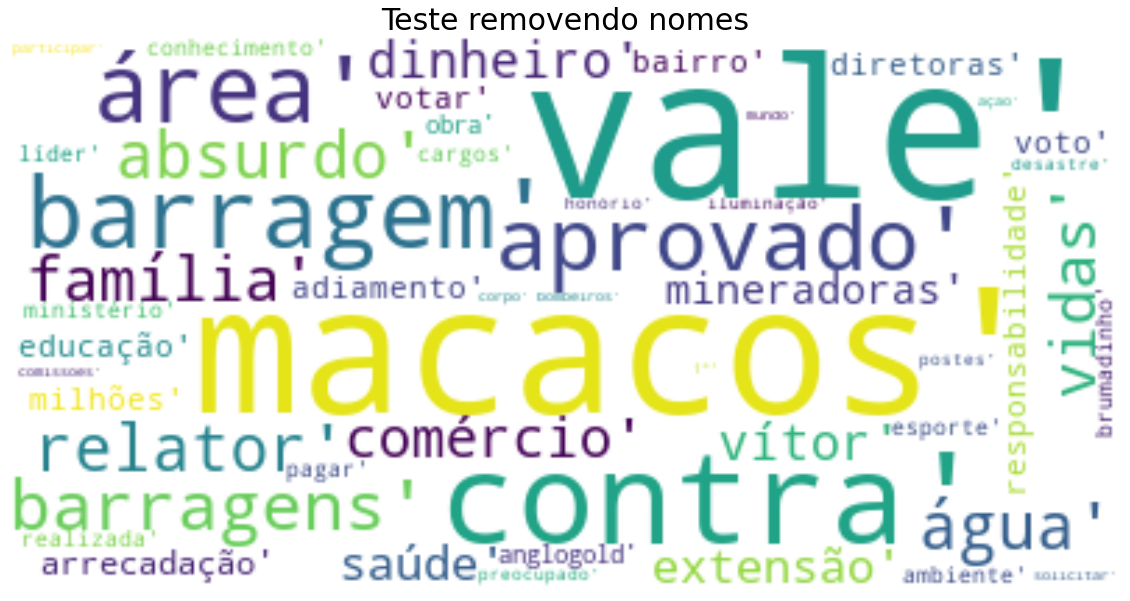

['existência', 'solene/ordinária', 'aprovou', 'abster', 'afastado', 'saúde', 'compareci', 'aprovou', 'abstenção', 'comissões', 'permanentes', 'exercício', '2019/2020', 'relator', 'relator', 'orçamento', 'finanças', 'contas', 'relator', 'ambiente', 'relator', 'direitos', 'humanos', 'relator', 'participação', 'popular', 'relator', 'segurança', 'trânsito', 'transporte', 'relator', 'saúde', 'relator', 'educação', 'relator', 'relator', 'comissões', 'lamentável', 'novo', 'totalmente', 'ilegal', 'desrespeito', 'comissões', 'deveriam', 'eleições', 'membros', 'relator', 'comissões', 'deveriam', 'respeitar', 'proporcionalidade', 'partidária', 'continua', 'esperava', 'pregou', 'mudança', 'pregou', 'diferença', 'sentar', 'cadeira', 'tocado', 'responsabilidade', 'obedecer', 'obedecer', 'questionamentos', 'pontuações', 'desrespeito', 'cidadão', 'compareceu', 'convocadas', 'participando', 'comissões', 'parcialidade', 'participado', 'consenso', 'participado', 'estaria', 'coberto', 'razão', 'verificar'

In [32]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 50, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 30)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
    print(data)

show_wordcloud(resultado6,  'Teste removendo nomes')

In [110]:
fd = FreqDist(resultado6).most_common(5)
type(fd)
fd = word_tokenize(str(fd))
fd


AttributeError: 'list' object has no attribute 'values'

In [108]:
fd = [fd for fd in fd if fd not in pontuacao]
fd


AttributeError: 'list' object has no attribute 'keys'

In [98]:
tokenizer_digit = RegexpTokenizer('[0-9][0-9]')
digit = tokenizer_digit.tokenize(str(fd))
digit

['44', '35', '16', '16', '15']

In [99]:
fd = [fd for fd in fd if fd not in digit]
fd

["'vale", "'macacos", "'contra", "'barragem", "'área"]

In [100]:
fd

["'vale", "'macacos", "'contra", "'barragem", "'área"]

In [101]:
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import json

In [102]:
url = 'https://www.dicionarioinformal.com.br/'

In [103]:
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
binary = FirefoxBinary('C:\\Program Files\\Mozilla Firefox\\firefox.exe')
driver = webdriver.Firefox(firefox_binary=binary, executable_path=r'C:\\geckodriver-v0.27.0-win64\\geckodriver.exe')

In [104]:
driver.get(url)
time.sleep(10)

In [105]:
campo_exercicio = driver.find_element_by_id("buscar_input")
campo_exercicio.send_keys("vale")
time.sleep(10)

In [106]:
comfirmar = driver.find_element_by_id('buscar_input')
comfirmar.send_keys(u'\ue007')
time.sleep(10)


In [107]:
definicao = driver.find_element_by_xpath("//div[@class='card-body card-padding card-body-di']")
conteudo_definicao = definicao.get_attribute('outerHTML')
sopa = BeautifulSoup(conteudo_definicao, 'html.parser')
p = sopa.find(name='p')
p.text

'\nVale é um Verbo, presente do indicativo 3a pessoa singular  de valer;Vale é um Verbo, imperativo 2a pessoa singular  de valer;Vale é um Verbo, presente do subjuntivo 1a pessoa singular  de valar;Vale é um Verbo, presente do subjuntivo 3a pessoa singular  de valar;Vale é um Verbo, imperativo 3a pessoa singular  de valar;Vale é um Substantivo, masculino singular ;\n\t            '

In [95]:
driver.quit()

In [40]:
fd = FreqDist(resultado6)
teste = []
for i in fd.items():
     teste.append(i)

fd

FreqDist({'vale': 44, 'macacos': 35, 'contra': 16, 'barragem': 16, 'área': 15, 'família': 14, 'vítor': 14, 'aprovado': 14, 'barragens': 13, 'relator': 11, ...})

In [39]:
teste

[('existência', 1),
 ('solene/ordinária', 1),
 ('aprovou', 2),
 ('abster', 2),
 ('afastado', 1),
 ('saúde', 9),
 ('compareci', 1),
 ('abstenção', 5),
 ('comissões', 6),
 ('permanentes', 1),
 ('exercício', 1),
 ('2019/2020', 1),
 ('relator', 11),
 ('orçamento', 3),
 ('finanças', 1),
 ('contas', 3),
 ('ambiente', 7),
 ('direitos', 4),
 ('humanos', 1),
 ('participação', 1),
 ('popular', 1),
 ('segurança', 4),
 ('trânsito', 2),
 ('transporte', 2),
 ('educação', 8),
 ('lamentável', 1),
 ('novo', 2),
 ('totalmente', 3),
 ('ilegal', 1),
 ('desrespeito', 2),
 ('deveriam', 3),
 ('eleições', 1),
 ('membros', 1),
 ('respeitar', 1),
 ('proporcionalidade', 1),
 ('partidária', 2),
 ('continua', 2),
 ('esperava', 1),
 ('pregou', 2),
 ('mudança', 1),
 ('diferença', 3),
 ('sentar', 1),
 ('cadeira', 1),
 ('tocado', 1),
 ('responsabilidade', 8),
 ('obedecer', 2),
 ('questionamentos', 2),
 ('pontuações', 1),
 ('cidadão', 4),
 ('compareceu', 1),
 ('convocadas', 3),
 ('participando', 1),
 ('parcialidade', 1